## SUPERSTORE MARKETING PROJECT by KOSSY AJULUCHUKWU

![](storeimage.jpeg)

## CONTEXT

A SuperStore located in the SubUrban area in the US is planning on improving their revenue for their year end sales. The Marketing Department introduced a promo campaign which provide a 30% discount on all purchases. Cost has been set aside for the marketing team to engage existing customer via Telephone calls to sell the promo discount offer. However this cost need to be managed, hence the Marketing Manager wants you to build a model that can predict customers that will respond positively to the discount offer so that further engagement can be made to those specific customers to close the sales. This will help reduce the time and cost of scouring and engaging all the customers in the company's database for sales lead.

## OBJECTIVE

In this notebook, We will be building a model to predict the likelihood of a customer responding positively and purchasing the Gold membership discount offer, also identifying the different factors which affect the customer's response. This prediction will enable the Superstore Marketing team to save cost and time on telephone engagement to the right set of customers.

####  Dataset description
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

YearBirth - Age of the customer 

Complain - 1 if the customer complained in the last 2 years 

DtCustomer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website


NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase

## FRAMEWORK

We will be using PACE framework to work on this project. This is a framework by GOOGLE for data alalysis projects.

**P** - Plan Stage

**A** - Anayze Stage

**C** - Construct Stage

**E** - Execute Stage

## 1.  PLAN STAGE

1. what is the goal of the project?
2. what is the source of dataset?
3. are there ethical considerations?

* Remove duplicates
* Address missing data
* Remove outliers


1.  We will be building a model to predict the likelihood of a customer to giving a positive response to purchase the Gold membership discount offer and also to identify the different factors which affect the customer's response. This prediction will enable the Superstore Marketing campaign to save cost and time on telephone engagement to the right set of customers.

2. The data set is a Superstore Marketing campaign dataset dowloaded from Kaggle. This data set can be gotten from this link https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset?select=superstore_data.csv

3. No ethical challenges as all dataset are evenly represented across range of variables. e.g Marital status, sex etc.

In [1196]:
#import the modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#import the sklearn models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

#import metrics and experimental modules
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import  roc_auc_score,confusion_matrix, classification_report, plot_roc_curve,\
plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

import warnings

warnings.filterwarnings("ignore")

In [1197]:
#read csv file
data = pd.read_csv("superstore_data.csv")
data

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0   6/16/2014        0       189  ...              111   
1            0   6/15/2014        0       464  ...                7   
2            1   5/13/2014        0       134  ...               15   
3            1   11/5/2014        0        10  ...                0   
4            0    8/4/2014        0         6  ...               11   
...        ...         ...      ...       ...  ...              ...   
2235         1    7/3/2013       99       372  ...               47   
2236         0   1/22/2013       99         5  ...                3   
2237         0   3/12/2012       99       185  ...               15   
2238         0  11/29/2012       99       267  ...              149   
2239         2    1/9/2012       99       169  ...              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                  189           218                  1                4   
1                    0            37                  1                7   
2                    2            30                  1                3   
3                    0             0                  1                1   
4                    0            34                  2                3   
...                ...           ...                ...              ...   
2235                48            78                  2                5   
2236                 8            16                  1                1   
2237                 5            14                  2                6   
2238               165            63                  1                5   
2239                 0           144                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                       4                  6                  1         1   
1                       3                  7                  5         1   
2                       2                  5                  2         0   
3                       0                  2                  7         0   
4                       1                  2                  7         1   
...                   ...                ...                ...       ...   
2235                    2                 11                  4         0   
2236                    0                  3                  8         0   
2237                    1                  5                  8         0   
2238                    4                 10                  3         0   
2239                    5                  4                  7         1   

      Complain  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         0  

[2240 rows x 22 columns]

In [1198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1199]:
#dataset description
data.describe()

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

In [1200]:
data.shape

(2240, 22)

In [1201]:
#check for duplicates
data.duplicated().sum()

0

In [1202]:
#chack for missing data
data.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

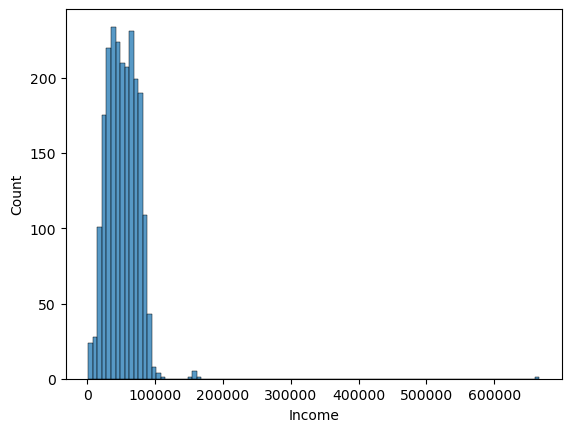

In [1203]:
sns.histplot(data['Income'], bins= 100)

In [1204]:
#lets replace the missing income data with the median since the income distribution is right skewed.
data['Income'] = data['Income'].fillna(data['Income'].median())

In [ ]:
#this csan also be useed to replace missing data in the dataframe with mean, median etc.
from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")
# data_imputed = imputer.fit_transform(data)
# The result is a NumPy array with missing values replaced by the median
# If you want to convert it back to a DataFrame, you can do:
# data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

In [1205]:
data.Income.isna().sum()

0

In [1206]:
#rename columns
data.rename(columns={'Year_Birth': 'Age', 'Dt_Customer': 'Enrollment_Date'}, inplace=True)

In [1208]:
#transform Age column to real Age
data['Age']= 2014 - data['Age']
data['Age'][:3]

0    44
1    53
2    56
Name: Age, dtype: int64

## 2.  ANALYZE STAGE

- Feature engineering
- EDA
- Discover insights and relationships


Income level category sourced from the US census bureau for household income
link: https://www.thebalancemoney.com/definition-of-middle-class-income-4126870

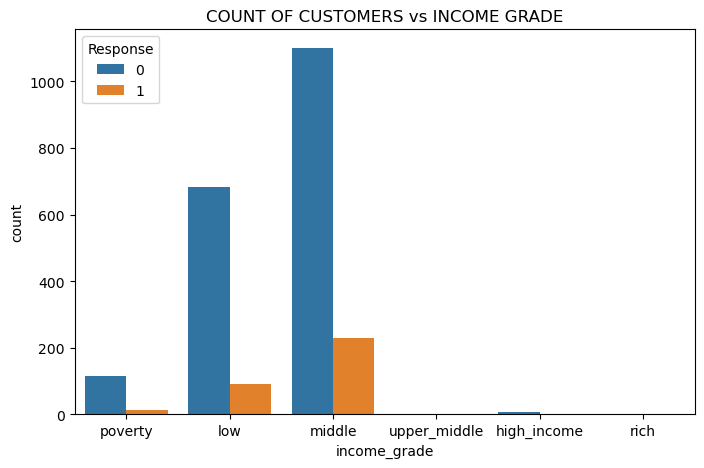

In [1114]:
#create new column for income class

plt.figure(figsize=(8, 5))

income_amount = [0, 20000, 45000,  140000, 150000, 200000, 600000]
income_title = ['poverty',"low", 'middle' , 'upper_middle', 'high_income','rich' ]

data["income_grade"] = pd.cut(data.Income, bins = income_amount, labels= income_title)

sns.countplot(data = data, x= data["income_grade"], hue = "Response")
plt.title("COUNT OF CUSTOMERS vs INCOME GRADE");

- More Customers in the middle class for income grade responded positively to the campaign. The company should focus on customers between the low and middle class categories

In [582]:
#
data[data.Income >=200000] #this is an outlier, this will be removed before training the dataset

Id  Age   Education Marital_Status    Income  Kidhome  Teenhome  \
527  9432   37  Graduation       Together  666666.0        1         0   

    Enrollment_Date  Recency  MntWines  ...  MntSweetProducts  MntGoldProds  \
527        2/6/2013       23         9  ...                 1            12   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
527                  4                3                    1   

     NumStorePurchases  NumWebVisitsMonth  Response  Complain  income_grade  
527                  3                  6         0         0           NaN  

[1 rows x 23 columns]

In [1115]:
#detect outlier
data.Age.describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

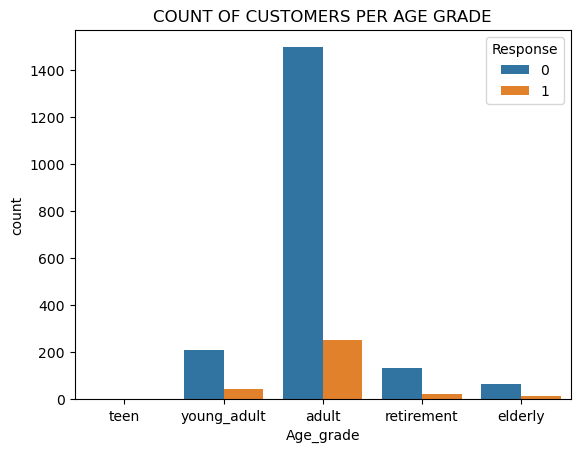

In [1116]:
#create a new age category using the age range

age_number = [12, 18, 30, 61, 65, 120]
age_level = ['teen', 'young_adult','adult','retirement','elderly']
data["Age_grade"] = pd.cut(data.Age, bins = age_number, labels= age_level)
sns.countplot(data= data, x= data['Age_grade'], hue = 'Response')
plt.title("COUNT OF CUSTOMERS PER AGE GRADE");

- Customers in the Adult category(30 -61 yrs) responded well to the promo campaign than other categories

In [1209]:
# create a new colunm showing if a customer has children or not.
data['HaveChildren']= data['Kidhome'] + data['Teenhome']

data['HaveChildren']= np.where(data["HaveChildren"]> 0, 1, 0)

In [1118]:
data.head()

Id  Age   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826   44  Graduation       Divorced  84835.0        0         0   
1      1   53  Graduation         Single  57091.0        0         0   
2  10476   56  Graduation        Married  67267.0        0         1   
3   1386   47  Graduation       Together  32474.0        1         1   
4   5371   25  Graduation         Single  21474.0        1         0   

  Enrollment_Date  Recency  MntWines  ...  NumDealsPurchases  NumWebPurchases  \
0       6/16/2014        0       189  ...                  1                4   
1       6/15/2014        0       464  ...                  1                7   
2       5/13/2014        0       134  ...                  1                3   
3       11/5/2014        0        10  ...                  1                1   
4        8/4/2014        0         6  ...                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                    4                  6                  1         1   
1                    3                  7                  5         1   
2                    2                  5                  2         0   
3                    0                  2                  7         0   
4                    1                  2                  7         1   

   Complain  income_grade    Age_grade  HaveChildren  
0         0        middle        adult             0  
1         0        middle        adult             0  
2         0        middle        adult             1  
3         0           low        adult             1  
4         0           low  young_adult             1  

[5 rows x 25 columns]

In [1119]:
#create copy of dataframe
df = data.copy()

In [1120]:
bill= df.Response.value_counts()
bill

0    1906
1     334
Name: Response, dtype: int64

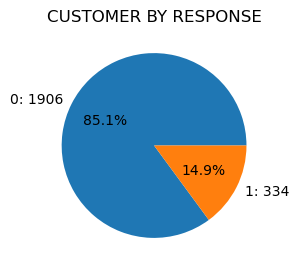

In [1121]:
plt.figure(figsize=(3,3))
plt.pie(x= bill, labels =[f'{bill.index[0]}: {bill.values[0]}',
                          f'{bill.index[1]}: {bill.values[1]}'],
                          autopct='%1.1f%%')
plt.title('CUSTOMER BY RESPONSE');

**This is an imbalanced dataset, prior to model training we would address this imbalance to improve performance**

In [1122]:
df['Enrollment_Date']= pd.to_datetime(df.Enrollment_Date)

In [1123]:
df['Month']= df.Enrollment_Date.dt.strftime("%b %Y")
df['Year']= df.Enrollment_Date.dt.year
df

Id  Age   Education Marital_Status   Income  Kidhome  Teenhome  \
0      1826   44  Graduation       Divorced  84835.0        0         0   
1         1   53  Graduation         Single  57091.0        0         0   
2     10476   56  Graduation        Married  67267.0        0         1   
3      1386   47  Graduation       Together  32474.0        1         1   
4      5371   25  Graduation         Single  21474.0        1         0   
...     ...  ...         ...            ...      ...      ...       ...   
2235  10142   38         PhD       Divorced  66476.0        0         1   
2236   5263   37    2n Cycle        Married  31056.0        1         0   
2237     22   38  Graduation       Divorced  46310.0        1         0   
2238    528   36  Graduation        Married  65819.0        0         0   
2239   4070   45         PhD        Married  94871.0        0         2   

     Enrollment_Date  Recency  MntWines  ...  NumCatalogPurchases  \
0         2014-06-16        0       189  ...                    4   
1         2014-06-15        0       464  ...                    3   
2         2014-05-13        0       134  ...                    2   
3         2014-11-05        0        10  ...                    0   
4         2014-08-04        0         6  ...                    1   
...              ...      ...       ...  ...                  ...   
2235      2013-07-03       99       372  ...                    2   
2236      2013-01-22       99         5  ...                    0   
2237      2012-03-12       99       185  ...                    1   
2238      2012-11-29       99       267  ...                    4   
2239      2012-01-09       99       169  ...                    5   

      NumStorePurchases  NumWebVisitsMonth  Response  Complain  income_grade  \
0                     6                  1         1         0        middle   
1                     7                  5         1         0        middle   
2                     5                  2         0         0        middle   
3                     2                  7         0         0           low   
4                     2                  7         1         0           low   
...                 ...                ...       ...       ...           ...   
2235                 11                  4         0         0        middle   
2236                  3                  8         0         0           low   
2237                  5                  8         0         0        middle   
2238                 10                  3         0         0        middle   
2239                  4                  7         1         0        middle   

        Age_grade  HaveChildren     Month  Year  
0           adult             0  Jun 2014  2014  
1           adult             0  Jun 2014  2014  
2           adult             1  May 2014  2014  
3           adult             1  Nov 2014  2014  
4     young_adult             1  Aug 2014  2014  
...           ...           ...       ...   ...  
2235        adult             1  Jul 2013  2013  
2236        adult             1  Jan 2013  2013  
2237        adult             1  Mar 2012  2012  
2238        adult             0  Nov 2012  2012  
2239        adult             1  Jan 2012  2012  

[2240 rows x 27 columns]

Text(0.5, 1.0, 'Number of enrollment per year')

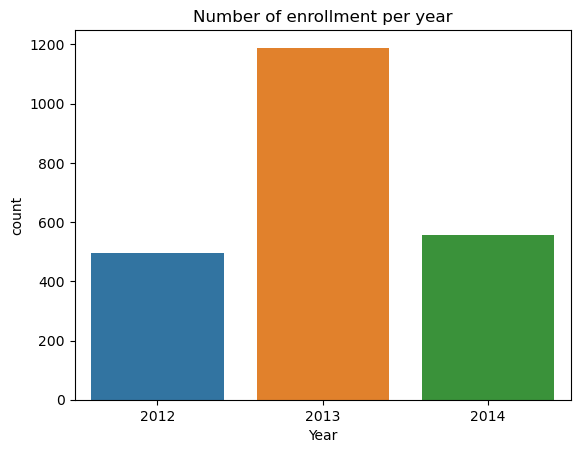

In [1124]:
sns.countplot(data= df, x= df.Year)
plt.title('Number of enrollment per year')

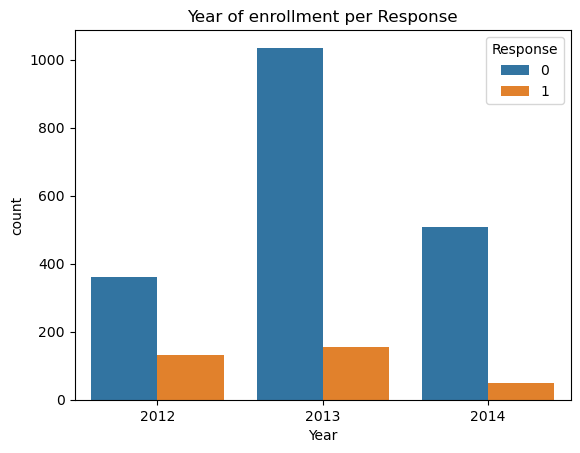

In [1125]:
sns.countplot(data= df, x= df.Year, hue = "Response")
plt.title('Year of enrollment per Response');

**we had more positive responses in the year 2012 and 2013**

**The company have to verify why year 2014 had low response count despite having approximately the number of enrollment in 2012**

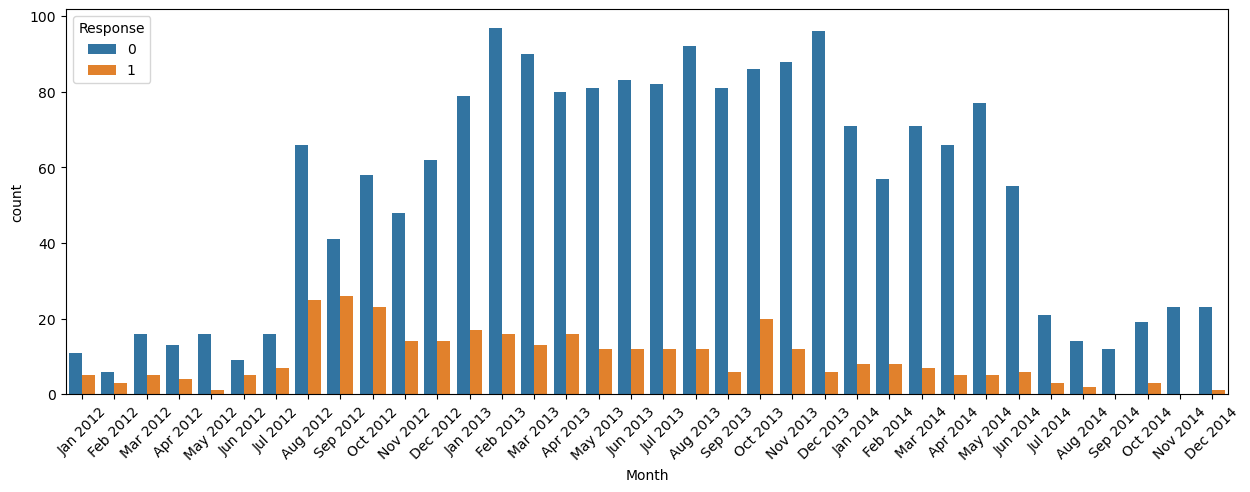

In [594]:
plt.figure(figsize=(15, 5))
# Create a custom order for the 'Month' column
custom_order = pd.date_range(start='2012-01-01', end='2014-12-31', freq='M').strftime('%b %Y')

# Convert the 'Month' column to a Categorical data type with the custom order
df['Month'] = pd.Categorical(df['Month'], categories=custom_order, ordered=True)

sns.countplot(x= 'Month', hue = 'Response', data = df)
plt.xticks(rotation = 45);

**The highest number of positive responses were reported in August 2012 and September 2012**

There is a unvaried decline from 2012 to 2014.
This proves that the number of customer enrolled in each month does not necessary affect the number of positive response.This means some custiomer might not be aware of the campaign.

In [1126]:
df.Month.isna().sum()

0

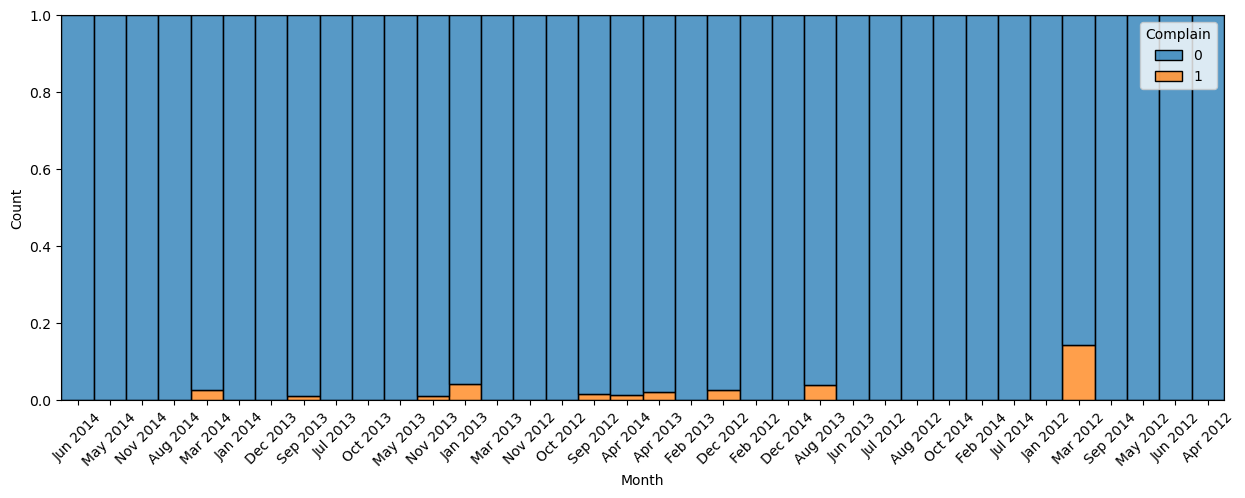

In [1128]:
plt.figure(figsize=(15, 5))
sns.histplot(x= 'Month', hue = 'Complain', multiple= 'fill', data = df)
plt.xticks(rotation = 45);

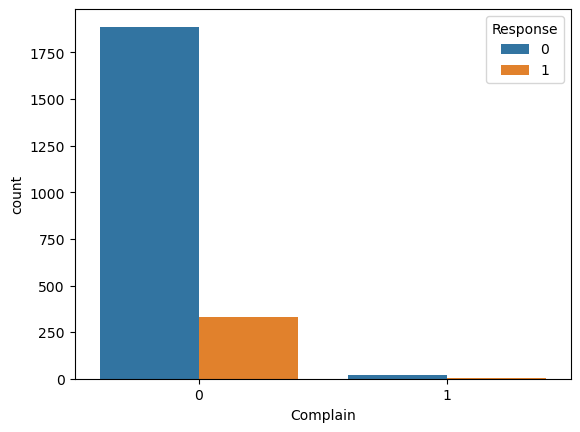

In [1129]:
sns.countplot(x="Complain", data = df, hue = 'Response');

- Those who didn't complain are more likely to respond well to the promo**

In [1151]:
df.Recency.mean()

49.109375

Text(0.5, 1.0, 'Number of Day since last purchase- Recency')

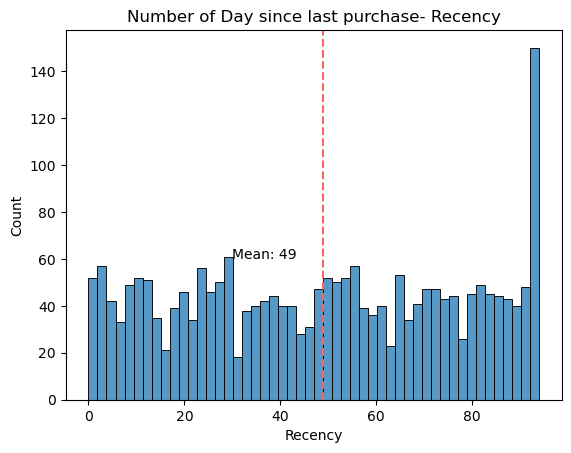

In [1218]:
sns.histplot(x= df['Recency'], bins=50)
plt.text(30, 60, f'Mean: 49')
plt.axvline(x=49, color='#ff6361', ls='--');
plt.title("Number of Day since last purchase- Recency")

<AxesSubplot:xlabel='Recency', ylabel='Count'>

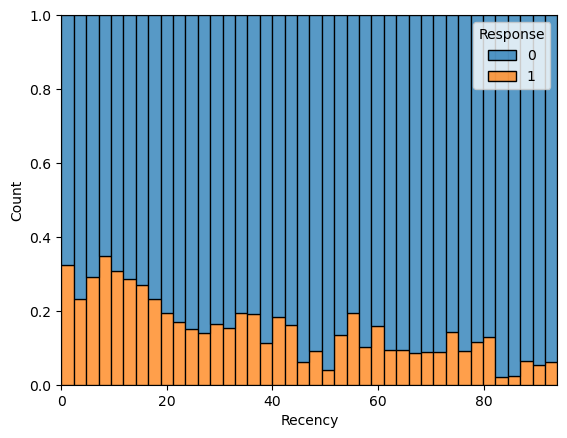

In [1221]:
sns.histplot(data = df, hue= 'Response', x= df.Recency, bins= 40, multiple='fill')

- it means that the average number of days since the customer's last purchase is 49 days which is more than a month. This is worrisome for the superstore as this could lead to customer churn. Lets check if it affected the number of store and web purchases.
- The higher the recency, the more likely for them to accept the offer.

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

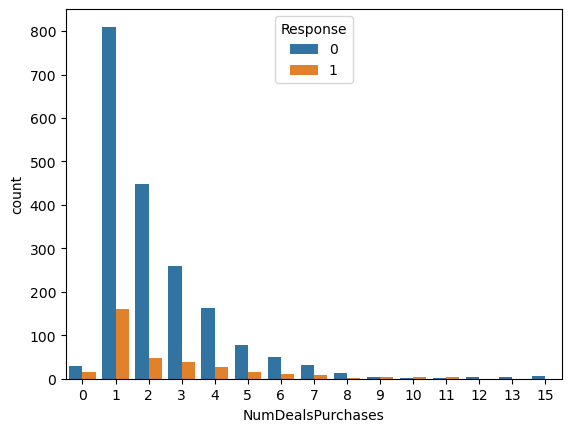

In [1162]:
sns.countplot(x= 'NumDealsPurchases', data=df, hue= 'Response')

- This proves that not all product has a discounted price. Those who spend less are more concerned abount discount. This should be made known to the Marketing manager

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

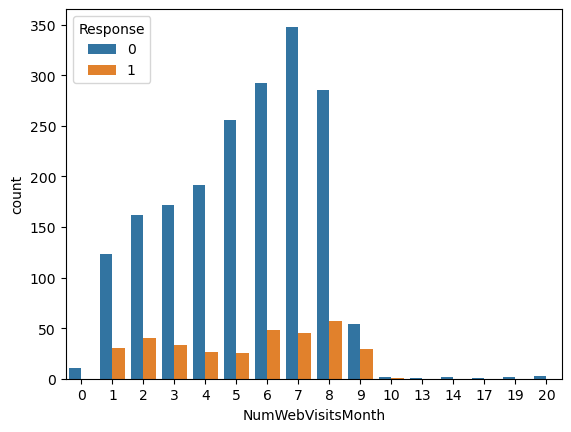

In [598]:
sns.countplot(data = df, x= 'NumWebVisitsMonth', hue = 'Response')

- This shows that customers visit the website at most 6 to 7 times every month, this is a good opportunity for the the company to amplify the promo adverts on their online to drive organic sales.

- customer who don't vist the website do not purchase the discount offer.

<AxesSubplot:xlabel='NumWebPurchases', ylabel='count'>

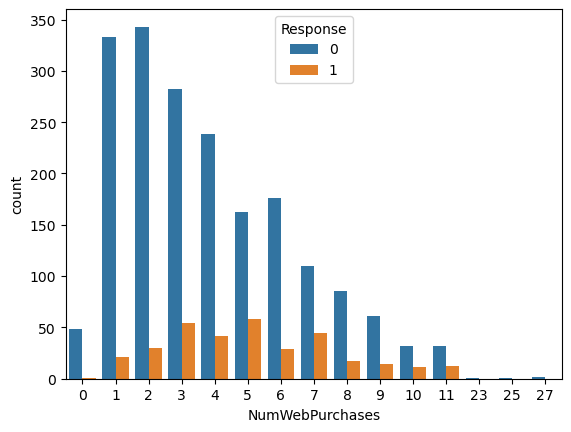

In [599]:
sns.countplot(data = df, x= 'NumWebPurchases', hue = 'Response')

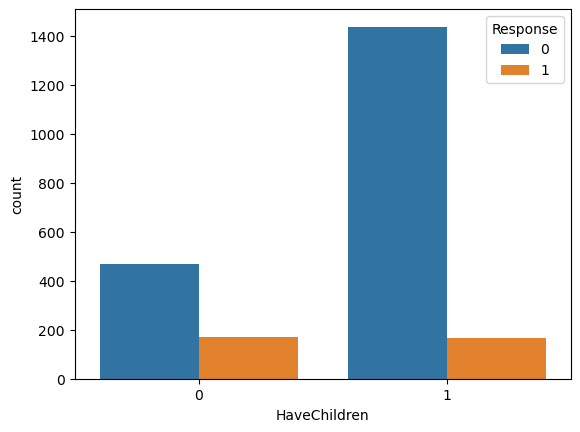

In [1195]:
sns.countplot(data=df, x=df.HaveChildren, hue= 'Response');

- Customers with or without children did not affect the purchase of the discount offer. The count of positive responses for both category is almost the same.

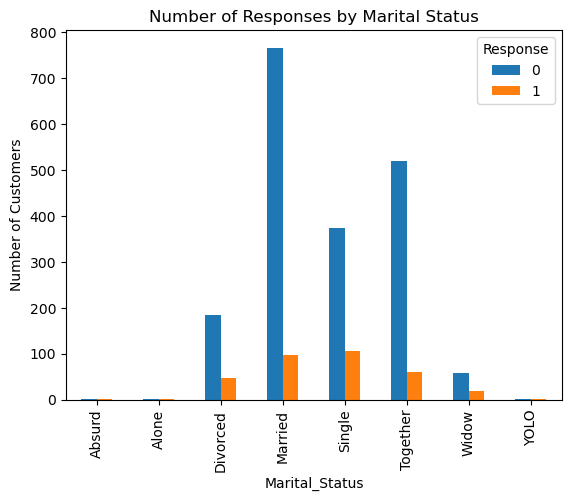

In [1171]:
#responses based on marital status
pd.crosstab(df.Marital_Status, df.Response).plot(kind= "bar")
plt.ylabel("Number of Customers")
plt.title('Number of Responses by Marital Status');

**Customers who are more Maried and Single, respond positively to the campaign. Hence the company should focus on these groups.**

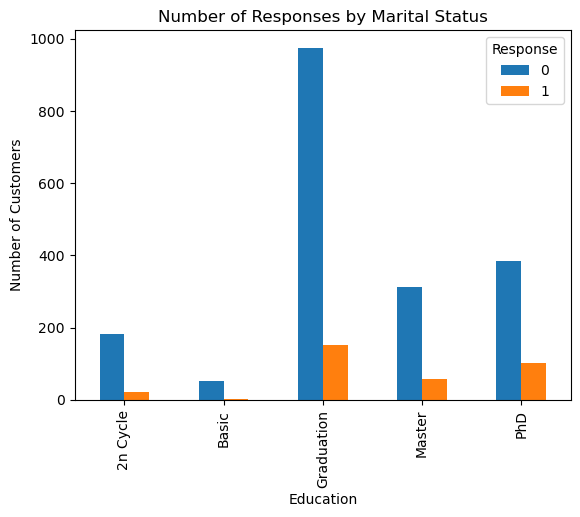

In [1172]:
#responses based on Education
pd.crosstab(df.Education, df.Response).plot(kind= "bar")
plt.ylabel("Number of Customers")
plt.title('Number of Responses by Marital Status');

- Customers who are more educated, responded positively to the campaign. Hence the company should focus on these groups.

In [602]:
df.corr()

Id       Age    Income   Kidhome  Teenhome  \
Id                   1.000000 -0.000028  0.012996  0.002406 -0.002580   
Age                 -0.000028  1.000000  0.160899 -0.230176  0.352111   
Income               0.012996  0.160899  1.000000 -0.425326  0.018965   
Kidhome              0.002406 -0.230176 -0.425326  1.000000 -0.036133   
Teenhome            -0.002580  0.352111  0.018965 -0.036133  1.000000   
Recency             -0.046524  0.019871 -0.004061  0.008827  0.016198   
MntWines            -0.022878  0.157773  0.576903 -0.496297  0.004846   
MntFruits            0.004600  0.017917  0.428791 -0.372581 -0.176764   
MntMeatProducts     -0.004437  0.030872  0.577805 -0.437129 -0.261160   
MntFishProducts     -0.024475  0.041625  0.437564 -0.387644 -0.204187   
MntSweetProducts    -0.007642  0.018133  0.436131 -0.370673 -0.162475   
MntGoldProds        -0.013438  0.061818  0.321938 -0.349595 -0.021725   
NumDealsPurchases   -0.037166  0.060846 -0.082315  0.221798  0.387741   
NumWebPurchases     -0.018924  0.145040  0.380554 -0.361647  0.155500   
NumCatalogPurchases -0.003440  0.121275  0.586826 -0.502237 -0.110769   
NumStorePurchases   -0.014927  0.128272  0.526600 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446 -0.121139 -0.549785  0.447846  0.134884   
Response            -0.021968 -0.021325  0.132867 -0.080008 -0.154446   
Complain             0.033883  0.030128 -0.027187  0.040207  0.003138   
HaveChildren         0.000493 -0.011731 -0.336691  0.520772  0.586831   
Year                -0.006414  0.028188  0.022381  0.053339 -0.008260   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
Id                  -0.046524 -0.022878   0.004600        -0.004437   
Age                  0.019871  0.157773   0.017917         0.030872   
Income              -0.004061  0.576903   0.428791         0.577805   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
Response            -0.198437  0.247254   0.125289         0.236335   
Complain             0.013231 -0.039007  -0.005166        -0.023483   
HaveChildren         0.000505 -0.343869  -0.413501        -0.575128   
Year                -0.026084 -0.154188  -0.055150        -0.082472   

                     MntFishProducts  ...  MntGoldProds  NumDealsPurchases  \
Id                         -0.024475  ...     -0.013438          -0.037166   
Age                         0.041625  ...      0.061818           0.060846   
Income                      0.437564  ...      0.321938          -0.082315   
Kidhome                    -0.387644  ...     -0.349595           0.221798   
Teenhome                   -0.204187  ...     -0.021725           0.387741   
Recency                     0.001079  ...      0.016693          -0.001098   
MntWines                    0.399753  ...      0.387516           0.010940   
MntFruits                   0.594804  ...      0.392995          -0.132114   
MntMeatProducts             0.568402  ...      0.350609          -0.122415   
MntFishProducts             1.000000  ...      0.422875          -0.139361   

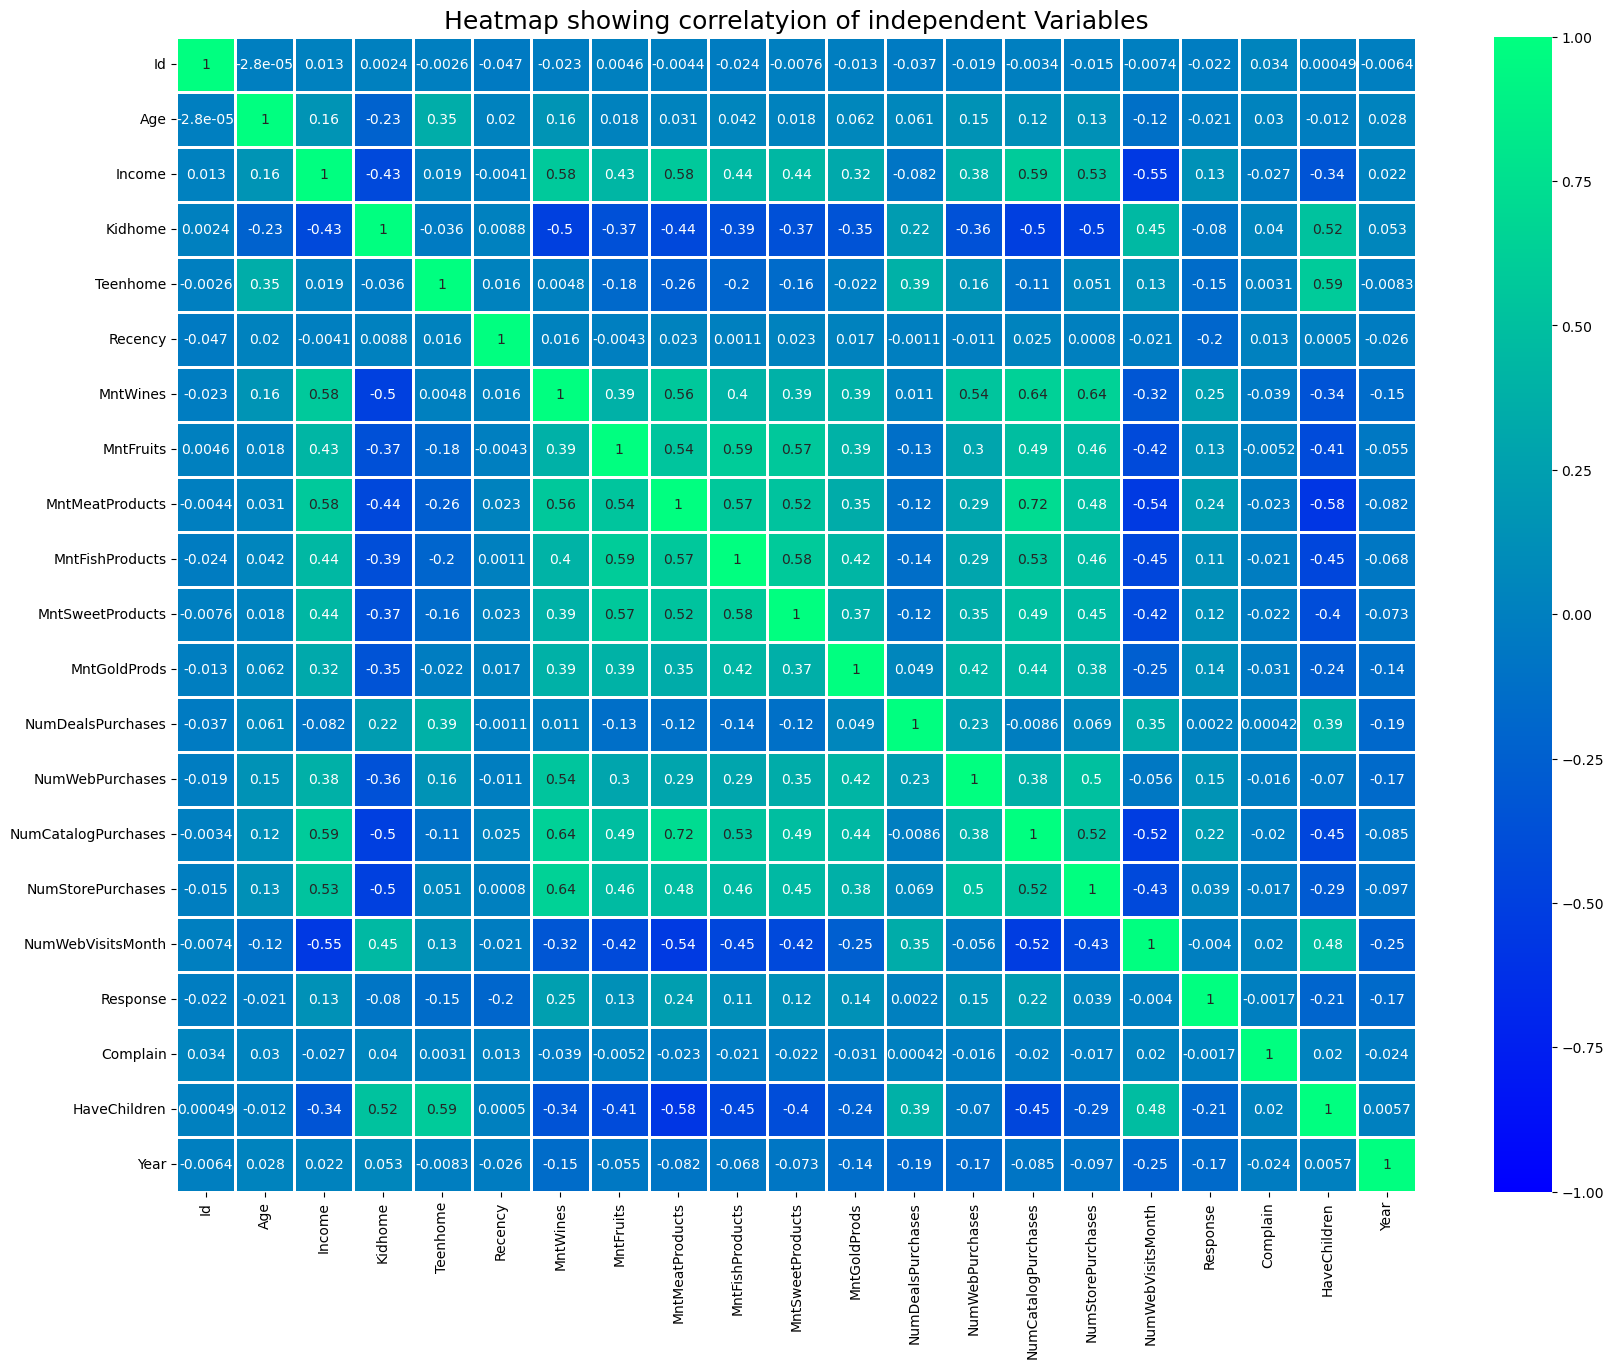

In [1173]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='winter', linewidths= 2)
plt.title("Heatmap showing correlatyion of independent Variables", fontsize= 18);

**While maintaining a pearson correaltional threshold of 0.7, There is no severe multicolinearity of the independent variable. However this threshold is arbitriary.**

In [1174]:
#drop colums
col_drop=['Id','Teenhome','Kidhome', 'Enrollment_Date']

df.drop(col_drop, axis= 1, inplace= True)

In [1175]:
df.head()

Age   Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0   44  Graduation       Divorced  84835.0        0       189        104   
1   53  Graduation         Single  57091.0        0       464          5   
2   56  Graduation        Married  67267.0        0       134         11   
3   47  Graduation       Together  32474.0        0        10          0   
4   25  Graduation         Single  21474.0        0         6         16   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0              379              111               189  ...   
1               64                7                 0  ...   
2               59               15                 2  ...   
3                1                0                 0  ...   
4               24               11                 0  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                    4                  6                  1         1   
1                    3                  7                  5         1   
2                    2                  5                  2         0   
3                    0                  2                  7         0   
4                    1                  2                  7         1   

   Complain  income_grade    Age_grade  HaveChildren     Month  Year  
0         0        middle        adult             0  Jun 2014  2014  
1         0        middle        adult             0  Jun 2014  2014  
2         0        middle        adult             1  May 2014  2014  
3         0           low        adult             1  Nov 2014  2014  
4         0           low  young_adult             1  Aug 2014  2014  

[5 rows x 23 columns]

In [1176]:
def remove_outlier(column_list, percentile):
    for col in column_list:
        threshold =df[col].quantile(percentile)
        df.loc[df[col] > threshold, col] = threshold
        print(f'The highest threshold for {col}: {threshold}')

In [1177]:
column_list = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [1178]:
#remove all the outlier using threshold of 0.95
remove_outlier(column_list, 0.95)

The highest threshold for Age: 64.0
The highest threshold for Income: 83926.99999999994
The highest threshold for Recency: 94.0
The highest threshold for MntWines: 1000.0
The highest threshold for MntFruits: 123.0
The highest threshold for MntMeatProducts: 687.0999999999995
The highest threshold for MntFishProducts: 168.04999999999973
The highest threshold for MntSweetProducts: 126.0
The highest threshold for MntGoldProds: 165.04999999999973
The highest threshold for NumDealsPurchases: 6.0
The highest threshold for NumWebPurchases: 9.0
The highest threshold for NumCatalogPurchases: 9.0
The highest threshold for NumStorePurchases: 12.0
The highest threshold for NumWebVisitsMonth: 8.0


In [1181]:
# tableau_data = df.to_csv("mytableau.csv")

In [1180]:
df.describe()

Age        Income      Recency     MntWines    MntFruits  \
count  2240.000000   2240.000000  2240.000000  2240.000000  2240.000000   
mean     44.974554  51471.329911    48.974554   295.283482    24.774107   
std      11.441592  20149.636883    28.743957   314.215631    34.857790   
min      18.000000   1730.000000     0.000000     0.000000     0.000000   
25%      37.000000  35538.750000    24.000000    23.750000     1.000000   
50%      44.000000  51381.500000    49.000000   173.500000     8.000000   
75%      55.000000  68289.750000    74.000000   504.250000    33.000000   
max      64.000000  83927.000000    94.000000  1000.000000   123.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2240.000000      2240.000000       2240.000000   2240.000000   
mean        158.981786        35.659196         25.435268     42.151161   
std         198.671350        48.913800         35.999396     46.286135   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          67.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.000000     56.000000   
max         687.100000       168.050000        126.000000    165.050000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.215625         3.996875             2.592411   
std             1.538671         2.501895             2.653663   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max             6.000000         9.000000             9.000000   

       NumStorePurchases  NumWebVisitsMonth     Response     Complain  \
count        2240.000000        2240.000000  2240.000000  2240.000000   
mean            5.753125           5.239286     0.149107     0.009375   
std             3.173309           2.246107     0.356274     0.096391   
min             0.000000           0.000000     0.000000     0.000000   
25%             3.000000           3.000000     0.000000     0.000000   
50%             5.000000           6.000000     0.000000     0.000000   
75%             8.000000           7.000000     0.000000     0.000000   
max            12.000000           8.000000     1.000000     1.000000   

       HaveChildren         Year  
count   2240.000000  2240.000000  
mean       0.715179  2013.028125  
std        0.451430     0.684554  
min        0.000000  2012.000000  
25%        0.000000  2013.000000  
50%        1.000000  2013.000000  
75%        1.000000  2013.000000  
max        1.000000  2014.000000

## convert categorical data to Numerical data

In [1182]:
#create an instance of LabelEncoder for each Catergory Column
label_Education= LabelEncoder()
label_Marital_Status= LabelEncoder()
label_income_grade= LabelEncoder()
label_Age_grade = LabelEncoder()

#fit the encoder
df.Education = label_Education.fit_transform(df.Education)
df.Marital_Status = label_Marital_Status.fit_transform(df["Marital_Status"])
df.Age_grade = label_Age_grade.fit_transform(df.Age_grade)
df.income_grade = label_income_grade.fit_transform(df.income_grade)

In [1183]:
df0 = df.copy()
df0

Age  Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0      44          2               2  83927.0        0       189        104   
1      53          2               4  57091.0        0       464          5   
2      56          2               3  67267.0        0       134         11   
3      47          2               5  32474.0        0        10          0   
4      25          2               4  21474.0        0         6         16   
...   ...        ...             ...      ...      ...       ...        ...   
2235   38          4               2  66476.0       94       372         18   
2236   37          0               3  31056.0       94         5         10   
2237   38          2               2  46310.0       94       185          2   
2238   36          2               3  65819.0       94       267         38   
2239   45          4               3  83927.0       94       169         24   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0               379.0           111.00               126  ...   
1                64.0             7.00                 0  ...   
2                59.0            15.00                 2  ...   
3                 1.0             0.00                 0  ...   
4                24.0            11.00                 0  ...   
...               ...              ...               ...  ...   
2235            126.0            47.00                48  ...   
2236             13.0             3.00                 8  ...   
2237             88.0            15.00                 5  ...   
2238            687.1           149.00               126  ...   
2239            553.0           168.05                 0  ...   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                       4                  6                  1         1   
1                       3                  7                  5         1   
2                       2                  5                  2         0   
3                       0                  2                  7         0   
4                       1                  2                  7         1   
...                   ...                ...                ...       ...   
2235                    2                 11                  4         0   
2236                    0                  3                  8         0   
2237                    1                  5                  8         0   
2238                    4                 10                  3         0   
2239                    5                  4                  7         1   

      Complain  income_grade  Age_grade  HaveChildren     Month  Year  
0            0             2          0             0  Jun 2014  2014  
1            0             2          0             0  Jun 2014  2014  
2            0             2          0             1  May 2014  2014  
3            0             1          0             1  Nov 2014  2014  
4            0             1          4             1  Aug 2014  2014  
...        ...           ...        ...           ...       ...   ...  
2235         0             2          0             1  Jul 2013  2013  
2236         0             1          0             1  Jan 2013  2013  
2237         0             2          0             1  Mar 2012  2012  
2238         0             2          0             0  Nov 2012  2012  
2239         0             2          0             1  Jan 2012  2012  

[2240 rows x 23 columns]

In [1184]:
df0.drop("Month", axis = 1, inplace= True)

In [1185]:
#split our dataset into y and X
y= df0['Response']
X= df0.drop("Response", axis =1)

In [1186]:
y.shape, X.shape

((2240,), (2240, 21))

In [1187]:
#standardize the values
scale = StandardScaler()
X_scale = scale.fit_transform(X)

## 3. CONSTRUCT STAGE

- model selection
- build model
- hyprparameter tuning to improve performance of model

In [1188]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, stratify= y, test_size=0.2, random_state=42)

In [1189]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((1792, 21), (1792,), (448, 21), (448,))

In [1190]:
def first_model(model, X_train, y_train, X_test, y_test):
    model.fit( X_train, y_train)
    pred = model.predict(X_test)
    model_score = accuracy_score(y_test, pred)
    return model_score

In [1191]:
model_list = {"lr": LogisticRegression(),
             "rf": RandomForestClassifier(),
             "Ab": AdaBoostClassifier(),
             "Gb": GradientBoostingClassifier(),
             }

In [1192]:
for model in model_list.values():
    score=first_model(model, X_train, y_train, X_test, y_test)
    print(f'Score for {model} is  {round(score, 2)}')

Score for LogisticRegression() is  0.88
Score for RandomForestClassifier() is  0.86
Score for AdaBoostClassifier() is  0.86
Score for GradientBoostingClassifier() is  0.87


## HYPER-PARAMETER TUNING

Since we have better score for Logistic Regression, we will focus on improving it.

## Logistic Regression GridSearch Hyperparameter tuning

In [1193]:
lr = LogisticRegression(random_state=42)

lr_param= {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': np.arange(10, 100, 10)
    }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

lr_gs = GridSearchCV(rf, param_grid=rf_param, scoring= scoring, cv=4, refit= 'f1')


In [1194]:
%%time
lr_gs.fit(X_train, y_train)

CPU times: user 8min 40s, sys: 2.18 s, total: 8min 42s
Wall time: 24min 13s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'accuracy', 'recall', 'f1', 'roc_auc', 'precision'})

In [843]:
lr_gs.best_score_ #best F1 score

0.9517305577768893

## BALANCE THE DATASET FROM TRAINING DATASET
This will imporve performance

This is a poor score for F1, this can be attributed to the imbalanced dataset. We will use try and balance the minority class with the majority class using the `RandomOversampling`to improve our model performance.

In [855]:
#split our dataset into y and X
y= df0['Response']
X= df0.drop("Response", axis =1)

In [856]:
#split test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, stratify= y, test_size=0.3, random_state=42)

In [857]:
#split validation dataset
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, stratify= y_train, test_size=0.3,random_state= 42)

In [858]:
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')

X_sampl, y_sampl = ros.fit_resample(X_train, y_train)

In [859]:
X_sampl.shape, y_sampl.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((1866, 21), (1866,), (672, 21), (672,), (471, 21), (471,))

In [860]:
%%time
lr_gs.fit(X_sampl, y_sampl)

CPU times: user 8min 2s, sys: 1.35 s, total: 8min 3s
Wall time: 8min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'accuracy', 'recall', 'f1', 'roc_auc', 'precision'})

In [861]:
y_sampl.value_counts(normalize = True)

0    0.5
1    0.5
Name: Response, dtype: float64

In [862]:
lr_gs.best_score_

0.9517305577768893

In [863]:
cv_results = pd.DataFrame(lr_gs.cv_results_)

cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.513576      0.010949         0.035942        0.000442   
1       0.841489      0.007475         0.058366        0.000568   
2       0.508449      0.001417         0.036043        0.000135   
3       0.852890      0.007975         0.058955        0.001209   
4       0.508729      0.001094         0.036002        0.000130   

  param_max_depth param_max_features param_max_samples param_min_samples_leaf  \
0               3                1.0               0.7                      1   
1               3                1.0               0.7                      1   
2               3                1.0               0.7                      1   
3               3                1.0               0.7                      1   
4               3                1.0               0.7                      1   

  param_min_samples_split param_n_estimators  ... mean_test_roc_auc  \
0                       2                300  ...          0.854033   
1                       2                500  ...          0.855441   
2                       3                300  ...          0.854033   
3                       3                500  ...          0.855441   
4                       4                300  ...          0.854033   

   std_test_roc_auc  rank_test_roc_auc  split0_test_precision  \
0          0.013401                 82               0.705263   
1          0.013183                 73               0.705263   
2          0.013401                 82               0.705263   
3          0.013183                 73               0.705263   
4          0.013401                 82               0.705263   

   split1_test_precision  split2_test_precision  split3_test_precision  \
0               0.720339               0.748175                0.71875   
1               0.735931               0.750000                0.72069   
2               0.720339               0.748175                0.71875   
3               0.735931               0.750000                0.72069   
4               0.720339               0.748175                0.71875   

   mean_test_precision  std_test_precision  rank_test_precision  
0             0.723132            0.015600                  100  
1             0.727971            0.016713                   82  
2             0.723132            0.015600                  100  
3             0.727971            0.016713                   82  
4             0.723132            0.015600                  100  

[5 rows x 46 columns]

In [864]:
def check_score(model_name:str , model_object, metric:str ):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    #locate the value that has the maximum value for the metric
    evaluated = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    #filter out the metric at the maximum metric eveluated
    auc= evaluated.mean_test_roc_auc
    precision = evaluated.mean_test_precision
    recall = evaluated.mean_test_recall
    f1 = evaluated.mean_test_f1
    accuracy = evaluated.mean_test_accuracy
    
    #create a table to show the details of the metrics
    table =pd.DataFrame({"model": [model_name],
                         'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
        
    })
    return table

In [865]:
#this show the metric with the highest f1 score and it`s corresponding metric for the trained data

myresult= check_score("logisticRegressionCV", lr_gs, "f1")
myresult

model  precision    recall        f1  accuracy       auc
0  logisticRegressionCV   0.913407  0.993562  0.951731  0.949624  0.992718

In [902]:
def get_score(model_object, X_test, y_test, model_name:str):
    
    y_pred= model_object.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc= roc_auc_score(y_test, y_pred)
    
    
    table= pd.DataFrame({'model': [model_name],
                         'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
    })
    
    return table

In [867]:
#Validation dataset
myresult2= get_score(lr_gs, X_val, y_val, 'LogisticRegressionVal')
myresult2

model  precision    recall        f1  accuracy       auc
0  LogisticRegressionVal    0.44898  0.314286  0.369748  0.840764  0.623477

In [868]:
myresult = pd.concat([myresult, myresult2], axis = 0)
myresult

model  precision    recall        f1  accuracy       auc
0   logisticRegressionCV   0.913407  0.993562  0.951731  0.949624  0.992718
0  LogisticRegressionVal   0.448980  0.314286  0.369748  0.840764  0.623477

In [869]:
#test dataset
myresult_test= get_score(lr_gs, X_test, y_test, 'LogisticRegressionTest')
myresult_test

model  precision  recall        f1  accuracy       auc
0  LogisticRegressionTest   0.466667    0.42  0.442105  0.842262  0.668042

In [870]:
myresult_lr = pd.concat([myresult, myresult_test], axis = 0)
myresult_lr

model  precision    recall        f1  accuracy       auc
0    logisticRegressionCV   0.913407  0.993562  0.951731  0.949624  0.992718
0   LogisticRegressionVal   0.448980  0.314286  0.369748  0.840764  0.623477
0  LogisticRegressionTest   0.466667  0.420000  0.442105  0.842262  0.668042

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       572
           1       0.47      0.42      0.44       100

    accuracy                           0.84       672
   macro avg       0.68      0.67      0.68       672
weighted avg       0.84      0.84      0.84       672



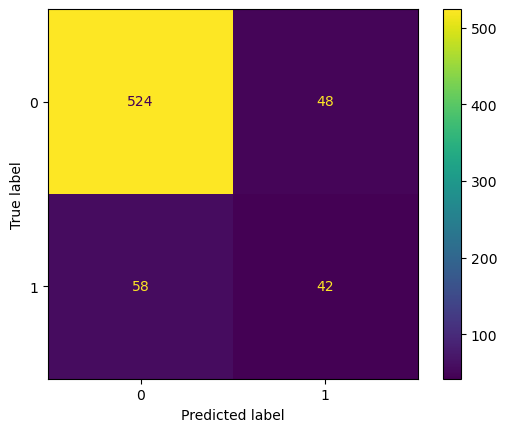

In [871]:

pred= lr_gs.predict(X_test)
plot_confusion_matrix(lr_gs, X_test, y_test)
print(classification_report(y_test, pred));

## 2. GradientBoost GridSearch

In [873]:
gb= GradientBoostingClassifier(random_state= 42)

param= {'learning_rate': [0.05, 0.01],
    'n_estimators': np.arange(10, 100, 20),
    'min_samples_split':[2, 4, 8],
    'min_samples_leaf':[1, 2, 3],
    'max_depth': [4, 6, None],
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

gb_cv= GridSearchCV(gb, param_grid= param, cv=4, scoring= scoring, refit= 'f1')

In [874]:
%%time

gb_cv.fit(X_sampl, y_sampl)

CPU times: user 4min 52s, sys: 883 ms, total: 4min 53s
Wall time: 4min 53s


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.01],
                         'max_depth': [4, 6, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': array([10, 30, 50, 70, 90])},
             refit='f1',
             scoring={'accuracy', 'recall', 'f1', 'roc_auc', 'precision'})

In [889]:
gb_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=None,
                           min_samples_leaf=3, min_samples_split=8,
                           n_estimators=90, random_state=42)

In [890]:
gb_cv.best_score_

0.9463037983457339

In [891]:
gb_result = check_score("GradientBoostCV", gb_cv, 'f1')
gb_result

model  precision    recall        f1  accuracy       auc
0  GradientBoostCV   0.905129  0.991416  0.946304  0.943736  0.989913

In [892]:
gb_result2= get_score(gb_cv, X_val, y_val, 'GradientBoostVal')
gb_result2

model  precision    recall       f1  accuracy      auc
0  GradientBoostVal   0.396825  0.357143  0.37594  0.823779  0.63119

In [893]:
gb_result = pd.concat([gb_result, gb_result2], axis= 0)
gb_result

model  precision    recall        f1  accuracy       auc
0   GradientBoostCV   0.905129  0.991416  0.946304  0.943736  0.989913
0  GradientBoostVal   0.396825  0.357143  0.375940  0.823779  0.631190

In [894]:
gb_result3= get_score(gb_cv, X_test, y_test, 'GradientBoostTest')
gb_result3

model  precision  recall        f1  accuracy       auc
0  GradientBoostTest   0.405063    0.32  0.357542  0.828869  0.618916

In [895]:
gb_result = pd.concat([gb_result, gb_result3], axis= 0)
gb_result

model  precision    recall        f1  accuracy       auc
0    GradientBoostCV   0.905129  0.991416  0.946304  0.943736  0.989913
0   GradientBoostVal   0.396825  0.357143  0.375940  0.823779  0.631190
0  GradientBoostTest   0.405063  0.320000  0.357542  0.828869  0.618916

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       572
           1       0.41      0.32      0.36       100

    accuracy                           0.83       672
   macro avg       0.65      0.62      0.63       672
weighted avg       0.81      0.83      0.82       672



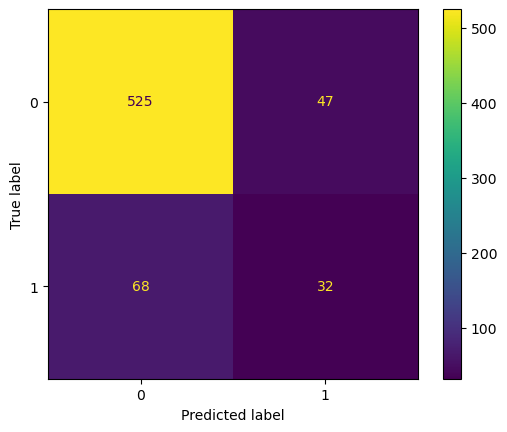

In [896]:
pred= gb_cv.predict(X_test)
plot_confusion_matrix(gb_cv, X_test, y_test)
print(classification_report(y_test, pred));

## CATBOOST MODEL
This model seem to be more robust.

In [1063]:
#lets try the catboost model

cat = CatBoostClassifier(learning_rate=0.05, iterations=100, random_seed=42)
cat.fit(X_sampl, y_sampl)

0:	learn: 0.6658668	total: 4.2ms	remaining: 416ms
1:	learn: 0.6448782	total: 6.6ms	remaining: 324ms
2:	learn: 0.6250668	total: 8.12ms	remaining: 263ms
3:	learn: 0.6002382	total: 9.38ms	remaining: 225ms
4:	learn: 0.5798017	total: 10.8ms	remaining: 205ms
5:	learn: 0.5646459	total: 12.8ms	remaining: 201ms
6:	learn: 0.5498636	total: 14.2ms	remaining: 189ms
7:	learn: 0.5353406	total: 15.4ms	remaining: 177ms
8:	learn: 0.5202980	total: 16.9ms	remaining: 170ms
9:	learn: 0.5093996	total: 18.3ms	remaining: 165ms
10:	learn: 0.5010162	total: 19.9ms	remaining: 161ms
11:	learn: 0.4884548	total: 21.2ms	remaining: 156ms
12:	learn: 0.4783180	total: 22.5ms	remaining: 151ms
13:	learn: 0.4701697	total: 23.7ms	remaining: 146ms
14:	learn: 0.4616118	total: 25ms	remaining: 142ms
15:	learn: 0.4546314	total: 26.6ms	remaining: 140ms
16:	learn: 0.4472681	total: 28.1ms	remaining: 137ms
17:	learn: 0.4387299	total: 29.4ms	remaining: 134ms
18:	learn: 0.4326032	total: 30.8ms	remaining: 131ms
19:	learn: 0.4265533	total

In [1047]:
cat_result = get_score(cat, X_val, y_val, 'CatboostVal')

cat_result

model  precision    recall   f1  accuracy       auc
0  CatboostVal   0.486486  0.514286  0.5  0.847134  0.709761

In [1048]:
cat_result_Test = get_score(cat, X_test, y_test, 'CatboostTest')

cat_result_Test

model  precision  recall        f1  accuracy       auc
0  CatboostTest    0.52381    0.66  0.584071  0.860119  0.777552

In [1049]:
pd.concat([cat_result, cat_result_Test], axis = 0)

model  precision    recall        f1  accuracy       auc
0   CatboostVal   0.486486  0.514286  0.500000  0.847134  0.709761
0  CatboostTest   0.523810  0.660000  0.584071  0.860119  0.777552

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.52      0.66      0.58       100

    accuracy                           0.86       672
   macro avg       0.73      0.78      0.75       672
weighted avg       0.88      0.86      0.87       672



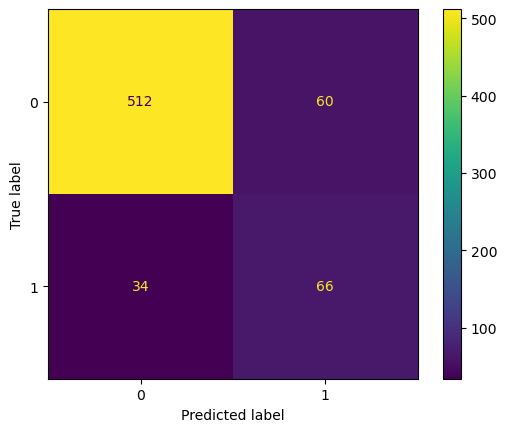

In [1050]:
pred= cat.predict(X_test)
plot_confusion_matrix(cat, X_test, y_test)
print(classification_report(y_test, pred));

## Catboosting Model Hyperparameter tuning

In [1051]:
cat = CatBoostClassifier(random_state=46)

cat_param= {
            'depth': [4,5,6,7,8,9, 10],
            'learning_rate': [0.01,0.02,0.03,0.04],
            'iterations': [10, 20,30,40,50,60,70,80,90, 100]
    }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

cat_gs = GridSearchCV(cat, param_grid=cat_param, scoring= scoring, cv=4, refit= 'recall')


In [1052]:
%%time
cat_gs.fit(X_sampl, y_sampl)

0:	learn: 0.6892331	total: 1.13ms	remaining: 10.2ms
1:	learn: 0.6859020	total: 2.16ms	remaining: 8.66ms
2:	learn: 0.6820390	total: 3ms	remaining: 7.01ms
3:	learn: 0.6786034	total: 3.76ms	remaining: 5.63ms
4:	learn: 0.6749524	total: 4.51ms	remaining: 4.51ms
5:	learn: 0.6703659	total: 5.32ms	remaining: 3.55ms
6:	learn: 0.6666283	total: 6.03ms	remaining: 2.58ms
7:	learn: 0.6634652	total: 6.81ms	remaining: 1.7ms
8:	learn: 0.6594160	total: 7.57ms	remaining: 841us
9:	learn: 0.6561130	total: 8.3ms	remaining: 0us
0:	learn: 0.6893577	total: 1.52ms	remaining: 13.7ms
1:	learn: 0.6850667	total: 2.19ms	remaining: 8.77ms
2:	learn: 0.6813882	total: 2.79ms	remaining: 6.5ms
3:	learn: 0.6783012	total: 3.52ms	remaining: 5.29ms
4:	learn: 0.6746756	total: 4.14ms	remaining: 4.14ms
5:	learn: 0.6720564	total: 4.91ms	remaining: 3.28ms
6:	learn: 0.6684748	total: 5.61ms	remaining: 2.4ms
7:	learn: 0.6652708	total: 6.33ms	remaining: 1.58ms
8:	learn: 0.6629331	total: 7.13ms	remaining: 792us
9:	learn: 0.6597989	tota

0:	learn: 0.6893577	total: 1.42ms	remaining: 27ms
1:	learn: 0.6850667	total: 2.21ms	remaining: 19.9ms
2:	learn: 0.6813882	total: 2.86ms	remaining: 16.2ms
3:	learn: 0.6783012	total: 3.47ms	remaining: 13.9ms
4:	learn: 0.6746756	total: 4.19ms	remaining: 12.6ms
5:	learn: 0.6720564	total: 4.77ms	remaining: 11.1ms
6:	learn: 0.6684748	total: 5.33ms	remaining: 9.91ms
7:	learn: 0.6652708	total: 5.97ms	remaining: 8.95ms
8:	learn: 0.6629331	total: 6.55ms	remaining: 8.01ms
9:	learn: 0.6597989	total: 7.15ms	remaining: 7.15ms
10:	learn: 0.6569988	total: 7.92ms	remaining: 6.48ms
11:	learn: 0.6538661	total: 8.6ms	remaining: 5.73ms
12:	learn: 0.6512265	total: 9.24ms	remaining: 4.98ms
13:	learn: 0.6488025	total: 9.92ms	remaining: 4.25ms
14:	learn: 0.6463219	total: 10.6ms	remaining: 3.52ms
15:	learn: 0.6441859	total: 11.4ms	remaining: 2.86ms
16:	learn: 0.6419124	total: 12.4ms	remaining: 2.19ms
17:	learn: 0.6392917	total: 13.6ms	remaining: 1.51ms
18:	learn: 0.6372501	total: 14.5ms	remaining: 765us
19:	lea

0:	learn: 0.6795844	total: 784us	remaining: 14.9ms
1:	learn: 0.6676569	total: 2.05ms	remaining: 18.5ms
2:	learn: 0.6545258	total: 2.67ms	remaining: 15.2ms
3:	learn: 0.6464295	total: 3.34ms	remaining: 13.4ms
4:	learn: 0.6352771	total: 3.87ms	remaining: 11.6ms
5:	learn: 0.6250474	total: 4.45ms	remaining: 10.4ms
6:	learn: 0.6145597	total: 5.02ms	remaining: 9.32ms
7:	learn: 0.6043791	total: 5.57ms	remaining: 8.36ms
8:	learn: 0.5990843	total: 6.21ms	remaining: 7.6ms
9:	learn: 0.5926330	total: 6.81ms	remaining: 6.81ms
10:	learn: 0.5851160	total: 7.36ms	remaining: 6.02ms
11:	learn: 0.5766479	total: 7.93ms	remaining: 5.29ms
12:	learn: 0.5704925	total: 8.61ms	remaining: 4.63ms
13:	learn: 0.5639312	total: 9.17ms	remaining: 3.93ms
14:	learn: 0.5583488	total: 9.94ms	remaining: 3.31ms
15:	learn: 0.5521135	total: 10.7ms	remaining: 2.68ms
16:	learn: 0.5460315	total: 11.5ms	remaining: 2.03ms
17:	learn: 0.5413971	total: 12.4ms	remaining: 1.38ms
18:	learn: 0.5354190	total: 13.2ms	remaining: 695us
19:	le

26:	learn: 0.5241951	total: 18.8ms	remaining: 2.08ms
27:	learn: 0.5194655	total: 19.9ms	remaining: 1.42ms
28:	learn: 0.5141728	total: 20.7ms	remaining: 714us
29:	learn: 0.5098870	total: 21.7ms	remaining: 0us
0:	learn: 0.6819758	total: 953us	remaining: 27.6ms
1:	learn: 0.6698552	total: 1.76ms	remaining: 24.7ms
2:	learn: 0.6616693	total: 2.5ms	remaining: 22.5ms
3:	learn: 0.6535227	total: 3.12ms	remaining: 20.3ms
4:	learn: 0.6419168	total: 3.78ms	remaining: 18.9ms
5:	learn: 0.6353595	total: 4.46ms	remaining: 17.8ms
6:	learn: 0.6290258	total: 5.12ms	remaining: 16.8ms
7:	learn: 0.6212229	total: 5.77ms	remaining: 15.9ms
8:	learn: 0.6165750	total: 6.41ms	remaining: 15ms
9:	learn: 0.6092903	total: 7.1ms	remaining: 14.2ms
10:	learn: 0.6014430	total: 7.73ms	remaining: 13.3ms
11:	learn: 0.5944823	total: 8.36ms	remaining: 12.5ms
12:	learn: 0.5884263	total: 8.97ms	remaining: 11.7ms
13:	learn: 0.5835248	total: 9.63ms	remaining: 11ms
14:	learn: 0.5789346	total: 10.5ms	remaining: 10.5ms
15:	learn: 0.5

0:	learn: 0.6896886	total: 1.49ms	remaining: 58.1ms
1:	learn: 0.6864723	total: 2.28ms	remaining: 43.4ms
2:	learn: 0.6831610	total: 3.07ms	remaining: 37.8ms
3:	learn: 0.6801414	total: 3.81ms	remaining: 34.3ms
4:	learn: 0.6768045	total: 5.2ms	remaining: 36.4ms
5:	learn: 0.6741960	total: 5.84ms	remaining: 33.1ms
6:	learn: 0.6695286	total: 6.52ms	remaining: 30.8ms
7:	learn: 0.6663211	total: 7.17ms	remaining: 28.7ms
8:	learn: 0.6643802	total: 7.83ms	remaining: 27ms
9:	learn: 0.6618778	total: 8.47ms	remaining: 25.4ms
10:	learn: 0.6588450	total: 9.24ms	remaining: 24.4ms
11:	learn: 0.6562728	total: 10.1ms	remaining: 23.6ms
12:	learn: 0.6537567	total: 10.9ms	remaining: 22.6ms
13:	learn: 0.6508910	total: 11.7ms	remaining: 21.7ms
14:	learn: 0.6481597	total: 12.6ms	remaining: 21ms
15:	learn: 0.6463053	total: 13.6ms	remaining: 20.4ms
16:	learn: 0.6440498	total: 14.3ms	remaining: 19.4ms
17:	learn: 0.6417508	total: 15.1ms	remaining: 18.5ms
18:	learn: 0.6389858	total: 16ms	remaining: 17.6ms
19:	learn:

11:	learn: 0.6275961	total: 7.96ms	remaining: 18.6ms
12:	learn: 0.6233272	total: 8.79ms	remaining: 18.3ms
13:	learn: 0.6185504	total: 9.44ms	remaining: 17.5ms
14:	learn: 0.6145183	total: 10ms	remaining: 16.7ms
15:	learn: 0.6108491	total: 10.9ms	remaining: 16.4ms
16:	learn: 0.6063507	total: 11.8ms	remaining: 16ms
17:	learn: 0.6034896	total: 12.5ms	remaining: 15.3ms
18:	learn: 0.5997080	total: 13.2ms	remaining: 14.6ms
19:	learn: 0.5952687	total: 13.8ms	remaining: 13.8ms
20:	learn: 0.5915095	total: 14.5ms	remaining: 13.2ms
21:	learn: 0.5872950	total: 15.2ms	remaining: 12.5ms
22:	learn: 0.5847423	total: 16ms	remaining: 11.9ms
23:	learn: 0.5815629	total: 16.7ms	remaining: 11.1ms
24:	learn: 0.5790987	total: 17.2ms	remaining: 10.3ms
25:	learn: 0.5762581	total: 18.1ms	remaining: 9.72ms
26:	learn: 0.5735207	total: 18.9ms	remaining: 9.08ms
27:	learn: 0.5708461	total: 19.7ms	remaining: 8.46ms
28:	learn: 0.5672076	total: 20.5ms	remaining: 7.77ms
29:	learn: 0.5641973	total: 21.1ms	remaining: 7.04ms

34:	learn: 0.5064089	total: 24.4ms	remaining: 3.49ms
35:	learn: 0.5026300	total: 25.2ms	remaining: 2.8ms
36:	learn: 0.5000106	total: 26.1ms	remaining: 2.11ms
37:	learn: 0.4962711	total: 26.8ms	remaining: 1.41ms
38:	learn: 0.4943642	total: 27.5ms	remaining: 704us
39:	learn: 0.4912163	total: 28.3ms	remaining: 0us
0:	learn: 0.6814909	total: 714us	remaining: 27.9ms
1:	learn: 0.6735244	total: 1.45ms	remaining: 27.6ms
2:	learn: 0.6633803	total: 2.09ms	remaining: 25.8ms
3:	learn: 0.6558325	total: 2.71ms	remaining: 24.4ms
4:	learn: 0.6464012	total: 3.32ms	remaining: 23.3ms
5:	learn: 0.6402866	total: 4.05ms	remaining: 23ms
6:	learn: 0.6331247	total: 4.68ms	remaining: 22.1ms
7:	learn: 0.6257349	total: 5.35ms	remaining: 21.4ms
8:	learn: 0.6192311	total: 5.97ms	remaining: 20.6ms
9:	learn: 0.6124078	total: 6.76ms	remaining: 20.3ms
10:	learn: 0.6065247	total: 7.61ms	remaining: 20.1ms
11:	learn: 0.6011166	total: 8.41ms	remaining: 19.6ms
12:	learn: 0.5959210	total: 9.47ms	remaining: 19.7ms
13:	learn: 

0:	learn: 0.6777142	total: 1.12ms	remaining: 43.9ms
1:	learn: 0.6673468	total: 2.1ms	remaining: 40ms
2:	learn: 0.6535587	total: 2.74ms	remaining: 33.8ms
3:	learn: 0.6441512	total: 3.41ms	remaining: 30.7ms
4:	learn: 0.6324242	total: 4.08ms	remaining: 28.5ms
5:	learn: 0.6248846	total: 4.7ms	remaining: 26.6ms
6:	learn: 0.6161976	total: 5.3ms	remaining: 25ms
7:	learn: 0.6073442	total: 5.92ms	remaining: 23.7ms
8:	learn: 0.6010822	total: 6.58ms	remaining: 22.7ms
9:	learn: 0.5934854	total: 7.48ms	remaining: 22.4ms
10:	learn: 0.5861236	total: 8.2ms	remaining: 21.6ms
11:	learn: 0.5776194	total: 8.89ms	remaining: 20.7ms
12:	learn: 0.5689303	total: 9.54ms	remaining: 19.8ms
13:	learn: 0.5623887	total: 10.4ms	remaining: 19.3ms
14:	learn: 0.5559536	total: 11.3ms	remaining: 18.8ms
15:	learn: 0.5520367	total: 12.7ms	remaining: 19.1ms
16:	learn: 0.5463120	total: 13.5ms	remaining: 18.2ms
17:	learn: 0.5400720	total: 14.4ms	remaining: 17.6ms
18:	learn: 0.5346772	total: 15.4ms	remaining: 17.1ms
19:	learn: 

0:	learn: 0.6892073	total: 911us	remaining: 44.7ms
1:	learn: 0.6864215	total: 2.47ms	remaining: 59.4ms
2:	learn: 0.6826221	total: 3.13ms	remaining: 49ms
3:	learn: 0.6790981	total: 3.76ms	remaining: 43.3ms
4:	learn: 0.6756610	total: 4.4ms	remaining: 39.6ms
5:	learn: 0.6732544	total: 5.07ms	remaining: 37.2ms
6:	learn: 0.6693802	total: 5.67ms	remaining: 34.9ms
7:	learn: 0.6661207	total: 6.27ms	remaining: 32.9ms
8:	learn: 0.6633180	total: 6.85ms	remaining: 31.2ms
9:	learn: 0.6603799	total: 7.41ms	remaining: 29.6ms
10:	learn: 0.6574753	total: 8.07ms	remaining: 28.6ms
11:	learn: 0.6545201	total: 8.72ms	remaining: 27.6ms
12:	learn: 0.6520173	total: 9.42ms	remaining: 26.8ms
13:	learn: 0.6491949	total: 10.1ms	remaining: 26ms
14:	learn: 0.6464265	total: 10.9ms	remaining: 25.5ms
15:	learn: 0.6447377	total: 11.8ms	remaining: 25ms
16:	learn: 0.6425970	total: 12.7ms	remaining: 24.6ms
17:	learn: 0.6396545	total: 13.6ms	remaining: 24.1ms
18:	learn: 0.6365723	total: 14.4ms	remaining: 23.5ms
19:	learn: 

49:	learn: 0.5130239	total: 38.2ms	remaining: 0us
0:	learn: 0.6853223	total: 1.69ms	remaining: 82.7ms
1:	learn: 0.6798835	total: 2.46ms	remaining: 59ms
2:	learn: 0.6726010	total: 3.1ms	remaining: 48.5ms
3:	learn: 0.6672910	total: 3.71ms	remaining: 42.6ms
4:	learn: 0.6608730	total: 4.42ms	remaining: 39.8ms
5:	learn: 0.6564324	total: 5.11ms	remaining: 37.5ms
6:	learn: 0.6493651	total: 5.78ms	remaining: 35.5ms
7:	learn: 0.6438763	total: 6.38ms	remaining: 33.5ms
8:	learn: 0.6390076	total: 7.06ms	remaining: 32.2ms
9:	learn: 0.6332909	total: 7.73ms	remaining: 30.9ms
10:	learn: 0.6290395	total: 8.33ms	remaining: 29.5ms
11:	learn: 0.6248051	total: 8.98ms	remaining: 28.4ms
12:	learn: 0.6206598	total: 9.62ms	remaining: 27.4ms
13:	learn: 0.6160317	total: 10.7ms	remaining: 27.4ms
14:	learn: 0.6117698	total: 11.4ms	remaining: 26.7ms
15:	learn: 0.6091011	total: 12.3ms	remaining: 26.1ms
16:	learn: 0.6057773	total: 13.2ms	remaining: 25.6ms
17:	learn: 0.6011581	total: 14.4ms	remaining: 25.7ms
18:	learn

23:	learn: 0.5440299	total: 16.5ms	remaining: 17.8ms
24:	learn: 0.5396764	total: 17.5ms	remaining: 17.5ms
25:	learn: 0.5347740	total: 18.4ms	remaining: 16.9ms
26:	learn: 0.5317273	total: 19.1ms	remaining: 16.2ms
27:	learn: 0.5280400	total: 19.7ms	remaining: 15.5ms
28:	learn: 0.5249325	total: 20.6ms	remaining: 14.9ms
29:	learn: 0.5208081	total: 21.2ms	remaining: 14.2ms
30:	learn: 0.5185087	total: 22.1ms	remaining: 13.6ms
31:	learn: 0.5154978	total: 22.8ms	remaining: 12.8ms
32:	learn: 0.5119174	total: 23.4ms	remaining: 12.1ms
33:	learn: 0.5098726	total: 24.1ms	remaining: 11.3ms
34:	learn: 0.5064089	total: 24.8ms	remaining: 10.6ms
35:	learn: 0.5026300	total: 25.5ms	remaining: 9.92ms
36:	learn: 0.5000106	total: 26.3ms	remaining: 9.25ms
37:	learn: 0.4962711	total: 27ms	remaining: 8.53ms
38:	learn: 0.4943642	total: 27.9ms	remaining: 7.87ms
39:	learn: 0.4912163	total: 28.6ms	remaining: 7.16ms
40:	learn: 0.4876011	total: 29.4ms	remaining: 6.45ms
41:	learn: 0.4835149	total: 30.2ms	remaining: 5.

0:	learn: 0.6795844	total: 720us	remaining: 35.3ms
1:	learn: 0.6676569	total: 1.5ms	remaining: 35.9ms
2:	learn: 0.6545258	total: 2.09ms	remaining: 32.8ms
3:	learn: 0.6464295	total: 2.71ms	remaining: 31.2ms
4:	learn: 0.6352771	total: 3.34ms	remaining: 30.1ms
5:	learn: 0.6250474	total: 4.04ms	remaining: 29.6ms
6:	learn: 0.6145597	total: 4.67ms	remaining: 28.7ms
7:	learn: 0.6043791	total: 5.3ms	remaining: 27.8ms
8:	learn: 0.5990843	total: 5.92ms	remaining: 27ms
9:	learn: 0.5926330	total: 6.54ms	remaining: 26.1ms
10:	learn: 0.5851160	total: 7.1ms	remaining: 25.2ms
11:	learn: 0.5766479	total: 7.71ms	remaining: 24.4ms
12:	learn: 0.5704925	total: 8.45ms	remaining: 24ms
13:	learn: 0.5639312	total: 9.18ms	remaining: 23.6ms
14:	learn: 0.5583488	total: 10.2ms	remaining: 23.8ms
15:	learn: 0.5521135	total: 11ms	remaining: 23.4ms
16:	learn: 0.5460315	total: 11.7ms	remaining: 22.8ms
17:	learn: 0.5413971	total: 12.5ms	remaining: 22.2ms
18:	learn: 0.5354190	total: 13.9ms	remaining: 22.7ms
19:	learn: 0.

33:	learn: 0.6023615	total: 25.1ms	remaining: 19.2ms
34:	learn: 0.6000334	total: 25.9ms	remaining: 18.5ms
35:	learn: 0.5981561	total: 26.8ms	remaining: 17.9ms
36:	learn: 0.5957976	total: 27.5ms	remaining: 17.1ms
37:	learn: 0.5932944	total: 28.3ms	remaining: 16.4ms
38:	learn: 0.5918580	total: 28.9ms	remaining: 15.6ms
39:	learn: 0.5900118	total: 29.6ms	remaining: 14.8ms
40:	learn: 0.5871194	total: 30.2ms	remaining: 14ms
41:	learn: 0.5859518	total: 31.1ms	remaining: 13.3ms
42:	learn: 0.5841096	total: 31.8ms	remaining: 12.6ms
43:	learn: 0.5822904	total: 32.5ms	remaining: 11.8ms
44:	learn: 0.5797983	total: 33.2ms	remaining: 11.1ms
45:	learn: 0.5782884	total: 33.9ms	remaining: 10.3ms
46:	learn: 0.5765522	total: 34.5ms	remaining: 9.55ms
47:	learn: 0.5750461	total: 35.1ms	remaining: 8.79ms
48:	learn: 0.5730762	total: 36.1ms	remaining: 8.1ms
49:	learn: 0.5710803	total: 36.8ms	remaining: 7.35ms
50:	learn: 0.5693405	total: 37.6ms	remaining: 6.63ms
51:	learn: 0.5672952	total: 38.4ms	remaining: 5.9

47:	learn: 0.5024695	total: 36.5ms	remaining: 9.12ms
48:	learn: 0.4999945	total: 37.7ms	remaining: 8.47ms
49:	learn: 0.4980721	total: 38.6ms	remaining: 7.71ms
50:	learn: 0.4963722	total: 39.1ms	remaining: 6.91ms
51:	learn: 0.4938524	total: 39.9ms	remaining: 6.14ms
52:	learn: 0.4920916	total: 40.6ms	remaining: 5.36ms
53:	learn: 0.4899130	total: 41.5ms	remaining: 4.62ms
54:	learn: 0.4881469	total: 42.4ms	remaining: 3.85ms
55:	learn: 0.4864336	total: 43ms	remaining: 3.07ms
56:	learn: 0.4842019	total: 43.7ms	remaining: 2.3ms
57:	learn: 0.4822543	total: 44.6ms	remaining: 1.54ms
58:	learn: 0.4805121	total: 45.5ms	remaining: 770us
59:	learn: 0.4787914	total: 46.2ms	remaining: 0us
0:	learn: 0.6856337	total: 1.44ms	remaining: 84.8ms
1:	learn: 0.6773058	total: 2.8ms	remaining: 81.2ms
2:	learn: 0.6702554	total: 3.53ms	remaining: 67.1ms
3:	learn: 0.6644806	total: 4.15ms	remaining: 58.2ms
4:	learn: 0.6562052	total: 5.05ms	remaining: 55.6ms
5:	learn: 0.6514404	total: 5.8ms	remaining: 52.2ms
6:	learn

0:	learn: 0.6816150	total: 1.62ms	remaining: 95.4ms
1:	learn: 0.6713761	total: 2.49ms	remaining: 72.3ms
2:	learn: 0.6597207	total: 3.12ms	remaining: 59.2ms
3:	learn: 0.6518428	total: 3.75ms	remaining: 52.5ms
4:	learn: 0.6425337	total: 4.4ms	remaining: 48.4ms
5:	learn: 0.6350167	total: 4.98ms	remaining: 44.8ms
6:	learn: 0.6258011	total: 5.58ms	remaining: 42.3ms
7:	learn: 0.6183321	total: 6.24ms	remaining: 40.6ms
8:	learn: 0.6090794	total: 6.88ms	remaining: 39ms
9:	learn: 0.6024045	total: 7.47ms	remaining: 37.3ms
10:	learn: 0.5963063	total: 8.18ms	remaining: 36.4ms
11:	learn: 0.5900539	total: 8.79ms	remaining: 35.2ms
12:	learn: 0.5852471	total: 9.48ms	remaining: 34.3ms
13:	learn: 0.5788233	total: 10.1ms	remaining: 33.1ms
14:	learn: 0.5726678	total: 10.7ms	remaining: 32.2ms
15:	learn: 0.5692602	total: 11.4ms	remaining: 31.4ms
16:	learn: 0.5631733	total: 12.2ms	remaining: 30.9ms
17:	learn: 0.5588451	total: 13.1ms	remaining: 30.5ms
18:	learn: 0.5563961	total: 13.8ms	remaining: 29.7ms
19:	le

17:	learn: 0.5688597	total: 12.6ms	remaining: 29.4ms
18:	learn: 0.5632351	total: 13.6ms	remaining: 29.4ms
19:	learn: 0.5566439	total: 14.5ms	remaining: 28.9ms
20:	learn: 0.5517054	total: 15.1ms	remaining: 28.1ms
21:	learn: 0.5477137	total: 15.9ms	remaining: 27.5ms
22:	learn: 0.5435526	total: 16.5ms	remaining: 26.6ms
23:	learn: 0.5401707	total: 17.2ms	remaining: 25.8ms
24:	learn: 0.5362108	total: 17.9ms	remaining: 25ms
25:	learn: 0.5330399	total: 18.6ms	remaining: 24.3ms
26:	learn: 0.5283898	total: 19.3ms	remaining: 23.6ms
27:	learn: 0.5250570	total: 20.1ms	remaining: 23ms
28:	learn: 0.5217004	total: 21ms	remaining: 22.4ms
29:	learn: 0.5169848	total: 21.7ms	remaining: 21.7ms
30:	learn: 0.5139679	total: 22.6ms	remaining: 21.2ms
31:	learn: 0.5098155	total: 23.6ms	remaining: 20.7ms
32:	learn: 0.5066994	total: 24.4ms	remaining: 20ms
33:	learn: 0.5039369	total: 25.4ms	remaining: 19.4ms
34:	learn: 0.5004009	total: 26.2ms	remaining: 18.7ms
35:	learn: 0.4969465	total: 26.9ms	remaining: 17.9ms
3

30:	learn: 0.4863902	total: 22.3ms	remaining: 20.9ms
31:	learn: 0.4828079	total: 23.3ms	remaining: 20.4ms
32:	learn: 0.4789423	total: 24ms	remaining: 19.6ms
33:	learn: 0.4760930	total: 24.8ms	remaining: 18.9ms
34:	learn: 0.4730640	total: 25.5ms	remaining: 18.2ms
35:	learn: 0.4704663	total: 26.2ms	remaining: 17.4ms
36:	learn: 0.4678317	total: 26.9ms	remaining: 16.7ms
37:	learn: 0.4637895	total: 27.6ms	remaining: 16ms
38:	learn: 0.4617730	total: 28.3ms	remaining: 15.2ms
39:	learn: 0.4587532	total: 29.1ms	remaining: 14.5ms
40:	learn: 0.4551764	total: 29.8ms	remaining: 13.8ms
41:	learn: 0.4530532	total: 30.5ms	remaining: 13.1ms
42:	learn: 0.4493177	total: 31.2ms	remaining: 12.3ms
43:	learn: 0.4462585	total: 31.8ms	remaining: 11.6ms
44:	learn: 0.4446136	total: 32.8ms	remaining: 10.9ms
45:	learn: 0.4428905	total: 33.8ms	remaining: 10.3ms
46:	learn: 0.4406539	total: 34.6ms	remaining: 9.58ms
47:	learn: 0.4388661	total: 35.4ms	remaining: 8.84ms
48:	learn: 0.4363074	total: 36.1ms	remaining: 8.11

38:	learn: 0.5918580	total: 29ms	remaining: 23ms
39:	learn: 0.5900118	total: 29.7ms	remaining: 22.3ms
40:	learn: 0.5871194	total: 30.6ms	remaining: 21.7ms
41:	learn: 0.5859518	total: 31.3ms	remaining: 20.9ms
42:	learn: 0.5841096	total: 32.1ms	remaining: 20.2ms
43:	learn: 0.5822904	total: 32.9ms	remaining: 19.4ms
44:	learn: 0.5797983	total: 33.7ms	remaining: 18.7ms
45:	learn: 0.5782884	total: 34.3ms	remaining: 17.9ms
46:	learn: 0.5765522	total: 34.9ms	remaining: 17.1ms
47:	learn: 0.5750461	total: 35.6ms	remaining: 16.3ms
48:	learn: 0.5730762	total: 36.4ms	remaining: 15.6ms
49:	learn: 0.5710803	total: 37.1ms	remaining: 14.8ms
50:	learn: 0.5693405	total: 37.7ms	remaining: 14.1ms
51:	learn: 0.5672952	total: 39ms	remaining: 13.5ms
52:	learn: 0.5657491	total: 39.8ms	remaining: 12.8ms
53:	learn: 0.5644101	total: 40.5ms	remaining: 12ms
54:	learn: 0.5627452	total: 41.3ms	remaining: 11.3ms
55:	learn: 0.5606653	total: 42.1ms	remaining: 10.5ms
56:	learn: 0.5590215	total: 43ms	remaining: 9.82ms
57:

20:	learn: 0.5808784	total: 15.5ms	remaining: 36.2ms
21:	learn: 0.5759542	total: 16.3ms	remaining: 35.6ms
22:	learn: 0.5730166	total: 16.9ms	remaining: 34.5ms
23:	learn: 0.5687179	total: 17.5ms	remaining: 33.6ms
24:	learn: 0.5654843	total: 18.2ms	remaining: 32.8ms
25:	learn: 0.5614730	total: 19ms	remaining: 32.2ms
26:	learn: 0.5577369	total: 19.7ms	remaining: 31.4ms
27:	learn: 0.5545616	total: 20.3ms	remaining: 30.5ms
28:	learn: 0.5508105	total: 21.1ms	remaining: 29.8ms
29:	learn: 0.5466682	total: 21.8ms	remaining: 29.1ms
30:	learn: 0.5435839	total: 22.5ms	remaining: 28.3ms
31:	learn: 0.5401862	total: 23.1ms	remaining: 27.4ms
32:	learn: 0.5375024	total: 23.8ms	remaining: 26.6ms
33:	learn: 0.5356268	total: 24.5ms	remaining: 26ms
34:	learn: 0.5325230	total: 25.3ms	remaining: 25.3ms
35:	learn: 0.5300890	total: 26.1ms	remaining: 24.6ms
36:	learn: 0.5277132	total: 27ms	remaining: 24.1ms
37:	learn: 0.5241022	total: 27.7ms	remaining: 23.3ms
38:	learn: 0.5222426	total: 28.6ms	remaining: 22.8ms

0:	learn: 0.6853223	total: 797us	remaining: 55.1ms
1:	learn: 0.6798835	total: 1.84ms	remaining: 62.5ms
2:	learn: 0.6726010	total: 3.09ms	remaining: 69ms
3:	learn: 0.6672910	total: 3.73ms	remaining: 61.5ms
4:	learn: 0.6608730	total: 4.32ms	remaining: 56.2ms
5:	learn: 0.6564324	total: 4.92ms	remaining: 52.5ms
6:	learn: 0.6493651	total: 5.54ms	remaining: 49.9ms
7:	learn: 0.6438763	total: 6.18ms	remaining: 47.9ms
8:	learn: 0.6390076	total: 6.96ms	remaining: 47.2ms
9:	learn: 0.6332909	total: 7.64ms	remaining: 45.8ms
10:	learn: 0.6290395	total: 8.22ms	remaining: 44.1ms
11:	learn: 0.6248051	total: 8.85ms	remaining: 42.8ms
12:	learn: 0.6206598	total: 9.47ms	remaining: 41.5ms
13:	learn: 0.6160317	total: 10ms	remaining: 40.2ms
14:	learn: 0.6117698	total: 10.8ms	remaining: 39.6ms
15:	learn: 0.6091011	total: 11.6ms	remaining: 39ms
16:	learn: 0.6057773	total: 12.3ms	remaining: 38.2ms
17:	learn: 0.6011581	total: 13ms	remaining: 37.6ms
18:	learn: 0.5965679	total: 13.7ms	remaining: 36.7ms
19:	learn: 0

66:	learn: 0.4306022	total: 52.5ms	remaining: 2.35ms
67:	learn: 0.4292754	total: 53.6ms	remaining: 1.58ms
68:	learn: 0.4281956	total: 54.4ms	remaining: 787us
69:	learn: 0.4261647	total: 55ms	remaining: 0us
0:	learn: 0.6829087	total: 1.44ms	remaining: 99.1ms
1:	learn: 0.6737304	total: 2.32ms	remaining: 78.8ms
2:	learn: 0.6645598	total: 3.54ms	remaining: 79ms
3:	learn: 0.6581005	total: 4.34ms	remaining: 71.6ms
4:	learn: 0.6492628	total: 5.02ms	remaining: 65.2ms
5:	learn: 0.6411734	total: 5.65ms	remaining: 60.2ms
6:	learn: 0.6294389	total: 6.36ms	remaining: 57.2ms
7:	learn: 0.6221456	total: 6.97ms	remaining: 54.1ms
8:	learn: 0.6178793	total: 7.61ms	remaining: 51.6ms
9:	learn: 0.6124219	total: 8.26ms	remaining: 49.5ms
10:	learn: 0.6063324	total: 8.91ms	remaining: 47.8ms
11:	learn: 0.5990959	total: 9.61ms	remaining: 46.5ms
12:	learn: 0.5936918	total: 10.3ms	remaining: 45ms
13:	learn: 0.5878767	total: 11.2ms	remaining: 44.7ms
14:	learn: 0.5829244	total: 12.1ms	remaining: 44.5ms
15:	learn: 0.

42:	learn: 0.4422520	total: 32.7ms	remaining: 20.5ms
43:	learn: 0.4395518	total: 33.6ms	remaining: 19.8ms
44:	learn: 0.4371613	total: 34.3ms	remaining: 19ms
45:	learn: 0.4351812	total: 34.9ms	remaining: 18.2ms
46:	learn: 0.4329501	total: 36.2ms	remaining: 17.7ms
47:	learn: 0.4315311	total: 36.9ms	remaining: 16.9ms
48:	learn: 0.4287116	total: 37.7ms	remaining: 16.1ms
49:	learn: 0.4263086	total: 38.4ms	remaining: 15.4ms
50:	learn: 0.4239862	total: 39ms	remaining: 14.5ms
51:	learn: 0.4206815	total: 39.6ms	remaining: 13.7ms
52:	learn: 0.4175591	total: 40.3ms	remaining: 12.9ms
53:	learn: 0.4153573	total: 41.2ms	remaining: 12.2ms
54:	learn: 0.4137482	total: 41.8ms	remaining: 11.4ms
55:	learn: 0.4111272	total: 42.5ms	remaining: 10.6ms
56:	learn: 0.4083705	total: 43.4ms	remaining: 9.9ms
57:	learn: 0.4061178	total: 44.2ms	remaining: 9.15ms
58:	learn: 0.4035591	total: 45.1ms	remaining: 8.41ms
59:	learn: 0.4016127	total: 45.8ms	remaining: 7.63ms
60:	learn: 0.3994853	total: 46.6ms	remaining: 6.87m

27:	learn: 0.4988419	total: 19.6ms	remaining: 29.4ms
28:	learn: 0.4950877	total: 20.4ms	remaining: 28.9ms
29:	learn: 0.4918093	total: 21.1ms	remaining: 28.2ms
30:	learn: 0.4883869	total: 22.3ms	remaining: 28.1ms
31:	learn: 0.4848863	total: 23.1ms	remaining: 27.5ms
32:	learn: 0.4812224	total: 23.9ms	remaining: 26.8ms
33:	learn: 0.4781041	total: 24.8ms	remaining: 26.3ms
34:	learn: 0.4750964	total: 25.6ms	remaining: 25.6ms
35:	learn: 0.4712716	total: 26.3ms	remaining: 24.9ms
36:	learn: 0.4686935	total: 27.2ms	remaining: 24.3ms
37:	learn: 0.4627587	total: 28.6ms	remaining: 24ms
38:	learn: 0.4601102	total: 29.4ms	remaining: 23.4ms
39:	learn: 0.4568363	total: 30.3ms	remaining: 22.7ms
40:	learn: 0.4538160	total: 31ms	remaining: 21.9ms
41:	learn: 0.4522389	total: 31.8ms	remaining: 21.2ms
42:	learn: 0.4479247	total: 32.8ms	remaining: 20.6ms
43:	learn: 0.4448799	total: 33.7ms	remaining: 19.9ms
44:	learn: 0.4430453	total: 34.7ms	remaining: 19.3ms
45:	learn: 0.4395835	total: 35.6ms	remaining: 18.6

0:	learn: 0.6896886	total: 1.46ms	remaining: 115ms
1:	learn: 0.6864723	total: 2.32ms	remaining: 90.4ms
2:	learn: 0.6831610	total: 2.92ms	remaining: 74.8ms
3:	learn: 0.6801414	total: 3.49ms	remaining: 66.3ms
4:	learn: 0.6768045	total: 4.08ms	remaining: 61.2ms
5:	learn: 0.6741960	total: 4.71ms	remaining: 58ms
6:	learn: 0.6695286	total: 5.31ms	remaining: 55.4ms
7:	learn: 0.6663211	total: 5.88ms	remaining: 52.9ms
8:	learn: 0.6643802	total: 6.53ms	remaining: 51.5ms
9:	learn: 0.6618778	total: 7.09ms	remaining: 49.6ms
10:	learn: 0.6588450	total: 7.72ms	remaining: 48.4ms
11:	learn: 0.6562728	total: 8.53ms	remaining: 48.4ms
12:	learn: 0.6537567	total: 9.29ms	remaining: 47.9ms
13:	learn: 0.6508910	total: 10.1ms	remaining: 47.8ms
14:	learn: 0.6481597	total: 11ms	remaining: 47.5ms
15:	learn: 0.6463053	total: 11.9ms	remaining: 47.4ms
16:	learn: 0.6440498	total: 12.5ms	remaining: 46.5ms
17:	learn: 0.6417508	total: 13.5ms	remaining: 46.5ms
18:	learn: 0.6389858	total: 14.3ms	remaining: 46ms
19:	learn:

54:	learn: 0.4881469	total: 40.2ms	remaining: 18.3ms
55:	learn: 0.4864336	total: 41ms	remaining: 17.6ms
56:	learn: 0.4842019	total: 42ms	remaining: 17ms
57:	learn: 0.4822543	total: 42.7ms	remaining: 16.2ms
58:	learn: 0.4805121	total: 43.6ms	remaining: 15.5ms
59:	learn: 0.4787914	total: 44.3ms	remaining: 14.8ms
60:	learn: 0.4770691	total: 45.5ms	remaining: 14.2ms
61:	learn: 0.4752602	total: 46.2ms	remaining: 13.4ms
62:	learn: 0.4734086	total: 47ms	remaining: 12.7ms
63:	learn: 0.4714818	total: 47.8ms	remaining: 11.9ms
64:	learn: 0.4698881	total: 48.6ms	remaining: 11.2ms
65:	learn: 0.4683851	total: 49.4ms	remaining: 10.5ms
66:	learn: 0.4663043	total: 50.4ms	remaining: 9.78ms
67:	learn: 0.4645992	total: 51.3ms	remaining: 9.06ms
68:	learn: 0.4632338	total: 52.1ms	remaining: 8.31ms
69:	learn: 0.4612660	total: 53ms	remaining: 7.57ms
70:	learn: 0.4592785	total: 53.8ms	remaining: 6.82ms
71:	learn: 0.4579563	total: 54.6ms	remaining: 6.07ms
72:	learn: 0.4566000	total: 55.6ms	remaining: 5.33ms
73:

76:	learn: 0.4658151	total: 60.9ms	remaining: 2.37ms
77:	learn: 0.4648185	total: 61.7ms	remaining: 1.58ms
78:	learn: 0.4639541	total: 62.5ms	remaining: 791us
79:	learn: 0.4627911	total: 63.2ms	remaining: 0us
0:	learn: 0.6853223	total: 862us	remaining: 68.1ms
1:	learn: 0.6798835	total: 2.15ms	remaining: 84ms
2:	learn: 0.6726010	total: 2.81ms	remaining: 72ms
3:	learn: 0.6672910	total: 3.51ms	remaining: 66.7ms
4:	learn: 0.6608730	total: 4.23ms	remaining: 63.5ms
5:	learn: 0.6564324	total: 5.67ms	remaining: 69.9ms
6:	learn: 0.6493651	total: 6.38ms	remaining: 66.5ms
7:	learn: 0.6438763	total: 6.99ms	remaining: 62.9ms
8:	learn: 0.6390076	total: 7.63ms	remaining: 60.2ms
9:	learn: 0.6332909	total: 8.24ms	remaining: 57.7ms
10:	learn: 0.6290395	total: 8.96ms	remaining: 56.2ms
11:	learn: 0.6248051	total: 10.1ms	remaining: 57.1ms
12:	learn: 0.6206598	total: 11.1ms	remaining: 57ms
13:	learn: 0.6160317	total: 11.9ms	remaining: 56ms
14:	learn: 0.6117698	total: 12.7ms	remaining: 55ms
15:	learn: 0.60910

0:	learn: 0.6819758	total: 825us	remaining: 65.2ms
1:	learn: 0.6698552	total: 1.55ms	remaining: 60.6ms
2:	learn: 0.6616693	total: 2.36ms	remaining: 60.7ms
3:	learn: 0.6535227	total: 3.12ms	remaining: 59.3ms
4:	learn: 0.6419168	total: 3.7ms	remaining: 55.4ms
5:	learn: 0.6353595	total: 4.28ms	remaining: 52.8ms
6:	learn: 0.6290258	total: 4.96ms	remaining: 51.7ms
7:	learn: 0.6212229	total: 5.59ms	remaining: 50.3ms
8:	learn: 0.6165750	total: 6.17ms	remaining: 48.7ms
9:	learn: 0.6092903	total: 6.94ms	remaining: 48.6ms
10:	learn: 0.6014430	total: 8.29ms	remaining: 52ms
11:	learn: 0.5944823	total: 8.98ms	remaining: 50.9ms
12:	learn: 0.5884263	total: 9.78ms	remaining: 50.4ms
13:	learn: 0.5835248	total: 10.7ms	remaining: 50.4ms
14:	learn: 0.5789346	total: 11.6ms	remaining: 50.1ms
15:	learn: 0.5745151	total: 12.4ms	remaining: 49.8ms
16:	learn: 0.5704279	total: 13.2ms	remaining: 49ms
17:	learn: 0.5653887	total: 14ms	remaining: 48.1ms
18:	learn: 0.5619498	total: 14.8ms	remaining: 47.6ms
19:	learn: 

52:	learn: 0.4571371	total: 39.9ms	remaining: 20.3ms
53:	learn: 0.4538868	total: 40.8ms	remaining: 19.6ms
54:	learn: 0.4521603	total: 41.5ms	remaining: 18.8ms
55:	learn: 0.4502368	total: 42.2ms	remaining: 18.1ms
56:	learn: 0.4481631	total: 43ms	remaining: 17.4ms
57:	learn: 0.4468129	total: 43.8ms	remaining: 16.6ms
58:	learn: 0.4446040	total: 44.6ms	remaining: 15.9ms
59:	learn: 0.4429192	total: 45.4ms	remaining: 15.1ms
60:	learn: 0.4418200	total: 46.2ms	remaining: 14.4ms
61:	learn: 0.4395453	total: 47ms	remaining: 13.6ms
62:	learn: 0.4376081	total: 47.8ms	remaining: 12.9ms
63:	learn: 0.4353007	total: 49ms	remaining: 12.3ms
64:	learn: 0.4323638	total: 49.7ms	remaining: 11.5ms
65:	learn: 0.4308315	total: 50.4ms	remaining: 10.7ms
66:	learn: 0.4288506	total: 51.3ms	remaining: 9.96ms
67:	learn: 0.4272280	total: 52.1ms	remaining: 9.19ms
68:	learn: 0.4250285	total: 53ms	remaining: 8.46ms
69:	learn: 0.4228324	total: 53.8ms	remaining: 7.68ms
70:	learn: 0.4219277	total: 54.5ms	remaining: 6.9ms
71

1:	learn: 0.6676569	total: 1.56ms	remaining: 61ms
2:	learn: 0.6545258	total: 2.29ms	remaining: 58.7ms
3:	learn: 0.6464295	total: 3.12ms	remaining: 59.2ms
4:	learn: 0.6352771	total: 3.7ms	remaining: 55.6ms
5:	learn: 0.6250474	total: 4.4ms	remaining: 54.3ms
6:	learn: 0.6145597	total: 4.99ms	remaining: 52ms
7:	learn: 0.6043791	total: 5.64ms	remaining: 50.8ms
8:	learn: 0.5990843	total: 6.32ms	remaining: 49.8ms
9:	learn: 0.5926330	total: 6.99ms	remaining: 48.9ms
10:	learn: 0.5851160	total: 7.69ms	remaining: 48.2ms
11:	learn: 0.5766479	total: 8.34ms	remaining: 47.3ms
12:	learn: 0.5704925	total: 8.95ms	remaining: 46.2ms
13:	learn: 0.5639312	total: 9.65ms	remaining: 45.5ms
14:	learn: 0.5583488	total: 10.3ms	remaining: 44.8ms
15:	learn: 0.5521135	total: 11.1ms	remaining: 44.5ms
16:	learn: 0.5460315	total: 12ms	remaining: 44.4ms
17:	learn: 0.5413971	total: 12.7ms	remaining: 43.9ms
18:	learn: 0.5354190	total: 13.6ms	remaining: 43.6ms
19:	learn: 0.5294335	total: 14.6ms	remaining: 43.9ms
20:	learn:

51:	learn: 0.5609423	total: 39ms	remaining: 28.5ms
52:	learn: 0.5593678	total: 39.8ms	remaining: 27.8ms
53:	learn: 0.5580752	total: 40.6ms	remaining: 27.1ms
54:	learn: 0.5568623	total: 41.4ms	remaining: 26.3ms
55:	learn: 0.5553935	total: 42.2ms	remaining: 25.6ms
56:	learn: 0.5535958	total: 42.9ms	remaining: 24.9ms
57:	learn: 0.5520418	total: 43.9ms	remaining: 24.2ms
58:	learn: 0.5507416	total: 44.5ms	remaining: 23.4ms
59:	learn: 0.5490753	total: 45.1ms	remaining: 22.5ms
60:	learn: 0.5475196	total: 45.8ms	remaining: 21.8ms
61:	learn: 0.5457815	total: 46.7ms	remaining: 21.1ms
62:	learn: 0.5438244	total: 47.5ms	remaining: 20.4ms
63:	learn: 0.5428016	total: 48.4ms	remaining: 19.7ms
64:	learn: 0.5411375	total: 49.2ms	remaining: 18.9ms
65:	learn: 0.5398489	total: 49.9ms	remaining: 18.2ms
66:	learn: 0.5385093	total: 50.7ms	remaining: 17.4ms
67:	learn: 0.5368481	total: 51.6ms	remaining: 16.7ms
68:	learn: 0.5361295	total: 52.5ms	remaining: 16ms
69:	learn: 0.5344015	total: 53.5ms	remaining: 15.3

86:	learn: 0.5223437	total: 64.4ms	remaining: 2.22ms
87:	learn: 0.5211799	total: 65.3ms	remaining: 1.48ms
88:	learn: 0.5200244	total: 66ms	remaining: 741us
89:	learn: 0.5191262	total: 66.7ms	remaining: 0us
0:	learn: 0.6892073	total: 1.66ms	remaining: 148ms
1:	learn: 0.6864215	total: 2.58ms	remaining: 113ms
2:	learn: 0.6826221	total: 3.32ms	remaining: 96.4ms
3:	learn: 0.6790981	total: 3.95ms	remaining: 84.8ms
4:	learn: 0.6756610	total: 4.59ms	remaining: 78ms
5:	learn: 0.6732544	total: 5.23ms	remaining: 73.2ms
6:	learn: 0.6693802	total: 5.89ms	remaining: 69.8ms
7:	learn: 0.6661207	total: 6.53ms	remaining: 66.9ms
8:	learn: 0.6633180	total: 7.17ms	remaining: 64.5ms
9:	learn: 0.6603799	total: 7.77ms	remaining: 62.1ms
10:	learn: 0.6574753	total: 8.42ms	remaining: 60.5ms
11:	learn: 0.6545201	total: 9.24ms	remaining: 60.1ms
12:	learn: 0.6520173	total: 9.86ms	remaining: 58.4ms
13:	learn: 0.6491949	total: 10.5ms	remaining: 57ms
14:	learn: 0.6464265	total: 11.2ms	remaining: 55.8ms
15:	learn: 0.64

9:	learn: 0.6304369	total: 7ms	remaining: 56ms
10:	learn: 0.6246519	total: 7.75ms	remaining: 55.6ms
11:	learn: 0.6193534	total: 8.39ms	remaining: 54.6ms
12:	learn: 0.6159755	total: 8.98ms	remaining: 53.2ms
13:	learn: 0.6120267	total: 10ms	remaining: 54.3ms
14:	learn: 0.6083540	total: 10.8ms	remaining: 54ms
15:	learn: 0.6049332	total: 11.7ms	remaining: 54.2ms
16:	learn: 0.6016203	total: 12.6ms	remaining: 54.1ms
17:	learn: 0.5975002	total: 13.5ms	remaining: 53.9ms
18:	learn: 0.5944283	total: 14.3ms	remaining: 53.5ms
19:	learn: 0.5901279	total: 15.1ms	remaining: 52.7ms
20:	learn: 0.5877388	total: 15.9ms	remaining: 52.2ms
21:	learn: 0.5828468	total: 16.6ms	remaining: 51.2ms
22:	learn: 0.5801723	total: 17.4ms	remaining: 50.8ms
23:	learn: 0.5757811	total: 18.1ms	remaining: 49.9ms
24:	learn: 0.5725686	total: 19ms	remaining: 49.4ms
25:	learn: 0.5696525	total: 19.8ms	remaining: 48.7ms
26:	learn: 0.5662877	total: 20.7ms	remaining: 48.3ms
27:	learn: 0.5622712	total: 21.5ms	remaining: 47.6ms
28:	l

37:	learn: 0.5393336	total: 28.3ms	remaining: 38.8ms
38:	learn: 0.5376733	total: 29.2ms	remaining: 38.1ms
39:	learn: 0.5351281	total: 30.1ms	remaining: 37.6ms
40:	learn: 0.5321861	total: 31ms	remaining: 37ms
41:	learn: 0.5306515	total: 31.6ms	remaining: 36.1ms
42:	learn: 0.5283311	total: 32.3ms	remaining: 35.3ms
43:	learn: 0.5259753	total: 32.9ms	remaining: 34.4ms
44:	learn: 0.5233875	total: 33.6ms	remaining: 33.6ms
45:	learn: 0.5212482	total: 34.4ms	remaining: 32.9ms
46:	learn: 0.5190739	total: 35ms	remaining: 32ms
47:	learn: 0.5174394	total: 35.7ms	remaining: 31.2ms
48:	learn: 0.5152560	total: 37ms	remaining: 30.9ms
49:	learn: 0.5130025	total: 37.7ms	remaining: 30.2ms
50:	learn: 0.5108048	total: 38.6ms	remaining: 29.5ms
51:	learn: 0.5079772	total: 39.4ms	remaining: 28.8ms
52:	learn: 0.5057791	total: 40.1ms	remaining: 28ms
53:	learn: 0.5029221	total: 41ms	remaining: 27.4ms
54:	learn: 0.5013275	total: 42.1ms	remaining: 26.8ms
55:	learn: 0.4984723	total: 42.9ms	remaining: 26.1ms
56:	lea

61:	learn: 0.4397242	total: 47.1ms	remaining: 21.3ms
62:	learn: 0.4375812	total: 48.1ms	remaining: 20.6ms
63:	learn: 0.4354940	total: 48.9ms	remaining: 19.9ms
64:	learn: 0.4338607	total: 49.6ms	remaining: 19.1ms
65:	learn: 0.4323165	total: 50.4ms	remaining: 18.3ms
66:	learn: 0.4306022	total: 51ms	remaining: 17.5ms
67:	learn: 0.4292754	total: 51.7ms	remaining: 16.7ms
68:	learn: 0.4281956	total: 52.4ms	remaining: 16ms
69:	learn: 0.4261647	total: 53.1ms	remaining: 15.2ms
70:	learn: 0.4247152	total: 53.8ms	remaining: 14.4ms
71:	learn: 0.4233490	total: 54.6ms	remaining: 13.7ms
72:	learn: 0.4210242	total: 55.2ms	remaining: 12.9ms
73:	learn: 0.4196629	total: 55.8ms	remaining: 12.1ms
74:	learn: 0.4185708	total: 56.4ms	remaining: 11.3ms
75:	learn: 0.4160744	total: 57.4ms	remaining: 10.6ms
76:	learn: 0.4137466	total: 58.2ms	remaining: 9.82ms
77:	learn: 0.4125467	total: 59ms	remaining: 9.07ms
78:	learn: 0.4115240	total: 59.9ms	remaining: 8.34ms
79:	learn: 0.4102949	total: 60.8ms	remaining: 7.6ms


0:	learn: 0.6779136	total: 881us	remaining: 78.5ms
1:	learn: 0.6645879	total: 1.99ms	remaining: 87.6ms
2:	learn: 0.6496702	total: 2.78ms	remaining: 80.6ms
3:	learn: 0.6397499	total: 3.4ms	remaining: 73.1ms
4:	learn: 0.6283054	total: 4.06ms	remaining: 69ms
5:	learn: 0.6190299	total: 4.74ms	remaining: 66.4ms
6:	learn: 0.6079482	total: 5.47ms	remaining: 64.8ms
7:	learn: 0.5995876	total: 6.15ms	remaining: 63ms
8:	learn: 0.5884532	total: 6.81ms	remaining: 61.3ms
9:	learn: 0.5800321	total: 7.43ms	remaining: 59.5ms
10:	learn: 0.5728976	total: 8.09ms	remaining: 58.1ms
11:	learn: 0.5651494	total: 8.72ms	remaining: 56.7ms
12:	learn: 0.5596854	total: 9.34ms	remaining: 55.4ms
13:	learn: 0.5522500	total: 9.98ms	remaining: 54.2ms
14:	learn: 0.5467533	total: 10.6ms	remaining: 52.9ms
15:	learn: 0.5426686	total: 11.4ms	remaining: 52.9ms
16:	learn: 0.5363468	total: 12.5ms	remaining: 53.6ms
17:	learn: 0.5297426	total: 13.4ms	remaining: 53.7ms
18:	learn: 0.5270488	total: 14.2ms	remaining: 52.9ms
19:	learn

38:	learn: 0.4617730	total: 27.9ms	remaining: 36.5ms
39:	learn: 0.4587532	total: 28.8ms	remaining: 36ms
40:	learn: 0.4551764	total: 29.5ms	remaining: 35.3ms
41:	learn: 0.4530532	total: 30.5ms	remaining: 34.9ms
42:	learn: 0.4493177	total: 31.2ms	remaining: 34.1ms
43:	learn: 0.4462585	total: 31.8ms	remaining: 33.3ms
44:	learn: 0.4446136	total: 32.6ms	remaining: 32.6ms
45:	learn: 0.4428905	total: 33.3ms	remaining: 31.9ms
46:	learn: 0.4406539	total: 34ms	remaining: 31.1ms
47:	learn: 0.4388661	total: 34.7ms	remaining: 30.4ms
48:	learn: 0.4363074	total: 35.5ms	remaining: 29.7ms
49:	learn: 0.4342000	total: 36.2ms	remaining: 29ms
50:	learn: 0.4312370	total: 36.9ms	remaining: 28.2ms
51:	learn: 0.4288962	total: 37.8ms	remaining: 27.6ms
52:	learn: 0.4264350	total: 38.6ms	remaining: 26.9ms
53:	learn: 0.4249642	total: 39.6ms	remaining: 26.4ms
54:	learn: 0.4233511	total: 40.5ms	remaining: 25.8ms
55:	learn: 0.4212714	total: 41.6ms	remaining: 25.2ms
56:	learn: 0.4190350	total: 42.5ms	remaining: 24.6ms

65:	learn: 0.5398489	total: 48.9ms	remaining: 25.2ms
66:	learn: 0.5385093	total: 49.8ms	remaining: 24.5ms
67:	learn: 0.5368481	total: 50.5ms	remaining: 23.8ms
68:	learn: 0.5361295	total: 51.2ms	remaining: 23ms
69:	learn: 0.5344015	total: 52.1ms	remaining: 22.3ms
70:	learn: 0.5326480	total: 52.8ms	remaining: 21.6ms
71:	learn: 0.5315927	total: 53.5ms	remaining: 20.8ms
72:	learn: 0.5297017	total: 54.1ms	remaining: 20ms
73:	learn: 0.5282115	total: 54.7ms	remaining: 19.2ms
74:	learn: 0.5266834	total: 55.4ms	remaining: 18.5ms
75:	learn: 0.5255822	total: 56.3ms	remaining: 17.8ms
76:	learn: 0.5244469	total: 57.1ms	remaining: 17.1ms
77:	learn: 0.5228752	total: 58.3ms	remaining: 16.5ms
78:	learn: 0.5210710	total: 59.1ms	remaining: 15.7ms
79:	learn: 0.5198238	total: 59.8ms	remaining: 14.9ms
80:	learn: 0.5185375	total: 60.5ms	remaining: 14.2ms
81:	learn: 0.5169792	total: 61.4ms	remaining: 13.5ms
82:	learn: 0.5157948	total: 62.3ms	remaining: 12.8ms
83:	learn: 0.5145985	total: 63ms	remaining: 12ms
8

76:	learn: 0.5336572	total: 59.3ms	remaining: 17.7ms
77:	learn: 0.5320481	total: 60.3ms	remaining: 17ms
78:	learn: 0.5308486	total: 61ms	remaining: 16.2ms
79:	learn: 0.5299298	total: 61.7ms	remaining: 15.4ms
80:	learn: 0.5288143	total: 62.4ms	remaining: 14.6ms
81:	learn: 0.5275783	total: 63.2ms	remaining: 13.9ms
82:	learn: 0.5265904	total: 63.9ms	remaining: 13.1ms
83:	learn: 0.5253670	total: 64.7ms	remaining: 12.3ms
84:	learn: 0.5244202	total: 65.5ms	remaining: 11.6ms
85:	learn: 0.5233361	total: 66.1ms	remaining: 10.8ms
86:	learn: 0.5223437	total: 67ms	remaining: 10ms
87:	learn: 0.5211799	total: 67.7ms	remaining: 9.24ms
88:	learn: 0.5200244	total: 69.2ms	remaining: 8.55ms
89:	learn: 0.5191262	total: 70ms	remaining: 7.78ms
90:	learn: 0.5182254	total: 70.9ms	remaining: 7.01ms
91:	learn: 0.5170706	total: 71.7ms	remaining: 6.23ms
92:	learn: 0.5161666	total: 72.6ms	remaining: 5.46ms
93:	learn: 0.5153149	total: 73.6ms	remaining: 4.7ms
94:	learn: 0.5143702	total: 74.8ms	remaining: 3.94ms
95:	

84:	learn: 0.4409827	total: 66.2ms	remaining: 11.7ms
85:	learn: 0.4394911	total: 67ms	remaining: 10.9ms
86:	learn: 0.4379685	total: 68ms	remaining: 10.2ms
87:	learn: 0.4362642	total: 68.8ms	remaining: 9.38ms
88:	learn: 0.4350801	total: 70.3ms	remaining: 8.68ms
89:	learn: 0.4330620	total: 71ms	remaining: 7.88ms
90:	learn: 0.4319527	total: 71.7ms	remaining: 7.09ms
91:	learn: 0.4308119	total: 72.4ms	remaining: 6.3ms
92:	learn: 0.4292806	total: 73.2ms	remaining: 5.5ms
93:	learn: 0.4275967	total: 73.9ms	remaining: 4.72ms
94:	learn: 0.4263338	total: 74.6ms	remaining: 3.92ms
95:	learn: 0.4253090	total: 75.2ms	remaining: 3.13ms
96:	learn: 0.4241915	total: 75.9ms	remaining: 2.35ms
97:	learn: 0.4230854	total: 76.7ms	remaining: 1.56ms
98:	learn: 0.4222157	total: 77.5ms	remaining: 782us
99:	learn: 0.4208240	total: 78.2ms	remaining: 0us
0:	learn: 0.6856337	total: 972us	remaining: 96.2ms
1:	learn: 0.6773058	total: 1.84ms	remaining: 90.4ms
2:	learn: 0.6702554	total: 2.49ms	remaining: 80.5ms
3:	learn:

99:	learn: 0.4363920	total: 75.7ms	remaining: 0us
0:	learn: 0.6853223	total: 957us	remaining: 94.8ms
1:	learn: 0.6798835	total: 1.72ms	remaining: 84.2ms
2:	learn: 0.6726010	total: 2.57ms	remaining: 83.1ms
3:	learn: 0.6672910	total: 3.26ms	remaining: 78.3ms
4:	learn: 0.6608730	total: 3.96ms	remaining: 75.2ms
5:	learn: 0.6564324	total: 4.61ms	remaining: 72.2ms
6:	learn: 0.6493651	total: 5.29ms	remaining: 70.3ms
7:	learn: 0.6438763	total: 5.94ms	remaining: 68.3ms
8:	learn: 0.6390076	total: 7.2ms	remaining: 72.8ms
9:	learn: 0.6332909	total: 7.82ms	remaining: 70.4ms
10:	learn: 0.6290395	total: 8.47ms	remaining: 68.5ms
11:	learn: 0.6248051	total: 9.12ms	remaining: 66.9ms
12:	learn: 0.6206598	total: 9.77ms	remaining: 65.4ms
13:	learn: 0.6160317	total: 10.4ms	remaining: 63.6ms
14:	learn: 0.6117698	total: 11.1ms	remaining: 62.8ms
15:	learn: 0.6091011	total: 11.9ms	remaining: 62.4ms
16:	learn: 0.6057773	total: 12.6ms	remaining: 61.5ms
17:	learn: 0.6011581	total: 13.6ms	remaining: 62ms
18:	learn:

0:	learn: 0.6819758	total: 1.31ms	remaining: 130ms
1:	learn: 0.6698552	total: 2.17ms	remaining: 106ms
2:	learn: 0.6616693	total: 2.83ms	remaining: 91.7ms
3:	learn: 0.6535227	total: 3.56ms	remaining: 85.6ms
4:	learn: 0.6419168	total: 4.3ms	remaining: 81.8ms
5:	learn: 0.6353595	total: 5ms	remaining: 78.4ms
6:	learn: 0.6290258	total: 5.64ms	remaining: 74.9ms
7:	learn: 0.6212229	total: 6.26ms	remaining: 72ms
8:	learn: 0.6165750	total: 6.9ms	remaining: 69.7ms
9:	learn: 0.6092903	total: 7.71ms	remaining: 69.4ms
10:	learn: 0.6014430	total: 8.46ms	remaining: 68.4ms
11:	learn: 0.5944823	total: 9.15ms	remaining: 67.1ms
12:	learn: 0.5884263	total: 10.2ms	remaining: 68.2ms
13:	learn: 0.5835248	total: 11ms	remaining: 67.6ms
14:	learn: 0.5789346	total: 11.7ms	remaining: 66.3ms
15:	learn: 0.5745151	total: 12.5ms	remaining: 65.8ms
16:	learn: 0.5704279	total: 13.3ms	remaining: 65ms
17:	learn: 0.5653887	total: 14.1ms	remaining: 64ms
18:	learn: 0.5619498	total: 15ms	remaining: 63.8ms
19:	learn: 0.5566342

16:	learn: 0.5745683	total: 11.7ms	remaining: 57.1ms
17:	learn: 0.5688597	total: 12.5ms	remaining: 57ms
18:	learn: 0.5632351	total: 13.2ms	remaining: 56.3ms
19:	learn: 0.5566439	total: 13.9ms	remaining: 55.5ms
20:	learn: 0.5517054	total: 14.5ms	remaining: 54.5ms
21:	learn: 0.5477137	total: 15.2ms	remaining: 53.9ms
22:	learn: 0.5435526	total: 15.9ms	remaining: 53.2ms
23:	learn: 0.5401707	total: 16.7ms	remaining: 52.8ms
24:	learn: 0.5362108	total: 17.4ms	remaining: 52.1ms
25:	learn: 0.5330399	total: 18.1ms	remaining: 51.6ms
26:	learn: 0.5283898	total: 18.8ms	remaining: 50.8ms
27:	learn: 0.5250570	total: 19.4ms	remaining: 49.9ms
28:	learn: 0.5217004	total: 20.1ms	remaining: 49.2ms
29:	learn: 0.5169848	total: 20.8ms	remaining: 48.6ms
30:	learn: 0.5139679	total: 21.6ms	remaining: 48ms
31:	learn: 0.5098155	total: 22.2ms	remaining: 47.3ms
32:	learn: 0.5066994	total: 23.1ms	remaining: 46.9ms
33:	learn: 0.5039369	total: 23.9ms	remaining: 46.5ms
34:	learn: 0.5004009	total: 24.8ms	remaining: 46.1

23:	learn: 0.5107390	total: 16.6ms	remaining: 52.4ms
24:	learn: 0.5052925	total: 17.3ms	remaining: 52ms
25:	learn: 0.5014921	total: 18ms	remaining: 51.2ms
26:	learn: 0.4975108	total: 18.8ms	remaining: 50.8ms
27:	learn: 0.4933234	total: 19.4ms	remaining: 49.9ms
28:	learn: 0.4889193	total: 20.3ms	remaining: 49.6ms
29:	learn: 0.4858798	total: 20.9ms	remaining: 48.8ms
30:	learn: 0.4824734	total: 21.6ms	remaining: 48ms
31:	learn: 0.4787237	total: 22.4ms	remaining: 47.6ms
32:	learn: 0.4757724	total: 23.1ms	remaining: 46.9ms
33:	learn: 0.4731025	total: 23.8ms	remaining: 46.3ms
34:	learn: 0.4709332	total: 24.4ms	remaining: 45.4ms
35:	learn: 0.4680148	total: 25.1ms	remaining: 44.5ms
36:	learn: 0.4654507	total: 25.9ms	remaining: 44.1ms
37:	learn: 0.4621670	total: 26.7ms	remaining: 43.6ms
38:	learn: 0.4586873	total: 27.6ms	remaining: 43.2ms
39:	learn: 0.4560385	total: 28.5ms	remaining: 42.7ms
40:	learn: 0.4535297	total: 29.5ms	remaining: 42.4ms
41:	learn: 0.4505894	total: 30.4ms	remaining: 42ms
4

33:	learn: 0.4781041	total: 25.3ms	remaining: 49.2ms
34:	learn: 0.4750964	total: 26.2ms	remaining: 48.6ms
35:	learn: 0.4712716	total: 26.9ms	remaining: 47.8ms
36:	learn: 0.4686935	total: 27.6ms	remaining: 47.1ms
37:	learn: 0.4627587	total: 28.4ms	remaining: 46.3ms
38:	learn: 0.4601102	total: 29.4ms	remaining: 46ms
39:	learn: 0.4568363	total: 30.3ms	remaining: 45.4ms
40:	learn: 0.4538160	total: 30.9ms	remaining: 44.5ms
41:	learn: 0.4522389	total: 31.7ms	remaining: 43.8ms
42:	learn: 0.4479247	total: 32.3ms	remaining: 42.8ms
43:	learn: 0.4448799	total: 33ms	remaining: 42.1ms
44:	learn: 0.4430453	total: 33.8ms	remaining: 41.3ms
45:	learn: 0.4395835	total: 34.6ms	remaining: 40.6ms
46:	learn: 0.4371591	total: 35.4ms	remaining: 39.9ms
47:	learn: 0.4352269	total: 36.1ms	remaining: 39.1ms
48:	learn: 0.4314350	total: 36.9ms	remaining: 38.4ms
49:	learn: 0.4284154	total: 37.6ms	remaining: 37.6ms
50:	learn: 0.4263593	total: 38.4ms	remaining: 36.9ms
51:	learn: 0.4241728	total: 39.2ms	remaining: 36.2

0:	learn: 0.6758159	total: 1.82ms	remaining: 16.4ms
1:	learn: 0.6637588	total: 2.88ms	remaining: 11.5ms
2:	learn: 0.6491346	total: 3.69ms	remaining: 8.62ms
3:	learn: 0.6343947	total: 4.49ms	remaining: 6.74ms
4:	learn: 0.6197832	total: 5.27ms	remaining: 5.27ms
5:	learn: 0.6062994	total: 6.08ms	remaining: 4.05ms
6:	learn: 0.5914933	total: 6.79ms	remaining: 2.91ms
7:	learn: 0.5793037	total: 7.55ms	remaining: 1.89ms
8:	learn: 0.5688025	total: 8.3ms	remaining: 922us
9:	learn: 0.5602978	total: 9.05ms	remaining: 0us
0:	learn: 0.6888562	total: 822us	remaining: 15.6ms
1:	learn: 0.6843012	total: 1.58ms	remaining: 14.2ms
2:	learn: 0.6793684	total: 2.35ms	remaining: 13.3ms
3:	learn: 0.6745559	total: 3.07ms	remaining: 12.3ms
4:	learn: 0.6706780	total: 3.78ms	remaining: 11.3ms
5:	learn: 0.6649709	total: 4.47ms	remaining: 10.4ms
6:	learn: 0.6598951	total: 5.19ms	remaining: 9.64ms
7:	learn: 0.6544961	total: 5.88ms	remaining: 8.82ms
8:	learn: 0.6506058	total: 6.66ms	remaining: 8.14ms
9:	learn: 0.647209

17:	learn: 0.5317532	total: 15.3ms	remaining: 1.7ms
18:	learn: 0.5276295	total: 16.4ms	remaining: 863us
19:	learn: 0.5223567	total: 17.4ms	remaining: 0us
0:	learn: 0.6764377	total: 1.06ms	remaining: 20.1ms
1:	learn: 0.6596964	total: 2.12ms	remaining: 19.1ms
2:	learn: 0.6445523	total: 2.91ms	remaining: 16.5ms
3:	learn: 0.6282627	total: 3.73ms	remaining: 14.9ms
4:	learn: 0.6170883	total: 4.49ms	remaining: 13.5ms
5:	learn: 0.6016377	total: 5.27ms	remaining: 12.3ms
6:	learn: 0.5866327	total: 6.04ms	remaining: 11.2ms
7:	learn: 0.5749744	total: 6.87ms	remaining: 10.3ms
8:	learn: 0.5668338	total: 7.58ms	remaining: 9.26ms
9:	learn: 0.5578462	total: 8.38ms	remaining: 8.38ms
10:	learn: 0.5487873	total: 9.11ms	remaining: 7.45ms
11:	learn: 0.5409994	total: 10.1ms	remaining: 6.72ms
12:	learn: 0.5313664	total: 11ms	remaining: 5.94ms
13:	learn: 0.5262454	total: 12.2ms	remaining: 5.22ms
14:	learn: 0.5169521	total: 13.2ms	remaining: 4.41ms
15:	learn: 0.5085444	total: 14.2ms	remaining: 3.54ms
16:	learn:

0:	learn: 0.6839197	total: 1.52ms	remaining: 44.2ms
1:	learn: 0.6761117	total: 2.39ms	remaining: 33.4ms
2:	learn: 0.6704092	total: 3.2ms	remaining: 28.8ms
3:	learn: 0.6624838	total: 3.97ms	remaining: 25.8ms
4:	learn: 0.6541803	total: 4.77ms	remaining: 23.8ms
5:	learn: 0.6470321	total: 5.65ms	remaining: 22.6ms
6:	learn: 0.6408096	total: 6.43ms	remaining: 21.1ms
7:	learn: 0.6342218	total: 7.55ms	remaining: 20.8ms
8:	learn: 0.6288089	total: 8.51ms	remaining: 19.9ms
9:	learn: 0.6236003	total: 9.43ms	remaining: 18.9ms
10:	learn: 0.6177097	total: 10.4ms	remaining: 17.9ms
11:	learn: 0.6092529	total: 11.4ms	remaining: 17.1ms
12:	learn: 0.6039158	total: 12.4ms	remaining: 16.2ms
13:	learn: 0.6007343	total: 13.5ms	remaining: 15.5ms
14:	learn: 0.5958705	total: 14.6ms	remaining: 14.6ms
15:	learn: 0.5893025	total: 15.7ms	remaining: 13.7ms
16:	learn: 0.5841338	total: 16.6ms	remaining: 12.7ms
17:	learn: 0.5777228	total: 17.3ms	remaining: 11.6ms
18:	learn: 0.5742460	total: 18.4ms	remaining: 10.7ms
19:	

14:	learn: 0.5243145	total: 12ms	remaining: 12ms
15:	learn: 0.5159542	total: 13ms	remaining: 11.4ms
16:	learn: 0.5085887	total: 14ms	remaining: 10.7ms
17:	learn: 0.5026220	total: 14.8ms	remaining: 9.87ms
18:	learn: 0.4985172	total: 15.7ms	remaining: 9.07ms
19:	learn: 0.4918318	total: 16.4ms	remaining: 8.21ms
20:	learn: 0.4868679	total: 17.3ms	remaining: 7.4ms
21:	learn: 0.4826505	total: 18.1ms	remaining: 6.59ms
22:	learn: 0.4760343	total: 19.1ms	remaining: 5.81ms
23:	learn: 0.4661871	total: 20ms	remaining: 5ms
24:	learn: 0.4622014	total: 20.8ms	remaining: 4.16ms
25:	learn: 0.4586331	total: 21.6ms	remaining: 3.33ms
26:	learn: 0.4541534	total: 22.6ms	remaining: 2.51ms
27:	learn: 0.4495817	total: 23.6ms	remaining: 1.69ms
28:	learn: 0.4456022	total: 24.6ms	remaining: 846us
29:	learn: 0.4426098	total: 25.5ms	remaining: 0us
0:	learn: 0.6888562	total: 1.74ms	remaining: 67.8ms
1:	learn: 0.6843012	total: 2.79ms	remaining: 53.1ms
2:	learn: 0.6793684	total: 3.67ms	remaining: 45.3ms
3:	learn: 0.67

39:	learn: 0.4954547	total: 37ms	remaining: 0us
0:	learn: 0.6843581	total: 1.05ms	remaining: 41.2ms
1:	learn: 0.6779880	total: 2ms	remaining: 37.9ms
2:	learn: 0.6700224	total: 2.86ms	remaining: 35.3ms
3:	learn: 0.6639405	total: 3.83ms	remaining: 34.5ms
4:	learn: 0.6554698	total: 4.7ms	remaining: 32.9ms
5:	learn: 0.6476409	total: 5.58ms	remaining: 31.6ms
6:	learn: 0.6386978	total: 6.41ms	remaining: 30.2ms
7:	learn: 0.6306406	total: 7.21ms	remaining: 28.8ms
8:	learn: 0.6216677	total: 8.02ms	remaining: 27.6ms
9:	learn: 0.6145952	total: 9.14ms	remaining: 27.4ms
10:	learn: 0.6095741	total: 10.5ms	remaining: 27.8ms
11:	learn: 0.6027524	total: 11.6ms	remaining: 27.1ms
12:	learn: 0.5968379	total: 12.8ms	remaining: 26.6ms
13:	learn: 0.5914514	total: 13.7ms	remaining: 25.5ms
14:	learn: 0.5858940	total: 14.7ms	remaining: 24.6ms
15:	learn: 0.5797332	total: 16.1ms	remaining: 24.2ms
16:	learn: 0.5754371	total: 17.4ms	remaining: 23.5ms
17:	learn: 0.5711348	total: 18.4ms	remaining: 22.5ms
18:	learn: 0

0:	learn: 0.6749636	total: 1.04ms	remaining: 40.7ms
1:	learn: 0.6600887	total: 2.41ms	remaining: 45.8ms
2:	learn: 0.6495485	total: 3.49ms	remaining: 43ms
3:	learn: 0.6387167	total: 5.11ms	remaining: 46ms
4:	learn: 0.6239913	total: 6.06ms	remaining: 42.4ms
5:	learn: 0.6116921	total: 7.54ms	remaining: 42.7ms
6:	learn: 0.6014275	total: 8.26ms	remaining: 39ms
7:	learn: 0.5904854	total: 9.02ms	remaining: 36.1ms
8:	learn: 0.5808431	total: 9.81ms	remaining: 33.8ms
9:	learn: 0.5721086	total: 11ms	remaining: 33.1ms
10:	learn: 0.5631427	total: 12.2ms	remaining: 32.2ms
11:	learn: 0.5564231	total: 13.2ms	remaining: 30.9ms
12:	learn: 0.5488364	total: 14.2ms	remaining: 29.5ms
13:	learn: 0.5433255	total: 15.2ms	remaining: 28.2ms
14:	learn: 0.5339334	total: 16.1ms	remaining: 26.9ms
15:	learn: 0.5248451	total: 17ms	remaining: 25.6ms
16:	learn: 0.5181769	total: 18.2ms	remaining: 24.6ms
17:	learn: 0.5125961	total: 19.3ms	remaining: 23.6ms
18:	learn: 0.5080933	total: 20.2ms	remaining: 22.4ms
19:	learn: 0.

29:	learn: 0.5226889	total: 27.2ms	remaining: 18.1ms
30:	learn: 0.5205103	total: 28ms	remaining: 17.2ms
31:	learn: 0.5166747	total: 29.1ms	remaining: 16.4ms
32:	learn: 0.5133454	total: 30.1ms	remaining: 15.5ms
33:	learn: 0.5107865	total: 31.2ms	remaining: 14.7ms
34:	learn: 0.5074266	total: 32ms	remaining: 13.7ms
35:	learn: 0.5044830	total: 32.9ms	remaining: 12.8ms
36:	learn: 0.5023812	total: 33.9ms	remaining: 11.9ms
37:	learn: 0.4984488	total: 34.7ms	remaining: 11ms
38:	learn: 0.4952931	total: 35.7ms	remaining: 10.1ms
39:	learn: 0.4924526	total: 36.6ms	remaining: 9.14ms
40:	learn: 0.4899341	total: 37.4ms	remaining: 8.21ms
41:	learn: 0.4873273	total: 38.7ms	remaining: 7.38ms
42:	learn: 0.4853012	total: 39.6ms	remaining: 6.44ms
43:	learn: 0.4830943	total: 40.6ms	remaining: 5.53ms
44:	learn: 0.4792122	total: 41.6ms	remaining: 4.62ms
45:	learn: 0.4766814	total: 42.7ms	remaining: 3.71ms
46:	learn: 0.4732504	total: 43.6ms	remaining: 2.78ms
47:	learn: 0.4706639	total: 44.5ms	remaining: 1.85ms

42:	learn: 0.4905108	total: 38.4ms	remaining: 6.26ms
43:	learn: 0.4872341	total: 39.3ms	remaining: 5.36ms
44:	learn: 0.4857026	total: 40.2ms	remaining: 4.47ms
45:	learn: 0.4833463	total: 41.2ms	remaining: 3.58ms
46:	learn: 0.4817052	total: 42.1ms	remaining: 2.69ms
47:	learn: 0.4786035	total: 43ms	remaining: 1.79ms
48:	learn: 0.4771465	total: 43.9ms	remaining: 896us
49:	learn: 0.4742291	total: 44.8ms	remaining: 0us
0:	learn: 0.6805011	total: 1.76ms	remaining: 86.2ms
1:	learn: 0.6675832	total: 2.76ms	remaining: 66.4ms
2:	learn: 0.6537587	total: 3.69ms	remaining: 57.8ms
3:	learn: 0.6410369	total: 4.69ms	remaining: 53.9ms
4:	learn: 0.6321596	total: 5.89ms	remaining: 53ms
5:	learn: 0.6196687	total: 6.74ms	remaining: 49.5ms
6:	learn: 0.6072971	total: 7.58ms	remaining: 46.6ms
7:	learn: 0.6002984	total: 8.36ms	remaining: 43.9ms
8:	learn: 0.5918715	total: 9.21ms	remaining: 42ms
9:	learn: 0.5841161	total: 10.1ms	remaining: 40.6ms
10:	learn: 0.5762956	total: 11ms	remaining: 39.2ms
11:	learn: 0.56

20:	learn: 0.4935492	total: 21.1ms	remaining: 29.1ms
21:	learn: 0.4873740	total: 22.3ms	remaining: 28.4ms
22:	learn: 0.4807625	total: 23.5ms	remaining: 27.6ms
23:	learn: 0.4734029	total: 24.6ms	remaining: 26.6ms
24:	learn: 0.4682069	total: 25.5ms	remaining: 25.5ms
25:	learn: 0.4640283	total: 26.4ms	remaining: 24.4ms
26:	learn: 0.4604548	total: 27.4ms	remaining: 23.4ms
27:	learn: 0.4563050	total: 28.3ms	remaining: 22.2ms
28:	learn: 0.4505505	total: 29.4ms	remaining: 21.3ms
29:	learn: 0.4482772	total: 30.4ms	remaining: 20.2ms
30:	learn: 0.4444955	total: 31.4ms	remaining: 19.3ms
31:	learn: 0.4399740	total: 32.4ms	remaining: 18.2ms
32:	learn: 0.4356470	total: 33.6ms	remaining: 17.3ms
33:	learn: 0.4328545	total: 34.8ms	remaining: 16.4ms
34:	learn: 0.4296352	total: 35.8ms	remaining: 15.3ms
35:	learn: 0.4259802	total: 36.9ms	remaining: 14.3ms
36:	learn: 0.4222896	total: 38.1ms	remaining: 13.4ms
37:	learn: 0.4183704	total: 39.2ms	remaining: 12.4ms
38:	learn: 0.4151685	total: 40.2ms	remaining: 

54:	learn: 0.5373798	total: 54.7ms	remaining: 4.97ms
55:	learn: 0.5355348	total: 56ms	remaining: 4ms
56:	learn: 0.5335335	total: 57.8ms	remaining: 3.04ms
57:	learn: 0.5320208	total: 58.5ms	remaining: 2.02ms
58:	learn: 0.5299975	total: 59.4ms	remaining: 1.01ms
59:	learn: 0.5287354	total: 60.4ms	remaining: 0us
0:	learn: 0.6887223	total: 1.18ms	remaining: 69.5ms
1:	learn: 0.6845282	total: 2.19ms	remaining: 63.4ms
2:	learn: 0.6803974	total: 3.14ms	remaining: 59.7ms
3:	learn: 0.6767333	total: 3.99ms	remaining: 55.8ms
4:	learn: 0.6722276	total: 4.87ms	remaining: 53.6ms
5:	learn: 0.6668794	total: 5.72ms	remaining: 51.5ms
6:	learn: 0.6625029	total: 6.66ms	remaining: 50.4ms
7:	learn: 0.6580323	total: 7.5ms	remaining: 48.8ms
8:	learn: 0.6552157	total: 8.39ms	remaining: 47.5ms
9:	learn: 0.6518459	total: 9.96ms	remaining: 49.8ms
10:	learn: 0.6488601	total: 11.1ms	remaining: 49.2ms
11:	learn: 0.6454034	total: 12.2ms	remaining: 48.9ms
12:	learn: 0.6417345	total: 13.3ms	remaining: 48.2ms
13:	learn: 0

0:	learn: 0.6805011	total: 1.3ms	remaining: 76.7ms
1:	learn: 0.6675832	total: 2.17ms	remaining: 62.9ms
2:	learn: 0.6537587	total: 2.89ms	remaining: 55ms
3:	learn: 0.6410369	total: 3.65ms	remaining: 51.1ms
4:	learn: 0.6321596	total: 4.38ms	remaining: 48.1ms
5:	learn: 0.6196687	total: 5.23ms	remaining: 47ms
6:	learn: 0.6072971	total: 5.96ms	remaining: 45.2ms
7:	learn: 0.6002984	total: 6.68ms	remaining: 43.4ms
8:	learn: 0.5918715	total: 7.49ms	remaining: 42.4ms
9:	learn: 0.5841161	total: 8.2ms	remaining: 41ms
10:	learn: 0.5762956	total: 9.01ms	remaining: 40.1ms
11:	learn: 0.5695570	total: 10.1ms	remaining: 40.5ms
12:	learn: 0.5614746	total: 11ms	remaining: 39.8ms
13:	learn: 0.5543964	total: 11.9ms	remaining: 38.9ms
14:	learn: 0.5469033	total: 12.8ms	remaining: 38.3ms
15:	learn: 0.5386238	total: 13.9ms	remaining: 38.1ms
16:	learn: 0.5319443	total: 15ms	remaining: 37.9ms
17:	learn: 0.5262775	total: 16ms	remaining: 37.2ms
18:	learn: 0.5225723	total: 16.9ms	remaining: 36.4ms
19:	learn: 0.5168

57:	learn: 0.4014650	total: 52.8ms	remaining: 1.82ms
58:	learn: 0.3995527	total: 53.9ms	remaining: 914us
59:	learn: 0.3968579	total: 55.5ms	remaining: 0us
0:	learn: 0.6800572	total: 1.88ms	remaining: 111ms
1:	learn: 0.6707603	total: 2.68ms	remaining: 77.7ms
2:	learn: 0.6593100	total: 3.42ms	remaining: 65.1ms
3:	learn: 0.6507036	total: 4.23ms	remaining: 59.2ms
4:	learn: 0.6388544	total: 5.03ms	remaining: 55.3ms
5:	learn: 0.6277247	total: 5.85ms	remaining: 52.6ms
6:	learn: 0.6154406	total: 6.57ms	remaining: 49.8ms
7:	learn: 0.6049391	total: 7.34ms	remaining: 47.7ms
8:	learn: 0.5968736	total: 8.09ms	remaining: 45.8ms
9:	learn: 0.5874096	total: 8.86ms	remaining: 44.3ms
10:	learn: 0.5793262	total: 9.63ms	remaining: 42.9ms
11:	learn: 0.5728408	total: 10.6ms	remaining: 42.4ms
12:	learn: 0.5656901	total: 11.6ms	remaining: 41.8ms
13:	learn: 0.5579148	total: 12.6ms	remaining: 41.5ms
14:	learn: 0.5510160	total: 13.6ms	remaining: 40.8ms
15:	learn: 0.5434733	total: 14.8ms	remaining: 40.8ms
16:	lear

0:	learn: 0.6888562	total: 904us	remaining: 62.4ms
1:	learn: 0.6843012	total: 1.87ms	remaining: 63.5ms
2:	learn: 0.6793684	total: 2.68ms	remaining: 59.8ms
3:	learn: 0.6745559	total: 3.42ms	remaining: 56.5ms
4:	learn: 0.6706780	total: 4.2ms	remaining: 54.6ms
5:	learn: 0.6649709	total: 4.96ms	remaining: 52.9ms
6:	learn: 0.6598951	total: 5.72ms	remaining: 51.5ms
7:	learn: 0.6544961	total: 6.72ms	remaining: 52.1ms
8:	learn: 0.6506058	total: 7.6ms	remaining: 51.5ms
9:	learn: 0.6472098	total: 8.51ms	remaining: 51.1ms
10:	learn: 0.6435073	total: 9.47ms	remaining: 50.8ms
11:	learn: 0.6404698	total: 10.4ms	remaining: 50.1ms
12:	learn: 0.6365788	total: 11.3ms	remaining: 49.8ms
13:	learn: 0.6342334	total: 12.7ms	remaining: 50.7ms
14:	learn: 0.6306666	total: 13.8ms	remaining: 50.4ms
15:	learn: 0.6263797	total: 14.6ms	remaining: 49.4ms
16:	learn: 0.6229118	total: 15.5ms	remaining: 48.2ms
17:	learn: 0.6200764	total: 16.6ms	remaining: 48ms
18:	learn: 0.6179634	total: 17.7ms	remaining: 47.5ms
19:	lear

8:	learn: 0.6177696	total: 10.8ms	remaining: 73.1ms
9:	learn: 0.6119028	total: 12.2ms	remaining: 73.4ms
10:	learn: 0.6058738	total: 13.6ms	remaining: 72.9ms
11:	learn: 0.6006799	total: 14.8ms	remaining: 71.3ms
12:	learn: 0.5942849	total: 15.7ms	remaining: 68.8ms
13:	learn: 0.5905236	total: 16.7ms	remaining: 66.7ms
14:	learn: 0.5848589	total: 17.8ms	remaining: 65.2ms
15:	learn: 0.5780694	total: 18.9ms	remaining: 63.6ms
16:	learn: 0.5726239	total: 20ms	remaining: 62.5ms
17:	learn: 0.5683323	total: 21.5ms	remaining: 62ms
18:	learn: 0.5652050	total: 23.2ms	remaining: 62.2ms
19:	learn: 0.5606910	total: 24.4ms	remaining: 60.9ms
20:	learn: 0.5553577	total: 25.5ms	remaining: 59.4ms
21:	learn: 0.5515911	total: 26.5ms	remaining: 57.7ms
22:	learn: 0.5468482	total: 27.3ms	remaining: 55.9ms
23:	learn: 0.5418975	total: 28.4ms	remaining: 54.4ms
24:	learn: 0.5389930	total: 29.4ms	remaining: 52.8ms
25:	learn: 0.5358428	total: 30.3ms	remaining: 51.3ms
26:	learn: 0.5320674	total: 31.4ms	remaining: 50ms
2

16:	learn: 0.5319443	total: 16ms	remaining: 49.9ms
17:	learn: 0.5262775	total: 17.2ms	remaining: 49.6ms
18:	learn: 0.5225723	total: 18.2ms	remaining: 49ms
19:	learn: 0.5168163	total: 20.1ms	remaining: 50.2ms
20:	learn: 0.5096244	total: 21ms	remaining: 49.1ms
21:	learn: 0.5054102	total: 22.2ms	remaining: 48.5ms
22:	learn: 0.5001649	total: 23.3ms	remaining: 47.7ms
23:	learn: 0.4953010	total: 24.5ms	remaining: 47ms
24:	learn: 0.4916279	total: 25.8ms	remaining: 46.5ms
25:	learn: 0.4879980	total: 26.9ms	remaining: 45.5ms
26:	learn: 0.4838616	total: 27.9ms	remaining: 44.4ms
27:	learn: 0.4795681	total: 28.9ms	remaining: 43.3ms
28:	learn: 0.4737757	total: 29.9ms	remaining: 42.3ms
29:	learn: 0.4708390	total: 30.9ms	remaining: 41.2ms
30:	learn: 0.4670323	total: 32ms	remaining: 40.3ms
31:	learn: 0.4618636	total: 33ms	remaining: 39.1ms
32:	learn: 0.4569010	total: 34.1ms	remaining: 38.2ms
33:	learn: 0.4527754	total: 35.3ms	remaining: 37.3ms
34:	learn: 0.4497304	total: 36.3ms	remaining: 36.3ms
35:	l

8:	learn: 0.5668338	total: 8.16ms	remaining: 55.3ms
9:	learn: 0.5578462	total: 10.2ms	remaining: 61.4ms
10:	learn: 0.5487873	total: 11.4ms	remaining: 61.2ms
11:	learn: 0.5409994	total: 12.7ms	remaining: 61.2ms
12:	learn: 0.5313664	total: 14.4ms	remaining: 63.1ms
13:	learn: 0.5262454	total: 15.6ms	remaining: 62.4ms
14:	learn: 0.5169521	total: 16.7ms	remaining: 61.1ms
15:	learn: 0.5085444	total: 17.7ms	remaining: 59.8ms
16:	learn: 0.5010869	total: 19ms	remaining: 59.2ms
17:	learn: 0.4956569	total: 20ms	remaining: 57.8ms
18:	learn: 0.4912591	total: 21.1ms	remaining: 56.6ms
19:	learn: 0.4842768	total: 22ms	remaining: 55ms
20:	learn: 0.4766659	total: 23.5ms	remaining: 54.7ms
21:	learn: 0.4703572	total: 24.4ms	remaining: 53.3ms
22:	learn: 0.4649057	total: 25.4ms	remaining: 51.9ms
23:	learn: 0.4583592	total: 26.6ms	remaining: 50.9ms
24:	learn: 0.4546002	total: 27.7ms	remaining: 49.8ms
25:	learn: 0.4508335	total: 28.8ms	remaining: 48.8ms
26:	learn: 0.4465792	total: 30.5ms	remaining: 48.5ms
27:

26:	learn: 0.5941513	total: 29.7ms	remaining: 58.2ms
27:	learn: 0.5920352	total: 30.9ms	remaining: 57.4ms
28:	learn: 0.5893534	total: 33ms	remaining: 58ms
29:	learn: 0.5864648	total: 34.1ms	remaining: 56.8ms
30:	learn: 0.5844180	total: 35.1ms	remaining: 55.5ms
31:	learn: 0.5819303	total: 36.4ms	remaining: 54.6ms
32:	learn: 0.5788248	total: 37.5ms	remaining: 53.4ms
33:	learn: 0.5770619	total: 38.3ms	remaining: 51.8ms
34:	learn: 0.5742048	total: 39.2ms	remaining: 50.4ms
35:	learn: 0.5718061	total: 40.2ms	remaining: 49.1ms
36:	learn: 0.5687299	total: 41.1ms	remaining: 47.8ms
37:	learn: 0.5660984	total: 42.1ms	remaining: 46.6ms
38:	learn: 0.5637901	total: 43.1ms	remaining: 45.3ms
39:	learn: 0.5614068	total: 44ms	remaining: 44ms
40:	learn: 0.5595371	total: 44.9ms	remaining: 42.7ms
41:	learn: 0.5576366	total: 46ms	remaining: 41.6ms
42:	learn: 0.5549341	total: 46.9ms	remaining: 40.4ms
43:	learn: 0.5530034	total: 48.2ms	remaining: 39.4ms
44:	learn: 0.5499239	total: 49.2ms	remaining: 38.3ms
45:

0:	learn: 0.6846427	total: 2.62ms	remaining: 207ms
1:	learn: 0.6757820	total: 3.71ms	remaining: 145ms
2:	learn: 0.6661329	total: 4.47ms	remaining: 115ms
3:	learn: 0.6580721	total: 5.26ms	remaining: 100ms
4:	learn: 0.6508886	total: 6.08ms	remaining: 91.3ms
5:	learn: 0.6416268	total: 6.93ms	remaining: 85.5ms
6:	learn: 0.6324949	total: 8.04ms	remaining: 83.9ms
7:	learn: 0.6270599	total: 8.89ms	remaining: 80ms
8:	learn: 0.6177696	total: 10.1ms	remaining: 79.5ms
9:	learn: 0.6119028	total: 11.1ms	remaining: 77.7ms
10:	learn: 0.6058738	total: 12ms	remaining: 75.1ms
11:	learn: 0.6006799	total: 13ms	remaining: 73.4ms
12:	learn: 0.5942849	total: 13.8ms	remaining: 71.3ms
13:	learn: 0.5905236	total: 14.6ms	remaining: 68.9ms
14:	learn: 0.5848589	total: 15.7ms	remaining: 68.2ms
15:	learn: 0.5780694	total: 16.5ms	remaining: 66.2ms
16:	learn: 0.5726239	total: 17.5ms	remaining: 65ms
17:	learn: 0.5683323	total: 18.4ms	remaining: 63.5ms
18:	learn: 0.5652050	total: 19.4ms	remaining: 62.4ms
19:	learn: 0.56

0:	learn: 0.6839197	total: 1.59ms	remaining: 126ms
1:	learn: 0.6761117	total: 2.87ms	remaining: 112ms
2:	learn: 0.6704092	total: 3.65ms	remaining: 93.8ms
3:	learn: 0.6624838	total: 5.18ms	remaining: 98.5ms
4:	learn: 0.6541803	total: 6.02ms	remaining: 90.3ms
5:	learn: 0.6470321	total: 7.58ms	remaining: 93.4ms
6:	learn: 0.6408096	total: 8.38ms	remaining: 87.4ms
7:	learn: 0.6342218	total: 9.19ms	remaining: 82.7ms
8:	learn: 0.6288089	total: 9.98ms	remaining: 78.7ms
9:	learn: 0.6236003	total: 11.3ms	remaining: 78.8ms
10:	learn: 0.6177097	total: 12.9ms	remaining: 80.8ms
11:	learn: 0.6092529	total: 13.9ms	remaining: 78.7ms
12:	learn: 0.6039158	total: 14.9ms	remaining: 76.8ms
13:	learn: 0.6007343	total: 16ms	remaining: 75.5ms
14:	learn: 0.5958705	total: 17.1ms	remaining: 74.3ms
15:	learn: 0.5893025	total: 18.3ms	remaining: 73.1ms
16:	learn: 0.5841338	total: 19.3ms	remaining: 71.6ms
17:	learn: 0.5777228	total: 20.4ms	remaining: 70.3ms
18:	learn: 0.5742460	total: 21.4ms	remaining: 68.7ms
19:	lea

0:	learn: 0.6805011	total: 891us	remaining: 70.4ms
1:	learn: 0.6675832	total: 1.8ms	remaining: 70.3ms
2:	learn: 0.6537587	total: 2.58ms	remaining: 66.1ms
3:	learn: 0.6410369	total: 3.34ms	remaining: 63.4ms
4:	learn: 0.6321596	total: 4.18ms	remaining: 62.7ms
5:	learn: 0.6196687	total: 5.28ms	remaining: 65.1ms
6:	learn: 0.6072971	total: 6.25ms	remaining: 65.2ms
7:	learn: 0.6002984	total: 7.22ms	remaining: 65ms
8:	learn: 0.5918715	total: 8.92ms	remaining: 70.3ms
9:	learn: 0.5841161	total: 10.1ms	remaining: 70.6ms
10:	learn: 0.5762956	total: 11.3ms	remaining: 70.9ms
11:	learn: 0.5695570	total: 12.4ms	remaining: 70.1ms
12:	learn: 0.5614746	total: 13.7ms	remaining: 70.5ms
13:	learn: 0.5543964	total: 14.8ms	remaining: 69.8ms
14:	learn: 0.5469033	total: 15.6ms	remaining: 67.8ms
15:	learn: 0.5386238	total: 16.5ms	remaining: 65.8ms
16:	learn: 0.5319443	total: 17.3ms	remaining: 64.2ms
17:	learn: 0.5262775	total: 18.4ms	remaining: 63.2ms
18:	learn: 0.5225723	total: 19.2ms	remaining: 61.8ms
19:	lea

36:	learn: 0.4540441	total: 40.8ms	remaining: 47.4ms
37:	learn: 0.4503869	total: 42.3ms	remaining: 46.7ms
38:	learn: 0.4470171	total: 43.4ms	remaining: 45.7ms
39:	learn: 0.4443101	total: 45.6ms	remaining: 45.6ms
40:	learn: 0.4413640	total: 46.8ms	remaining: 44.5ms
41:	learn: 0.4392579	total: 48ms	remaining: 43.5ms
42:	learn: 0.4345866	total: 49ms	remaining: 42.2ms
43:	learn: 0.4312326	total: 50.1ms	remaining: 41ms
44:	learn: 0.4283033	total: 51.2ms	remaining: 39.8ms
45:	learn: 0.4246368	total: 52.1ms	remaining: 38.5ms
46:	learn: 0.4224024	total: 52.9ms	remaining: 37.1ms
47:	learn: 0.4196678	total: 53.8ms	remaining: 35.9ms
48:	learn: 0.4164787	total: 54.9ms	remaining: 34.7ms
49:	learn: 0.4144654	total: 55.7ms	remaining: 33.4ms
50:	learn: 0.4119033	total: 56.9ms	remaining: 32.4ms
51:	learn: 0.4095785	total: 58ms	remaining: 31.2ms
52:	learn: 0.4071847	total: 59.1ms	remaining: 30.1ms
53:	learn: 0.4054204	total: 60.6ms	remaining: 29.2ms
54:	learn: 0.4033624	total: 61.9ms	remaining: 28.1ms
5

22:	learn: 0.4760343	total: 19.9ms	remaining: 49.4ms
23:	learn: 0.4661871	total: 21.2ms	remaining: 49.4ms
24:	learn: 0.4622014	total: 22.3ms	remaining: 49.1ms
25:	learn: 0.4586331	total: 23.3ms	remaining: 48.4ms
26:	learn: 0.4541534	total: 24.3ms	remaining: 47.6ms
27:	learn: 0.4495817	total: 25.2ms	remaining: 46.8ms
28:	learn: 0.4456022	total: 26.3ms	remaining: 46.2ms
29:	learn: 0.4426098	total: 27.2ms	remaining: 45.3ms
30:	learn: 0.4379269	total: 28.1ms	remaining: 44.5ms
31:	learn: 0.4329703	total: 29.1ms	remaining: 43.7ms
32:	learn: 0.4303333	total: 30ms	remaining: 42.7ms
33:	learn: 0.4271135	total: 31ms	remaining: 42ms
34:	learn: 0.4241558	total: 32.3ms	remaining: 41.5ms
35:	learn: 0.4222086	total: 33.4ms	remaining: 40.9ms
36:	learn: 0.4181020	total: 34.5ms	remaining: 40.1ms
37:	learn: 0.4154238	total: 35.4ms	remaining: 39.1ms
38:	learn: 0.4127789	total: 36.2ms	remaining: 38.1ms
39:	learn: 0.4092075	total: 37.2ms	remaining: 37.2ms
40:	learn: 0.4051967	total: 38.2ms	remaining: 36.3ms

22:	learn: 0.6100113	total: 18.9ms	remaining: 55ms
23:	learn: 0.6063113	total: 19.9ms	remaining: 54.8ms
24:	learn: 0.6038896	total: 20.8ms	remaining: 54ms
25:	learn: 0.6015302	total: 21.6ms	remaining: 53.1ms
26:	learn: 0.5991362	total: 22.4ms	remaining: 52.4ms
27:	learn: 0.5974187	total: 23.4ms	remaining: 51.8ms
28:	learn: 0.5949543	total: 24.3ms	remaining: 51.1ms
29:	learn: 0.5929654	total: 25.1ms	remaining: 50.2ms
30:	learn: 0.5899550	total: 26ms	remaining: 49.6ms
31:	learn: 0.5867890	total: 26.9ms	remaining: 48.8ms
32:	learn: 0.5837417	total: 27.9ms	remaining: 48.3ms
33:	learn: 0.5814424	total: 28.8ms	remaining: 47.5ms
34:	learn: 0.5786333	total: 29.6ms	remaining: 46.5ms
35:	learn: 0.5759288	total: 30.5ms	remaining: 45.8ms
36:	learn: 0.5730757	total: 31.6ms	remaining: 45.2ms
37:	learn: 0.5709756	total: 32.5ms	remaining: 44.5ms
38:	learn: 0.5687986	total: 33.4ms	remaining: 43.7ms
39:	learn: 0.5662513	total: 34.4ms	remaining: 43ms
40:	learn: 0.5634157	total: 35.2ms	remaining: 42.1ms
4

15:	learn: 0.6309799	total: 14.2ms	remaining: 65.6ms
16:	learn: 0.6282113	total: 15.4ms	remaining: 66.1ms
17:	learn: 0.6259543	total: 16.4ms	remaining: 65.6ms
18:	learn: 0.6235690	total: 17.5ms	remaining: 65.5ms
19:	learn: 0.6199807	total: 18.8ms	remaining: 65.9ms
20:	learn: 0.6166843	total: 20.5ms	remaining: 67.4ms
21:	learn: 0.6140469	total: 21.5ms	remaining: 66.5ms
22:	learn: 0.6106912	total: 22.4ms	remaining: 65.4ms
23:	learn: 0.6077657	total: 23.4ms	remaining: 64.3ms
24:	learn: 0.6046241	total: 24.4ms	remaining: 63.4ms
25:	learn: 0.6025599	total: 25.3ms	remaining: 62.2ms
26:	learn: 0.5999734	total: 26.3ms	remaining: 61.4ms
27:	learn: 0.5980478	total: 27.3ms	remaining: 60.5ms
28:	learn: 0.5945745	total: 28.4ms	remaining: 59.7ms
29:	learn: 0.5914298	total: 30.3ms	remaining: 60.5ms
30:	learn: 0.5888019	total: 31.5ms	remaining: 59.9ms
31:	learn: 0.5865121	total: 32.4ms	remaining: 58.7ms
32:	learn: 0.5837107	total: 33.3ms	remaining: 57.5ms
33:	learn: 0.5818382	total: 34.3ms	remaining: 

0:	learn: 0.6839417	total: 1.24ms	remaining: 110ms
1:	learn: 0.6754684	total: 2.13ms	remaining: 93.9ms
2:	learn: 0.6683079	total: 2.89ms	remaining: 83.9ms
3:	learn: 0.6618141	total: 3.69ms	remaining: 79.3ms
4:	learn: 0.6538660	total: 4.42ms	remaining: 75.1ms
5:	learn: 0.6462518	total: 5.09ms	remaining: 71.2ms
6:	learn: 0.6395695	total: 5.77ms	remaining: 68.4ms
7:	learn: 0.6325017	total: 6.41ms	remaining: 65.7ms
8:	learn: 0.6273819	total: 7.05ms	remaining: 63.4ms
9:	learn: 0.6211957	total: 7.86ms	remaining: 62.9ms
10:	learn: 0.6153876	total: 8.69ms	remaining: 62.4ms
11:	learn: 0.6080043	total: 9.54ms	remaining: 62ms
12:	learn: 0.6020925	total: 10.5ms	remaining: 62.2ms
13:	learn: 0.5961051	total: 11.5ms	remaining: 62.6ms
14:	learn: 0.5902102	total: 12.7ms	remaining: 63.5ms
15:	learn: 0.5835881	total: 13.5ms	remaining: 62.7ms
16:	learn: 0.5788457	total: 14.6ms	remaining: 62.7ms
17:	learn: 0.5728348	total: 15.5ms	remaining: 62ms
18:	learn: 0.5685726	total: 16.4ms	remaining: 61.3ms
19:	lear

0:	learn: 0.6843581	total: 1.13ms	remaining: 101ms
1:	learn: 0.6779880	total: 2ms	remaining: 88.1ms
2:	learn: 0.6700224	total: 2.76ms	remaining: 80ms
3:	learn: 0.6639405	total: 3.5ms	remaining: 75.1ms
4:	learn: 0.6554698	total: 4.24ms	remaining: 72ms
5:	learn: 0.6476409	total: 5ms	remaining: 70ms
6:	learn: 0.6386978	total: 5.7ms	remaining: 67.6ms
7:	learn: 0.6306406	total: 6.41ms	remaining: 65.7ms
8:	learn: 0.6216677	total: 7.08ms	remaining: 63.7ms
9:	learn: 0.6145952	total: 7.79ms	remaining: 62.3ms
10:	learn: 0.6095741	total: 8.55ms	remaining: 61.4ms
11:	learn: 0.6027524	total: 9.29ms	remaining: 60.4ms
12:	learn: 0.5968379	total: 10.1ms	remaining: 59.7ms
13:	learn: 0.5914514	total: 10.9ms	remaining: 59.1ms
14:	learn: 0.5858940	total: 11.8ms	remaining: 58.8ms
15:	learn: 0.5797332	total: 12.6ms	remaining: 58ms
16:	learn: 0.5754371	total: 13.7ms	remaining: 59ms
17:	learn: 0.5711348	total: 14.6ms	remaining: 58.6ms
18:	learn: 0.5675576	total: 15.8ms	remaining: 59.1ms
19:	learn: 0.5629190	t

0:	learn: 0.6794578	total: 1.44ms	remaining: 128ms
1:	learn: 0.6671005	total: 2.37ms	remaining: 104ms
2:	learn: 0.6563828	total: 3.13ms	remaining: 90.7ms
3:	learn: 0.6471116	total: 3.98ms	remaining: 85.5ms
4:	learn: 0.6359637	total: 4.82ms	remaining: 81.9ms
5:	learn: 0.6270218	total: 5.73ms	remaining: 80.2ms
6:	learn: 0.6179650	total: 6.54ms	remaining: 77.6ms
7:	learn: 0.6084995	total: 7.65ms	remaining: 78.4ms
8:	learn: 0.6001624	total: 8.53ms	remaining: 76.7ms
9:	learn: 0.5921798	total: 9.79ms	remaining: 78.3ms
10:	learn: 0.5848654	total: 10.8ms	remaining: 77.3ms
11:	learn: 0.5783258	total: 11.8ms	remaining: 76.7ms
12:	learn: 0.5721252	total: 12.7ms	remaining: 75.1ms
13:	learn: 0.5674628	total: 13.7ms	remaining: 74.5ms
14:	learn: 0.5604025	total: 14.8ms	remaining: 74.1ms
15:	learn: 0.5520077	total: 16ms	remaining: 74ms
16:	learn: 0.5457042	total: 17.2ms	remaining: 73.9ms
17:	learn: 0.5382059	total: 18.2ms	remaining: 72.8ms
18:	learn: 0.5324566	total: 19.1ms	remaining: 71.5ms
19:	learn

0:	learn: 0.6800572	total: 990us	remaining: 88.2ms
1:	learn: 0.6707603	total: 2.04ms	remaining: 89.7ms
2:	learn: 0.6593100	total: 2.92ms	remaining: 84.5ms
3:	learn: 0.6507036	total: 3.66ms	remaining: 78.7ms
4:	learn: 0.6388544	total: 4.36ms	remaining: 74.2ms
5:	learn: 0.6277247	total: 5.18ms	remaining: 72.5ms
6:	learn: 0.6154406	total: 5.89ms	remaining: 69.8ms
7:	learn: 0.6049391	total: 6.7ms	remaining: 68.7ms
8:	learn: 0.5968736	total: 7.41ms	remaining: 66.7ms
9:	learn: 0.5874096	total: 8.16ms	remaining: 65.3ms
10:	learn: 0.5793262	total: 8.89ms	remaining: 63.9ms
11:	learn: 0.5728408	total: 9.93ms	remaining: 64.6ms
12:	learn: 0.5656901	total: 10.9ms	remaining: 64.7ms
13:	learn: 0.5579148	total: 11.9ms	remaining: 64.8ms
14:	learn: 0.5510160	total: 12.9ms	remaining: 64.3ms
15:	learn: 0.5434733	total: 13.9ms	remaining: 64.2ms
16:	learn: 0.5370223	total: 14.9ms	remaining: 63.8ms
17:	learn: 0.5317532	total: 16ms	remaining: 64.2ms
18:	learn: 0.5276295	total: 17.2ms	remaining: 64.5ms
19:	lea

0:	learn: 0.6750531	total: 1.42ms	remaining: 126ms
1:	learn: 0.6590389	total: 2.23ms	remaining: 98.2ms
2:	learn: 0.6457809	total: 2.92ms	remaining: 84.8ms
3:	learn: 0.6342403	total: 3.58ms	remaining: 76.9ms
4:	learn: 0.6246097	total: 4.29ms	remaining: 73ms
5:	learn: 0.6112630	total: 5.06ms	remaining: 70.9ms
6:	learn: 0.6019068	total: 5.85ms	remaining: 69.3ms
7:	learn: 0.5912294	total: 6.6ms	remaining: 67.6ms
8:	learn: 0.5793444	total: 7.4ms	remaining: 66.6ms
9:	learn: 0.5697436	total: 8.2ms	remaining: 65.6ms
10:	learn: 0.5610231	total: 9.27ms	remaining: 66.6ms
11:	learn: 0.5539739	total: 10.3ms	remaining: 66.8ms
12:	learn: 0.5467080	total: 11.1ms	remaining: 65.9ms
13:	learn: 0.5413740	total: 12ms	remaining: 65.1ms
14:	learn: 0.5349739	total: 12.9ms	remaining: 64.6ms
15:	learn: 0.5255140	total: 13.7ms	remaining: 63.4ms
16:	learn: 0.5183394	total: 14.8ms	remaining: 63.4ms
17:	learn: 0.5119179	total: 15.6ms	remaining: 62.6ms
18:	learn: 0.5055441	total: 16.7ms	remaining: 62.3ms
19:	learn: 

0:	learn: 0.6758159	total: 1.2ms	remaining: 107ms
1:	learn: 0.6637588	total: 2.06ms	remaining: 90.4ms
2:	learn: 0.6491346	total: 2.81ms	remaining: 81.6ms
3:	learn: 0.6343947	total: 3.55ms	remaining: 76.3ms
4:	learn: 0.6197832	total: 4.31ms	remaining: 73.2ms
5:	learn: 0.6062994	total: 5.15ms	remaining: 72ms
6:	learn: 0.5914933	total: 5.9ms	remaining: 70ms
7:	learn: 0.5793037	total: 6.6ms	remaining: 67.6ms
8:	learn: 0.5688025	total: 7.47ms	remaining: 67.3ms
9:	learn: 0.5602978	total: 8.23ms	remaining: 65.8ms
10:	learn: 0.5527219	total: 9.08ms	remaining: 65.2ms
11:	learn: 0.5450750	total: 9.97ms	remaining: 64.8ms
12:	learn: 0.5391391	total: 10.8ms	remaining: 64.1ms
13:	learn: 0.5322568	total: 11.8ms	remaining: 64ms
14:	learn: 0.5243145	total: 13ms	remaining: 65.1ms
15:	learn: 0.5159542	total: 14.1ms	remaining: 65.3ms
16:	learn: 0.5085887	total: 15.1ms	remaining: 65ms
17:	learn: 0.5026220	total: 16.2ms	remaining: 64.7ms
18:	learn: 0.4985172	total: 17.1ms	remaining: 63.7ms
19:	learn: 0.4918

0:	learn: 0.6885059	total: 903us	remaining: 89.4ms
1:	learn: 0.6841459	total: 1.85ms	remaining: 90.8ms
2:	learn: 0.6803910	total: 2.62ms	remaining: 84.7ms
3:	learn: 0.6769480	total: 3.37ms	remaining: 80.9ms
4:	learn: 0.6726633	total: 4.13ms	remaining: 78.4ms
5:	learn: 0.6685430	total: 4.99ms	remaining: 78.2ms
6:	learn: 0.6648425	total: 5.81ms	remaining: 77.2ms
7:	learn: 0.6608245	total: 6.58ms	remaining: 75.7ms
8:	learn: 0.6578778	total: 7.33ms	remaining: 74.1ms
9:	learn: 0.6543010	total: 8.32ms	remaining: 74.9ms
10:	learn: 0.6508829	total: 9.29ms	remaining: 75.1ms
11:	learn: 0.6471189	total: 10.2ms	remaining: 74.9ms
12:	learn: 0.6436105	total: 11.3ms	remaining: 76ms
13:	learn: 0.6391423	total: 12.4ms	remaining: 76.1ms
14:	learn: 0.6356349	total: 13.4ms	remaining: 75.8ms
15:	learn: 0.6315001	total: 14.2ms	remaining: 74.5ms
16:	learn: 0.6284858	total: 15.1ms	remaining: 73.7ms
17:	learn: 0.6251765	total: 15.9ms	remaining: 72.3ms
18:	learn: 0.6223653	total: 16.8ms	remaining: 71.6ms
19:	le

92:	learn: 0.4798723	total: 86.6ms	remaining: 6.52ms
93:	learn: 0.4788047	total: 87.7ms	remaining: 5.6ms
94:	learn: 0.4779313	total: 88.6ms	remaining: 4.66ms
95:	learn: 0.4767919	total: 89.4ms	remaining: 3.72ms
96:	learn: 0.4755878	total: 90.2ms	remaining: 2.79ms
97:	learn: 0.4747207	total: 91ms	remaining: 1.86ms
98:	learn: 0.4736011	total: 91.9ms	remaining: 927us
99:	learn: 0.4725885	total: 92.9ms	remaining: 0us
0:	learn: 0.6887223	total: 1.05ms	remaining: 104ms
1:	learn: 0.6845282	total: 2.44ms	remaining: 119ms
2:	learn: 0.6803974	total: 3.24ms	remaining: 105ms
3:	learn: 0.6767333	total: 3.96ms	remaining: 95.1ms
4:	learn: 0.6722276	total: 4.72ms	remaining: 89.7ms
5:	learn: 0.6668794	total: 5.56ms	remaining: 87.2ms
6:	learn: 0.6625029	total: 6.36ms	remaining: 84.5ms
7:	learn: 0.6580323	total: 7.27ms	remaining: 83.6ms
8:	learn: 0.6552157	total: 8.99ms	remaining: 90.9ms
9:	learn: 0.6518459	total: 9.92ms	remaining: 89.3ms
10:	learn: 0.6488601	total: 10.8ms	remaining: 87.5ms
11:	learn: 0.

63:	learn: 0.4338215	total: 58.7ms	remaining: 33ms
64:	learn: 0.4319302	total: 59.7ms	remaining: 32.1ms
65:	learn: 0.4301199	total: 60.5ms	remaining: 31.1ms
66:	learn: 0.4274945	total: 61.6ms	remaining: 30.4ms
67:	learn: 0.4259779	total: 62.9ms	remaining: 29.6ms
68:	learn: 0.4245329	total: 64.5ms	remaining: 29ms
69:	learn: 0.4230221	total: 65.3ms	remaining: 28ms
70:	learn: 0.4205233	total: 66.1ms	remaining: 27ms
71:	learn: 0.4187792	total: 66.9ms	remaining: 26ms
72:	learn: 0.4171411	total: 67.8ms	remaining: 25.1ms
73:	learn: 0.4152993	total: 68.6ms	remaining: 24.1ms
74:	learn: 0.4128251	total: 69.6ms	remaining: 23.2ms
75:	learn: 0.4113118	total: 71ms	remaining: 22.4ms
76:	learn: 0.4091177	total: 72ms	remaining: 21.5ms
77:	learn: 0.4079474	total: 73ms	remaining: 20.6ms
78:	learn: 0.4055665	total: 73.8ms	remaining: 19.6ms
79:	learn: 0.4038024	total: 74.8ms	remaining: 18.7ms
80:	learn: 0.4017479	total: 75.7ms	remaining: 17.8ms
81:	learn: 0.3997448	total: 76.5ms	remaining: 16.8ms
82:	learn

24:	learn: 0.5474208	total: 27.7ms	remaining: 83.1ms
25:	learn: 0.5443513	total: 29.5ms	remaining: 84.1ms
26:	learn: 0.5402644	total: 31ms	remaining: 83.9ms
27:	learn: 0.5370804	total: 32.5ms	remaining: 83.6ms
28:	learn: 0.5327081	total: 33.8ms	remaining: 82.6ms
29:	learn: 0.5279062	total: 34.7ms	remaining: 81ms
30:	learn: 0.5238972	total: 35.7ms	remaining: 79.4ms
31:	learn: 0.5191816	total: 36.7ms	remaining: 77.9ms
32:	learn: 0.5151018	total: 37.7ms	remaining: 76.5ms
33:	learn: 0.5129782	total: 38.5ms	remaining: 74.8ms
34:	learn: 0.5094319	total: 39.5ms	remaining: 73.4ms
35:	learn: 0.5066834	total: 40.6ms	remaining: 72.1ms
36:	learn: 0.5036605	total: 41.6ms	remaining: 70.8ms
37:	learn: 0.5002585	total: 42.5ms	remaining: 69.4ms
38:	learn: 0.4977943	total: 43.6ms	remaining: 68.2ms
39:	learn: 0.4954547	total: 44.8ms	remaining: 67.2ms
40:	learn: 0.4930807	total: 46.3ms	remaining: 66.6ms
41:	learn: 0.4910538	total: 47.9ms	remaining: 66.1ms
42:	learn: 0.4882992	total: 48.9ms	remaining: 64.8

8:	learn: 0.6001624	total: 11.1ms	remaining: 112ms
9:	learn: 0.5921798	total: 12.3ms	remaining: 110ms
10:	learn: 0.5848654	total: 13.4ms	remaining: 109ms
11:	learn: 0.5783258	total: 14.5ms	remaining: 107ms
12:	learn: 0.5721252	total: 15.5ms	remaining: 104ms
13:	learn: 0.5674628	total: 16.5ms	remaining: 101ms
14:	learn: 0.5604025	total: 17.5ms	remaining: 99.3ms
15:	learn: 0.5520077	total: 18.5ms	remaining: 97.1ms
16:	learn: 0.5457042	total: 19.5ms	remaining: 95.4ms
17:	learn: 0.5382059	total: 20.6ms	remaining: 93.9ms
18:	learn: 0.5324566	total: 21.8ms	remaining: 93ms
19:	learn: 0.5269203	total: 23ms	remaining: 92.1ms
20:	learn: 0.5190103	total: 24.7ms	remaining: 93ms
21:	learn: 0.5134683	total: 26.8ms	remaining: 94.9ms
22:	learn: 0.5067255	total: 27.9ms	remaining: 93.5ms
23:	learn: 0.5018632	total: 29ms	remaining: 91.7ms
24:	learn: 0.4967260	total: 29.9ms	remaining: 89.8ms
25:	learn: 0.4929862	total: 31ms	remaining: 88.2ms
26:	learn: 0.4897180	total: 31.9ms	remaining: 86.4ms
27:	learn: 

67:	learn: 0.3809727	total: 72.7ms	remaining: 34.2ms
68:	learn: 0.3787478	total: 73.9ms	remaining: 33.2ms
69:	learn: 0.3765228	total: 75ms	remaining: 32.2ms
70:	learn: 0.3743982	total: 75.9ms	remaining: 31ms
71:	learn: 0.3719866	total: 77ms	remaining: 29.9ms
72:	learn: 0.3699938	total: 78.8ms	remaining: 29.1ms
73:	learn: 0.3679222	total: 79.7ms	remaining: 28ms
74:	learn: 0.3660443	total: 81.5ms	remaining: 27.2ms
75:	learn: 0.3639367	total: 82.6ms	remaining: 26.1ms
76:	learn: 0.3625000	total: 83.8ms	remaining: 25ms
77:	learn: 0.3610933	total: 84.8ms	remaining: 23.9ms
78:	learn: 0.3598580	total: 86.3ms	remaining: 22.9ms
79:	learn: 0.3581367	total: 87.4ms	remaining: 21.9ms
80:	learn: 0.3568157	total: 88.6ms	remaining: 20.8ms
81:	learn: 0.3555924	total: 89.7ms	remaining: 19.7ms
82:	learn: 0.3537105	total: 90.7ms	remaining: 18.6ms
83:	learn: 0.3518970	total: 91.7ms	remaining: 17.5ms
84:	learn: 0.3499426	total: 93.3ms	remaining: 16.5ms
85:	learn: 0.3480601	total: 94.4ms	remaining: 15.4ms
86:

53:	learn: 0.3731979	total: 61.4ms	remaining: 52.3ms
54:	learn: 0.3707537	total: 62.5ms	remaining: 51.1ms
55:	learn: 0.3686667	total: 64ms	remaining: 50.3ms
56:	learn: 0.3652114	total: 65.2ms	remaining: 49.2ms
57:	learn: 0.3636456	total: 66.3ms	remaining: 48ms
58:	learn: 0.3614926	total: 67.7ms	remaining: 47ms
59:	learn: 0.3590806	total: 68.6ms	remaining: 45.7ms
60:	learn: 0.3556570	total: 69.6ms	remaining: 44.5ms
61:	learn: 0.3534309	total: 70.5ms	remaining: 43.2ms
62:	learn: 0.3492056	total: 71.5ms	remaining: 42ms
63:	learn: 0.3475106	total: 72.6ms	remaining: 40.8ms
64:	learn: 0.3458137	total: 73.5ms	remaining: 39.6ms
65:	learn: 0.3430146	total: 74.6ms	remaining: 38.4ms
66:	learn: 0.3393680	total: 75.7ms	remaining: 37.3ms
67:	learn: 0.3378818	total: 76.6ms	remaining: 36ms
68:	learn: 0.3358851	total: 77.5ms	remaining: 34.8ms
69:	learn: 0.3333715	total: 78.5ms	remaining: 33.7ms
70:	learn: 0.3313790	total: 79.8ms	remaining: 32.6ms
71:	learn: 0.3292805	total: 80.7ms	remaining: 31.4ms
72:

0:	learn: 0.6816210	total: 1.28ms	remaining: 11.6ms
1:	learn: 0.6711638	total: 2.76ms	remaining: 11ms
2:	learn: 0.6611889	total: 3.74ms	remaining: 8.73ms
3:	learn: 0.6515261	total: 4.71ms	remaining: 7.07ms
4:	learn: 0.6436093	total: 5.74ms	remaining: 5.74ms
5:	learn: 0.6342380	total: 6.73ms	remaining: 4.48ms
6:	learn: 0.6244921	total: 7.71ms	remaining: 3.31ms
7:	learn: 0.6165132	total: 8.8ms	remaining: 2.2ms
8:	learn: 0.6086685	total: 9.7ms	remaining: 1.08ms
9:	learn: 0.6025652	total: 10.7ms	remaining: 0us
0:	learn: 0.6812379	total: 2.02ms	remaining: 18.2ms
1:	learn: 0.6741986	total: 3.12ms	remaining: 12.5ms
2:	learn: 0.6655356	total: 4.04ms	remaining: 9.43ms
3:	learn: 0.6571181	total: 5.01ms	remaining: 7.52ms
4:	learn: 0.6484257	total: 6.08ms	remaining: 6.08ms
5:	learn: 0.6409976	total: 6.95ms	remaining: 4.63ms
6:	learn: 0.6339935	total: 7.93ms	remaining: 3.4ms
7:	learn: 0.6239793	total: 8.93ms	remaining: 2.23ms
8:	learn: 0.6177617	total: 9.9ms	remaining: 1.1ms
9:	learn: 0.6124259	tot

5:	learn: 0.6409976	total: 9.37ms	remaining: 21.9ms
6:	learn: 0.6339935	total: 10.7ms	remaining: 19.9ms
7:	learn: 0.6239793	total: 11.9ms	remaining: 17.9ms
8:	learn: 0.6177617	total: 13.1ms	remaining: 16.1ms
9:	learn: 0.6124259	total: 14.3ms	remaining: 14.3ms
10:	learn: 0.6058121	total: 15.7ms	remaining: 12.8ms
11:	learn: 0.6000700	total: 17.2ms	remaining: 11.5ms
12:	learn: 0.5936332	total: 18.7ms	remaining: 10.1ms
13:	learn: 0.5877632	total: 20.7ms	remaining: 8.86ms
14:	learn: 0.5821102	total: 23ms	remaining: 7.68ms
15:	learn: 0.5738375	total: 24.8ms	remaining: 6.2ms
16:	learn: 0.5692308	total: 26.6ms	remaining: 4.69ms
17:	learn: 0.5632717	total: 27.8ms	remaining: 3.09ms
18:	learn: 0.5575990	total: 29.6ms	remaining: 1.55ms
19:	learn: 0.5514254	total: 30.9ms	remaining: 0us
0:	learn: 0.6807583	total: 1.54ms	remaining: 29.3ms
1:	learn: 0.6713503	total: 2.89ms	remaining: 26ms
2:	learn: 0.6637299	total: 5.13ms	remaining: 29ms
3:	learn: 0.6528025	total: 6.18ms	remaining: 24.7ms
4:	learn: 0.

0:	learn: 0.6688142	total: 1.4ms	remaining: 26.5ms
1:	learn: 0.6510526	total: 2.65ms	remaining: 23.8ms
2:	learn: 0.6384788	total: 3.61ms	remaining: 20.4ms
3:	learn: 0.6244482	total: 4.64ms	remaining: 18.5ms
4:	learn: 0.6137712	total: 5.54ms	remaining: 16.6ms
5:	learn: 0.5974005	total: 6.51ms	remaining: 15.2ms
6:	learn: 0.5840715	total: 7.51ms	remaining: 14ms
7:	learn: 0.5717427	total: 8.45ms	remaining: 12.7ms
8:	learn: 0.5619665	total: 9.78ms	remaining: 12ms
9:	learn: 0.5553602	total: 11ms	remaining: 11ms
10:	learn: 0.5449536	total: 12.2ms	remaining: 10ms
11:	learn: 0.5336578	total: 13.3ms	remaining: 8.88ms
12:	learn: 0.5249154	total: 14.9ms	remaining: 8.04ms
13:	learn: 0.5166146	total: 16.2ms	remaining: 6.95ms
14:	learn: 0.5081471	total: 17.7ms	remaining: 5.89ms
15:	learn: 0.4999147	total: 19ms	remaining: 4.75ms
16:	learn: 0.4920985	total: 20.3ms	remaining: 3.58ms
17:	learn: 0.4851965	total: 21.4ms	remaining: 2.38ms
18:	learn: 0.4779125	total: 22.7ms	remaining: 1.19ms
19:	learn: 0.470

16:	learn: 0.5653304	total: 18.6ms	remaining: 14.3ms
17:	learn: 0.5596752	total: 20ms	remaining: 13.3ms
18:	learn: 0.5553377	total: 21ms	remaining: 12.1ms
19:	learn: 0.5501677	total: 22.1ms	remaining: 11ms
20:	learn: 0.5448016	total: 23.1ms	remaining: 9.92ms
21:	learn: 0.5396979	total: 24.2ms	remaining: 8.81ms
22:	learn: 0.5342447	total: 25.5ms	remaining: 7.76ms
23:	learn: 0.5301756	total: 26.5ms	remaining: 6.63ms
24:	learn: 0.5254831	total: 27.7ms	remaining: 5.55ms
25:	learn: 0.5203611	total: 29.1ms	remaining: 4.47ms
26:	learn: 0.5162545	total: 30.4ms	remaining: 3.37ms
27:	learn: 0.5119296	total: 31.7ms	remaining: 2.26ms
28:	learn: 0.5073717	total: 32.9ms	remaining: 1.13ms
29:	learn: 0.5028799	total: 34.1ms	remaining: 0us
0:	learn: 0.6822709	total: 1.25ms	remaining: 36.3ms
1:	learn: 0.6722750	total: 2.37ms	remaining: 33.2ms
2:	learn: 0.6610635	total: 3.73ms	remaining: 33.5ms
3:	learn: 0.6519913	total: 4.64ms	remaining: 30.1ms
4:	learn: 0.6434423	total: 5.52ms	remaining: 27.6ms
5:	lear

15:	learn: 0.4999147	total: 17.6ms	remaining: 15.4ms
16:	learn: 0.4920985	total: 18.9ms	remaining: 14.4ms
17:	learn: 0.4851965	total: 19.8ms	remaining: 13.2ms
18:	learn: 0.4779125	total: 21.1ms	remaining: 12.2ms
19:	learn: 0.4709074	total: 22.2ms	remaining: 11.1ms
20:	learn: 0.4653116	total: 23ms	remaining: 9.86ms
21:	learn: 0.4570619	total: 24.2ms	remaining: 8.79ms
22:	learn: 0.4475368	total: 25.3ms	remaining: 7.69ms
23:	learn: 0.4435024	total: 26.5ms	remaining: 6.63ms
24:	learn: 0.4386602	total: 27.7ms	remaining: 5.54ms
25:	learn: 0.4344114	total: 28.9ms	remaining: 4.44ms
26:	learn: 0.4285837	total: 30.3ms	remaining: 3.37ms
27:	learn: 0.4219197	total: 31.5ms	remaining: 2.25ms
28:	learn: 0.4162187	total: 32.7ms	remaining: 1.13ms
29:	learn: 0.4107339	total: 34.1ms	remaining: 0us
0:	learn: 0.6717184	total: 1.12ms	remaining: 32.5ms
1:	learn: 0.6548963	total: 2.27ms	remaining: 31.8ms
2:	learn: 0.6361781	total: 3.42ms	remaining: 30.7ms
3:	learn: 0.6202824	total: 4.42ms	remaining: 28.7ms
4:

11:	learn: 0.6000700	total: 12.1ms	remaining: 28.1ms
12:	learn: 0.5936332	total: 13.4ms	remaining: 27.9ms
13:	learn: 0.5877632	total: 15.1ms	remaining: 28.1ms
14:	learn: 0.5821102	total: 16.1ms	remaining: 26.9ms
15:	learn: 0.5738375	total: 17.2ms	remaining: 25.8ms
16:	learn: 0.5692308	total: 18.4ms	remaining: 24.9ms
17:	learn: 0.5632717	total: 19.9ms	remaining: 24.3ms
18:	learn: 0.5575990	total: 21ms	remaining: 23.3ms
19:	learn: 0.5514254	total: 22ms	remaining: 22ms
20:	learn: 0.5459272	total: 23.2ms	remaining: 21ms
21:	learn: 0.5406227	total: 24.3ms	remaining: 19.9ms
22:	learn: 0.5354945	total: 25.7ms	remaining: 19ms
23:	learn: 0.5317935	total: 26.8ms	remaining: 17.9ms
24:	learn: 0.5287740	total: 28.1ms	remaining: 16.9ms
25:	learn: 0.5236217	total: 29.6ms	remaining: 15.9ms
26:	learn: 0.5184916	total: 30.9ms	remaining: 14.9ms
27:	learn: 0.5152365	total: 32.1ms	remaining: 13.7ms
28:	learn: 0.5090740	total: 33.5ms	remaining: 12.7ms
29:	learn: 0.5046566	total: 34.6ms	remaining: 11.5ms
30:

30:	learn: 0.4399251	total: 35.7ms	remaining: 10.4ms
31:	learn: 0.4356324	total: 36.9ms	remaining: 9.22ms
32:	learn: 0.4326913	total: 38.6ms	remaining: 8.18ms
33:	learn: 0.4281217	total: 40.9ms	remaining: 7.22ms
34:	learn: 0.4238167	total: 42.2ms	remaining: 6.03ms
35:	learn: 0.4200929	total: 43.3ms	remaining: 4.81ms
36:	learn: 0.4168219	total: 44.5ms	remaining: 3.61ms
37:	learn: 0.4124541	total: 45.8ms	remaining: 2.41ms
38:	learn: 0.4093709	total: 47.2ms	remaining: 1.21ms
39:	learn: 0.4040601	total: 48.4ms	remaining: 0us
0:	learn: 0.6705123	total: 1.34ms	remaining: 52.3ms
1:	learn: 0.6506923	total: 2.61ms	remaining: 49.7ms
2:	learn: 0.6308048	total: 3.57ms	remaining: 44.1ms
3:	learn: 0.6146446	total: 4.53ms	remaining: 40.8ms
4:	learn: 0.6014573	total: 5.58ms	remaining: 39.1ms
5:	learn: 0.5902041	total: 6.87ms	remaining: 38.9ms
6:	learn: 0.5763322	total: 7.8ms	remaining: 36.8ms
7:	learn: 0.5628210	total: 8.71ms	remaining: 34.8ms
8:	learn: 0.5501648	total: 9.57ms	remaining: 33ms
9:	learn

49:	learn: 0.5189376	total: 71.1ms	remaining: 0us
0:	learn: 0.6871378	total: 1.49ms	remaining: 73.1ms
1:	learn: 0.6835135	total: 2.55ms	remaining: 61.3ms
2:	learn: 0.6789770	total: 3.56ms	remaining: 55.8ms
3:	learn: 0.6746364	total: 4.68ms	remaining: 53.8ms
4:	learn: 0.6704594	total: 5.8ms	remaining: 52.2ms
5:	learn: 0.6661082	total: 6.9ms	remaining: 50.6ms
6:	learn: 0.6619410	total: 7.88ms	remaining: 48.4ms
7:	learn: 0.6576282	total: 8.88ms	remaining: 46.6ms
8:	learn: 0.6540502	total: 10ms	remaining: 45.6ms
9:	learn: 0.6500129	total: 11.6ms	remaining: 46.2ms
10:	learn: 0.6460904	total: 13.4ms	remaining: 47.5ms
11:	learn: 0.6424340	total: 15.5ms	remaining: 49ms
12:	learn: 0.6385041	total: 16.8ms	remaining: 47.8ms
13:	learn: 0.6348482	total: 18.4ms	remaining: 47.4ms
14:	learn: 0.6304709	total: 19.6ms	remaining: 45.8ms
15:	learn: 0.6253225	total: 21ms	remaining: 44.5ms
16:	learn: 0.6223748	total: 22.1ms	remaining: 43ms
17:	learn: 0.6199830	total: 23.8ms	remaining: 42.3ms
18:	learn: 0.615

29:	learn: 0.5046566	total: 38.5ms	remaining: 25.7ms
30:	learn: 0.4989434	total: 40.6ms	remaining: 24.9ms
31:	learn: 0.4950763	total: 42ms	remaining: 23.6ms
32:	learn: 0.4916118	total: 43.3ms	remaining: 22.3ms
33:	learn: 0.4884176	total: 44.5ms	remaining: 20.9ms
34:	learn: 0.4841879	total: 45.6ms	remaining: 19.6ms
35:	learn: 0.4809930	total: 46.8ms	remaining: 18.2ms
36:	learn: 0.4772542	total: 48.6ms	remaining: 17.1ms
37:	learn: 0.4735117	total: 50.4ms	remaining: 15.9ms
38:	learn: 0.4699588	total: 52.3ms	remaining: 14.8ms
39:	learn: 0.4652193	total: 54ms	remaining: 13.5ms
40:	learn: 0.4619358	total: 55.2ms	remaining: 12.1ms
41:	learn: 0.4587830	total: 56.5ms	remaining: 10.8ms
42:	learn: 0.4567973	total: 57.9ms	remaining: 9.43ms
43:	learn: 0.4540968	total: 59.6ms	remaining: 8.12ms
44:	learn: 0.4513046	total: 60.8ms	remaining: 6.75ms
45:	learn: 0.4485774	total: 62ms	remaining: 5.39ms
46:	learn: 0.4462268	total: 63.3ms	remaining: 4.04ms
47:	learn: 0.4438760	total: 64.9ms	remaining: 2.7ms


0:	learn: 0.6747317	total: 1.4ms	remaining: 68.6ms
1:	learn: 0.6610190	total: 2.53ms	remaining: 60.8ms
2:	learn: 0.6512004	total: 3.64ms	remaining: 57ms
3:	learn: 0.6400310	total: 4.69ms	remaining: 53.9ms
4:	learn: 0.6314077	total: 5.7ms	remaining: 51.3ms
5:	learn: 0.6180233	total: 7.34ms	remaining: 53.9ms
6:	learn: 0.6067657	total: 8.32ms	remaining: 51.1ms
7:	learn: 0.5938461	total: 9.29ms	remaining: 48.8ms
8:	learn: 0.5855818	total: 10.8ms	remaining: 49ms
9:	learn: 0.5793644	total: 12.1ms	remaining: 48.5ms
10:	learn: 0.5724957	total: 13.8ms	remaining: 49ms
11:	learn: 0.5644028	total: 15.3ms	remaining: 48.6ms
12:	learn: 0.5569024	total: 16.8ms	remaining: 47.7ms
13:	learn: 0.5486962	total: 18ms	remaining: 46.2ms
14:	learn: 0.5412891	total: 19.2ms	remaining: 44.9ms
15:	learn: 0.5339221	total: 20.6ms	remaining: 43.8ms
16:	learn: 0.5259259	total: 21.8ms	remaining: 42.3ms
17:	learn: 0.5196726	total: 23ms	remaining: 40.9ms
18:	learn: 0.5145073	total: 24.7ms	remaining: 40.3ms
19:	learn: 0.50

31:	learn: 0.4019230	total: 37.4ms	remaining: 21ms
32:	learn: 0.3980884	total: 38.9ms	remaining: 20ms
33:	learn: 0.3944694	total: 40.7ms	remaining: 19.2ms
34:	learn: 0.3906429	total: 42.1ms	remaining: 18ms
35:	learn: 0.3874995	total: 43.5ms	remaining: 16.9ms
36:	learn: 0.3836898	total: 45.3ms	remaining: 15.9ms
37:	learn: 0.3799313	total: 46.6ms	remaining: 14.7ms
38:	learn: 0.3764971	total: 47.9ms	remaining: 13.5ms
39:	learn: 0.3729111	total: 49.2ms	remaining: 12.3ms
40:	learn: 0.3688690	total: 50.4ms	remaining: 11.1ms
41:	learn: 0.3651884	total: 51.6ms	remaining: 9.82ms
42:	learn: 0.3609446	total: 52.8ms	remaining: 8.6ms
43:	learn: 0.3569494	total: 54.1ms	remaining: 7.38ms
44:	learn: 0.3532166	total: 55.5ms	remaining: 6.17ms
45:	learn: 0.3499274	total: 56.7ms	remaining: 4.93ms
46:	learn: 0.3464241	total: 58.2ms	remaining: 3.71ms
47:	learn: 0.3433980	total: 59.6ms	remaining: 2.48ms
48:	learn: 0.3398326	total: 61ms	remaining: 1.25ms
49:	learn: 0.3365525	total: 62.5ms	remaining: 0us
0:	le

23:	learn: 0.5882198	total: 27.3ms	remaining: 40.9ms
24:	learn: 0.5856752	total: 28.5ms	remaining: 39.9ms
25:	learn: 0.5823654	total: 29.6ms	remaining: 38.7ms
26:	learn: 0.5780862	total: 30.6ms	remaining: 37.4ms
27:	learn: 0.5748090	total: 31.9ms	remaining: 36.4ms
28:	learn: 0.5712189	total: 33.3ms	remaining: 35.6ms
29:	learn: 0.5682068	total: 34.5ms	remaining: 34.5ms
30:	learn: 0.5651889	total: 35.7ms	remaining: 33.4ms
31:	learn: 0.5616337	total: 36.8ms	remaining: 32.2ms
32:	learn: 0.5584419	total: 37.8ms	remaining: 30.9ms
33:	learn: 0.5554428	total: 38.8ms	remaining: 29.7ms
34:	learn: 0.5526065	total: 40.1ms	remaining: 28.6ms
35:	learn: 0.5498673	total: 41.2ms	remaining: 27.5ms
36:	learn: 0.5468294	total: 43ms	remaining: 26.7ms
37:	learn: 0.5440482	total: 44.8ms	remaining: 25.9ms
38:	learn: 0.5415581	total: 46ms	remaining: 24.8ms
39:	learn: 0.5378737	total: 47.2ms	remaining: 23.6ms
40:	learn: 0.5356058	total: 48.8ms	remaining: 22.6ms
41:	learn: 0.5333875	total: 50.1ms	remaining: 21.5

0:	learn: 0.6760156	total: 1.62ms	remaining: 95.6ms
1:	learn: 0.6607432	total: 2.75ms	remaining: 79.6ms
2:	learn: 0.6456234	total: 3.61ms	remaining: 68.7ms
3:	learn: 0.6323427	total: 4.66ms	remaining: 65.3ms
4:	learn: 0.6216141	total: 7.75ms	remaining: 85.3ms
5:	learn: 0.6124685	total: 8.9ms	remaining: 80.1ms
6:	learn: 0.6010617	total: 10.2ms	remaining: 77.1ms
7:	learn: 0.5901622	total: 11.3ms	remaining: 73.7ms
8:	learn: 0.5796417	total: 12.5ms	remaining: 70.9ms
9:	learn: 0.5717585	total: 13.8ms	remaining: 68.9ms
10:	learn: 0.5650455	total: 14.9ms	remaining: 66.6ms
11:	learn: 0.5577460	total: 16.1ms	remaining: 64.4ms
12:	learn: 0.5488462	total: 17.2ms	remaining: 62.3ms
13:	learn: 0.5410071	total: 18.4ms	remaining: 60.6ms
14:	learn: 0.5334748	total: 19.6ms	remaining: 58.8ms
15:	learn: 0.5241432	total: 21ms	remaining: 57.6ms
16:	learn: 0.5172598	total: 22.2ms	remaining: 56.2ms
17:	learn: 0.5092452	total: 23.6ms	remaining: 55ms
18:	learn: 0.5003767	total: 24.7ms	remaining: 53.3ms
19:	lear

36:	learn: 0.3701897	total: 40.9ms	remaining: 25.4ms
37:	learn: 0.3663384	total: 42.2ms	remaining: 24.4ms
38:	learn: 0.3629025	total: 43.2ms	remaining: 23.3ms
39:	learn: 0.3599484	total: 44.4ms	remaining: 22.2ms
40:	learn: 0.3552952	total: 45.5ms	remaining: 21.1ms
41:	learn: 0.3529313	total: 46.6ms	remaining: 20ms
42:	learn: 0.3498427	total: 47.7ms	remaining: 18.8ms
43:	learn: 0.3457903	total: 48.7ms	remaining: 17.7ms
44:	learn: 0.3423960	total: 49.8ms	remaining: 16.6ms
45:	learn: 0.3387298	total: 51ms	remaining: 15.5ms
46:	learn: 0.3360344	total: 52.1ms	remaining: 14.4ms
47:	learn: 0.3328499	total: 53.1ms	remaining: 13.3ms
48:	learn: 0.3301054	total: 54.5ms	remaining: 12.2ms
49:	learn: 0.3275942	total: 55.8ms	remaining: 11.2ms
50:	learn: 0.3244128	total: 57.2ms	remaining: 10.1ms
51:	learn: 0.3212955	total: 58.4ms	remaining: 8.99ms
52:	learn: 0.3192692	total: 59.7ms	remaining: 7.89ms
53:	learn: 0.3163195	total: 60.9ms	remaining: 6.77ms
54:	learn: 0.3141288	total: 62.3ms	remaining: 5.66

0:	learn: 0.6871378	total: 1.26ms	remaining: 86.8ms
1:	learn: 0.6835135	total: 2.62ms	remaining: 89.1ms
2:	learn: 0.6789770	total: 3.61ms	remaining: 80.6ms
3:	learn: 0.6746364	total: 4.59ms	remaining: 75.7ms
4:	learn: 0.6704594	total: 5.63ms	remaining: 73.2ms
5:	learn: 0.6661082	total: 6.71ms	remaining: 71.6ms
6:	learn: 0.6619410	total: 7.8ms	remaining: 70.2ms
7:	learn: 0.6576282	total: 8.75ms	remaining: 67.8ms
8:	learn: 0.6540502	total: 9.69ms	remaining: 65.7ms
9:	learn: 0.6500129	total: 10.8ms	remaining: 65.1ms
10:	learn: 0.6460904	total: 12.5ms	remaining: 66.9ms
11:	learn: 0.6424340	total: 13.8ms	remaining: 66.6ms
12:	learn: 0.6385041	total: 15ms	remaining: 65.6ms
13:	learn: 0.6348482	total: 16.2ms	remaining: 64.6ms
14:	learn: 0.6304709	total: 17.3ms	remaining: 63.6ms
15:	learn: 0.6253225	total: 18.6ms	remaining: 62.7ms
16:	learn: 0.6223748	total: 20ms	remaining: 62.2ms
17:	learn: 0.6199830	total: 21.2ms	remaining: 61.2ms
18:	learn: 0.6158031	total: 22.4ms	remaining: 60.1ms
19:	lear

3:	learn: 0.6571181	total: 4.15ms	remaining: 68.4ms
4:	learn: 0.6484257	total: 5.37ms	remaining: 69.8ms
5:	learn: 0.6409976	total: 6.94ms	remaining: 74.1ms
6:	learn: 0.6339935	total: 7.92ms	remaining: 71.3ms
7:	learn: 0.6239793	total: 8.84ms	remaining: 68.5ms
8:	learn: 0.6177617	total: 9.7ms	remaining: 65.8ms
9:	learn: 0.6124259	total: 11ms	remaining: 65.9ms
10:	learn: 0.6058121	total: 12.2ms	remaining: 65.3ms
11:	learn: 0.6000700	total: 13.3ms	remaining: 64.1ms
12:	learn: 0.5936332	total: 14.3ms	remaining: 62.8ms
13:	learn: 0.5877632	total: 15.4ms	remaining: 61.8ms
14:	learn: 0.5821102	total: 16.7ms	remaining: 61.1ms
15:	learn: 0.5738375	total: 17.8ms	remaining: 60.1ms
16:	learn: 0.5692308	total: 19.5ms	remaining: 60.9ms
17:	learn: 0.5632717	total: 21ms	remaining: 60.6ms
18:	learn: 0.5575990	total: 22.2ms	remaining: 59.6ms
19:	learn: 0.5514254	total: 23.5ms	remaining: 58.8ms
20:	learn: 0.5459272	total: 24.9ms	remaining: 58.1ms
21:	learn: 0.5406227	total: 26.2ms	remaining: 57.2ms
22:	l

1:	learn: 0.6651946	total: 2.05ms	remaining: 69.8ms
2:	learn: 0.6486598	total: 3.3ms	remaining: 73.7ms
3:	learn: 0.6370728	total: 4.21ms	remaining: 69.6ms
4:	learn: 0.6252869	total: 5.12ms	remaining: 66.5ms
5:	learn: 0.6148677	total: 6.04ms	remaining: 64.4ms
6:	learn: 0.6038620	total: 6.91ms	remaining: 62.2ms
7:	learn: 0.5928377	total: 7.82ms	remaining: 60.6ms
8:	learn: 0.5792583	total: 8.69ms	remaining: 58.9ms
9:	learn: 0.5726833	total: 9.84ms	remaining: 59.1ms
10:	learn: 0.5643969	total: 11ms	remaining: 58.9ms
11:	learn: 0.5568209	total: 12.1ms	remaining: 58.7ms
12:	learn: 0.5481251	total: 13.3ms	remaining: 58.2ms
13:	learn: 0.5401005	total: 14.6ms	remaining: 58.5ms
14:	learn: 0.5323574	total: 16.6ms	remaining: 61ms
15:	learn: 0.5225032	total: 17.8ms	remaining: 60.2ms
16:	learn: 0.5160385	total: 19.2ms	remaining: 59.9ms
17:	learn: 0.5106253	total: 20.6ms	remaining: 59.6ms
18:	learn: 0.5038166	total: 22.4ms	remaining: 60.2ms
19:	learn: 0.4963504	total: 23.7ms	remaining: 59.2ms
20:	lea

0:	learn: 0.6697670	total: 1.3ms	remaining: 90ms
1:	learn: 0.6564943	total: 2.63ms	remaining: 89.3ms
2:	learn: 0.6354350	total: 3.73ms	remaining: 83.2ms
3:	learn: 0.6210514	total: 4.77ms	remaining: 78.8ms
4:	learn: 0.6072413	total: 5.89ms	remaining: 76.6ms
5:	learn: 0.5945676	total: 7.01ms	remaining: 74.7ms
6:	learn: 0.5813682	total: 8.15ms	remaining: 73.3ms
7:	learn: 0.5666332	total: 9.21ms	remaining: 71.4ms
8:	learn: 0.5573835	total: 10.5ms	remaining: 71.5ms
9:	learn: 0.5499934	total: 11.8ms	remaining: 71.1ms
10:	learn: 0.5403883	total: 13.4ms	remaining: 72.1ms
11:	learn: 0.5324087	total: 14.8ms	remaining: 71.7ms
12:	learn: 0.5219834	total: 16.2ms	remaining: 70.9ms
13:	learn: 0.5118524	total: 17.5ms	remaining: 70ms
14:	learn: 0.5039484	total: 18.9ms	remaining: 69.5ms
15:	learn: 0.4947328	total: 20.5ms	remaining: 69.1ms
16:	learn: 0.4872232	total: 21.8ms	remaining: 67.9ms
17:	learn: 0.4800619	total: 23.2ms	remaining: 67.1ms
18:	learn: 0.4725491	total: 24.6ms	remaining: 66.1ms
19:	lear

68:	learn: 0.4794711	total: 88.5ms	remaining: 14.1ms
69:	learn: 0.4778750	total: 90ms	remaining: 12.9ms
70:	learn: 0.4763202	total: 91.1ms	remaining: 11.5ms
71:	learn: 0.4746506	total: 92.2ms	remaining: 10.2ms
72:	learn: 0.4727435	total: 93.4ms	remaining: 8.96ms
73:	learn: 0.4709617	total: 94.5ms	remaining: 7.66ms
74:	learn: 0.4695614	total: 95.7ms	remaining: 6.38ms
75:	learn: 0.4678991	total: 96.9ms	remaining: 5.1ms
76:	learn: 0.4656355	total: 98.2ms	remaining: 3.82ms
77:	learn: 0.4637714	total: 99.3ms	remaining: 2.54ms
78:	learn: 0.4619098	total: 101ms	remaining: 1.27ms
79:	learn: 0.4599439	total: 102ms	remaining: 0us
0:	learn: 0.6871378	total: 1.33ms	remaining: 105ms
1:	learn: 0.6835135	total: 2.88ms	remaining: 112ms
2:	learn: 0.6789770	total: 4.04ms	remaining: 104ms
3:	learn: 0.6746364	total: 5.15ms	remaining: 97.9ms
4:	learn: 0.6704594	total: 6.81ms	remaining: 102ms
5:	learn: 0.6661082	total: 7.85ms	remaining: 96.8ms
6:	learn: 0.6619410	total: 8.8ms	remaining: 91.8ms
7:	learn: 0.6

0:	learn: 0.6816210	total: 1.41ms	remaining: 111ms
1:	learn: 0.6711638	total: 2.83ms	remaining: 110ms
2:	learn: 0.6611889	total: 3.94ms	remaining: 101ms
3:	learn: 0.6515261	total: 5ms	remaining: 94.9ms
4:	learn: 0.6436093	total: 6.08ms	remaining: 91.3ms
5:	learn: 0.6342380	total: 7.23ms	remaining: 89.2ms
6:	learn: 0.6244921	total: 8.39ms	remaining: 87.5ms
7:	learn: 0.6165132	total: 9.53ms	remaining: 85.7ms
8:	learn: 0.6086685	total: 11ms	remaining: 86.5ms
9:	learn: 0.6025652	total: 12.2ms	remaining: 85.4ms
10:	learn: 0.5973056	total: 14.2ms	remaining: 89.3ms
11:	learn: 0.5908344	total: 16ms	remaining: 90.4ms
12:	learn: 0.5839457	total: 17.3ms	remaining: 88.9ms
13:	learn: 0.5777074	total: 18.7ms	remaining: 88ms
14:	learn: 0.5700573	total: 19.8ms	remaining: 85.9ms
15:	learn: 0.5596712	total: 21.4ms	remaining: 85.5ms
16:	learn: 0.5554778	total: 22.6ms	remaining: 83.7ms
17:	learn: 0.5500964	total: 24.3ms	remaining: 83.8ms
18:	learn: 0.5436755	total: 25.9ms	remaining: 83.3ms
19:	learn: 0.53

51:	learn: 0.4226654	total: 60.1ms	remaining: 32.4ms
52:	learn: 0.4208716	total: 61.3ms	remaining: 31.2ms
53:	learn: 0.4189372	total: 62.7ms	remaining: 30.2ms
54:	learn: 0.4166415	total: 63.6ms	remaining: 28.9ms
55:	learn: 0.4141112	total: 64.6ms	remaining: 27.7ms
56:	learn: 0.4106948	total: 65.9ms	remaining: 26.6ms
57:	learn: 0.4081693	total: 66.9ms	remaining: 25.4ms
58:	learn: 0.4055614	total: 68ms	remaining: 24.2ms
59:	learn: 0.4034589	total: 69.4ms	remaining: 23.1ms
60:	learn: 0.4015987	total: 70.6ms	remaining: 22ms
61:	learn: 0.3993515	total: 72ms	remaining: 20.9ms
62:	learn: 0.3974532	total: 73.3ms	remaining: 19.8ms
63:	learn: 0.3952442	total: 74.6ms	remaining: 18.6ms
64:	learn: 0.3941437	total: 75.7ms	remaining: 17.5ms
65:	learn: 0.3914828	total: 76.9ms	remaining: 16.3ms
66:	learn: 0.3883536	total: 78.3ms	remaining: 15.2ms
67:	learn: 0.3854906	total: 79.5ms	remaining: 14ms
68:	learn: 0.3827366	total: 80.7ms	remaining: 12.9ms
69:	learn: 0.3808094	total: 82ms	remaining: 11.7ms
70:

10:	learn: 0.5645217	total: 10.8ms	remaining: 67.9ms
11:	learn: 0.5562004	total: 12ms	remaining: 68ms
12:	learn: 0.5469019	total: 12.9ms	remaining: 66.6ms
13:	learn: 0.5398966	total: 13.9ms	remaining: 65.3ms
14:	learn: 0.5314042	total: 14.9ms	remaining: 64.5ms
15:	learn: 0.5248383	total: 15.9ms	remaining: 63.5ms
16:	learn: 0.5172662	total: 17.2ms	remaining: 63.8ms
17:	learn: 0.5114253	total: 18.3ms	remaining: 62.9ms
18:	learn: 0.5042486	total: 19.4ms	remaining: 62.2ms
19:	learn: 0.4979895	total: 20.6ms	remaining: 61.8ms
20:	learn: 0.4912122	total: 21.8ms	remaining: 61.2ms
21:	learn: 0.4838758	total: 23ms	remaining: 60.5ms
22:	learn: 0.4765567	total: 24.1ms	remaining: 59.8ms
23:	learn: 0.4734194	total: 25.5ms	remaining: 59.5ms
24:	learn: 0.4696383	total: 26.7ms	remaining: 58.8ms
25:	learn: 0.4640895	total: 27.9ms	remaining: 57.9ms
26:	learn: 0.4587644	total: 29.1ms	remaining: 57ms
27:	learn: 0.4538304	total: 30.4ms	remaining: 56.4ms
28:	learn: 0.4483348	total: 31.6ms	remaining: 55.6ms
2

75:	learn: 0.2730866	total: 87.4ms	remaining: 4.6ms
76:	learn: 0.2699156	total: 88.6ms	remaining: 3.45ms
77:	learn: 0.2679972	total: 89.8ms	remaining: 2.3ms
78:	learn: 0.2653871	total: 90.9ms	remaining: 1.15ms
79:	learn: 0.2630557	total: 91.9ms	remaining: 0us
0:	learn: 0.6717184	total: 1.03ms	remaining: 81.1ms
1:	learn: 0.6548963	total: 2.06ms	remaining: 80.4ms
2:	learn: 0.6361781	total: 2.97ms	remaining: 76.3ms
3:	learn: 0.6202824	total: 3.94ms	remaining: 74.9ms
4:	learn: 0.6040823	total: 5.04ms	remaining: 75.5ms
5:	learn: 0.5893812	total: 6.02ms	remaining: 74.3ms
6:	learn: 0.5764416	total: 6.95ms	remaining: 72.5ms
7:	learn: 0.5649139	total: 8.11ms	remaining: 73ms
8:	learn: 0.5547106	total: 9.5ms	remaining: 74.9ms
9:	learn: 0.5467703	total: 10.8ms	remaining: 75.3ms
10:	learn: 0.5385737	total: 12ms	remaining: 75.5ms
11:	learn: 0.5307739	total: 13.4ms	remaining: 75.7ms
12:	learn: 0.5218663	total: 14.6ms	remaining: 75.5ms
13:	learn: 0.5124394	total: 16.3ms	remaining: 77ms
14:	learn: 0.50

14:	learn: 0.6300403	total: 15.6ms	remaining: 78ms
15:	learn: 0.6261209	total: 17ms	remaining: 78.6ms
16:	learn: 0.6229348	total: 18.1ms	remaining: 77.6ms
17:	learn: 0.6193083	total: 19.4ms	remaining: 77.5ms
18:	learn: 0.6163744	total: 20.6ms	remaining: 77ms
19:	learn: 0.6129340	total: 21.7ms	remaining: 75.8ms
20:	learn: 0.6092252	total: 22.8ms	remaining: 75ms
21:	learn: 0.6054722	total: 24ms	remaining: 74.1ms
22:	learn: 0.6023804	total: 25.1ms	remaining: 73.1ms
23:	learn: 0.5996918	total: 26.5ms	remaining: 72.9ms
24:	learn: 0.5978673	total: 27.7ms	remaining: 71.9ms
25:	learn: 0.5936947	total: 28.9ms	remaining: 71.2ms
26:	learn: 0.5903363	total: 30.1ms	remaining: 70.1ms
27:	learn: 0.5871239	total: 31.2ms	remaining: 69.1ms
28:	learn: 0.5836829	total: 32.4ms	remaining: 68.1ms
29:	learn: 0.5805734	total: 33.8ms	remaining: 67.5ms
30:	learn: 0.5775723	total: 35ms	remaining: 66.6ms
31:	learn: 0.5742328	total: 36.2ms	remaining: 65.7ms
32:	learn: 0.5709888	total: 37.6ms	remaining: 65ms
33:	lea

42:	learn: 0.4567973	total: 49ms	remaining: 53.6ms
43:	learn: 0.4540968	total: 50.4ms	remaining: 52.7ms
44:	learn: 0.4513046	total: 51.4ms	remaining: 51.4ms
45:	learn: 0.4485774	total: 52.4ms	remaining: 50.2ms
46:	learn: 0.4462268	total: 53.8ms	remaining: 49.2ms
47:	learn: 0.4438760	total: 55ms	remaining: 48.1ms
48:	learn: 0.4404869	total: 56.2ms	remaining: 47ms
49:	learn: 0.4372547	total: 57.2ms	remaining: 45.8ms
50:	learn: 0.4347716	total: 58.5ms	remaining: 44.7ms
51:	learn: 0.4322120	total: 59.5ms	remaining: 43.5ms
52:	learn: 0.4292500	total: 60.7ms	remaining: 42.4ms
53:	learn: 0.4274762	total: 62ms	remaining: 41.3ms
54:	learn: 0.4256468	total: 63.3ms	remaining: 40.3ms
55:	learn: 0.4232837	total: 64.5ms	remaining: 39.2ms
56:	learn: 0.4201097	total: 65.7ms	remaining: 38ms
57:	learn: 0.4173051	total: 67ms	remaining: 36.9ms
58:	learn: 0.4148635	total: 68.2ms	remaining: 35.8ms
59:	learn: 0.4130536	total: 69.4ms	remaining: 34.7ms
60:	learn: 0.4113702	total: 70.6ms	remaining: 33.6ms
61:	l

68:	learn: 0.3206645	total: 78.5ms	remaining: 23.9ms
69:	learn: 0.3197304	total: 79.6ms	remaining: 22.8ms
70:	learn: 0.3180571	total: 80.8ms	remaining: 21.6ms
71:	learn: 0.3160997	total: 82ms	remaining: 20.5ms
72:	learn: 0.3139548	total: 83ms	remaining: 19.3ms
73:	learn: 0.3120391	total: 84.1ms	remaining: 18.2ms
74:	learn: 0.3095866	total: 85.2ms	remaining: 17ms
75:	learn: 0.3075776	total: 86.3ms	remaining: 15.9ms
76:	learn: 0.3052322	total: 87.4ms	remaining: 14.8ms
77:	learn: 0.3033026	total: 88.4ms	remaining: 13.6ms
78:	learn: 0.3011478	total: 89.7ms	remaining: 12.5ms
79:	learn: 0.2992705	total: 91ms	remaining: 11.4ms
80:	learn: 0.2974953	total: 92.2ms	remaining: 10.2ms
81:	learn: 0.2961424	total: 94.1ms	remaining: 9.18ms
82:	learn: 0.2948182	total: 95.2ms	remaining: 8.03ms
83:	learn: 0.2933412	total: 96.4ms	remaining: 6.89ms
84:	learn: 0.2919041	total: 97.7ms	remaining: 5.75ms
85:	learn: 0.2906028	total: 99.4ms	remaining: 4.62ms
86:	learn: 0.2886540	total: 101ms	remaining: 3.47ms
87

88:	learn: 0.2831443	total: 105ms	remaining: 1.18ms
89:	learn: 0.2811099	total: 106ms	remaining: 0us
0:	learn: 0.6705123	total: 1.34ms	remaining: 119ms
1:	learn: 0.6506923	total: 2.34ms	remaining: 103ms
2:	learn: 0.6308048	total: 3.33ms	remaining: 96.6ms
3:	learn: 0.6146446	total: 4.39ms	remaining: 94.5ms
4:	learn: 0.6014573	total: 5.44ms	remaining: 92.5ms
5:	learn: 0.5902041	total: 6.42ms	remaining: 90ms
6:	learn: 0.5763322	total: 7.49ms	remaining: 88.8ms
7:	learn: 0.5628210	total: 8.48ms	remaining: 86.9ms
8:	learn: 0.5501648	total: 9.87ms	remaining: 88.8ms
9:	learn: 0.5412861	total: 10.9ms	remaining: 87.6ms
10:	learn: 0.5336743	total: 12.4ms	remaining: 88.9ms
11:	learn: 0.5217712	total: 13.7ms	remaining: 88.8ms
12:	learn: 0.5116563	total: 15.4ms	remaining: 91.1ms
13:	learn: 0.5080255	total: 16.1ms	remaining: 87.6ms
14:	learn: 0.4995293	total: 17.4ms	remaining: 87ms
15:	learn: 0.4889508	total: 19.2ms	remaining: 88.6ms
16:	learn: 0.4805020	total: 20.4ms	remaining: 87.8ms
17:	learn: 0.4

0:	learn: 0.6717184	total: 1.03ms	remaining: 92.1ms
1:	learn: 0.6548963	total: 2.01ms	remaining: 88.5ms
2:	learn: 0.6361781	total: 2.86ms	remaining: 83ms
3:	learn: 0.6202824	total: 3.71ms	remaining: 79.7ms
4:	learn: 0.6040823	total: 4.54ms	remaining: 77.1ms
5:	learn: 0.5893812	total: 5.46ms	remaining: 76.4ms
6:	learn: 0.5764416	total: 6.4ms	remaining: 75.9ms
7:	learn: 0.5649139	total: 7.23ms	remaining: 74.1ms
8:	learn: 0.5547106	total: 8.17ms	remaining: 73.5ms
9:	learn: 0.5467703	total: 9.57ms	remaining: 76.5ms
10:	learn: 0.5385737	total: 10.7ms	remaining: 76.9ms
11:	learn: 0.5307739	total: 11.8ms	remaining: 77ms
12:	learn: 0.5218663	total: 13.2ms	remaining: 78.3ms
13:	learn: 0.5124394	total: 14.3ms	remaining: 77.4ms
14:	learn: 0.5027071	total: 15.5ms	remaining: 77.6ms
15:	learn: 0.4955456	total: 16.8ms	remaining: 77.6ms
16:	learn: 0.4882878	total: 18.2ms	remaining: 78.4ms
17:	learn: 0.4812922	total: 19.6ms	remaining: 78.6ms
18:	learn: 0.4734160	total: 20.9ms	remaining: 78ms
19:	learn:

7:	learn: 0.6548531	total: 8.48ms	remaining: 97.5ms
8:	learn: 0.6501929	total: 9.5ms	remaining: 96.1ms
9:	learn: 0.6474749	total: 10.3ms	remaining: 92.8ms
10:	learn: 0.6443419	total: 12ms	remaining: 97.4ms
11:	learn: 0.6406920	total: 13.1ms	remaining: 95.9ms
12:	learn: 0.6374186	total: 14.2ms	remaining: 95.2ms
13:	learn: 0.6338449	total: 15.3ms	remaining: 94.1ms
14:	learn: 0.6300403	total: 16.4ms	remaining: 92.9ms
15:	learn: 0.6261209	total: 17.5ms	remaining: 91.9ms
16:	learn: 0.6229348	total: 18.8ms	remaining: 92ms
17:	learn: 0.6193083	total: 20.2ms	remaining: 91.9ms
18:	learn: 0.6163744	total: 21.4ms	remaining: 91.3ms
19:	learn: 0.6129340	total: 22.7ms	remaining: 90.9ms
20:	learn: 0.6092252	total: 24ms	remaining: 90.3ms
21:	learn: 0.6054722	total: 25.2ms	remaining: 89.5ms
22:	learn: 0.6023804	total: 26.4ms	remaining: 88.3ms
23:	learn: 0.5996918	total: 27.4ms	remaining: 86.9ms
24:	learn: 0.5978673	total: 28.6ms	remaining: 85.9ms
25:	learn: 0.5936947	total: 29.9ms	remaining: 85ms
26:	l

0:	learn: 0.6812379	total: 1.57ms	remaining: 156ms
1:	learn: 0.6741986	total: 2.72ms	remaining: 133ms
2:	learn: 0.6655356	total: 3.67ms	remaining: 119ms
3:	learn: 0.6571181	total: 4.57ms	remaining: 110ms
4:	learn: 0.6484257	total: 5.46ms	remaining: 104ms
5:	learn: 0.6409976	total: 6.38ms	remaining: 100ms
6:	learn: 0.6339935	total: 7.27ms	remaining: 96.6ms
7:	learn: 0.6239793	total: 8.18ms	remaining: 94.1ms
8:	learn: 0.6177617	total: 9.09ms	remaining: 91.9ms
9:	learn: 0.6124259	total: 10.1ms	remaining: 90.9ms
10:	learn: 0.6058121	total: 11.2ms	remaining: 90.9ms
11:	learn: 0.6000700	total: 12.2ms	remaining: 89.4ms
12:	learn: 0.5936332	total: 13.3ms	remaining: 89.2ms
13:	learn: 0.5877632	total: 14.5ms	remaining: 89.3ms
14:	learn: 0.5821102	total: 15.6ms	remaining: 88.5ms
15:	learn: 0.5738375	total: 16.9ms	remaining: 88.8ms
16:	learn: 0.5692308	total: 18.1ms	remaining: 88.2ms
17:	learn: 0.5632717	total: 19.2ms	remaining: 87.4ms
18:	learn: 0.5575990	total: 20.6ms	remaining: 87.6ms
19:	learn

60:	learn: 0.4083017	total: 67.6ms	remaining: 43.3ms
61:	learn: 0.4059232	total: 69.5ms	remaining: 42.6ms
62:	learn: 0.4043023	total: 70.8ms	remaining: 41.6ms
63:	learn: 0.4003041	total: 71.8ms	remaining: 40.4ms
64:	learn: 0.3994284	total: 72.9ms	remaining: 39.2ms
65:	learn: 0.3970651	total: 74ms	remaining: 38.1ms
66:	learn: 0.3954143	total: 75.2ms	remaining: 37ms
67:	learn: 0.3935213	total: 76.3ms	remaining: 35.9ms
68:	learn: 0.3921119	total: 77.6ms	remaining: 34.9ms
69:	learn: 0.3896457	total: 78.7ms	remaining: 33.7ms
70:	learn: 0.3884402	total: 79.9ms	remaining: 32.6ms
71:	learn: 0.3859623	total: 81ms	remaining: 31.5ms
72:	learn: 0.3843906	total: 82.2ms	remaining: 30.4ms
73:	learn: 0.3821807	total: 83.5ms	remaining: 29.4ms
74:	learn: 0.3807663	total: 84.7ms	remaining: 28.2ms
75:	learn: 0.3788651	total: 86.2ms	remaining: 27.2ms
76:	learn: 0.3769293	total: 87.4ms	remaining: 26.1ms
77:	learn: 0.3745901	total: 88.7ms	remaining: 25ms
78:	learn: 0.3729387	total: 89.9ms	remaining: 23.9ms
7

54:	learn: 0.3583855	total: 62.8ms	remaining: 51.4ms
55:	learn: 0.3552002	total: 64ms	remaining: 50.3ms
56:	learn: 0.3528459	total: 65ms	remaining: 49ms
57:	learn: 0.3499498	total: 66ms	remaining: 47.8ms
58:	learn: 0.3476363	total: 67ms	remaining: 46.6ms
59:	learn: 0.3460394	total: 68.1ms	remaining: 45.4ms
60:	learn: 0.3437337	total: 69.6ms	remaining: 44.5ms
61:	learn: 0.3408316	total: 70.5ms	remaining: 43.2ms
62:	learn: 0.3387419	total: 71.5ms	remaining: 42ms
63:	learn: 0.3366004	total: 72.6ms	remaining: 40.9ms
64:	learn: 0.3343359	total: 73.8ms	remaining: 39.7ms
65:	learn: 0.3303110	total: 75ms	remaining: 38.6ms
66:	learn: 0.3276616	total: 76.3ms	remaining: 37.6ms
67:	learn: 0.3255566	total: 77.5ms	remaining: 36.5ms
68:	learn: 0.3227618	total: 79ms	remaining: 35.5ms
69:	learn: 0.3210793	total: 80.2ms	remaining: 34.4ms
70:	learn: 0.3187695	total: 81.3ms	remaining: 33.2ms
71:	learn: 0.3160921	total: 82.6ms	remaining: 32.1ms
72:	learn: 0.3142448	total: 83.9ms	remaining: 31ms
73:	learn: 

56:	learn: 0.3072238	total: 63.5ms	remaining: 47.9ms
57:	learn: 0.3043322	total: 64.6ms	remaining: 46.8ms
58:	learn: 0.3016220	total: 65.8ms	remaining: 45.7ms
59:	learn: 0.2976145	total: 66.8ms	remaining: 44.6ms
60:	learn: 0.2950362	total: 67.9ms	remaining: 43.4ms
61:	learn: 0.2919296	total: 68.9ms	remaining: 42.2ms
62:	learn: 0.2889459	total: 69.9ms	remaining: 41.1ms
63:	learn: 0.2851601	total: 70.9ms	remaining: 39.9ms
64:	learn: 0.2825155	total: 71.9ms	remaining: 38.7ms
65:	learn: 0.2793701	total: 73ms	remaining: 37.6ms
66:	learn: 0.2775905	total: 74ms	remaining: 36.5ms
67:	learn: 0.2748631	total: 75.3ms	remaining: 35.4ms
68:	learn: 0.2729070	total: 76.5ms	remaining: 34.4ms
69:	learn: 0.2710886	total: 77.6ms	remaining: 33.3ms
70:	learn: 0.2689813	total: 78.9ms	remaining: 32.2ms
71:	learn: 0.2666187	total: 80ms	remaining: 31.1ms
72:	learn: 0.2643664	total: 81.4ms	remaining: 30.1ms
73:	learn: 0.2623063	total: 82.6ms	remaining: 29ms
74:	learn: 0.2602689	total: 84ms	remaining: 28ms
75:	l

54:	learn: 0.3171352	total: 61.8ms	remaining: 50.6ms
55:	learn: 0.3142332	total: 63.1ms	remaining: 49.6ms
56:	learn: 0.3112843	total: 64.2ms	remaining: 48.4ms
57:	learn: 0.3079888	total: 65.3ms	remaining: 47.3ms
58:	learn: 0.3057539	total: 66.4ms	remaining: 46.1ms
59:	learn: 0.3032589	total: 67.3ms	remaining: 44.9ms
60:	learn: 0.3009982	total: 68.6ms	remaining: 43.9ms
61:	learn: 0.2985054	total: 69.6ms	remaining: 42.6ms
62:	learn: 0.2962264	total: 70.6ms	remaining: 41.4ms
63:	learn: 0.2938000	total: 71.9ms	remaining: 40.5ms
64:	learn: 0.2923903	total: 73.1ms	remaining: 39.4ms
65:	learn: 0.2888729	total: 74.4ms	remaining: 38.3ms
66:	learn: 0.2868265	total: 75.7ms	remaining: 37.3ms
67:	learn: 0.2852700	total: 76.9ms	remaining: 36.2ms
68:	learn: 0.2836257	total: 78.1ms	remaining: 35.1ms
69:	learn: 0.2825854	total: 79.4ms	remaining: 34ms
70:	learn: 0.2800071	total: 80.9ms	remaining: 33.1ms
71:	learn: 0.2783565	total: 82.2ms	remaining: 32ms
72:	learn: 0.2752891	total: 83.4ms	remaining: 30.9

5:	learn: 0.6583031	total: 8.1ms	remaining: 18.9ms
6:	learn: 0.6520432	total: 9.49ms	remaining: 17.6ms
7:	learn: 0.6462862	total: 10.7ms	remaining: 16ms
8:	learn: 0.6411589	total: 11.8ms	remaining: 14.4ms
9:	learn: 0.6367489	total: 13.2ms	remaining: 13.2ms
10:	learn: 0.6325867	total: 14.8ms	remaining: 12.1ms
11:	learn: 0.6291213	total: 16.3ms	remaining: 10.9ms
12:	learn: 0.6249280	total: 17.7ms	remaining: 9.54ms
13:	learn: 0.6199938	total: 19.4ms	remaining: 8.32ms
14:	learn: 0.6160598	total: 21ms	remaining: 7ms
15:	learn: 0.6108492	total: 22.4ms	remaining: 5.61ms
16:	learn: 0.6058076	total: 24ms	remaining: 4.24ms
17:	learn: 0.6017446	total: 25.6ms	remaining: 2.85ms
18:	learn: 0.5974570	total: 27.3ms	remaining: 1.44ms
19:	learn: 0.5958383	total: 28ms	remaining: 0us
0:	learn: 0.6863370	total: 1.71ms	remaining: 32.5ms
1:	learn: 0.6809772	total: 2.88ms	remaining: 25.9ms
2:	learn: 0.6743206	total: 4.04ms	remaining: 22.9ms
3:	learn: 0.6696497	total: 5.22ms	remaining: 20.9ms
4:	learn: 0.66454

12:	learn: 0.5224232	total: 18.2ms	remaining: 9.81ms
13:	learn: 0.5158446	total: 20ms	remaining: 8.58ms
14:	learn: 0.5073314	total: 21.6ms	remaining: 7.18ms
15:	learn: 0.4980914	total: 23.2ms	remaining: 5.79ms
16:	learn: 0.4894270	total: 24.5ms	remaining: 4.33ms
17:	learn: 0.4827895	total: 26ms	remaining: 2.88ms
18:	learn: 0.4740040	total: 27.5ms	remaining: 1.45ms
19:	learn: 0.4675264	total: 29.1ms	remaining: 0us
0:	learn: 0.6744800	total: 1.7ms	remaining: 32.3ms
1:	learn: 0.6619408	total: 3.24ms	remaining: 29.1ms
2:	learn: 0.6444096	total: 4.56ms	remaining: 25.8ms
3:	learn: 0.6303367	total: 7.01ms	remaining: 28ms
4:	learn: 0.6169359	total: 8.26ms	remaining: 24.8ms
5:	learn: 0.6024639	total: 9.49ms	remaining: 22.1ms
6:	learn: 0.5872995	total: 10.8ms	remaining: 20.1ms
7:	learn: 0.5759115	total: 12.2ms	remaining: 18.3ms
8:	learn: 0.5649760	total: 13.7ms	remaining: 16.8ms
9:	learn: 0.5538616	total: 15ms	remaining: 15ms
10:	learn: 0.5453450	total: 16.4ms	remaining: 13.4ms
11:	learn: 0.5347

24:	learn: 0.5791075	total: 34.5ms	remaining: 6.91ms
25:	learn: 0.5752813	total: 36.1ms	remaining: 5.55ms
26:	learn: 0.5717606	total: 37.5ms	remaining: 4.16ms
27:	learn: 0.5685363	total: 38.9ms	remaining: 2.78ms
28:	learn: 0.5649610	total: 40.2ms	remaining: 1.39ms
29:	learn: 0.5618190	total: 41.7ms	remaining: 0us
0:	learn: 0.6868283	total: 1.63ms	remaining: 47.2ms
1:	learn: 0.6824205	total: 3.13ms	remaining: 43.9ms
2:	learn: 0.6760338	total: 4.43ms	remaining: 39.9ms
3:	learn: 0.6706447	total: 5.75ms	remaining: 37.4ms
4:	learn: 0.6652920	total: 7.1ms	remaining: 35.5ms
5:	learn: 0.6594870	total: 8.81ms	remaining: 35.2ms
6:	learn: 0.6543413	total: 10.1ms	remaining: 33.2ms
7:	learn: 0.6494461	total: 11.5ms	remaining: 31.5ms
8:	learn: 0.6438772	total: 13ms	remaining: 30.3ms
9:	learn: 0.6387748	total: 14.5ms	remaining: 28.9ms
10:	learn: 0.6343737	total: 16.2ms	remaining: 28ms
11:	learn: 0.6295694	total: 17.6ms	remaining: 26.4ms
12:	learn: 0.6243431	total: 19.1ms	remaining: 24.9ms
13:	learn: 

11:	learn: 0.5341735	total: 17.1ms	remaining: 25.6ms
12:	learn: 0.5225176	total: 18.8ms	remaining: 24.6ms
13:	learn: 0.5144686	total: 20.1ms	remaining: 22.9ms
14:	learn: 0.5079790	total: 21.6ms	remaining: 21.6ms
15:	learn: 0.4978066	total: 23.2ms	remaining: 20.3ms
16:	learn: 0.4893411	total: 24.6ms	remaining: 18.8ms
17:	learn: 0.4831736	total: 26ms	remaining: 17.3ms
18:	learn: 0.4736213	total: 27.9ms	remaining: 16.2ms
19:	learn: 0.4676075	total: 29.8ms	remaining: 14.9ms
20:	learn: 0.4603136	total: 31.2ms	remaining: 13.4ms
21:	learn: 0.4536475	total: 32.7ms	remaining: 11.9ms
22:	learn: 0.4483942	total: 34.2ms	remaining: 10.4ms
23:	learn: 0.4421758	total: 36ms	remaining: 8.99ms
24:	learn: 0.4365682	total: 37.9ms	remaining: 7.57ms
25:	learn: 0.4309292	total: 39.6ms	remaining: 6.09ms
26:	learn: 0.4243724	total: 41.3ms	remaining: 4.59ms
27:	learn: 0.4201042	total: 43.1ms	remaining: 3.08ms
28:	learn: 0.4134000	total: 44.8ms	remaining: 1.54ms
29:	learn: 0.4091459	total: 46.4ms	remaining: 0us


0:	learn: 0.6868599	total: 1.24ms	remaining: 48.6ms
1:	learn: 0.6806605	total: 2.5ms	remaining: 47.6ms
2:	learn: 0.6757833	total: 3.71ms	remaining: 45.7ms
3:	learn: 0.6705322	total: 5.04ms	remaining: 45.4ms
4:	learn: 0.6651072	total: 6.27ms	remaining: 43.9ms
5:	learn: 0.6573517	total: 7.76ms	remaining: 44ms
6:	learn: 0.6503426	total: 9.26ms	remaining: 43.6ms
7:	learn: 0.6458652	total: 10.7ms	remaining: 43ms
8:	learn: 0.6399449	total: 13ms	remaining: 44.7ms
9:	learn: 0.6347476	total: 14.8ms	remaining: 44.5ms
10:	learn: 0.6289467	total: 16.6ms	remaining: 43.8ms
11:	learn: 0.6251873	total: 18.5ms	remaining: 43.3ms
12:	learn: 0.6194243	total: 20.8ms	remaining: 43.1ms
13:	learn: 0.6140932	total: 22.3ms	remaining: 41.5ms
14:	learn: 0.6094720	total: 23.9ms	remaining: 39.8ms
15:	learn: 0.6046170	total: 25.6ms	remaining: 38.3ms
16:	learn: 0.6000236	total: 27ms	remaining: 36.5ms
17:	learn: 0.5958622	total: 28.9ms	remaining: 35.3ms
18:	learn: 0.5909708	total: 30.5ms	remaining: 33.7ms
19:	learn: 0

14:	learn: 0.5495797	total: 21.1ms	remaining: 35.2ms
15:	learn: 0.5415078	total: 22.9ms	remaining: 34.3ms
16:	learn: 0.5346986	total: 24.2ms	remaining: 32.8ms
17:	learn: 0.5293681	total: 25.7ms	remaining: 31.4ms
18:	learn: 0.5230649	total: 27ms	remaining: 29.8ms
19:	learn: 0.5209327	total: 27.8ms	remaining: 27.8ms
20:	learn: 0.5166142	total: 29.8ms	remaining: 26.9ms
21:	learn: 0.5111141	total: 31.9ms	remaining: 26.1ms
22:	learn: 0.5054581	total: 33.6ms	remaining: 24.8ms
23:	learn: 0.4987228	total: 35.1ms	remaining: 23.4ms
24:	learn: 0.4939966	total: 36.7ms	remaining: 22ms
25:	learn: 0.4882595	total: 38.1ms	remaining: 20.5ms
26:	learn: 0.4834543	total: 39.8ms	remaining: 19.2ms
27:	learn: 0.4790695	total: 41.5ms	remaining: 17.8ms
28:	learn: 0.4742096	total: 43.1ms	remaining: 16.3ms
29:	learn: 0.4704705	total: 44.4ms	remaining: 14.8ms
30:	learn: 0.4656661	total: 46.2ms	remaining: 13.4ms
31:	learn: 0.4602241	total: 47.8ms	remaining: 11.9ms
32:	learn: 0.4556330	total: 49.3ms	remaining: 10.5

29:	learn: 0.4091702	total: 44.5ms	remaining: 14.8ms
30:	learn: 0.4048676	total: 46.6ms	remaining: 13.5ms
31:	learn: 0.4019174	total: 48.1ms	remaining: 12ms
32:	learn: 0.3959924	total: 49.4ms	remaining: 10.5ms
33:	learn: 0.3912522	total: 51.1ms	remaining: 9.02ms
34:	learn: 0.3847563	total: 52.5ms	remaining: 7.5ms
35:	learn: 0.3802130	total: 54.1ms	remaining: 6.01ms
36:	learn: 0.3773710	total: 55.9ms	remaining: 4.53ms
37:	learn: 0.3732629	total: 57.5ms	remaining: 3.03ms
38:	learn: 0.3684024	total: 59.1ms	remaining: 1.51ms
39:	learn: 0.3655449	total: 60.9ms	remaining: 0us
0:	learn: 0.6744800	total: 1.76ms	remaining: 68.9ms
1:	learn: 0.6619408	total: 3.61ms	remaining: 68.6ms
2:	learn: 0.6444096	total: 4.85ms	remaining: 59.8ms
3:	learn: 0.6303367	total: 6.11ms	remaining: 55ms
4:	learn: 0.6169359	total: 7.34ms	remaining: 51.4ms
5:	learn: 0.6024639	total: 9.21ms	remaining: 52.2ms
6:	learn: 0.5872995	total: 10.7ms	remaining: 50.2ms
7:	learn: 0.5759115	total: 12.1ms	remaining: 48.2ms
8:	learn:

39:	learn: 0.3184658	total: 59.5ms	remaining: 0us
0:	learn: 0.6868599	total: 1.71ms	remaining: 83.7ms
1:	learn: 0.6806605	total: 3.05ms	remaining: 73.3ms
2:	learn: 0.6757833	total: 4.3ms	remaining: 67.4ms
3:	learn: 0.6705322	total: 5.62ms	remaining: 64.7ms
4:	learn: 0.6651072	total: 6.87ms	remaining: 61.9ms
5:	learn: 0.6573517	total: 8.32ms	remaining: 61ms
6:	learn: 0.6503426	total: 9.9ms	remaining: 60.8ms
7:	learn: 0.6458652	total: 11.4ms	remaining: 60ms
8:	learn: 0.6399449	total: 12.9ms	remaining: 58.9ms
9:	learn: 0.6347476	total: 14.4ms	remaining: 57.7ms
10:	learn: 0.6289467	total: 15.9ms	remaining: 56.3ms
11:	learn: 0.6251873	total: 17.6ms	remaining: 55.7ms
12:	learn: 0.6194243	total: 19.3ms	remaining: 55ms
13:	learn: 0.6140932	total: 20.9ms	remaining: 53.7ms
14:	learn: 0.6094720	total: 22.2ms	remaining: 51.8ms
15:	learn: 0.6046170	total: 23.7ms	remaining: 50.3ms
16:	learn: 0.6000236	total: 25.1ms	remaining: 48.7ms
17:	learn: 0.5958622	total: 26.6ms	remaining: 47.3ms
18:	learn: 0.5

9:	learn: 0.5798070	total: 13.3ms	remaining: 53.1ms
10:	learn: 0.5725391	total: 15.2ms	remaining: 53.8ms
11:	learn: 0.5664669	total: 17.1ms	remaining: 54.1ms
12:	learn: 0.5570331	total: 18.7ms	remaining: 53.1ms
13:	learn: 0.5484303	total: 20ms	remaining: 51.5ms
14:	learn: 0.5423119	total: 21.5ms	remaining: 50.2ms
15:	learn: 0.5358610	total: 23.2ms	remaining: 49.4ms
16:	learn: 0.5288880	total: 24.9ms	remaining: 48.4ms
17:	learn: 0.5222929	total: 26.5ms	remaining: 47.1ms
18:	learn: 0.5154751	total: 28.2ms	remaining: 46ms
19:	learn: 0.5101252	total: 30.2ms	remaining: 45.3ms
20:	learn: 0.5054186	total: 31.9ms	remaining: 44ms
21:	learn: 0.5000848	total: 33.5ms	remaining: 42.6ms
22:	learn: 0.4939454	total: 35.1ms	remaining: 41.2ms
23:	learn: 0.4895995	total: 36.8ms	remaining: 39.8ms
24:	learn: 0.4825797	total: 38.6ms	remaining: 38.6ms
25:	learn: 0.4779223	total: 40.2ms	remaining: 37.1ms
26:	learn: 0.4719072	total: 42ms	remaining: 35.8ms
27:	learn: 0.4681109	total: 43.6ms	remaining: 34.2ms
28

16:	learn: 0.4815379	total: 24.3ms	remaining: 47.2ms
17:	learn: 0.4746612	total: 25.9ms	remaining: 46.1ms
18:	learn: 0.4674325	total: 27.2ms	remaining: 44.5ms
19:	learn: 0.4605315	total: 29.4ms	remaining: 44.1ms
20:	learn: 0.4542573	total: 30.7ms	remaining: 42.4ms
21:	learn: 0.4478275	total: 32.1ms	remaining: 40.9ms
22:	learn: 0.4410501	total: 33.8ms	remaining: 39.7ms
23:	learn: 0.4356041	total: 35.5ms	remaining: 38.5ms
24:	learn: 0.4277235	total: 37.1ms	remaining: 37.1ms
25:	learn: 0.4234314	total: 38.8ms	remaining: 35.8ms
26:	learn: 0.4161925	total: 40.2ms	remaining: 34.3ms
27:	learn: 0.4122809	total: 41.8ms	remaining: 32.9ms
28:	learn: 0.4037655	total: 43.4ms	remaining: 31.4ms
29:	learn: 0.3993266	total: 45ms	remaining: 30ms
30:	learn: 0.3930383	total: 46.7ms	remaining: 28.7ms
31:	learn: 0.3901859	total: 48.4ms	remaining: 27.2ms
32:	learn: 0.3839473	total: 50ms	remaining: 25.8ms
33:	learn: 0.3794656	total: 51.5ms	remaining: 24.2ms
34:	learn: 0.3746978	total: 53.1ms	remaining: 22.8ms

30:	learn: 0.3442120	total: 45ms	remaining: 27.6ms
31:	learn: 0.3405283	total: 46.5ms	remaining: 26.2ms
32:	learn: 0.3351631	total: 47.9ms	remaining: 24.7ms
33:	learn: 0.3290916	total: 49.3ms	remaining: 23.2ms
34:	learn: 0.3254589	total: 50.7ms	remaining: 21.7ms
35:	learn: 0.3202218	total: 52.5ms	remaining: 20.4ms
36:	learn: 0.3156153	total: 53.9ms	remaining: 18.9ms
37:	learn: 0.3107808	total: 55.3ms	remaining: 17.5ms
38:	learn: 0.3059143	total: 56.9ms	remaining: 16ms
39:	learn: 0.3018774	total: 58.6ms	remaining: 14.7ms
40:	learn: 0.2983288	total: 60.3ms	remaining: 13.2ms
41:	learn: 0.2951340	total: 61.9ms	remaining: 11.8ms
42:	learn: 0.2919065	total: 63.4ms	remaining: 10.3ms
43:	learn: 0.2873749	total: 65.1ms	remaining: 8.87ms
44:	learn: 0.2833146	total: 66.7ms	remaining: 7.41ms
45:	learn: 0.2802223	total: 68.4ms	remaining: 5.95ms
46:	learn: 0.2773167	total: 70ms	remaining: 4.47ms
47:	learn: 0.2739620	total: 71.6ms	remaining: 2.98ms
48:	learn: 0.2705476	total: 73.3ms	remaining: 1.5ms


46:	learn: 0.4934442	total: 72.8ms	remaining: 20.1ms
47:	learn: 0.4905679	total: 74.7ms	remaining: 18.7ms
48:	learn: 0.4877366	total: 76ms	remaining: 17.1ms
49:	learn: 0.4850926	total: 77.3ms	remaining: 15.5ms
50:	learn: 0.4809733	total: 78.7ms	remaining: 13.9ms
51:	learn: 0.4789290	total: 80.4ms	remaining: 12.4ms
52:	learn: 0.4768727	total: 81.9ms	remaining: 10.8ms
53:	learn: 0.4746191	total: 83.4ms	remaining: 9.27ms
54:	learn: 0.4720111	total: 85ms	remaining: 7.73ms
55:	learn: 0.4697896	total: 86.7ms	remaining: 6.2ms
56:	learn: 0.4674385	total: 88.4ms	remaining: 4.65ms
57:	learn: 0.4649254	total: 89.9ms	remaining: 3.1ms
58:	learn: 0.4622925	total: 91.5ms	remaining: 1.55ms
59:	learn: 0.4593846	total: 93.2ms	remaining: 0us
0:	learn: 0.6862775	total: 1.47ms	remaining: 87ms
1:	learn: 0.6798105	total: 2.69ms	remaining: 78.1ms
2:	learn: 0.6741302	total: 3.86ms	remaining: 73.3ms
3:	learn: 0.6690186	total: 5.07ms	remaining: 71ms
4:	learn: 0.6637465	total: 6.35ms	remaining: 69.8ms
5:	learn: 0

26:	learn: 0.4719072	total: 39ms	remaining: 47.7ms
27:	learn: 0.4681109	total: 40.7ms	remaining: 46.5ms
28:	learn: 0.4632741	total: 42.4ms	remaining: 45.3ms
29:	learn: 0.4585156	total: 44ms	remaining: 44ms
30:	learn: 0.4542992	total: 45.4ms	remaining: 42.5ms
31:	learn: 0.4499666	total: 46.8ms	remaining: 41ms
32:	learn: 0.4449349	total: 48.4ms	remaining: 39.6ms
33:	learn: 0.4399522	total: 50ms	remaining: 38.2ms
34:	learn: 0.4360225	total: 51.9ms	remaining: 37ms
35:	learn: 0.4310992	total: 53.7ms	remaining: 35.8ms
36:	learn: 0.4271808	total: 55.4ms	remaining: 34.4ms
37:	learn: 0.4229835	total: 56.8ms	remaining: 32.9ms
38:	learn: 0.4186173	total: 58.5ms	remaining: 31.5ms
39:	learn: 0.4156419	total: 60ms	remaining: 30ms
40:	learn: 0.4119181	total: 61.8ms	remaining: 28.7ms
41:	learn: 0.4081627	total: 63.8ms	remaining: 27.3ms
42:	learn: 0.4042647	total: 65.6ms	remaining: 25.9ms
43:	learn: 0.4011566	total: 67.3ms	remaining: 24.5ms
44:	learn: 0.3978143	total: 69.1ms	remaining: 23ms
45:	learn: 

4:	learn: 0.6171149	total: 6.45ms	remaining: 70.9ms
5:	learn: 0.5984270	total: 8.39ms	remaining: 75.5ms
6:	learn: 0.5816808	total: 9.58ms	remaining: 72.6ms
7:	learn: 0.5685000	total: 11ms	remaining: 71.5ms
8:	learn: 0.5551430	total: 12.3ms	remaining: 69.5ms
9:	learn: 0.5428237	total: 13.6ms	remaining: 68.2ms
10:	learn: 0.5334278	total: 15.2ms	remaining: 67.7ms
11:	learn: 0.5249569	total: 16.9ms	remaining: 67.6ms
12:	learn: 0.5138144	total: 18.6ms	remaining: 67.4ms
13:	learn: 0.5058210	total: 20.3ms	remaining: 66.9ms
14:	learn: 0.4987649	total: 22ms	remaining: 66.1ms
15:	learn: 0.4906245	total: 23.8ms	remaining: 65.3ms
16:	learn: 0.4815379	total: 25.5ms	remaining: 64.4ms
17:	learn: 0.4746612	total: 27.2ms	remaining: 63.4ms
18:	learn: 0.4674325	total: 28.8ms	remaining: 62.1ms
19:	learn: 0.4605315	total: 30.3ms	remaining: 60.7ms
20:	learn: 0.4542573	total: 31.9ms	remaining: 59.2ms
21:	learn: 0.4478275	total: 33.7ms	remaining: 58.1ms
22:	learn: 0.4410501	total: 35.3ms	remaining: 56.8ms
23:

0:	learn: 0.6686107	total: 1.56ms	remaining: 91.9ms
1:	learn: 0.6491539	total: 2.95ms	remaining: 85.7ms
2:	learn: 0.6320939	total: 4.25ms	remaining: 80.7ms
3:	learn: 0.6087015	total: 5.54ms	remaining: 77.6ms
4:	learn: 0.5931819	total: 6.81ms	remaining: 74.9ms
5:	learn: 0.5739881	total: 8.21ms	remaining: 73.8ms
6:	learn: 0.5538089	total: 9.79ms	remaining: 74.2ms
7:	learn: 0.5415223	total: 11.3ms	remaining: 73.7ms
8:	learn: 0.5257434	total: 13ms	remaining: 73.9ms
9:	learn: 0.5111060	total: 14.4ms	remaining: 72ms
10:	learn: 0.4981158	total: 16.1ms	remaining: 71.8ms
11:	learn: 0.4897099	total: 18ms	remaining: 72.1ms
12:	learn: 0.4762456	total: 19.9ms	remaining: 71.8ms
13:	learn: 0.4670814	total: 21.3ms	remaining: 70ms
14:	learn: 0.4584113	total: 22.9ms	remaining: 68.8ms
15:	learn: 0.4490166	total: 24.9ms	remaining: 68.3ms
16:	learn: 0.4388776	total: 26.4ms	remaining: 66.8ms
17:	learn: 0.4309363	total: 27.9ms	remaining: 65.2ms
18:	learn: 0.4221890	total: 29.4ms	remaining: 63.4ms
19:	learn: 

57:	learn: 0.2621797	total: 87.9ms	remaining: 3.03ms
58:	learn: 0.2583639	total: 89.6ms	remaining: 1.52ms
59:	learn: 0.2561844	total: 90.9ms	remaining: 0us
0:	learn: 0.6868599	total: 1.35ms	remaining: 93ms
1:	learn: 0.6806605	total: 2.71ms	remaining: 92.1ms
2:	learn: 0.6757833	total: 4.06ms	remaining: 90.7ms
3:	learn: 0.6705322	total: 5.48ms	remaining: 90.5ms
4:	learn: 0.6651072	total: 6.84ms	remaining: 88.9ms
5:	learn: 0.6573517	total: 8.36ms	remaining: 89.2ms
6:	learn: 0.6503426	total: 10.2ms	remaining: 91.5ms
7:	learn: 0.6458652	total: 11.8ms	remaining: 91.3ms
8:	learn: 0.6399449	total: 13.4ms	remaining: 90.8ms
9:	learn: 0.6347476	total: 15.1ms	remaining: 90.4ms
10:	learn: 0.6289467	total: 16.8ms	remaining: 90ms
11:	learn: 0.6251873	total: 18.5ms	remaining: 89.5ms
12:	learn: 0.6194243	total: 20ms	remaining: 87.6ms
13:	learn: 0.6140932	total: 21.5ms	remaining: 85.8ms
14:	learn: 0.6094720	total: 22.7ms	remaining: 83.4ms
15:	learn: 0.6046170	total: 24.3ms	remaining: 81.9ms
16:	learn: 0

8:	learn: 0.6438772	total: 11.9ms	remaining: 80.8ms
9:	learn: 0.6387748	total: 13.5ms	remaining: 81ms
10:	learn: 0.6343737	total: 14.9ms	remaining: 80.1ms
11:	learn: 0.6295694	total: 16.3ms	remaining: 78.8ms
12:	learn: 0.6243431	total: 17.8ms	remaining: 77.9ms
13:	learn: 0.6186290	total: 19.8ms	remaining: 79.4ms
14:	learn: 0.6129145	total: 21.5ms	remaining: 78.9ms
15:	learn: 0.6079417	total: 23.7ms	remaining: 80ms
16:	learn: 0.6036711	total: 25.4ms	remaining: 79.1ms
17:	learn: 0.6002900	total: 27ms	remaining: 78ms
18:	learn: 0.5960287	total: 28.5ms	remaining: 76.5ms
19:	learn: 0.5918456	total: 30ms	remaining: 75.1ms
20:	learn: 0.5875931	total: 31.6ms	remaining: 73.7ms
21:	learn: 0.5841286	total: 33ms	remaining: 72.1ms
22:	learn: 0.5806219	total: 34.6ms	remaining: 70.7ms
23:	learn: 0.5767222	total: 36.1ms	remaining: 69.2ms
24:	learn: 0.5715692	total: 37.8ms	remaining: 68ms
25:	learn: 0.5672042	total: 39.3ms	remaining: 66.5ms
26:	learn: 0.5622016	total: 40.8ms	remaining: 65ms
27:	learn: 

22:	learn: 0.5102277	total: 34.3ms	remaining: 70.2ms
23:	learn: 0.5056512	total: 36.5ms	remaining: 70ms
24:	learn: 0.5008956	total: 38ms	remaining: 68.4ms
25:	learn: 0.4943677	total: 39.3ms	remaining: 66.5ms
26:	learn: 0.4891714	total: 41.3ms	remaining: 65.7ms
27:	learn: 0.4854751	total: 42.7ms	remaining: 64ms
28:	learn: 0.4797415	total: 43.9ms	remaining: 62.1ms
29:	learn: 0.4752427	total: 46.3ms	remaining: 61.7ms
30:	learn: 0.4711006	total: 47.9ms	remaining: 60.3ms
31:	learn: 0.4674317	total: 49.9ms	remaining: 59.3ms
32:	learn: 0.4612690	total: 51.6ms	remaining: 57.8ms
33:	learn: 0.4565416	total: 53.2ms	remaining: 56.3ms
34:	learn: 0.4540430	total: 54.8ms	remaining: 54.8ms
35:	learn: 0.4482199	total: 56.7ms	remaining: 53.6ms
36:	learn: 0.4445584	total: 58.6ms	remaining: 52.2ms
37:	learn: 0.4391191	total: 60ms	remaining: 50.6ms
38:	learn: 0.4336255	total: 61.6ms	remaining: 49ms
39:	learn: 0.4315886	total: 63.7ms	remaining: 47.8ms
40:	learn: 0.4286132	total: 65.4ms	remaining: 46.3ms
41:

37:	learn: 0.3672355	total: 55.5ms	remaining: 46.8ms
38:	learn: 0.3627580	total: 57.2ms	remaining: 45.5ms
39:	learn: 0.3594130	total: 58.7ms	remaining: 44ms
40:	learn: 0.3559003	total: 60.2ms	remaining: 42.6ms
41:	learn: 0.3520729	total: 61.6ms	remaining: 41ms
42:	learn: 0.3478077	total: 63.2ms	remaining: 39.7ms
43:	learn: 0.3430287	total: 64.9ms	remaining: 38.4ms
44:	learn: 0.3400442	total: 66.6ms	remaining: 37ms
45:	learn: 0.3364364	total: 68.5ms	remaining: 35.7ms
46:	learn: 0.3339939	total: 70.2ms	remaining: 34.3ms
47:	learn: 0.3297585	total: 72.4ms	remaining: 33.2ms
48:	learn: 0.3258458	total: 74.1ms	remaining: 31.8ms
49:	learn: 0.3227282	total: 75.8ms	remaining: 30.3ms
50:	learn: 0.3195093	total: 77.5ms	remaining: 28.9ms
51:	learn: 0.3157662	total: 79.3ms	remaining: 27.4ms
52:	learn: 0.3125315	total: 80.9ms	remaining: 26ms
53:	learn: 0.3103741	total: 82.6ms	remaining: 24.5ms
54:	learn: 0.3070167	total: 84.2ms	remaining: 23ms
55:	learn: 0.3047718	total: 85.8ms	remaining: 21.4ms
56:

53:	learn: 0.2551782	total: 80.2ms	remaining: 23.8ms
54:	learn: 0.2519625	total: 81.7ms	remaining: 22.3ms
55:	learn: 0.2502050	total: 83.9ms	remaining: 21ms
56:	learn: 0.2479554	total: 85.3ms	remaining: 19.5ms
57:	learn: 0.2457302	total: 86.7ms	remaining: 17.9ms
58:	learn: 0.2432837	total: 88.1ms	remaining: 16.4ms
59:	learn: 0.2410111	total: 89.4ms	remaining: 14.9ms
60:	learn: 0.2378567	total: 91.1ms	remaining: 13.4ms
61:	learn: 0.2354888	total: 92.8ms	remaining: 12ms
62:	learn: 0.2335937	total: 94.3ms	remaining: 10.5ms
63:	learn: 0.2303670	total: 96.1ms	remaining: 9.01ms
64:	learn: 0.2285522	total: 97.6ms	remaining: 7.51ms
65:	learn: 0.2266529	total: 99.1ms	remaining: 6.01ms
66:	learn: 0.2231756	total: 101ms	remaining: 4.52ms
67:	learn: 0.2214000	total: 104ms	remaining: 3.05ms
68:	learn: 0.2199020	total: 105ms	remaining: 1.53ms
69:	learn: 0.2168608	total: 107ms	remaining: 0us
0:	learn: 0.6663665	total: 1.69ms	remaining: 117ms
1:	learn: 0.6425880	total: 3.11ms	remaining: 106ms
2:	learn

0:	learn: 0.6868599	total: 2.11ms	remaining: 167ms
1:	learn: 0.6806605	total: 3.5ms	remaining: 136ms
2:	learn: 0.6757833	total: 4.88ms	remaining: 125ms
3:	learn: 0.6705322	total: 6.27ms	remaining: 119ms
4:	learn: 0.6651072	total: 7.61ms	remaining: 114ms
5:	learn: 0.6573517	total: 8.98ms	remaining: 111ms
6:	learn: 0.6503426	total: 10.7ms	remaining: 112ms
7:	learn: 0.6458652	total: 12.3ms	remaining: 111ms
8:	learn: 0.6399449	total: 13.9ms	remaining: 110ms
9:	learn: 0.6347476	total: 15.7ms	remaining: 110ms
10:	learn: 0.6289467	total: 17.5ms	remaining: 110ms
11:	learn: 0.6251873	total: 19.1ms	remaining: 108ms
12:	learn: 0.6194243	total: 21.1ms	remaining: 109ms
13:	learn: 0.6140932	total: 23.1ms	remaining: 109ms
14:	learn: 0.6094720	total: 25.2ms	remaining: 109ms
15:	learn: 0.6046170	total: 26.6ms	remaining: 106ms
16:	learn: 0.6000236	total: 28.2ms	remaining: 104ms
17:	learn: 0.5958622	total: 29.5ms	remaining: 102ms
18:	learn: 0.5909708	total: 30.8ms	remaining: 98.7ms
19:	learn: 0.5872257	t

0:	learn: 0.6868283	total: 1.75ms	remaining: 138ms
1:	learn: 0.6824205	total: 3.46ms	remaining: 135ms
2:	learn: 0.6760338	total: 4.76ms	remaining: 122ms
3:	learn: 0.6706447	total: 6.04ms	remaining: 115ms
4:	learn: 0.6652920	total: 7.35ms	remaining: 110ms
5:	learn: 0.6594870	total: 8.63ms	remaining: 106ms
6:	learn: 0.6543413	total: 9.94ms	remaining: 104ms
7:	learn: 0.6494461	total: 11.2ms	remaining: 101ms
8:	learn: 0.6438772	total: 13.1ms	remaining: 104ms
9:	learn: 0.6387748	total: 15ms	remaining: 105ms
10:	learn: 0.6343737	total: 16.7ms	remaining: 105ms
11:	learn: 0.6295694	total: 18.4ms	remaining: 104ms
12:	learn: 0.6243431	total: 20ms	remaining: 103ms
13:	learn: 0.6186290	total: 21.5ms	remaining: 101ms
14:	learn: 0.6129145	total: 23ms	remaining: 99.9ms
15:	learn: 0.6079417	total: 25ms	remaining: 100ms
16:	learn: 0.6036711	total: 26.9ms	remaining: 99.9ms
17:	learn: 0.6002900	total: 28.8ms	remaining: 99.2ms
18:	learn: 0.5960287	total: 30.1ms	remaining: 96.8ms
19:	learn: 0.5918456	total

73:	learn: 0.3310991	total: 116ms	remaining: 9.41ms
74:	learn: 0.3294499	total: 118ms	remaining: 7.89ms
75:	learn: 0.3266720	total: 120ms	remaining: 6.31ms
76:	learn: 0.3238951	total: 122ms	remaining: 4.74ms
77:	learn: 0.3214473	total: 123ms	remaining: 3.16ms
78:	learn: 0.3200011	total: 125ms	remaining: 1.58ms
79:	learn: 0.3183944	total: 126ms	remaining: 0us
0:	learn: 0.6796460	total: 1.61ms	remaining: 127ms
1:	learn: 0.6692069	total: 3.16ms	remaining: 123ms
2:	learn: 0.6564903	total: 4.59ms	remaining: 118ms
3:	learn: 0.6478259	total: 6ms	remaining: 114ms
4:	learn: 0.6384620	total: 7.56ms	remaining: 113ms
5:	learn: 0.6287192	total: 9.54ms	remaining: 118ms
6:	learn: 0.6172673	total: 11.6ms	remaining: 121ms
7:	learn: 0.6094787	total: 13.2ms	remaining: 119ms
8:	learn: 0.6012612	total: 14.9ms	remaining: 117ms
9:	learn: 0.5926261	total: 16.5ms	remaining: 115ms
10:	learn: 0.5852992	total: 18ms	remaining: 113ms
11:	learn: 0.5767799	total: 19.8ms	remaining: 112ms
12:	learn: 0.5679648	total: 21

36:	learn: 0.3652120	total: 62.9ms	remaining: 73ms
37:	learn: 0.3611808	total: 64.7ms	remaining: 71.5ms
38:	learn: 0.3562345	total: 66.4ms	remaining: 69.8ms
39:	learn: 0.3527057	total: 68.1ms	remaining: 68.1ms
40:	learn: 0.3486489	total: 69.7ms	remaining: 66.3ms
41:	learn: 0.3449722	total: 71.2ms	remaining: 64.4ms
42:	learn: 0.3418392	total: 73.1ms	remaining: 62.9ms
43:	learn: 0.3381075	total: 74.8ms	remaining: 61.2ms
44:	learn: 0.3340250	total: 76.6ms	remaining: 59.6ms
45:	learn: 0.3292399	total: 78.4ms	remaining: 57.9ms
46:	learn: 0.3268735	total: 80ms	remaining: 56.2ms
47:	learn: 0.3234501	total: 81.9ms	remaining: 54.6ms
48:	learn: 0.3201690	total: 83.6ms	remaining: 52.9ms
49:	learn: 0.3172448	total: 85.5ms	remaining: 51.3ms
50:	learn: 0.3130524	total: 87.5ms	remaining: 49.7ms
51:	learn: 0.3105481	total: 89.4ms	remaining: 48.1ms
52:	learn: 0.3074483	total: 91.3ms	remaining: 46.5ms
53:	learn: 0.3043986	total: 92.9ms	remaining: 44.7ms
54:	learn: 0.3012684	total: 94.8ms	remaining: 43.1

0:	learn: 0.6744800	total: 1.53ms	remaining: 121ms
1:	learn: 0.6619408	total: 3.02ms	remaining: 118ms
2:	learn: 0.6444096	total: 4.38ms	remaining: 112ms
3:	learn: 0.6303367	total: 5.73ms	remaining: 109ms
4:	learn: 0.6169359	total: 7.1ms	remaining: 106ms
5:	learn: 0.6024639	total: 8.53ms	remaining: 105ms
6:	learn: 0.5872995	total: 10.4ms	remaining: 109ms
7:	learn: 0.5759115	total: 12.1ms	remaining: 109ms
8:	learn: 0.5649760	total: 14.1ms	remaining: 111ms
9:	learn: 0.5538616	total: 15.9ms	remaining: 112ms
10:	learn: 0.5453450	total: 17.7ms	remaining: 111ms
11:	learn: 0.5347402	total: 19.7ms	remaining: 111ms
12:	learn: 0.5257740	total: 21.4ms	remaining: 110ms
13:	learn: 0.5163831	total: 23.4ms	remaining: 110ms
14:	learn: 0.5080123	total: 25.1ms	remaining: 109ms
15:	learn: 0.4981202	total: 27ms	remaining: 108ms
16:	learn: 0.4898581	total: 29ms	remaining: 107ms
17:	learn: 0.4834429	total: 30.7ms	remaining: 106ms
18:	learn: 0.4782537	total: 32.9ms	remaining: 106ms
19:	learn: 0.4722330	total:

73:	learn: 0.2190912	total: 109ms	remaining: 8.84ms
74:	learn: 0.2173982	total: 111ms	remaining: 7.38ms
75:	learn: 0.2161029	total: 112ms	remaining: 5.9ms
76:	learn: 0.2136248	total: 113ms	remaining: 4.42ms
77:	learn: 0.2121199	total: 115ms	remaining: 2.94ms
78:	learn: 0.2101788	total: 116ms	remaining: 1.47ms
79:	learn: 0.2088994	total: 118ms	remaining: 0us
0:	learn: 0.6666136	total: 1.88ms	remaining: 149ms
1:	learn: 0.6516522	total: 3.46ms	remaining: 135ms
2:	learn: 0.6280257	total: 4.78ms	remaining: 123ms
3:	learn: 0.6127925	total: 6.06ms	remaining: 115ms
4:	learn: 0.5967567	total: 7.38ms	remaining: 111ms
5:	learn: 0.5802909	total: 8.67ms	remaining: 107ms
6:	learn: 0.5615836	total: 10.4ms	remaining: 109ms
7:	learn: 0.5492940	total: 12.1ms	remaining: 109ms
8:	learn: 0.5359473	total: 13.7ms	remaining: 108ms
9:	learn: 0.5216271	total: 15.1ms	remaining: 106ms
10:	learn: 0.5110505	total: 16.6ms	remaining: 104ms
11:	learn: 0.4996342	total: 18.3ms	remaining: 103ms
12:	learn: 0.4896039	total

58:	learn: 0.4622925	total: 91.1ms	remaining: 47.8ms
59:	learn: 0.4593846	total: 92.9ms	remaining: 46.4ms
60:	learn: 0.4571378	total: 94.2ms	remaining: 44.8ms
61:	learn: 0.4552331	total: 96ms	remaining: 43.4ms
62:	learn: 0.4525490	total: 97.5ms	remaining: 41.8ms
63:	learn: 0.4501722	total: 99ms	remaining: 40.2ms
64:	learn: 0.4476794	total: 101ms	remaining: 38.8ms
65:	learn: 0.4458406	total: 103ms	remaining: 37.3ms
66:	learn: 0.4434302	total: 104ms	remaining: 35.9ms
67:	learn: 0.4415674	total: 106ms	remaining: 34.3ms
68:	learn: 0.4392340	total: 108ms	remaining: 32.8ms
69:	learn: 0.4365686	total: 109ms	remaining: 31.2ms
70:	learn: 0.4345497	total: 111ms	remaining: 29.7ms
71:	learn: 0.4327564	total: 113ms	remaining: 28.1ms
72:	learn: 0.4310396	total: 114ms	remaining: 26.6ms
73:	learn: 0.4293007	total: 116ms	remaining: 25.1ms
74:	learn: 0.4276005	total: 118ms	remaining: 23.5ms
75:	learn: 0.4254590	total: 119ms	remaining: 22ms
76:	learn: 0.4235364	total: 121ms	remaining: 20.4ms
77:	learn: 0

15:	learn: 0.6079417	total: 24.9ms	remaining: 115ms
16:	learn: 0.6036711	total: 26.6ms	remaining: 114ms
17:	learn: 0.6002900	total: 28ms	remaining: 112ms
18:	learn: 0.5960287	total: 29.3ms	remaining: 109ms
19:	learn: 0.5918456	total: 30.7ms	remaining: 107ms
20:	learn: 0.5875931	total: 31.9ms	remaining: 105ms
21:	learn: 0.5841286	total: 33.4ms	remaining: 103ms
22:	learn: 0.5806219	total: 35ms	remaining: 102ms
23:	learn: 0.5767222	total: 36.4ms	remaining: 100ms
24:	learn: 0.5715692	total: 38ms	remaining: 98.9ms
25:	learn: 0.5672042	total: 39.7ms	remaining: 97.7ms
26:	learn: 0.5622016	total: 41.4ms	remaining: 96.5ms
27:	learn: 0.5588203	total: 42.8ms	remaining: 94.9ms
28:	learn: 0.5553686	total: 44.6ms	remaining: 93.9ms
29:	learn: 0.5519251	total: 46.3ms	remaining: 92.7ms
30:	learn: 0.5494016	total: 48.1ms	remaining: 91.6ms
31:	learn: 0.5468432	total: 49.6ms	remaining: 90ms
32:	learn: 0.5428092	total: 51.4ms	remaining: 88.8ms
33:	learn: 0.5396576	total: 53.4ms	remaining: 88ms
34:	learn: 0

72:	learn: 0.3335796	total: 107ms	remaining: 25ms
73:	learn: 0.3310991	total: 109ms	remaining: 23.5ms
74:	learn: 0.3294499	total: 110ms	remaining: 22ms
75:	learn: 0.3266720	total: 111ms	remaining: 20.5ms
76:	learn: 0.3238951	total: 113ms	remaining: 19ms
77:	learn: 0.3214473	total: 114ms	remaining: 17.6ms
78:	learn: 0.3200011	total: 116ms	remaining: 16.2ms
79:	learn: 0.3183944	total: 118ms	remaining: 14.7ms
80:	learn: 0.3158232	total: 119ms	remaining: 13.2ms
81:	learn: 0.3126587	total: 121ms	remaining: 11.8ms
82:	learn: 0.3113041	total: 122ms	remaining: 10.3ms
83:	learn: 0.3101568	total: 124ms	remaining: 8.86ms
84:	learn: 0.3082491	total: 126ms	remaining: 7.39ms
85:	learn: 0.3059443	total: 127ms	remaining: 5.92ms
86:	learn: 0.3039517	total: 129ms	remaining: 4.44ms
87:	learn: 0.3021743	total: 131ms	remaining: 2.98ms
88:	learn: 0.3002483	total: 133ms	remaining: 1.49ms
89:	learn: 0.2983346	total: 134ms	remaining: 0us
0:	learn: 0.6796460	total: 1.59ms	remaining: 142ms
1:	learn: 0.6692069	to

16:	learn: 0.4815379	total: 25.2ms	remaining: 108ms
17:	learn: 0.4746612	total: 26.7ms	remaining: 107ms
18:	learn: 0.4674325	total: 28ms	remaining: 105ms
19:	learn: 0.4605315	total: 29.5ms	remaining: 103ms
20:	learn: 0.4542573	total: 30.8ms	remaining: 101ms
21:	learn: 0.4478275	total: 32.2ms	remaining: 99.6ms
22:	learn: 0.4410501	total: 33.8ms	remaining: 98.4ms
23:	learn: 0.4356041	total: 35.6ms	remaining: 97.8ms
24:	learn: 0.4277235	total: 37.3ms	remaining: 97ms
25:	learn: 0.4234314	total: 39ms	remaining: 96ms
26:	learn: 0.4161925	total: 40.8ms	remaining: 95.1ms
27:	learn: 0.4122809	total: 42.2ms	remaining: 93.5ms
28:	learn: 0.4037655	total: 43.9ms	remaining: 92.3ms
29:	learn: 0.3993266	total: 45.3ms	remaining: 90.7ms
30:	learn: 0.3930383	total: 46.9ms	remaining: 89.2ms
31:	learn: 0.3901859	total: 48.3ms	remaining: 87.6ms
32:	learn: 0.3839473	total: 50.4ms	remaining: 87ms
33:	learn: 0.3794656	total: 52.1ms	remaining: 85.8ms
34:	learn: 0.3746978	total: 53.8ms	remaining: 84.6ms
35:	lear

73:	learn: 0.2708196	total: 109ms	remaining: 23.6ms
74:	learn: 0.2686692	total: 111ms	remaining: 22.2ms
75:	learn: 0.2669641	total: 112ms	remaining: 20.6ms
76:	learn: 0.2652143	total: 113ms	remaining: 19.1ms
77:	learn: 0.2628859	total: 115ms	remaining: 17.7ms
78:	learn: 0.2615061	total: 116ms	remaining: 16.2ms
79:	learn: 0.2602093	total: 118ms	remaining: 14.7ms
80:	learn: 0.2582621	total: 119ms	remaining: 13.2ms
81:	learn: 0.2564254	total: 121ms	remaining: 11.8ms
82:	learn: 0.2552005	total: 122ms	remaining: 10.3ms
83:	learn: 0.2536408	total: 124ms	remaining: 8.84ms
84:	learn: 0.2515538	total: 125ms	remaining: 7.38ms
85:	learn: 0.2491509	total: 127ms	remaining: 5.9ms
86:	learn: 0.2476661	total: 129ms	remaining: 4.43ms
87:	learn: 0.2459062	total: 130ms	remaining: 2.96ms
88:	learn: 0.2440210	total: 132ms	remaining: 1.48ms
89:	learn: 0.2423152	total: 133ms	remaining: 0us
0:	learn: 0.6744800	total: 1.27ms	remaining: 113ms
1:	learn: 0.6619408	total: 2.53ms	remaining: 111ms
2:	learn: 0.644409

31:	learn: 0.3563844	total: 46.7ms	remaining: 84.7ms
32:	learn: 0.3508272	total: 48.3ms	remaining: 83.4ms
33:	learn: 0.3451061	total: 49.8ms	remaining: 82ms
34:	learn: 0.3405503	total: 51.3ms	remaining: 80.5ms
35:	learn: 0.3352070	total: 52.9ms	remaining: 79.3ms
36:	learn: 0.3305601	total: 54.3ms	remaining: 77.8ms
37:	learn: 0.3254760	total: 55.8ms	remaining: 76.3ms
38:	learn: 0.3210599	total: 57.2ms	remaining: 74.9ms
39:	learn: 0.3185402	total: 59.2ms	remaining: 74ms
40:	learn: 0.3149293	total: 60.9ms	remaining: 72.7ms
41:	learn: 0.3117266	total: 62.6ms	remaining: 71.5ms
42:	learn: 0.3072541	total: 64.2ms	remaining: 70.1ms
43:	learn: 0.3037534	total: 65.8ms	remaining: 68.8ms
44:	learn: 0.3000898	total: 67.5ms	remaining: 67.5ms
45:	learn: 0.2958076	total: 69.1ms	remaining: 66.1ms
46:	learn: 0.2926809	total: 71ms	remaining: 64.9ms
47:	learn: 0.2882817	total: 72.7ms	remaining: 63.6ms
48:	learn: 0.2854381	total: 74.5ms	remaining: 62.3ms
49:	learn: 0.2821652	total: 76.1ms	remaining: 60.9ms

87:	learn: 0.1967492	total: 131ms	remaining: 2.97ms
88:	learn: 0.1954198	total: 132ms	remaining: 1.49ms
89:	learn: 0.1934438	total: 134ms	remaining: 0us
0:	learn: 0.6868599	total: 1.73ms	remaining: 171ms
1:	learn: 0.6806605	total: 3.27ms	remaining: 161ms
2:	learn: 0.6757833	total: 4.52ms	remaining: 146ms
3:	learn: 0.6705322	total: 5.87ms	remaining: 141ms
4:	learn: 0.6651072	total: 7.2ms	remaining: 137ms
5:	learn: 0.6573517	total: 8.63ms	remaining: 135ms
6:	learn: 0.6503426	total: 10.1ms	remaining: 134ms
7:	learn: 0.6458652	total: 11.6ms	remaining: 134ms
8:	learn: 0.6399449	total: 13.2ms	remaining: 133ms
9:	learn: 0.6347476	total: 14.9ms	remaining: 134ms
10:	learn: 0.6289467	total: 17.3ms	remaining: 140ms
11:	learn: 0.6251873	total: 19.2ms	remaining: 141ms
12:	learn: 0.6194243	total: 20.5ms	remaining: 137ms
13:	learn: 0.6140932	total: 21.9ms	remaining: 135ms
14:	learn: 0.6094720	total: 23.3ms	remaining: 132ms
15:	learn: 0.6046170	total: 24.9ms	remaining: 131ms
16:	learn: 0.6000236	total

25:	learn: 0.5752813	total: 36.1ms	remaining: 103ms
26:	learn: 0.5717606	total: 37.7ms	remaining: 102ms
27:	learn: 0.5685363	total: 39.2ms	remaining: 101ms
28:	learn: 0.5649610	total: 40.5ms	remaining: 99.1ms
29:	learn: 0.5618190	total: 42ms	remaining: 97.9ms
30:	learn: 0.5577222	total: 43.2ms	remaining: 96.2ms
31:	learn: 0.5541706	total: 44.6ms	remaining: 94.9ms
32:	learn: 0.5509664	total: 46.3ms	remaining: 94.1ms
33:	learn: 0.5478040	total: 47.9ms	remaining: 93ms
34:	learn: 0.5451134	total: 49.6ms	remaining: 92.2ms
35:	learn: 0.5416447	total: 51.3ms	remaining: 91.3ms
36:	learn: 0.5377328	total: 53.1ms	remaining: 90.3ms
37:	learn: 0.5336075	total: 54.6ms	remaining: 89.1ms
38:	learn: 0.5295746	total: 56.2ms	remaining: 87.9ms
39:	learn: 0.5269702	total: 57.8ms	remaining: 86.7ms
40:	learn: 0.5239301	total: 59.4ms	remaining: 85.4ms
41:	learn: 0.5204093	total: 61.3ms	remaining: 84.6ms
42:	learn: 0.5168889	total: 63ms	remaining: 83.5ms
43:	learn: 0.5134925	total: 64.7ms	remaining: 82.3ms
44

64:	learn: 0.3384652	total: 97.1ms	remaining: 52.3ms
65:	learn: 0.3355204	total: 98.8ms	remaining: 50.9ms
66:	learn: 0.3338736	total: 100ms	remaining: 49.3ms
67:	learn: 0.3307247	total: 102ms	remaining: 47.8ms
68:	learn: 0.3279685	total: 103ms	remaining: 46.3ms
69:	learn: 0.3264010	total: 105ms	remaining: 44.8ms
70:	learn: 0.3242642	total: 106ms	remaining: 43.4ms
71:	learn: 0.3210062	total: 108ms	remaining: 41.9ms
72:	learn: 0.3179136	total: 110ms	remaining: 40.5ms
73:	learn: 0.3154972	total: 111ms	remaining: 39ms
74:	learn: 0.3136834	total: 113ms	remaining: 37.6ms
75:	learn: 0.3111137	total: 115ms	remaining: 36.2ms
76:	learn: 0.3091585	total: 116ms	remaining: 34.7ms
77:	learn: 0.3075758	total: 118ms	remaining: 33.3ms
78:	learn: 0.3059183	total: 120ms	remaining: 31.8ms
79:	learn: 0.3036528	total: 121ms	remaining: 30.3ms
80:	learn: 0.3022143	total: 123ms	remaining: 28.8ms
81:	learn: 0.3007552	total: 125ms	remaining: 27.4ms
82:	learn: 0.2990776	total: 127ms	remaining: 25.9ms
83:	learn: 0

97:	learn: 0.2931378	total: 150ms	remaining: 3.05ms
98:	learn: 0.2916634	total: 151ms	remaining: 1.53ms
99:	learn: 0.2897732	total: 153ms	remaining: 0us
0:	learn: 0.6806059	total: 2.29ms	remaining: 227ms
1:	learn: 0.6720208	total: 4.04ms	remaining: 198ms
2:	learn: 0.6598000	total: 5.78ms	remaining: 187ms
3:	learn: 0.6497400	total: 7.53ms	remaining: 181ms
4:	learn: 0.6400833	total: 9.52ms	remaining: 181ms
5:	learn: 0.6295134	total: 11.2ms	remaining: 175ms
6:	learn: 0.6203382	total: 12.9ms	remaining: 172ms
7:	learn: 0.6117730	total: 15.2ms	remaining: 174ms
8:	learn: 0.6012388	total: 16.9ms	remaining: 171ms
9:	learn: 0.5931424	total: 18.8ms	remaining: 169ms
10:	learn: 0.5853794	total: 20.4ms	remaining: 165ms
11:	learn: 0.5786411	total: 22ms	remaining: 161ms
12:	learn: 0.5699266	total: 23.7ms	remaining: 158ms
13:	learn: 0.5615589	total: 25.3ms	remaining: 155ms
14:	learn: 0.5547672	total: 26.8ms	remaining: 152ms
15:	learn: 0.5468921	total: 28.4ms	remaining: 149ms
16:	learn: 0.5401619	total:

21:	learn: 0.4536475	total: 31.7ms	remaining: 112ms
22:	learn: 0.4483942	total: 33.2ms	remaining: 111ms
23:	learn: 0.4421758	total: 34.7ms	remaining: 110ms
24:	learn: 0.4365682	total: 36.1ms	remaining: 108ms
25:	learn: 0.4309292	total: 37.7ms	remaining: 107ms
26:	learn: 0.4243724	total: 39ms	remaining: 105ms
27:	learn: 0.4201042	total: 40.3ms	remaining: 104ms
28:	learn: 0.4134000	total: 41.8ms	remaining: 102ms
29:	learn: 0.4091459	total: 43.1ms	remaining: 101ms
30:	learn: 0.4016669	total: 44.6ms	remaining: 99.2ms
31:	learn: 0.3985053	total: 46ms	remaining: 97.8ms
32:	learn: 0.3931309	total: 47.6ms	remaining: 96.7ms
33:	learn: 0.3879457	total: 49.5ms	remaining: 96.1ms
34:	learn: 0.3816920	total: 51.2ms	remaining: 95ms
35:	learn: 0.3767041	total: 53ms	remaining: 94.3ms
36:	learn: 0.3722538	total: 54.6ms	remaining: 92.9ms
37:	learn: 0.3672355	total: 56.1ms	remaining: 91.5ms
38:	learn: 0.3627580	total: 57.8ms	remaining: 90.5ms
39:	learn: 0.3594130	total: 59.6ms	remaining: 89.3ms
40:	learn:

59:	learn: 0.3007677	total: 89.4ms	remaining: 59.6ms
60:	learn: 0.2980376	total: 91ms	remaining: 58.1ms
61:	learn: 0.2957448	total: 92.3ms	remaining: 56.6ms
62:	learn: 0.2934372	total: 93.5ms	remaining: 54.9ms
63:	learn: 0.2906431	total: 94.9ms	remaining: 53.4ms
64:	learn: 0.2881541	total: 96.3ms	remaining: 51.8ms
65:	learn: 0.2853176	total: 97.5ms	remaining: 50.2ms
66:	learn: 0.2822617	total: 98.8ms	remaining: 48.7ms
67:	learn: 0.2792963	total: 101ms	remaining: 47.4ms
68:	learn: 0.2767305	total: 102ms	remaining: 46ms
69:	learn: 0.2750708	total: 104ms	remaining: 44.7ms
70:	learn: 0.2726892	total: 106ms	remaining: 43.3ms
71:	learn: 0.2699150	total: 108ms	remaining: 41.8ms
72:	learn: 0.2676642	total: 109ms	remaining: 40.4ms
73:	learn: 0.2651753	total: 111ms	remaining: 39ms
74:	learn: 0.2628710	total: 113ms	remaining: 37.5ms
75:	learn: 0.2618168	total: 114ms	remaining: 36.1ms
76:	learn: 0.2601098	total: 116ms	remaining: 34.5ms
77:	learn: 0.2581975	total: 117ms	remaining: 33ms
78:	learn: 0

90:	learn: 0.1915491	total: 139ms	remaining: 13.8ms
91:	learn: 0.1901397	total: 141ms	remaining: 12.3ms
92:	learn: 0.1886987	total: 143ms	remaining: 10.7ms
93:	learn: 0.1874801	total: 144ms	remaining: 9.2ms
94:	learn: 0.1862305	total: 146ms	remaining: 7.66ms
95:	learn: 0.1850123	total: 147ms	remaining: 6.13ms
96:	learn: 0.1837765	total: 149ms	remaining: 4.6ms
97:	learn: 0.1822789	total: 150ms	remaining: 3.06ms
98:	learn: 0.1809348	total: 152ms	remaining: 1.53ms
99:	learn: 0.1799725	total: 153ms	remaining: 0us
0:	learn: 0.6666136	total: 1.38ms	remaining: 137ms
1:	learn: 0.6516522	total: 2.9ms	remaining: 142ms
2:	learn: 0.6280257	total: 4.32ms	remaining: 140ms
3:	learn: 0.6127925	total: 5.93ms	remaining: 142ms
4:	learn: 0.5967567	total: 7.2ms	remaining: 137ms
5:	learn: 0.5802909	total: 8.78ms	remaining: 138ms
6:	learn: 0.5615836	total: 10.2ms	remaining: 136ms
7:	learn: 0.5492940	total: 11.8ms	remaining: 136ms
8:	learn: 0.5359473	total: 13.3ms	remaining: 135ms
9:	learn: 0.5216271	total: 1

0:	learn: 0.6852947	total: 2.4ms	remaining: 21.6ms
1:	learn: 0.6790460	total: 4.5ms	remaining: 18ms
2:	learn: 0.6722359	total: 6.47ms	remaining: 15.1ms
3:	learn: 0.6666251	total: 8.43ms	remaining: 12.7ms
4:	learn: 0.6608728	total: 10.6ms	remaining: 10.6ms
5:	learn: 0.6553466	total: 12.7ms	remaining: 8.49ms
6:	learn: 0.6483448	total: 15ms	remaining: 6.42ms
7:	learn: 0.6417556	total: 17.3ms	remaining: 4.32ms
8:	learn: 0.6365071	total: 19.7ms	remaining: 2.18ms
9:	learn: 0.6311944	total: 22.3ms	remaining: 0us
0:	learn: 0.6861098	total: 2.15ms	remaining: 19.4ms
1:	learn: 0.6800009	total: 4.03ms	remaining: 16.1ms
2:	learn: 0.6746636	total: 6.11ms	remaining: 14.3ms
3:	learn: 0.6680672	total: 7.82ms	remaining: 11.7ms
4:	learn: 0.6617303	total: 9.54ms	remaining: 9.54ms
5:	learn: 0.6555359	total: 11.3ms	remaining: 7.54ms
6:	learn: 0.6514051	total: 13.7ms	remaining: 5.86ms
7:	learn: 0.6456519	total: 15.7ms	remaining: 3.94ms
8:	learn: 0.6394032	total: 18ms	remaining: 2ms
9:	learn: 0.6345824	total:

0:	learn: 0.6852947	total: 1.93ms	remaining: 36.7ms
1:	learn: 0.6790460	total: 4.1ms	remaining: 36.9ms
2:	learn: 0.6722359	total: 5.96ms	remaining: 33.8ms
3:	learn: 0.6666251	total: 7.66ms	remaining: 30.6ms
4:	learn: 0.6608728	total: 9.77ms	remaining: 29.3ms
5:	learn: 0.6553466	total: 12ms	remaining: 27.9ms
6:	learn: 0.6483448	total: 14.5ms	remaining: 26.8ms
7:	learn: 0.6417556	total: 16.9ms	remaining: 25.3ms
8:	learn: 0.6365071	total: 19.2ms	remaining: 23.4ms
9:	learn: 0.6311944	total: 21.5ms	remaining: 21.5ms
10:	learn: 0.6264835	total: 23.8ms	remaining: 19.5ms
11:	learn: 0.6212612	total: 26.2ms	remaining: 17.5ms
12:	learn: 0.6152621	total: 28.4ms	remaining: 15.3ms
13:	learn: 0.6096746	total: 30.8ms	remaining: 13.2ms
14:	learn: 0.6037118	total: 33.2ms	remaining: 11.1ms
15:	learn: 0.6002309	total: 35.6ms	remaining: 8.91ms
16:	learn: 0.5942813	total: 37.9ms	remaining: 6.68ms
17:	learn: 0.5884636	total: 40ms	remaining: 4.44ms
18:	learn: 0.5833974	total: 42.2ms	remaining: 2.22ms
19:	lear

9:	learn: 0.5360626	total: 21.3ms	remaining: 21.3ms
10:	learn: 0.5231042	total: 23.4ms	remaining: 19.2ms
11:	learn: 0.5117518	total: 25.6ms	remaining: 17.1ms
12:	learn: 0.5003444	total: 27.7ms	remaining: 14.9ms
13:	learn: 0.4907606	total: 29.7ms	remaining: 12.7ms
14:	learn: 0.4824282	total: 31.6ms	remaining: 10.5ms
15:	learn: 0.4730161	total: 33.8ms	remaining: 8.44ms
16:	learn: 0.4644086	total: 36.1ms	remaining: 6.36ms
17:	learn: 0.4525500	total: 38.5ms	remaining: 4.27ms
18:	learn: 0.4418878	total: 40.6ms	remaining: 2.14ms
19:	learn: 0.4343800	total: 42.9ms	remaining: 0us
0:	learn: 0.6668856	total: 2.23ms	remaining: 42.4ms
1:	learn: 0.6430321	total: 3.98ms	remaining: 35.9ms
2:	learn: 0.6248186	total: 5.61ms	remaining: 31.8ms
3:	learn: 0.6035303	total: 7.3ms	remaining: 29.2ms
4:	learn: 0.5806086	total: 9.08ms	remaining: 27.2ms
5:	learn: 0.5585073	total: 11ms	remaining: 25.7ms
6:	learn: 0.5376213	total: 13.2ms	remaining: 24.6ms
7:	learn: 0.5261850	total: 15.2ms	remaining: 22.8ms
8:	learn

19:	learn: 0.4939034	total: 41ms	remaining: 20.5ms
20:	learn: 0.4863833	total: 43.2ms	remaining: 18.5ms
21:	learn: 0.4783508	total: 45ms	remaining: 16.4ms
22:	learn: 0.4724941	total: 47ms	remaining: 14.3ms
23:	learn: 0.4659669	total: 48.9ms	remaining: 12.2ms
24:	learn: 0.4602826	total: 50.6ms	remaining: 10.1ms
25:	learn: 0.4549561	total: 52.7ms	remaining: 8.1ms
26:	learn: 0.4492800	total: 54.8ms	remaining: 6.09ms
27:	learn: 0.4432998	total: 57.2ms	remaining: 4.08ms
28:	learn: 0.4364927	total: 59.5ms	remaining: 2.05ms
29:	learn: 0.4322445	total: 61.8ms	remaining: 0us
0:	learn: 0.6775833	total: 2.3ms	remaining: 66.6ms
1:	learn: 0.6654109	total: 4.25ms	remaining: 59.5ms
2:	learn: 0.6523330	total: 6.09ms	remaining: 54.8ms
3:	learn: 0.6420227	total: 7.88ms	remaining: 51.2ms
4:	learn: 0.6299632	total: 9.68ms	remaining: 48.4ms
5:	learn: 0.6177331	total: 11.6ms	remaining: 46.3ms
6:	learn: 0.6053099	total: 13.6ms	remaining: 44.6ms
7:	learn: 0.5941803	total: 15.7ms	remaining: 43.1ms
8:	learn: 0.

0:	learn: 0.6668856	total: 2.4ms	remaining: 69.6ms
1:	learn: 0.6430321	total: 4.72ms	remaining: 66.1ms
2:	learn: 0.6248186	total: 6.45ms	remaining: 58.1ms
3:	learn: 0.6035303	total: 8.18ms	remaining: 53.2ms
4:	learn: 0.5806086	total: 10.1ms	remaining: 50.3ms
5:	learn: 0.5585073	total: 12.8ms	remaining: 51.2ms
6:	learn: 0.5376213	total: 15.7ms	remaining: 51.7ms
7:	learn: 0.5261850	total: 18ms	remaining: 49.5ms
8:	learn: 0.5089675	total: 20.4ms	remaining: 47.6ms
9:	learn: 0.4978897	total: 22.8ms	remaining: 45.5ms
10:	learn: 0.4813182	total: 25.1ms	remaining: 43.4ms
11:	learn: 0.4703236	total: 27.6ms	remaining: 41.4ms
12:	learn: 0.4603804	total: 29.8ms	remaining: 39ms
13:	learn: 0.4495746	total: 32.2ms	remaining: 36.8ms
14:	learn: 0.4380587	total: 34.5ms	remaining: 34.5ms
15:	learn: 0.4267340	total: 36.9ms	remaining: 32.3ms
16:	learn: 0.4153093	total: 39.5ms	remaining: 30.2ms
17:	learn: 0.4064813	total: 42ms	remaining: 28ms
18:	learn: 0.3967714	total: 43.8ms	remaining: 25.4ms
19:	learn: 0

37:	learn: 0.4995588	total: 81.5ms	remaining: 4.29ms
38:	learn: 0.4956553	total: 83.7ms	remaining: 2.15ms
39:	learn: 0.4917250	total: 85.7ms	remaining: 0us
0:	learn: 0.6852947	total: 2.51ms	remaining: 97.9ms
1:	learn: 0.6790460	total: 4.71ms	remaining: 89.4ms
2:	learn: 0.6722359	total: 6.61ms	remaining: 81.5ms
3:	learn: 0.6666251	total: 9.32ms	remaining: 83.9ms
4:	learn: 0.6608728	total: 11.9ms	remaining: 83.6ms
5:	learn: 0.6553466	total: 14.3ms	remaining: 80.8ms
6:	learn: 0.6483448	total: 16.4ms	remaining: 77.3ms
7:	learn: 0.6417556	total: 18.3ms	remaining: 73.1ms
8:	learn: 0.6365071	total: 20.2ms	remaining: 69.7ms
9:	learn: 0.6311944	total: 22.3ms	remaining: 67ms
10:	learn: 0.6264835	total: 24.3ms	remaining: 64ms
11:	learn: 0.6212612	total: 26.3ms	remaining: 61.4ms
12:	learn: 0.6152621	total: 28.4ms	remaining: 59ms
13:	learn: 0.6096746	total: 30.4ms	remaining: 56.5ms
14:	learn: 0.6037118	total: 32.6ms	remaining: 54.4ms
15:	learn: 0.6002309	total: 34.5ms	remaining: 51.7ms
16:	learn: 0

28:	learn: 0.4496810	total: 61.2ms	remaining: 23.2ms
29:	learn: 0.4456270	total: 63.5ms	remaining: 21.2ms
30:	learn: 0.4412365	total: 65.3ms	remaining: 19ms
31:	learn: 0.4350371	total: 67.2ms	remaining: 16.8ms
32:	learn: 0.4290560	total: 69.1ms	remaining: 14.6ms
33:	learn: 0.4237060	total: 71ms	remaining: 12.5ms
34:	learn: 0.4190159	total: 73.5ms	remaining: 10.5ms
35:	learn: 0.4148740	total: 75.6ms	remaining: 8.4ms
36:	learn: 0.4107999	total: 78ms	remaining: 6.33ms
37:	learn: 0.4060943	total: 80.4ms	remaining: 4.23ms
38:	learn: 0.4003233	total: 82.7ms	remaining: 2.12ms
39:	learn: 0.3967181	total: 85.1ms	remaining: 0us
0:	learn: 0.6801780	total: 1.81ms	remaining: 70.7ms
1:	learn: 0.6674707	total: 3.86ms	remaining: 73.4ms
2:	learn: 0.6556621	total: 5.58ms	remaining: 68.8ms
3:	learn: 0.6423438	total: 7.36ms	remaining: 66.2ms
4:	learn: 0.6315358	total: 9.27ms	remaining: 64.9ms
5:	learn: 0.6197567	total: 11.5ms	remaining: 65ms
6:	learn: 0.6119842	total: 13.8ms	remaining: 65ms
7:	learn: 0.60

21:	learn: 0.3712558	total: 45.8ms	remaining: 37.5ms
22:	learn: 0.3650845	total: 47.9ms	remaining: 35.4ms
23:	learn: 0.3583560	total: 50.1ms	remaining: 33.4ms
24:	learn: 0.3518100	total: 52.2ms	remaining: 31.3ms
25:	learn: 0.3460791	total: 54.3ms	remaining: 29.2ms
26:	learn: 0.3381188	total: 56.4ms	remaining: 27.2ms
27:	learn: 0.3323970	total: 58.9ms	remaining: 25.2ms
28:	learn: 0.3262601	total: 61.3ms	remaining: 23.2ms
29:	learn: 0.3207573	total: 63.6ms	remaining: 21.2ms
30:	learn: 0.3142544	total: 65.8ms	remaining: 19.1ms
31:	learn: 0.3111226	total: 67.8ms	remaining: 17ms
32:	learn: 0.3041743	total: 70.2ms	remaining: 14.9ms
33:	learn: 0.2982857	total: 72.3ms	remaining: 12.8ms
34:	learn: 0.2933874	total: 74.6ms	remaining: 10.7ms
35:	learn: 0.2882849	total: 76.7ms	remaining: 8.52ms
36:	learn: 0.2822611	total: 78.7ms	remaining: 6.38ms
37:	learn: 0.2780849	total: 80.7ms	remaining: 4.25ms
38:	learn: 0.2740667	total: 82.6ms	remaining: 2.12ms
39:	learn: 0.2667853	total: 84.6ms	remaining: 0u

34:	learn: 0.5175981	total: 73.2ms	remaining: 31.4ms
35:	learn: 0.5140798	total: 75.2ms	remaining: 29.2ms
36:	learn: 0.5100867	total: 77.3ms	remaining: 27.2ms
37:	learn: 0.5061313	total: 79.2ms	remaining: 25ms
38:	learn: 0.5027151	total: 81ms	remaining: 22.9ms
39:	learn: 0.4983462	total: 83.2ms	remaining: 20.8ms
40:	learn: 0.4955297	total: 85.3ms	remaining: 18.7ms
41:	learn: 0.4926362	total: 87.5ms	remaining: 16.7ms
42:	learn: 0.4894958	total: 90.1ms	remaining: 14.7ms
43:	learn: 0.4854461	total: 92.3ms	remaining: 12.6ms
44:	learn: 0.4823080	total: 94.6ms	remaining: 10.5ms
45:	learn: 0.4794575	total: 97ms	remaining: 8.43ms
46:	learn: 0.4761878	total: 99.2ms	remaining: 6.33ms
47:	learn: 0.4726775	total: 102ms	remaining: 4.23ms
48:	learn: 0.4696398	total: 104ms	remaining: 2.12ms
49:	learn: 0.4667805	total: 106ms	remaining: 0us
0:	learn: 0.6861098	total: 1.81ms	remaining: 88.5ms
1:	learn: 0.6800009	total: 3.56ms	remaining: 85.4ms
2:	learn: 0.6746636	total: 5.28ms	remaining: 82.7ms
3:	learn

45:	learn: 0.3636767	total: 95.5ms	remaining: 8.3ms
46:	learn: 0.3591693	total: 97.6ms	remaining: 6.23ms
47:	learn: 0.3561890	total: 99.7ms	remaining: 4.15ms
48:	learn: 0.3526987	total: 102ms	remaining: 2.08ms
49:	learn: 0.3485294	total: 105ms	remaining: 0us
0:	learn: 0.6775833	total: 2.16ms	remaining: 106ms
1:	learn: 0.6654109	total: 4.16ms	remaining: 99.9ms
2:	learn: 0.6523330	total: 6.07ms	remaining: 95ms
3:	learn: 0.6420227	total: 8.9ms	remaining: 102ms
4:	learn: 0.6299632	total: 11.2ms	remaining: 101ms
5:	learn: 0.6177331	total: 13.5ms	remaining: 99.1ms
6:	learn: 0.6053099	total: 15.5ms	remaining: 95.3ms
7:	learn: 0.5941803	total: 17.5ms	remaining: 92ms
8:	learn: 0.5834192	total: 19.6ms	remaining: 89.4ms
9:	learn: 0.5746062	total: 21.7ms	remaining: 86.6ms
10:	learn: 0.5668457	total: 23.7ms	remaining: 84.1ms
11:	learn: 0.5584496	total: 25.8ms	remaining: 81.7ms
12:	learn: 0.5490774	total: 28ms	remaining: 79.7ms
13:	learn: 0.5417292	total: 30.1ms	remaining: 77.5ms
14:	learn: 0.534278

2:	learn: 0.6412635	total: 6.41ms	remaining: 100ms
3:	learn: 0.6243093	total: 8.2ms	remaining: 94.3ms
4:	learn: 0.6058339	total: 9.83ms	remaining: 88.5ms
5:	learn: 0.5876050	total: 11.5ms	remaining: 84.5ms
6:	learn: 0.5707032	total: 13.3ms	remaining: 82ms
7:	learn: 0.5570952	total: 15.5ms	remaining: 81.2ms
8:	learn: 0.5418864	total: 17.9ms	remaining: 81.4ms
9:	learn: 0.5319138	total: 20.4ms	remaining: 81.5ms
10:	learn: 0.5176128	total: 22.8ms	remaining: 80.7ms
11:	learn: 0.5053646	total: 25.1ms	remaining: 79.5ms
12:	learn: 0.4935503	total: 27.5ms	remaining: 78.3ms
13:	learn: 0.4842811	total: 30.5ms	remaining: 78.5ms
14:	learn: 0.4744821	total: 32.8ms	remaining: 76.5ms
15:	learn: 0.4646153	total: 34.9ms	remaining: 74.1ms
16:	learn: 0.4538660	total: 37.3ms	remaining: 72.4ms
17:	learn: 0.4458666	total: 40.1ms	remaining: 71.2ms
18:	learn: 0.4372080	total: 42.3ms	remaining: 69.1ms
19:	learn: 0.4298883	total: 44.2ms	remaining: 66.3ms
20:	learn: 0.4242325	total: 46.2ms	remaining: 63.9ms
21:	l

14:	learn: 0.4824282	total: 32.1ms	remaining: 74.9ms
15:	learn: 0.4730161	total: 34.4ms	remaining: 73ms
16:	learn: 0.4644086	total: 36.4ms	remaining: 70.6ms
17:	learn: 0.4525500	total: 38.3ms	remaining: 68.1ms
18:	learn: 0.4418878	total: 40.5ms	remaining: 66.1ms
19:	learn: 0.4343800	total: 42.9ms	remaining: 64.3ms
20:	learn: 0.4263035	total: 45.4ms	remaining: 62.6ms
21:	learn: 0.4171651	total: 48ms	remaining: 61.1ms
22:	learn: 0.4098531	total: 50.1ms	remaining: 58.9ms
23:	learn: 0.4048200	total: 52.5ms	remaining: 56.9ms
24:	learn: 0.3986475	total: 54.6ms	remaining: 54.6ms
25:	learn: 0.3911335	total: 56.7ms	remaining: 52.4ms
26:	learn: 0.3842558	total: 59.3ms	remaining: 50.5ms
27:	learn: 0.3793624	total: 61.7ms	remaining: 48.4ms
28:	learn: 0.3740830	total: 64.1ms	remaining: 46.4ms
29:	learn: 0.3705011	total: 67ms	remaining: 44.6ms
30:	learn: 0.3648975	total: 68.9ms	remaining: 42.2ms
31:	learn: 0.3608618	total: 70.7ms	remaining: 39.8ms
32:	learn: 0.3550472	total: 72.7ms	remaining: 37.5ms

37:	learn: 0.2844904	total: 78.7ms	remaining: 24.8ms
38:	learn: 0.2808719	total: 80.7ms	remaining: 22.8ms
39:	learn: 0.2751363	total: 82.7ms	remaining: 20.7ms
40:	learn: 0.2713805	total: 84.7ms	remaining: 18.6ms
41:	learn: 0.2677982	total: 86.8ms	remaining: 16.5ms
42:	learn: 0.2634249	total: 89.3ms	remaining: 14.5ms
43:	learn: 0.2591971	total: 91.8ms	remaining: 12.5ms
44:	learn: 0.2565913	total: 94ms	remaining: 10.4ms
45:	learn: 0.2534164	total: 96.4ms	remaining: 8.39ms
46:	learn: 0.2501304	total: 98.7ms	remaining: 6.3ms
47:	learn: 0.2471104	total: 101ms	remaining: 4.2ms
48:	learn: 0.2437791	total: 103ms	remaining: 2.1ms
49:	learn: 0.2411347	total: 105ms	remaining: 0us
0:	learn: 0.6676002	total: 2.16ms	remaining: 106ms
1:	learn: 0.6452138	total: 4.49ms	remaining: 108ms
2:	learn: 0.6228074	total: 6.29ms	remaining: 98.6ms
3:	learn: 0.5989301	total: 8.09ms	remaining: 93.1ms
4:	learn: 0.5811863	total: 9.78ms	remaining: 88ms
5:	learn: 0.5596116	total: 12.1ms	remaining: 89.1ms
6:	learn: 0.54

42:	learn: 0.4894958	total: 89.2ms	remaining: 35.2ms
43:	learn: 0.4854461	total: 91.5ms	remaining: 33.3ms
44:	learn: 0.4823080	total: 93.6ms	remaining: 31.2ms
45:	learn: 0.4794575	total: 95.6ms	remaining: 29.1ms
46:	learn: 0.4761878	total: 98ms	remaining: 27.1ms
47:	learn: 0.4726775	total: 100ms	remaining: 25ms
48:	learn: 0.4696398	total: 102ms	remaining: 23ms
49:	learn: 0.4667805	total: 105ms	remaining: 20.9ms
50:	learn: 0.4642573	total: 107ms	remaining: 18.9ms
51:	learn: 0.4612176	total: 110ms	remaining: 16.9ms
52:	learn: 0.4588656	total: 112ms	remaining: 14.8ms
53:	learn: 0.4560581	total: 115ms	remaining: 12.7ms
54:	learn: 0.4532486	total: 117ms	remaining: 10.6ms
55:	learn: 0.4504944	total: 119ms	remaining: 8.51ms
56:	learn: 0.4479943	total: 122ms	remaining: 6.39ms
57:	learn: 0.4448633	total: 124ms	remaining: 4.29ms
58:	learn: 0.4425257	total: 127ms	remaining: 2.15ms
59:	learn: 0.4398061	total: 129ms	remaining: 0us
0:	learn: 0.6861098	total: 2.16ms	remaining: 128ms
1:	learn: 0.68000

24:	learn: 0.4602826	total: 52.7ms	remaining: 73.7ms
25:	learn: 0.4549561	total: 54.8ms	remaining: 71.6ms
26:	learn: 0.4492800	total: 56.8ms	remaining: 69.4ms
27:	learn: 0.4432998	total: 58.7ms	remaining: 67.1ms
28:	learn: 0.4364927	total: 60.7ms	remaining: 64.8ms
29:	learn: 0.4322445	total: 63ms	remaining: 63ms
30:	learn: 0.4274949	total: 65.1ms	remaining: 60.9ms
31:	learn: 0.4227143	total: 67.4ms	remaining: 59ms
32:	learn: 0.4168869	total: 70ms	remaining: 57.3ms
33:	learn: 0.4128428	total: 72.4ms	remaining: 55.4ms
34:	learn: 0.4080156	total: 75.5ms	remaining: 53.9ms
35:	learn: 0.4031473	total: 77.8ms	remaining: 51.8ms
36:	learn: 0.3985624	total: 79.9ms	remaining: 49.7ms
37:	learn: 0.3937578	total: 82.1ms	remaining: 47.6ms
38:	learn: 0.3897563	total: 84.5ms	remaining: 45.5ms
39:	learn: 0.3861237	total: 87.2ms	remaining: 43.6ms
40:	learn: 0.3825290	total: 89.3ms	remaining: 41.4ms
41:	learn: 0.3786836	total: 91.5ms	remaining: 39.2ms
42:	learn: 0.3754100	total: 94.3ms	remaining: 37.3ms
4

9:	learn: 0.5815655	total: 20.3ms	remaining: 102ms
10:	learn: 0.5714495	total: 22.4ms	remaining: 99.8ms
11:	learn: 0.5616200	total: 24.2ms	remaining: 96.6ms
12:	learn: 0.5522050	total: 26.2ms	remaining: 94.6ms
13:	learn: 0.5443418	total: 28.2ms	remaining: 92.5ms
14:	learn: 0.5341782	total: 29.9ms	remaining: 89.8ms
15:	learn: 0.5272930	total: 32ms	remaining: 88.1ms
16:	learn: 0.5195074	total: 34.4ms	remaining: 86.9ms
17:	learn: 0.5111991	total: 37.5ms	remaining: 87.5ms
18:	learn: 0.5027882	total: 39.7ms	remaining: 85.6ms
19:	learn: 0.4953224	total: 42.2ms	remaining: 84.4ms
20:	learn: 0.4894186	total: 44.2ms	remaining: 82.1ms
21:	learn: 0.4813463	total: 46.6ms	remaining: 80.5ms
22:	learn: 0.4750320	total: 49ms	remaining: 78.8ms
23:	learn: 0.4704147	total: 51.4ms	remaining: 77.1ms
24:	learn: 0.4650933	total: 53.8ms	remaining: 75.3ms
25:	learn: 0.4600666	total: 56.6ms	remaining: 74ms
26:	learn: 0.4536826	total: 58.9ms	remaining: 71.9ms
27:	learn: 0.4490237	total: 60.7ms	remaining: 69.4ms
2

0:	learn: 0.6723818	total: 2.27ms	remaining: 134ms
1:	learn: 0.6549873	total: 4.37ms	remaining: 127ms
2:	learn: 0.6402297	total: 6.38ms	remaining: 121ms
3:	learn: 0.6224290	total: 8.29ms	remaining: 116ms
4:	learn: 0.6058382	total: 10.4ms	remaining: 115ms
5:	learn: 0.5887695	total: 12.7ms	remaining: 114ms
6:	learn: 0.5789722	total: 15ms	remaining: 113ms
7:	learn: 0.5644757	total: 17ms	remaining: 111ms
8:	learn: 0.5530202	total: 19.3ms	remaining: 110ms
9:	learn: 0.5405074	total: 21.9ms	remaining: 109ms
10:	learn: 0.5281425	total: 24.2ms	remaining: 108ms
11:	learn: 0.5168560	total: 26.4ms	remaining: 106ms
12:	learn: 0.5045816	total: 28.4ms	remaining: 103ms
13:	learn: 0.4952993	total: 30.5ms	remaining: 100ms
14:	learn: 0.4863468	total: 32.5ms	remaining: 97.5ms
15:	learn: 0.4792477	total: 34.4ms	remaining: 94.6ms
16:	learn: 0.4677819	total: 36.6ms	remaining: 92.5ms
17:	learn: 0.4578459	total: 38.6ms	remaining: 90ms
18:	learn: 0.4507912	total: 40.6ms	remaining: 87.6ms
19:	learn: 0.4422797	to

52:	learn: 0.2214137	total: 109ms	remaining: 14.3ms
53:	learn: 0.2176234	total: 111ms	remaining: 12.3ms
54:	learn: 0.2145950	total: 113ms	remaining: 10.3ms
55:	learn: 0.2116599	total: 115ms	remaining: 8.22ms
56:	learn: 0.2081812	total: 117ms	remaining: 6.17ms
57:	learn: 0.2052094	total: 120ms	remaining: 4.12ms
58:	learn: 0.2027291	total: 122ms	remaining: 2.07ms
59:	learn: 0.1992994	total: 124ms	remaining: 0us
0:	learn: 0.6625838	total: 2.8ms	remaining: 165ms
1:	learn: 0.6394951	total: 4.67ms	remaining: 135ms
2:	learn: 0.6153990	total: 6.54ms	remaining: 124ms
3:	learn: 0.5966072	total: 8.29ms	remaining: 116ms
4:	learn: 0.5757901	total: 10.1ms	remaining: 111ms
5:	learn: 0.5574954	total: 12.5ms	remaining: 112ms
6:	learn: 0.5450623	total: 14.7ms	remaining: 111ms
7:	learn: 0.5266259	total: 16.9ms	remaining: 110ms
8:	learn: 0.5139132	total: 19.8ms	remaining: 112ms
9:	learn: 0.5004042	total: 22ms	remaining: 110ms
10:	learn: 0.4855609	total: 24ms	remaining: 107ms
11:	learn: 0.4712731	total: 26

34:	learn: 0.2960843	total: 73.2ms	remaining: 52.3ms
35:	learn: 0.2917623	total: 75.9ms	remaining: 50.6ms
36:	learn: 0.2853483	total: 77.9ms	remaining: 48.4ms
37:	learn: 0.2824071	total: 79.8ms	remaining: 46.2ms
38:	learn: 0.2783209	total: 81.6ms	remaining: 43.9ms
39:	learn: 0.2750259	total: 84ms	remaining: 42ms
40:	learn: 0.2714351	total: 86.3ms	remaining: 40ms
41:	learn: 0.2689781	total: 88.6ms	remaining: 38ms
42:	learn: 0.2648750	total: 90.8ms	remaining: 35.9ms
43:	learn: 0.2607981	total: 93ms	remaining: 33.8ms
44:	learn: 0.2572025	total: 95.5ms	remaining: 31.8ms
45:	learn: 0.2538574	total: 97.9ms	remaining: 29.8ms
46:	learn: 0.2498676	total: 100ms	remaining: 27.7ms
47:	learn: 0.2463070	total: 102ms	remaining: 25.6ms
48:	learn: 0.2435172	total: 105ms	remaining: 23.5ms
49:	learn: 0.2391136	total: 107ms	remaining: 21.4ms
50:	learn: 0.2356515	total: 110ms	remaining: 19.4ms
51:	learn: 0.2316860	total: 112ms	remaining: 17.2ms
52:	learn: 0.2291947	total: 114ms	remaining: 15ms
53:	learn: 0

64:	learn: 0.4292210	total: 152ms	remaining: 11.7ms
65:	learn: 0.4269175	total: 154ms	remaining: 9.33ms
66:	learn: 0.4242698	total: 156ms	remaining: 7ms
67:	learn: 0.4209870	total: 159ms	remaining: 4.66ms
68:	learn: 0.4186501	total: 161ms	remaining: 2.33ms
69:	learn: 0.4165884	total: 163ms	remaining: 0us
0:	learn: 0.6861098	total: 2.77ms	remaining: 191ms
1:	learn: 0.6800009	total: 5.03ms	remaining: 171ms
2:	learn: 0.6746636	total: 7.27ms	remaining: 162ms
3:	learn: 0.6680672	total: 9.26ms	remaining: 153ms
4:	learn: 0.6617303	total: 11.5ms	remaining: 150ms
5:	learn: 0.6555359	total: 13.9ms	remaining: 148ms
6:	learn: 0.6514051	total: 16.3ms	remaining: 147ms
7:	learn: 0.6456519	total: 18.8ms	remaining: 146ms
8:	learn: 0.6394032	total: 21.2ms	remaining: 144ms
9:	learn: 0.6345824	total: 23.6ms	remaining: 142ms
10:	learn: 0.6285046	total: 25.9ms	remaining: 139ms
11:	learn: 0.6228925	total: 28.2ms	remaining: 137ms
12:	learn: 0.6182270	total: 30.5ms	remaining: 134ms
13:	learn: 0.6139247	total: 

12:	learn: 0.5490774	total: 29.6ms	remaining: 130ms
13:	learn: 0.5417292	total: 32.6ms	remaining: 130ms
14:	learn: 0.5342786	total: 35ms	remaining: 128ms
15:	learn: 0.5260040	total: 36.9ms	remaining: 125ms
16:	learn: 0.5183561	total: 39.8ms	remaining: 124ms
17:	learn: 0.5095288	total: 42.2ms	remaining: 122ms
18:	learn: 0.5018965	total: 44.7ms	remaining: 120ms
19:	learn: 0.4935954	total: 47.3ms	remaining: 118ms
20:	learn: 0.4871084	total: 49.9ms	remaining: 116ms
21:	learn: 0.4809804	total: 52.6ms	remaining: 115ms
22:	learn: 0.4746949	total: 55ms	remaining: 112ms
23:	learn: 0.4699023	total: 57.7ms	remaining: 111ms
24:	learn: 0.4645357	total: 60.4ms	remaining: 109ms
25:	learn: 0.4599462	total: 62.9ms	remaining: 107ms
26:	learn: 0.4538028	total: 65.5ms	remaining: 104ms
27:	learn: 0.4481463	total: 67.9ms	remaining: 102ms
28:	learn: 0.4431101	total: 70.5ms	remaining: 99.7ms
29:	learn: 0.4378520	total: 73ms	remaining: 97.3ms
30:	learn: 0.4325239	total: 75.3ms	remaining: 94.8ms
31:	learn: 0.42

44:	learn: 0.2949608	total: 93.5ms	remaining: 52ms
45:	learn: 0.2922386	total: 95.6ms	remaining: 49.9ms
46:	learn: 0.2886782	total: 97.8ms	remaining: 47.8ms
47:	learn: 0.2854669	total: 99.7ms	remaining: 45.7ms
48:	learn: 0.2820604	total: 102ms	remaining: 43.6ms
49:	learn: 0.2779137	total: 104ms	remaining: 41.6ms
50:	learn: 0.2729265	total: 106ms	remaining: 39.6ms
51:	learn: 0.2693602	total: 109ms	remaining: 37.6ms
52:	learn: 0.2663739	total: 111ms	remaining: 35.7ms
53:	learn: 0.2624650	total: 113ms	remaining: 33.6ms
54:	learn: 0.2590182	total: 116ms	remaining: 31.6ms
55:	learn: 0.2559853	total: 118ms	remaining: 29.5ms
56:	learn: 0.2525024	total: 121ms	remaining: 27.6ms
57:	learn: 0.2495542	total: 123ms	remaining: 25.5ms
58:	learn: 0.2466478	total: 126ms	remaining: 23.4ms
59:	learn: 0.2435769	total: 128ms	remaining: 21.3ms
60:	learn: 0.2410103	total: 130ms	remaining: 19.2ms
61:	learn: 0.2393508	total: 132ms	remaining: 17.1ms
62:	learn: 0.2370737	total: 135ms	remaining: 14.9ms
63:	learn:

0:	learn: 0.6738405	total: 2.24ms	remaining: 155ms
1:	learn: 0.6552349	total: 4.41ms	remaining: 150ms
2:	learn: 0.6378209	total: 6.32ms	remaining: 141ms
3:	learn: 0.6189490	total: 8.22ms	remaining: 136ms
4:	learn: 0.6046626	total: 10.2ms	remaining: 133ms
5:	learn: 0.5870326	total: 12.5ms	remaining: 134ms
6:	learn: 0.5765098	total: 14.7ms	remaining: 133ms
7:	learn: 0.5619994	total: 16.8ms	remaining: 130ms
8:	learn: 0.5469419	total: 19.3ms	remaining: 131ms
9:	learn: 0.5360626	total: 21.6ms	remaining: 130ms
10:	learn: 0.5231042	total: 23.8ms	remaining: 128ms
11:	learn: 0.5117518	total: 26.3ms	remaining: 127ms
12:	learn: 0.5003444	total: 29.1ms	remaining: 128ms
13:	learn: 0.4907606	total: 31.4ms	remaining: 126ms
14:	learn: 0.4824282	total: 33.7ms	remaining: 123ms
15:	learn: 0.4730161	total: 35.8ms	remaining: 121ms
16:	learn: 0.4644086	total: 37.9ms	remaining: 118ms
17:	learn: 0.4525500	total: 40.1ms	remaining: 116ms
18:	learn: 0.4418878	total: 42.6ms	remaining: 114ms
19:	learn: 0.4343800	t

30:	learn: 0.3171335	total: 64.3ms	remaining: 80.9ms
31:	learn: 0.3141736	total: 66.4ms	remaining: 78.9ms
32:	learn: 0.3076731	total: 68.5ms	remaining: 76.8ms
33:	learn: 0.3024545	total: 70.6ms	remaining: 74.8ms
34:	learn: 0.2982668	total: 72.3ms	remaining: 72.3ms
35:	learn: 0.2943165	total: 74.7ms	remaining: 70.5ms
36:	learn: 0.2896600	total: 77.4ms	remaining: 69ms
37:	learn: 0.2855927	total: 79.9ms	remaining: 67.3ms
38:	learn: 0.2813361	total: 82ms	remaining: 65.2ms
39:	learn: 0.2770659	total: 84.6ms	remaining: 63.4ms
40:	learn: 0.2730624	total: 87.1ms	remaining: 61.6ms
41:	learn: 0.2703815	total: 89.3ms	remaining: 59.5ms
42:	learn: 0.2667485	total: 91.6ms	remaining: 57.5ms
43:	learn: 0.2628017	total: 93.9ms	remaining: 55.5ms
44:	learn: 0.2594705	total: 96ms	remaining: 53.3ms
45:	learn: 0.2566923	total: 98.7ms	remaining: 51.5ms
46:	learn: 0.2529029	total: 101ms	remaining: 49.4ms
47:	learn: 0.2495840	total: 103ms	remaining: 47.3ms
48:	learn: 0.2460838	total: 105ms	remaining: 45.2ms
49

61:	learn: 0.2050261	total: 131ms	remaining: 16.9ms
62:	learn: 0.2017158	total: 133ms	remaining: 14.8ms
63:	learn: 0.1998927	total: 135ms	remaining: 12.7ms
64:	learn: 0.1972690	total: 137ms	remaining: 10.6ms
65:	learn: 0.1945588	total: 140ms	remaining: 8.46ms
66:	learn: 0.1912756	total: 142ms	remaining: 6.36ms
67:	learn: 0.1890235	total: 144ms	remaining: 4.25ms
68:	learn: 0.1874810	total: 147ms	remaining: 2.13ms
69:	learn: 0.1860283	total: 149ms	remaining: 0us
0:	learn: 0.6864197	total: 2.82ms	remaining: 223ms
1:	learn: 0.6800058	total: 4.69ms	remaining: 183ms
2:	learn: 0.6752125	total: 6.72ms	remaining: 173ms
3:	learn: 0.6693607	total: 8.86ms	remaining: 168ms
4:	learn: 0.6624522	total: 11.6ms	remaining: 173ms
5:	learn: 0.6551905	total: 13.9ms	remaining: 171ms
6:	learn: 0.6478882	total: 16ms	remaining: 167ms
7:	learn: 0.6420086	total: 18.1ms	remaining: 163ms
8:	learn: 0.6353030	total: 20.3ms	remaining: 160ms
9:	learn: 0.6298034	total: 22.4ms	remaining: 157ms
10:	learn: 0.6233315	total:

0:	learn: 0.6861098	total: 2.53ms	remaining: 200ms
1:	learn: 0.6800009	total: 4.87ms	remaining: 190ms
2:	learn: 0.6746636	total: 7.54ms	remaining: 193ms
3:	learn: 0.6680672	total: 10.4ms	remaining: 198ms
4:	learn: 0.6617303	total: 12.8ms	remaining: 191ms
5:	learn: 0.6555359	total: 15ms	remaining: 185ms
6:	learn: 0.6514051	total: 17.3ms	remaining: 181ms
7:	learn: 0.6456519	total: 19.9ms	remaining: 179ms
8:	learn: 0.6394032	total: 22.8ms	remaining: 180ms
9:	learn: 0.6345824	total: 25.1ms	remaining: 176ms
10:	learn: 0.6285046	total: 27.1ms	remaining: 170ms
11:	learn: 0.6228925	total: 28.8ms	remaining: 163ms
12:	learn: 0.6182270	total: 30.7ms	remaining: 158ms
13:	learn: 0.6139247	total: 32.5ms	remaining: 153ms
14:	learn: 0.6081241	total: 34.4ms	remaining: 149ms
15:	learn: 0.6034618	total: 36.3ms	remaining: 145ms
16:	learn: 0.5979283	total: 38.7ms	remaining: 144ms
17:	learn: 0.5927950	total: 40.8ms	remaining: 141ms
18:	learn: 0.5873037	total: 42.8ms	remaining: 137ms
19:	learn: 0.5832536	tot

12:	learn: 0.5475280	total: 26.7ms	remaining: 138ms
13:	learn: 0.5397367	total: 28.9ms	remaining: 136ms
14:	learn: 0.5312641	total: 30.9ms	remaining: 134ms
15:	learn: 0.5222311	total: 32.8ms	remaining: 131ms
16:	learn: 0.5132940	total: 34.8ms	remaining: 129ms
17:	learn: 0.5067139	total: 37.1ms	remaining: 128ms
18:	learn: 0.5002176	total: 39.3ms	remaining: 126ms
19:	learn: 0.4939034	total: 41.7ms	remaining: 125ms
20:	learn: 0.4863833	total: 44ms	remaining: 124ms
21:	learn: 0.4783508	total: 46.3ms	remaining: 122ms
22:	learn: 0.4724941	total: 48.9ms	remaining: 121ms
23:	learn: 0.4659669	total: 51.4ms	remaining: 120ms
24:	learn: 0.4602826	total: 54ms	remaining: 119ms
25:	learn: 0.4549561	total: 56.6ms	remaining: 118ms
26:	learn: 0.4492800	total: 59ms	remaining: 116ms
27:	learn: 0.4432998	total: 62.2ms	remaining: 116ms
28:	learn: 0.4364927	total: 64.3ms	remaining: 113ms
29:	learn: 0.4322445	total: 66.2ms	remaining: 110ms
30:	learn: 0.4274949	total: 68.2ms	remaining: 108ms
31:	learn: 0.42271

20:	learn: 0.4950466	total: 44.3ms	remaining: 125ms
21:	learn: 0.4885577	total: 46.4ms	remaining: 122ms
22:	learn: 0.4822483	total: 48.4ms	remaining: 120ms
23:	learn: 0.4771639	total: 50.4ms	remaining: 118ms
24:	learn: 0.4717380	total: 52.4ms	remaining: 115ms
25:	learn: 0.4670450	total: 54.5ms	remaining: 113ms
26:	learn: 0.4605961	total: 57ms	remaining: 112ms
27:	learn: 0.4541206	total: 59.3ms	remaining: 110ms
28:	learn: 0.4496810	total: 61.8ms	remaining: 109ms
29:	learn: 0.4456270	total: 64.1ms	remaining: 107ms
30:	learn: 0.4412365	total: 66.3ms	remaining: 105ms
31:	learn: 0.4350371	total: 68.8ms	remaining: 103ms
32:	learn: 0.4290560	total: 71.1ms	remaining: 101ms
33:	learn: 0.4237060	total: 73.6ms	remaining: 99.6ms
34:	learn: 0.4190159	total: 76.1ms	remaining: 97.9ms
35:	learn: 0.4148740	total: 78.8ms	remaining: 96.3ms
36:	learn: 0.4107999	total: 81.5ms	remaining: 94.7ms
37:	learn: 0.4060943	total: 83.6ms	remaining: 92.4ms
38:	learn: 0.4003233	total: 85.5ms	remaining: 89.9ms
39:	lear

30:	learn: 0.3573796	total: 63.8ms	remaining: 101ms
31:	learn: 0.3527345	total: 66.1ms	remaining: 99.1ms
32:	learn: 0.3462545	total: 68ms	remaining: 96.8ms
33:	learn: 0.3404132	total: 70.1ms	remaining: 94.8ms
34:	learn: 0.3363180	total: 72.1ms	remaining: 92.7ms
35:	learn: 0.3318613	total: 74.2ms	remaining: 90.7ms
36:	learn: 0.3271489	total: 76.5ms	remaining: 88.9ms
37:	learn: 0.3229892	total: 78.9ms	remaining: 87.2ms
38:	learn: 0.3189412	total: 81.1ms	remaining: 85.2ms
39:	learn: 0.3139387	total: 83.3ms	remaining: 83.3ms
40:	learn: 0.3094408	total: 85.7ms	remaining: 81.5ms
41:	learn: 0.3054554	total: 88.1ms	remaining: 79.7ms
42:	learn: 0.3025401	total: 90.4ms	remaining: 77.7ms
43:	learn: 0.2987574	total: 92.7ms	remaining: 75.9ms
44:	learn: 0.2949608	total: 95ms	remaining: 73.9ms
45:	learn: 0.2922386	total: 97ms	remaining: 71.7ms
46:	learn: 0.2886782	total: 99.4ms	remaining: 69.8ms
47:	learn: 0.2854669	total: 102ms	remaining: 68.1ms
48:	learn: 0.2820604	total: 104ms	remaining: 66ms
49:	

42:	learn: 0.3202425	total: 90ms	remaining: 77.5ms
43:	learn: 0.3158753	total: 92.2ms	remaining: 75.5ms
44:	learn: 0.3127623	total: 94.2ms	remaining: 73.2ms
45:	learn: 0.3102959	total: 96.2ms	remaining: 71.1ms
46:	learn: 0.3050396	total: 98.4ms	remaining: 69.1ms
47:	learn: 0.3014808	total: 101ms	remaining: 67.2ms
48:	learn: 0.2980457	total: 103ms	remaining: 65.1ms
49:	learn: 0.2946613	total: 105ms	remaining: 63ms
50:	learn: 0.2901264	total: 107ms	remaining: 61ms
51:	learn: 0.2864800	total: 110ms	remaining: 59.2ms
52:	learn: 0.2837992	total: 113ms	remaining: 57.3ms
53:	learn: 0.2805214	total: 115ms	remaining: 55.4ms
54:	learn: 0.2780562	total: 117ms	remaining: 53.4ms
55:	learn: 0.2741634	total: 120ms	remaining: 51.3ms
56:	learn: 0.2714143	total: 122ms	remaining: 49.3ms
57:	learn: 0.2682319	total: 125ms	remaining: 47.4ms
58:	learn: 0.2654252	total: 127ms	remaining: 45.3ms
59:	learn: 0.2622628	total: 129ms	remaining: 43.1ms
60:	learn: 0.2598833	total: 131ms	remaining: 41ms
61:	learn: 0.25

53:	learn: 0.2176234	total: 111ms	remaining: 53.3ms
54:	learn: 0.2145950	total: 113ms	remaining: 51.3ms
55:	learn: 0.2116599	total: 115ms	remaining: 49.2ms
56:	learn: 0.2081812	total: 117ms	remaining: 47.3ms
57:	learn: 0.2052094	total: 119ms	remaining: 45.2ms
58:	learn: 0.2027291	total: 121ms	remaining: 43.2ms
59:	learn: 0.1992994	total: 124ms	remaining: 41.3ms
60:	learn: 0.1971622	total: 126ms	remaining: 39.4ms
61:	learn: 0.1952439	total: 129ms	remaining: 37.5ms
62:	learn: 0.1930162	total: 131ms	remaining: 35.4ms
63:	learn: 0.1910443	total: 134ms	remaining: 33.5ms
64:	learn: 0.1889711	total: 136ms	remaining: 31.4ms
65:	learn: 0.1861244	total: 139ms	remaining: 29.4ms
66:	learn: 0.1843114	total: 141ms	remaining: 27.4ms
67:	learn: 0.1820707	total: 143ms	remaining: 25.3ms
68:	learn: 0.1796634	total: 146ms	remaining: 23.3ms
69:	learn: 0.1766324	total: 148ms	remaining: 21.2ms
70:	learn: 0.1744668	total: 150ms	remaining: 19.1ms
71:	learn: 0.1717812	total: 153ms	remaining: 17ms
72:	learn: 0.1

61:	learn: 0.2050384	total: 130ms	remaining: 37.6ms
62:	learn: 0.2032023	total: 132ms	remaining: 35.5ms
63:	learn: 0.2010061	total: 134ms	remaining: 33.4ms
64:	learn: 0.1996081	total: 136ms	remaining: 31.3ms
65:	learn: 0.1971151	total: 138ms	remaining: 29.2ms
66:	learn: 0.1946057	total: 140ms	remaining: 27.2ms
67:	learn: 0.1928614	total: 142ms	remaining: 25.1ms
68:	learn: 0.1901794	total: 145ms	remaining: 23.1ms
69:	learn: 0.1883680	total: 147ms	remaining: 21ms
70:	learn: 0.1864702	total: 149ms	remaining: 18.9ms
71:	learn: 0.1842565	total: 151ms	remaining: 16.8ms
72:	learn: 0.1821614	total: 154ms	remaining: 14.7ms
73:	learn: 0.1800796	total: 156ms	remaining: 12.6ms
74:	learn: 0.1775063	total: 158ms	remaining: 10.5ms
75:	learn: 0.1753985	total: 161ms	remaining: 8.45ms
76:	learn: 0.1737794	total: 163ms	remaining: 6.35ms
77:	learn: 0.1714276	total: 166ms	remaining: 4.25ms
78:	learn: 0.1701521	total: 168ms	remaining: 2.13ms
79:	learn: 0.1679727	total: 170ms	remaining: 0us
0:	learn: 0.66760

70:	learn: 0.4002264	total: 148ms	remaining: 39.6ms
71:	learn: 0.3978553	total: 150ms	remaining: 37.5ms
72:	learn: 0.3956867	total: 152ms	remaining: 35.5ms
73:	learn: 0.3931327	total: 154ms	remaining: 33.3ms
74:	learn: 0.3909719	total: 156ms	remaining: 31.2ms
75:	learn: 0.3886356	total: 158ms	remaining: 29.1ms
76:	learn: 0.3867881	total: 160ms	remaining: 27ms
77:	learn: 0.3839574	total: 162ms	remaining: 25ms
78:	learn: 0.3813406	total: 165ms	remaining: 23ms
79:	learn: 0.3789290	total: 167ms	remaining: 20.9ms
80:	learn: 0.3769804	total: 169ms	remaining: 18.8ms
81:	learn: 0.3751315	total: 172ms	remaining: 16.7ms
82:	learn: 0.3734710	total: 174ms	remaining: 14.7ms
83:	learn: 0.3715210	total: 176ms	remaining: 12.6ms
84:	learn: 0.3699929	total: 178ms	remaining: 10.5ms
85:	learn: 0.3680538	total: 180ms	remaining: 8.39ms
86:	learn: 0.3664496	total: 183ms	remaining: 6.3ms
87:	learn: 0.3644498	total: 185ms	remaining: 4.21ms
88:	learn: 0.3629471	total: 187ms	remaining: 2.1ms
89:	learn: 0.3606157

58:	learn: 0.4430327	total: 125ms	remaining: 65.9ms
59:	learn: 0.4413801	total: 128ms	remaining: 63.8ms
60:	learn: 0.4393751	total: 130ms	remaining: 61.6ms
61:	learn: 0.4365129	total: 132ms	remaining: 59.5ms
62:	learn: 0.4347937	total: 134ms	remaining: 57.3ms
63:	learn: 0.4325344	total: 136ms	remaining: 55.2ms
64:	learn: 0.4296788	total: 138ms	remaining: 53.2ms
65:	learn: 0.4272814	total: 141ms	remaining: 51.2ms
66:	learn: 0.4249263	total: 143ms	remaining: 49.1ms
67:	learn: 0.4218913	total: 145ms	remaining: 46.9ms
68:	learn: 0.4194499	total: 148ms	remaining: 44.9ms
69:	learn: 0.4168531	total: 150ms	remaining: 42.8ms
70:	learn: 0.4141317	total: 152ms	remaining: 40.7ms
71:	learn: 0.4110306	total: 154ms	remaining: 38.6ms
72:	learn: 0.4090447	total: 157ms	remaining: 36.5ms
73:	learn: 0.4066427	total: 159ms	remaining: 34.4ms
74:	learn: 0.4042852	total: 162ms	remaining: 32.4ms
75:	learn: 0.4024466	total: 164ms	remaining: 30.2ms
76:	learn: 0.4005657	total: 166ms	remaining: 28ms
77:	learn: 0.3

48:	learn: 0.3526987	total: 104ms	remaining: 86.7ms
49:	learn: 0.3485294	total: 106ms	remaining: 84.9ms
50:	learn: 0.3452973	total: 108ms	remaining: 82.6ms
51:	learn: 0.3415437	total: 111ms	remaining: 81ms
52:	learn: 0.3388779	total: 113ms	remaining: 79ms
53:	learn: 0.3358751	total: 115ms	remaining: 76.9ms
54:	learn: 0.3325366	total: 118ms	remaining: 74.8ms
55:	learn: 0.3295219	total: 120ms	remaining: 72.9ms
56:	learn: 0.3257321	total: 123ms	remaining: 71ms
57:	learn: 0.3222433	total: 125ms	remaining: 68.9ms
58:	learn: 0.3197830	total: 127ms	remaining: 66.7ms
59:	learn: 0.3163743	total: 129ms	remaining: 64.6ms
60:	learn: 0.3140057	total: 132ms	remaining: 62.6ms
61:	learn: 0.3114700	total: 134ms	remaining: 60.5ms
62:	learn: 0.3085926	total: 137ms	remaining: 58.5ms
63:	learn: 0.3064503	total: 139ms	remaining: 56.5ms
64:	learn: 0.3047418	total: 142ms	remaining: 54.5ms
65:	learn: 0.3015247	total: 144ms	remaining: 52.3ms
66:	learn: 0.2990491	total: 146ms	remaining: 50.1ms
67:	learn: 0.29683

39:	learn: 0.3967181	total: 82.6ms	remaining: 103ms
40:	learn: 0.3925230	total: 84.8ms	remaining: 101ms
41:	learn: 0.3874659	total: 86.8ms	remaining: 99.2ms
42:	learn: 0.3837102	total: 88.5ms	remaining: 96.8ms
43:	learn: 0.3797214	total: 90.6ms	remaining: 94.8ms
44:	learn: 0.3747291	total: 93.6ms	remaining: 93.6ms
45:	learn: 0.3715129	total: 95.9ms	remaining: 91.7ms
46:	learn: 0.3667452	total: 98.1ms	remaining: 89.7ms
47:	learn: 0.3640363	total: 100ms	remaining: 87.6ms
48:	learn: 0.3607189	total: 102ms	remaining: 85.8ms
49:	learn: 0.3577908	total: 105ms	remaining: 83.8ms
50:	learn: 0.3545455	total: 107ms	remaining: 82ms
51:	learn: 0.3510031	total: 109ms	remaining: 80ms
52:	learn: 0.3479494	total: 112ms	remaining: 78ms
53:	learn: 0.3450775	total: 114ms	remaining: 76.2ms
54:	learn: 0.3437323	total: 116ms	remaining: 73.8ms
55:	learn: 0.3404164	total: 119ms	remaining: 72ms
56:	learn: 0.3375211	total: 121ms	remaining: 70.3ms
57:	learn: 0.3341577	total: 124ms	remaining: 68.2ms
58:	learn: 0.3

30:	learn: 0.3573796	total: 62.7ms	remaining: 119ms
31:	learn: 0.3527345	total: 64.8ms	remaining: 117ms
32:	learn: 0.3462545	total: 66.7ms	remaining: 115ms
33:	learn: 0.3404132	total: 68.8ms	remaining: 113ms
34:	learn: 0.3363180	total: 70.9ms	remaining: 111ms
35:	learn: 0.3318613	total: 72.9ms	remaining: 109ms
36:	learn: 0.3271489	total: 75ms	remaining: 107ms
37:	learn: 0.3229892	total: 77.3ms	remaining: 106ms
38:	learn: 0.3189412	total: 79.5ms	remaining: 104ms
39:	learn: 0.3139387	total: 81.8ms	remaining: 102ms
40:	learn: 0.3094408	total: 84.2ms	remaining: 101ms
41:	learn: 0.3054554	total: 86.5ms	remaining: 98.9ms
42:	learn: 0.3025401	total: 88.5ms	remaining: 96.8ms
43:	learn: 0.2987574	total: 91ms	remaining: 95.1ms
44:	learn: 0.2949608	total: 93.3ms	remaining: 93.3ms
45:	learn: 0.2922386	total: 95.9ms	remaining: 91.7ms
46:	learn: 0.2886782	total: 98.3ms	remaining: 89.9ms
47:	learn: 0.2854669	total: 101ms	remaining: 88.3ms
48:	learn: 0.2820604	total: 103ms	remaining: 86.2ms
49:	learn:

18:	learn: 0.4507912	total: 41.1ms	remaining: 154ms
19:	learn: 0.4422797	total: 43.1ms	remaining: 151ms
20:	learn: 0.4347215	total: 45ms	remaining: 148ms
21:	learn: 0.4263641	total: 47.1ms	remaining: 146ms
22:	learn: 0.4192971	total: 49.1ms	remaining: 143ms
23:	learn: 0.4133946	total: 51.3ms	remaining: 141ms
24:	learn: 0.4072936	total: 53.9ms	remaining: 140ms
25:	learn: 0.4013535	total: 56.2ms	remaining: 138ms
26:	learn: 0.3950220	total: 58.7ms	remaining: 137ms
27:	learn: 0.3908969	total: 61.1ms	remaining: 135ms
28:	learn: 0.3858044	total: 63.5ms	remaining: 134ms
29:	learn: 0.3817606	total: 66ms	remaining: 132ms
30:	learn: 0.3769053	total: 68.4ms	remaining: 130ms
31:	learn: 0.3715117	total: 70.9ms	remaining: 129ms
32:	learn: 0.3656315	total: 72.9ms	remaining: 126ms
33:	learn: 0.3598163	total: 75.3ms	remaining: 124ms
34:	learn: 0.3559579	total: 77.6ms	remaining: 122ms
35:	learn: 0.3512521	total: 79.8ms	remaining: 120ms
36:	learn: 0.3462496	total: 81.9ms	remaining: 117ms
37:	learn: 0.340

8:	learn: 0.5089675	total: 18.7ms	remaining: 168ms
9:	learn: 0.4978897	total: 21.2ms	remaining: 170ms
10:	learn: 0.4813182	total: 23.2ms	remaining: 166ms
11:	learn: 0.4703236	total: 25.2ms	remaining: 164ms
12:	learn: 0.4603804	total: 27.3ms	remaining: 162ms
13:	learn: 0.4495746	total: 29.8ms	remaining: 162ms
14:	learn: 0.4380587	total: 32.2ms	remaining: 161ms
15:	learn: 0.4267340	total: 34.4ms	remaining: 159ms
16:	learn: 0.4153093	total: 36.7ms	remaining: 158ms
17:	learn: 0.4064813	total: 39.8ms	remaining: 159ms
18:	learn: 0.3967714	total: 42ms	remaining: 157ms
19:	learn: 0.3883274	total: 44.5ms	remaining: 156ms
20:	learn: 0.3797531	total: 46.9ms	remaining: 154ms
21:	learn: 0.3712558	total: 49.3ms	remaining: 152ms
22:	learn: 0.3650845	total: 51.6ms	remaining: 150ms
23:	learn: 0.3583560	total: 54.2ms	remaining: 149ms
24:	learn: 0.3518100	total: 56.2ms	remaining: 146ms
25:	learn: 0.3460791	total: 58ms	remaining: 143ms
26:	learn: 0.3381188	total: 59.9ms	remaining: 140ms
27:	learn: 0.33239

0:	learn: 0.6656921	total: 2.02ms	remaining: 180ms
1:	learn: 0.6431040	total: 4.05ms	remaining: 178ms
2:	learn: 0.6242149	total: 5.84ms	remaining: 169ms
3:	learn: 0.6017415	total: 7.67ms	remaining: 165ms
4:	learn: 0.5787759	total: 9.48ms	remaining: 161ms
5:	learn: 0.5582314	total: 12.2ms	remaining: 171ms
6:	learn: 0.5464817	total: 14.9ms	remaining: 176ms
7:	learn: 0.5325451	total: 17.3ms	remaining: 178ms
8:	learn: 0.5167553	total: 19.6ms	remaining: 176ms
9:	learn: 0.5044638	total: 21.9ms	remaining: 175ms
10:	learn: 0.4890970	total: 24.2ms	remaining: 174ms
11:	learn: 0.4753945	total: 26.6ms	remaining: 173ms
12:	learn: 0.4609172	total: 29ms	remaining: 172ms
13:	learn: 0.4506638	total: 31.4ms	remaining: 171ms
14:	learn: 0.4409625	total: 33.7ms	remaining: 168ms
15:	learn: 0.4291690	total: 36.3ms	remaining: 168ms
16:	learn: 0.4206008	total: 38.5ms	remaining: 166ms
17:	learn: 0.4094212	total: 40.4ms	remaining: 162ms
18:	learn: 0.3992163	total: 42.7ms	remaining: 160ms
19:	learn: 0.3904104	tot

0:	learn: 0.6864197	total: 2.01ms	remaining: 199ms
1:	learn: 0.6800058	total: 4.2ms	remaining: 206ms
2:	learn: 0.6752125	total: 6.14ms	remaining: 199ms
3:	learn: 0.6693607	total: 8.02ms	remaining: 192ms
4:	learn: 0.6624522	total: 10.4ms	remaining: 198ms
5:	learn: 0.6551905	total: 12.7ms	remaining: 199ms
6:	learn: 0.6478882	total: 15ms	remaining: 199ms
7:	learn: 0.6420086	total: 17.4ms	remaining: 200ms
8:	learn: 0.6353030	total: 19.6ms	remaining: 198ms
9:	learn: 0.6298034	total: 21.9ms	remaining: 197ms
10:	learn: 0.6233315	total: 24.2ms	remaining: 195ms
11:	learn: 0.6183755	total: 26.6ms	remaining: 195ms
12:	learn: 0.6132430	total: 29.3ms	remaining: 196ms
13:	learn: 0.6083648	total: 31.3ms	remaining: 193ms
14:	learn: 0.6025639	total: 33.3ms	remaining: 189ms
15:	learn: 0.5969347	total: 35.2ms	remaining: 185ms
16:	learn: 0.5905777	total: 37.2ms	remaining: 182ms
17:	learn: 0.5850139	total: 39.4ms	remaining: 179ms
18:	learn: 0.5792458	total: 41.3ms	remaining: 176ms
19:	learn: 0.5738587	tota

77:	learn: 0.3980658	total: 164ms	remaining: 46.2ms
78:	learn: 0.3959759	total: 166ms	remaining: 44.1ms
79:	learn: 0.3936177	total: 168ms	remaining: 42ms
80:	learn: 0.3915096	total: 170ms	remaining: 39.8ms
81:	learn: 0.3896791	total: 172ms	remaining: 37.7ms
82:	learn: 0.3880351	total: 174ms	remaining: 35.6ms
83:	learn: 0.3861964	total: 176ms	remaining: 33.6ms
84:	learn: 0.3838723	total: 179ms	remaining: 31.5ms
85:	learn: 0.3817970	total: 181ms	remaining: 29.5ms
86:	learn: 0.3800282	total: 183ms	remaining: 27.4ms
87:	learn: 0.3784506	total: 186ms	remaining: 25.3ms
88:	learn: 0.3762213	total: 188ms	remaining: 23.2ms
89:	learn: 0.3741681	total: 190ms	remaining: 21.1ms
90:	learn: 0.3714535	total: 192ms	remaining: 19ms
91:	learn: 0.3693374	total: 194ms	remaining: 16.9ms
92:	learn: 0.3678277	total: 197ms	remaining: 14.8ms
93:	learn: 0.3654595	total: 199ms	remaining: 12.7ms
94:	learn: 0.3640479	total: 202ms	remaining: 10.6ms
95:	learn: 0.3627948	total: 204ms	remaining: 8.49ms
96:	learn: 0.361

48:	learn: 0.4704617	total: 101ms	remaining: 105ms
49:	learn: 0.4681886	total: 103ms	remaining: 103ms
50:	learn: 0.4654967	total: 105ms	remaining: 101ms
51:	learn: 0.4622046	total: 107ms	remaining: 99ms
52:	learn: 0.4599389	total: 109ms	remaining: 96.8ms
53:	learn: 0.4572369	total: 112ms	remaining: 95ms
54:	learn: 0.4549245	total: 115ms	remaining: 93.7ms
55:	learn: 0.4518864	total: 117ms	remaining: 91.9ms
56:	learn: 0.4492535	total: 119ms	remaining: 89.9ms
57:	learn: 0.4457164	total: 122ms	remaining: 88ms
58:	learn: 0.4432807	total: 124ms	remaining: 86ms
59:	learn: 0.4403635	total: 126ms	remaining: 84.1ms
60:	learn: 0.4384401	total: 128ms	remaining: 82.1ms
61:	learn: 0.4355810	total: 131ms	remaining: 80.2ms
62:	learn: 0.4332666	total: 133ms	remaining: 78.3ms
63:	learn: 0.4309602	total: 135ms	remaining: 76.2ms
64:	learn: 0.4282667	total: 138ms	remaining: 74.5ms
65:	learn: 0.4258647	total: 140ms	remaining: 72.2ms
66:	learn: 0.4236029	total: 142ms	remaining: 70.1ms
67:	learn: 0.4208699	to

18:	learn: 0.5018965	total: 39.2ms	remaining: 167ms
19:	learn: 0.4935954	total: 41.8ms	remaining: 167ms
20:	learn: 0.4871084	total: 44ms	remaining: 165ms
21:	learn: 0.4809804	total: 45.9ms	remaining: 163ms
22:	learn: 0.4746949	total: 48.2ms	remaining: 161ms
23:	learn: 0.4699023	total: 50.6ms	remaining: 160ms
24:	learn: 0.4645357	total: 52.9ms	remaining: 159ms
25:	learn: 0.4599462	total: 55.3ms	remaining: 157ms
26:	learn: 0.4538028	total: 57.5ms	remaining: 155ms
27:	learn: 0.4481463	total: 59.8ms	remaining: 154ms
28:	learn: 0.4431101	total: 62.4ms	remaining: 153ms
29:	learn: 0.4378520	total: 64.8ms	remaining: 151ms
30:	learn: 0.4325239	total: 67.1ms	remaining: 149ms
31:	learn: 0.4299559	total: 69.2ms	remaining: 147ms
32:	learn: 0.4245531	total: 71.5ms	remaining: 145ms
33:	learn: 0.4194804	total: 73.7ms	remaining: 143ms
34:	learn: 0.4164253	total: 76.3ms	remaining: 142ms
35:	learn: 0.4118468	total: 78.4ms	remaining: 139ms
36:	learn: 0.4065713	total: 80.6ms	remaining: 137ms
37:	learn: 0.4

94:	learn: 0.2563140	total: 205ms	remaining: 10.8ms
95:	learn: 0.2547221	total: 207ms	remaining: 8.62ms
96:	learn: 0.2525655	total: 209ms	remaining: 6.46ms
97:	learn: 0.2506548	total: 211ms	remaining: 4.3ms
98:	learn: 0.2489446	total: 213ms	remaining: 2.15ms
99:	learn: 0.2476373	total: 215ms	remaining: 0us
0:	learn: 0.6801780	total: 2.33ms	remaining: 231ms
1:	learn: 0.6674707	total: 4.82ms	remaining: 236ms
2:	learn: 0.6556621	total: 6.78ms	remaining: 219ms
3:	learn: 0.6423438	total: 8.63ms	remaining: 207ms
4:	learn: 0.6315358	total: 10.9ms	remaining: 208ms
5:	learn: 0.6197567	total: 12.9ms	remaining: 202ms
6:	learn: 0.6119842	total: 14.6ms	remaining: 194ms
7:	learn: 0.6011774	total: 17ms	remaining: 196ms
8:	learn: 0.5897539	total: 19.3ms	remaining: 195ms
9:	learn: 0.5815655	total: 21.4ms	remaining: 193ms
10:	learn: 0.5714495	total: 23.4ms	remaining: 190ms
11:	learn: 0.5616200	total: 25.2ms	remaining: 185ms
12:	learn: 0.5522050	total: 27.4ms	remaining: 183ms
13:	learn: 0.5443418	total: 

63:	learn: 0.2344180	total: 136ms	remaining: 76.6ms
64:	learn: 0.2323524	total: 138ms	remaining: 74.5ms
65:	learn: 0.2292011	total: 140ms	remaining: 72.3ms
66:	learn: 0.2265241	total: 142ms	remaining: 70.2ms
67:	learn: 0.2240313	total: 145ms	remaining: 68ms
68:	learn: 0.2214409	total: 147ms	remaining: 66.1ms
69:	learn: 0.2187520	total: 150ms	remaining: 64.2ms
70:	learn: 0.2161729	total: 152ms	remaining: 62.1ms
71:	learn: 0.2144167	total: 154ms	remaining: 60.1ms
72:	learn: 0.2129734	total: 157ms	remaining: 58.1ms
73:	learn: 0.2106623	total: 159ms	remaining: 56ms
74:	learn: 0.2082221	total: 162ms	remaining: 53.9ms
75:	learn: 0.2058281	total: 164ms	remaining: 51.9ms
76:	learn: 0.2029524	total: 166ms	remaining: 49.7ms
77:	learn: 0.2009086	total: 169ms	remaining: 47.7ms
78:	learn: 0.1990822	total: 171ms	remaining: 45.5ms
79:	learn: 0.1970658	total: 173ms	remaining: 43.4ms
80:	learn: 0.1951227	total: 176ms	remaining: 41.2ms
81:	learn: 0.1935775	total: 178ms	remaining: 39ms
82:	learn: 0.19224

33:	learn: 0.3598163	total: 69.7ms	remaining: 135ms
34:	learn: 0.3559579	total: 72.5ms	remaining: 135ms
35:	learn: 0.3512521	total: 74.5ms	remaining: 132ms
36:	learn: 0.3462496	total: 76.3ms	remaining: 130ms
37:	learn: 0.3409575	total: 78.6ms	remaining: 128ms
38:	learn: 0.3369553	total: 80.7ms	remaining: 126ms
39:	learn: 0.3326491	total: 83ms	remaining: 124ms
40:	learn: 0.3287723	total: 85.1ms	remaining: 122ms
41:	learn: 0.3244097	total: 87.4ms	remaining: 121ms
42:	learn: 0.3202425	total: 89.8ms	remaining: 119ms
43:	learn: 0.3158753	total: 92.2ms	remaining: 117ms
44:	learn: 0.3127623	total: 94.6ms	remaining: 116ms
45:	learn: 0.3102959	total: 96.9ms	remaining: 114ms
46:	learn: 0.3050396	total: 99ms	remaining: 112ms
47:	learn: 0.3014808	total: 101ms	remaining: 110ms
48:	learn: 0.2980457	total: 104ms	remaining: 108ms
49:	learn: 0.2946613	total: 106ms	remaining: 106ms
50:	learn: 0.2901264	total: 108ms	remaining: 104ms
51:	learn: 0.2864800	total: 110ms	remaining: 102ms
52:	learn: 0.2837992	

0:	learn: 0.6668856	total: 2.69ms	remaining: 266ms
1:	learn: 0.6430321	total: 4.67ms	remaining: 229ms
2:	learn: 0.6248186	total: 6.46ms	remaining: 209ms
3:	learn: 0.6035303	total: 8.23ms	remaining: 198ms
4:	learn: 0.5806086	total: 9.97ms	remaining: 189ms
5:	learn: 0.5585073	total: 12.4ms	remaining: 194ms
6:	learn: 0.5376213	total: 14.9ms	remaining: 198ms
7:	learn: 0.5261850	total: 17.3ms	remaining: 199ms
8:	learn: 0.5089675	total: 19.7ms	remaining: 199ms
9:	learn: 0.4978897	total: 22.1ms	remaining: 199ms
10:	learn: 0.4813182	total: 24.3ms	remaining: 197ms
11:	learn: 0.4703236	total: 26.8ms	remaining: 196ms
12:	learn: 0.4603804	total: 29.3ms	remaining: 196ms
13:	learn: 0.4495746	total: 31.4ms	remaining: 193ms
14:	learn: 0.4380587	total: 33.7ms	remaining: 191ms
15:	learn: 0.4267340	total: 36.2ms	remaining: 190ms
16:	learn: 0.4153093	total: 38.5ms	remaining: 188ms
17:	learn: 0.4064813	total: 40.4ms	remaining: 184ms
18:	learn: 0.3967714	total: 42.3ms	remaining: 181ms
19:	learn: 0.3883274	t

74:	learn: 0.1802670	total: 160ms	remaining: 53.4ms
75:	learn: 0.1781913	total: 162ms	remaining: 51.3ms
76:	learn: 0.1765403	total: 164ms	remaining: 49.1ms
77:	learn: 0.1752975	total: 166ms	remaining: 46.9ms
78:	learn: 0.1723560	total: 168ms	remaining: 44.8ms
79:	learn: 0.1705990	total: 170ms	remaining: 42.5ms
80:	learn: 0.1687422	total: 172ms	remaining: 40.4ms
81:	learn: 0.1668722	total: 175ms	remaining: 38.3ms
82:	learn: 0.1652530	total: 177ms	remaining: 36.2ms
83:	learn: 0.1630654	total: 179ms	remaining: 34.1ms
84:	learn: 0.1611440	total: 181ms	remaining: 32ms
85:	learn: 0.1596041	total: 184ms	remaining: 29.9ms
86:	learn: 0.1576349	total: 186ms	remaining: 27.8ms
87:	learn: 0.1559839	total: 188ms	remaining: 25.7ms
88:	learn: 0.1541456	total: 191ms	remaining: 23.6ms
89:	learn: 0.1535285	total: 193ms	remaining: 21.4ms
90:	learn: 0.1519726	total: 196ms	remaining: 19.4ms
91:	learn: 0.1501421	total: 198ms	remaining: 17.2ms
92:	learn: 0.1485619	total: 200ms	remaining: 15.1ms
93:	learn: 0.1

44:	learn: 0.2572025	total: 92.2ms	remaining: 113ms
45:	learn: 0.2538574	total: 94.3ms	remaining: 111ms
46:	learn: 0.2498676	total: 96.3ms	remaining: 109ms
47:	learn: 0.2463070	total: 98.2ms	remaining: 106ms
48:	learn: 0.2435172	total: 100ms	remaining: 104ms
49:	learn: 0.2391136	total: 102ms	remaining: 102ms
50:	learn: 0.2356515	total: 105ms	remaining: 100ms
51:	learn: 0.2316860	total: 107ms	remaining: 98.4ms
52:	learn: 0.2291947	total: 109ms	remaining: 96.7ms
53:	learn: 0.2256499	total: 111ms	remaining: 94.8ms
54:	learn: 0.2232712	total: 114ms	remaining: 92.9ms
55:	learn: 0.2205543	total: 116ms	remaining: 91ms
56:	learn: 0.2175445	total: 118ms	remaining: 89.1ms
57:	learn: 0.2142635	total: 120ms	remaining: 87.2ms
58:	learn: 0.2125536	total: 123ms	remaining: 85.3ms
59:	learn: 0.2096004	total: 125ms	remaining: 83.3ms
60:	learn: 0.2074909	total: 127ms	remaining: 81.5ms
61:	learn: 0.2050261	total: 130ms	remaining: 79.6ms
62:	learn: 0.2017158	total: 132ms	remaining: 77.6ms
63:	learn: 0.1998

6:	learn: 0.5250749	total: 24.1ms	remaining: 10.3ms
7:	learn: 0.5061450	total: 27.4ms	remaining: 6.86ms
8:	learn: 0.4883963	total: 30.6ms	remaining: 3.4ms
9:	learn: 0.4727515	total: 34ms	remaining: 0us
0:	learn: 0.6643154	total: 3.4ms	remaining: 30.6ms
1:	learn: 0.6368838	total: 6.5ms	remaining: 26ms
2:	learn: 0.6116275	total: 9.74ms	remaining: 22.7ms
3:	learn: 0.5925877	total: 14ms	remaining: 21ms
4:	learn: 0.5684703	total: 17ms	remaining: 17ms
5:	learn: 0.5471322	total: 20.4ms	remaining: 13.6ms
6:	learn: 0.5254812	total: 23.8ms	remaining: 10.2ms
7:	learn: 0.5093066	total: 26.9ms	remaining: 6.73ms
8:	learn: 0.4905484	total: 30.1ms	remaining: 3.35ms
9:	learn: 0.4766371	total: 33.5ms	remaining: 0us
0:	learn: 0.6658287	total: 3.23ms	remaining: 29ms
1:	learn: 0.6385855	total: 6.33ms	remaining: 25.3ms
2:	learn: 0.6160139	total: 9.78ms	remaining: 22.8ms
3:	learn: 0.5952139	total: 13.1ms	remaining: 19.6ms
4:	learn: 0.5695605	total: 16.3ms	remaining: 16.3ms
5:	learn: 0.5508141	total: 19.5ms	r

12:	learn: 0.4956794	total: 38.1ms	remaining: 20.5ms
13:	learn: 0.4833344	total: 41.4ms	remaining: 17.8ms
14:	learn: 0.4744660	total: 44.4ms	remaining: 14.8ms
15:	learn: 0.4620900	total: 47.2ms	remaining: 11.8ms
16:	learn: 0.4554624	total: 51.1ms	remaining: 9.03ms
17:	learn: 0.4450744	total: 54.6ms	remaining: 6.07ms
18:	learn: 0.4340070	total: 58.3ms	remaining: 3.07ms
19:	learn: 0.4245144	total: 61.9ms	remaining: 0us
0:	learn: 0.6696253	total: 3.17ms	remaining: 60.3ms
1:	learn: 0.6490833	total: 6.37ms	remaining: 57.3ms
2:	learn: 0.6319230	total: 9.5ms	remaining: 53.9ms
3:	learn: 0.6180151	total: 13.6ms	remaining: 54.3ms
4:	learn: 0.5963111	total: 16.8ms	remaining: 50.4ms
5:	learn: 0.5772630	total: 20.2ms	remaining: 47.2ms
6:	learn: 0.5590265	total: 23.4ms	remaining: 43.4ms
7:	learn: 0.5434801	total: 26.4ms	remaining: 39.5ms
8:	learn: 0.5297371	total: 29.3ms	remaining: 35.8ms
9:	learn: 0.5152408	total: 32.6ms	remaining: 32.6ms
10:	learn: 0.5025023	total: 35.9ms	remaining: 29.3ms
11:	lea

27:	learn: 0.5316863	total: 88.4ms	remaining: 6.31ms
28:	learn: 0.5265954	total: 91.8ms	remaining: 3.17ms
29:	learn: 0.5224285	total: 95ms	remaining: 0us
0:	learn: 0.6857639	total: 3.26ms	remaining: 94.6ms
1:	learn: 0.6783083	total: 6.85ms	remaining: 95.8ms
2:	learn: 0.6726721	total: 10.5ms	remaining: 94.1ms
3:	learn: 0.6662203	total: 14.4ms	remaining: 93.6ms
4:	learn: 0.6586051	total: 17.9ms	remaining: 89.4ms
5:	learn: 0.6525362	total: 21.1ms	remaining: 84.2ms
6:	learn: 0.6451444	total: 24.4ms	remaining: 80ms
7:	learn: 0.6392808	total: 27.5ms	remaining: 75.5ms
8:	learn: 0.6332441	total: 30.8ms	remaining: 71.8ms
9:	learn: 0.6267906	total: 34ms	remaining: 67.9ms
10:	learn: 0.6214062	total: 37.3ms	remaining: 64.4ms
11:	learn: 0.6154126	total: 40.4ms	remaining: 60.6ms
12:	learn: 0.6095731	total: 43.5ms	remaining: 56.9ms
13:	learn: 0.6049186	total: 46.7ms	remaining: 53.4ms
14:	learn: 0.5999287	total: 49.9ms	remaining: 49.9ms
15:	learn: 0.5948274	total: 52.8ms	remaining: 46.2ms
16:	learn: 0

21:	learn: 0.4053667	total: 77.3ms	remaining: 28.1ms
22:	learn: 0.3973062	total: 81ms	remaining: 24.7ms
23:	learn: 0.3911932	total: 84.5ms	remaining: 21.1ms
24:	learn: 0.3828819	total: 88.5ms	remaining: 17.7ms
25:	learn: 0.3759100	total: 92.4ms	remaining: 14.2ms
26:	learn: 0.3676505	total: 96.1ms	remaining: 10.7ms
27:	learn: 0.3617312	total: 100ms	remaining: 7.14ms
28:	learn: 0.3549446	total: 104ms	remaining: 3.59ms
29:	learn: 0.3482200	total: 108ms	remaining: 0us
0:	learn: 0.6696253	total: 3.23ms	remaining: 93.7ms
1:	learn: 0.6490833	total: 6.96ms	remaining: 97.4ms
2:	learn: 0.6319230	total: 10.5ms	remaining: 94.2ms
3:	learn: 0.6180151	total: 14ms	remaining: 91ms
4:	learn: 0.5963111	total: 17.6ms	remaining: 88.3ms
5:	learn: 0.5772630	total: 21.6ms	remaining: 86.4ms
6:	learn: 0.5590265	total: 25.4ms	remaining: 83.5ms
7:	learn: 0.5434801	total: 28.8ms	remaining: 79.2ms
8:	learn: 0.5297371	total: 32.4ms	remaining: 75.6ms
9:	learn: 0.5152408	total: 36ms	remaining: 72ms
10:	learn: 0.502502

28:	learn: 0.3023453	total: 105ms	remaining: 3.62ms
29:	learn: 0.2982370	total: 109ms	remaining: 0us
0:	learn: 0.6658287	total: 3.85ms	remaining: 112ms
1:	learn: 0.6385855	total: 7.94ms	remaining: 111ms
2:	learn: 0.6160139	total: 11.9ms	remaining: 107ms
3:	learn: 0.5952139	total: 16.5ms	remaining: 107ms
4:	learn: 0.5695605	total: 20.8ms	remaining: 104ms
5:	learn: 0.5508141	total: 25.2ms	remaining: 101ms
6:	learn: 0.5264710	total: 29.1ms	remaining: 95.5ms
7:	learn: 0.5107986	total: 32.7ms	remaining: 89.8ms
8:	learn: 0.4925214	total: 37ms	remaining: 86.2ms
9:	learn: 0.4771301	total: 40.7ms	remaining: 81.5ms
10:	learn: 0.4613243	total: 44.6ms	remaining: 77ms
11:	learn: 0.4502076	total: 48.3ms	remaining: 72.5ms
12:	learn: 0.4351878	total: 52.7ms	remaining: 68.9ms
13:	learn: 0.4227745	total: 56.6ms	remaining: 64.6ms
14:	learn: 0.4119328	total: 60.2ms	remaining: 60.2ms
15:	learn: 0.4033304	total: 64.1ms	remaining: 56.1ms
16:	learn: 0.3928282	total: 67.7ms	remaining: 51.8ms
17:	learn: 0.38232

15:	learn: 0.5117465	total: 50.5ms	remaining: 75.7ms
16:	learn: 0.5029536	total: 53.7ms	remaining: 72.7ms
17:	learn: 0.4948842	total: 56.8ms	remaining: 69.4ms
18:	learn: 0.4860718	total: 60ms	remaining: 66.3ms
19:	learn: 0.4782702	total: 63.4ms	remaining: 63.4ms
20:	learn: 0.4710217	total: 67ms	remaining: 60.6ms
21:	learn: 0.4617093	total: 70.3ms	remaining: 57.5ms
22:	learn: 0.4535358	total: 73.6ms	remaining: 54.4ms
23:	learn: 0.4468147	total: 77.4ms	remaining: 51.6ms
24:	learn: 0.4395234	total: 80.9ms	remaining: 48.5ms
25:	learn: 0.4347836	total: 84.5ms	remaining: 45.5ms
26:	learn: 0.4276801	total: 87.9ms	remaining: 42.3ms
27:	learn: 0.4217028	total: 91.8ms	remaining: 39.3ms
28:	learn: 0.4166535	total: 95.1ms	remaining: 36.1ms
29:	learn: 0.4101785	total: 98.1ms	remaining: 32.7ms
30:	learn: 0.4036591	total: 101ms	remaining: 29.3ms
31:	learn: 0.3987570	total: 104ms	remaining: 26.1ms
32:	learn: 0.3928556	total: 108ms	remaining: 22.9ms
33:	learn: 0.3886797	total: 111ms	remaining: 19.6ms
3

15:	learn: 0.4620900	total: 47.7ms	remaining: 71.6ms
16:	learn: 0.4554624	total: 50.7ms	remaining: 68.6ms
17:	learn: 0.4450744	total: 53.8ms	remaining: 65.8ms
18:	learn: 0.4340070	total: 57.1ms	remaining: 63.1ms
19:	learn: 0.4245144	total: 60.7ms	remaining: 60.7ms
20:	learn: 0.4157783	total: 64.2ms	remaining: 58.1ms
21:	learn: 0.4053667	total: 67.7ms	remaining: 55.4ms
22:	learn: 0.3973062	total: 71.5ms	remaining: 52.8ms
23:	learn: 0.3911932	total: 75ms	remaining: 50ms
24:	learn: 0.3828819	total: 78.7ms	remaining: 47.2ms
25:	learn: 0.3759100	total: 82.3ms	remaining: 44.3ms
26:	learn: 0.3676505	total: 86.2ms	remaining: 41.5ms
27:	learn: 0.3617312	total: 89.5ms	remaining: 38.3ms
28:	learn: 0.3549446	total: 92.7ms	remaining: 35.2ms
29:	learn: 0.3482200	total: 95.8ms	remaining: 31.9ms
30:	learn: 0.3419644	total: 99.2ms	remaining: 28.8ms
31:	learn: 0.3355242	total: 102ms	remaining: 25.6ms
32:	learn: 0.3293052	total: 106ms	remaining: 22.5ms
33:	learn: 0.3244296	total: 109ms	remaining: 19.3ms


15:	learn: 0.4079150	total: 53.1ms	remaining: 79.7ms
16:	learn: 0.4006221	total: 56.6ms	remaining: 76.6ms
17:	learn: 0.3897482	total: 60.4ms	remaining: 73.8ms
18:	learn: 0.3813000	total: 64.1ms	remaining: 70.8ms
19:	learn: 0.3739316	total: 67.7ms	remaining: 67.7ms
20:	learn: 0.3642552	total: 71.2ms	remaining: 64.4ms
21:	learn: 0.3528937	total: 74.8ms	remaining: 61.2ms
22:	learn: 0.3428646	total: 78.6ms	remaining: 58.1ms
23:	learn: 0.3368152	total: 82.3ms	remaining: 54.9ms
24:	learn: 0.3299463	total: 86.4ms	remaining: 51.9ms
25:	learn: 0.3227643	total: 90ms	remaining: 48.5ms
26:	learn: 0.3141530	total: 93.4ms	remaining: 45ms
27:	learn: 0.3074449	total: 97.2ms	remaining: 41.6ms
28:	learn: 0.3018014	total: 101ms	remaining: 38.4ms
29:	learn: 0.2961782	total: 105ms	remaining: 35ms
30:	learn: 0.2897017	total: 109ms	remaining: 31.5ms
31:	learn: 0.2836338	total: 112ms	remaining: 28ms
32:	learn: 0.2775198	total: 115ms	remaining: 24.5ms
33:	learn: 0.2736735	total: 119ms	remaining: 20.9ms
34:	lea

19:	learn: 0.5701856	total: 57.6ms	remaining: 86.4ms
20:	learn: 0.5650555	total: 60.8ms	remaining: 84ms
21:	learn: 0.5602875	total: 63.7ms	remaining: 81ms
22:	learn: 0.5556350	total: 67ms	remaining: 78.6ms
23:	learn: 0.5509853	total: 70.7ms	remaining: 76.6ms
24:	learn: 0.5456016	total: 74.3ms	remaining: 74.3ms
25:	learn: 0.5406588	total: 77.8ms	remaining: 71.8ms
26:	learn: 0.5356356	total: 81.5ms	remaining: 69.4ms
27:	learn: 0.5301178	total: 84.8ms	remaining: 66.6ms
28:	learn: 0.5247049	total: 88.3ms	remaining: 63.9ms
29:	learn: 0.5196966	total: 92.7ms	remaining: 61.8ms
30:	learn: 0.5153730	total: 95.8ms	remaining: 58.7ms
31:	learn: 0.5117217	total: 98.9ms	remaining: 55.6ms
32:	learn: 0.5067834	total: 102ms	remaining: 52.5ms
33:	learn: 0.5018849	total: 105ms	remaining: 49.4ms
34:	learn: 0.4999487	total: 106ms	remaining: 45.3ms
35:	learn: 0.4958753	total: 109ms	remaining: 42.3ms
36:	learn: 0.4917921	total: 112ms	remaining: 39.3ms
37:	learn: 0.4871888	total: 115ms	remaining: 36.4ms
38:	l

38:	learn: 0.4830156	total: 130ms	remaining: 36.6ms
39:	learn: 0.4793329	total: 133ms	remaining: 33.3ms
40:	learn: 0.4749840	total: 136ms	remaining: 29.8ms
41:	learn: 0.4710864	total: 139ms	remaining: 26.4ms
42:	learn: 0.4675369	total: 142ms	remaining: 23.1ms
43:	learn: 0.4640230	total: 145ms	remaining: 19.8ms
44:	learn: 0.4609282	total: 149ms	remaining: 16.6ms
45:	learn: 0.4573281	total: 153ms	remaining: 13.3ms
46:	learn: 0.4536190	total: 156ms	remaining: 9.97ms
47:	learn: 0.4496861	total: 160ms	remaining: 6.66ms
48:	learn: 0.4466058	total: 164ms	remaining: 3.34ms
49:	learn: 0.4436468	total: 168ms	remaining: 0us
0:	learn: 0.6788070	total: 3.55ms	remaining: 174ms
1:	learn: 0.6626332	total: 6.63ms	remaining: 159ms
2:	learn: 0.6466911	total: 9.46ms	remaining: 148ms
3:	learn: 0.6364386	total: 12.8ms	remaining: 147ms
4:	learn: 0.6214290	total: 16.1ms	remaining: 145ms
5:	learn: 0.6092682	total: 19.6ms	remaining: 144ms
6:	learn: 0.6049878	total: 20.4ms	remaining: 125ms
7:	learn: 0.5932216	to

0:	learn: 0.6792741	total: 3.19ms	remaining: 156ms
1:	learn: 0.6649419	total: 6.31ms	remaining: 151ms
2:	learn: 0.6527352	total: 9.19ms	remaining: 144ms
3:	learn: 0.6437430	total: 12.4ms	remaining: 142ms
4:	learn: 0.6306490	total: 16ms	remaining: 144ms
5:	learn: 0.6174047	total: 19.5ms	remaining: 143ms
6:	learn: 0.6030312	total: 23.2ms	remaining: 143ms
7:	learn: 0.5923204	total: 26.6ms	remaining: 140ms
8:	learn: 0.5801444	total: 30.3ms	remaining: 138ms
9:	learn: 0.5692640	total: 34ms	remaining: 136ms
10:	learn: 0.5570006	total: 37.7ms	remaining: 134ms
11:	learn: 0.5479756	total: 41.3ms	remaining: 131ms
12:	learn: 0.5370908	total: 44.4ms	remaining: 126ms
13:	learn: 0.5282815	total: 47.6ms	remaining: 122ms
14:	learn: 0.5193517	total: 51.4ms	remaining: 120ms
15:	learn: 0.5099329	total: 55.2ms	remaining: 117ms
16:	learn: 0.5014769	total: 58.3ms	remaining: 113ms
17:	learn: 0.4929732	total: 61.6ms	remaining: 110ms
18:	learn: 0.4835561	total: 64.9ms	remaining: 106ms
19:	learn: 0.4760339	total

14:	learn: 0.4642416	total: 47.4ms	remaining: 111ms
15:	learn: 0.4546009	total: 50.7ms	remaining: 108ms
16:	learn: 0.4449865	total: 54.1ms	remaining: 105ms
17:	learn: 0.4367566	total: 56.9ms	remaining: 101ms
18:	learn: 0.4288879	total: 60.2ms	remaining: 98.3ms
19:	learn: 0.4198180	total: 63.8ms	remaining: 95.7ms
20:	learn: 0.4086523	total: 67.6ms	remaining: 93.4ms
21:	learn: 0.4025272	total: 71.3ms	remaining: 90.7ms
22:	learn: 0.3956528	total: 74.7ms	remaining: 87.7ms
23:	learn: 0.3875655	total: 78.6ms	remaining: 85.2ms
24:	learn: 0.3804388	total: 82.9ms	remaining: 82.9ms
25:	learn: 0.3724749	total: 86.9ms	remaining: 80.2ms
26:	learn: 0.3659396	total: 90.6ms	remaining: 77.2ms
27:	learn: 0.3597883	total: 93.8ms	remaining: 73.7ms
28:	learn: 0.3544975	total: 97.1ms	remaining: 70.3ms
29:	learn: 0.3489082	total: 101ms	remaining: 67ms
30:	learn: 0.3442630	total: 104ms	remaining: 63.8ms
31:	learn: 0.3403249	total: 107ms	remaining: 60.4ms
32:	learn: 0.3359545	total: 110ms	remaining: 56.9ms
33:

28:	learn: 0.2965377	total: 96.2ms	remaining: 69.7ms
29:	learn: 0.2909086	total: 99ms	remaining: 66ms
30:	learn: 0.2874788	total: 102ms	remaining: 62.6ms
31:	learn: 0.2840371	total: 105ms	remaining: 59.2ms
32:	learn: 0.2793149	total: 109ms	remaining: 56ms
33:	learn: 0.2739681	total: 112ms	remaining: 52.6ms
34:	learn: 0.2683656	total: 115ms	remaining: 49.5ms
35:	learn: 0.2625376	total: 119ms	remaining: 46.4ms
36:	learn: 0.2563726	total: 123ms	remaining: 43.3ms
37:	learn: 0.2516700	total: 127ms	remaining: 40ms
38:	learn: 0.2475583	total: 130ms	remaining: 36.7ms
39:	learn: 0.2434348	total: 134ms	remaining: 33.6ms
40:	learn: 0.2399376	total: 137ms	remaining: 30.2ms
41:	learn: 0.2345057	total: 141ms	remaining: 26.8ms
42:	learn: 0.2311787	total: 144ms	remaining: 23.5ms
43:	learn: 0.2277152	total: 147ms	remaining: 20ms
44:	learn: 0.2245857	total: 150ms	remaining: 16.7ms
45:	learn: 0.2201105	total: 154ms	remaining: 13.4ms
46:	learn: 0.2163595	total: 157ms	remaining: 10ms
47:	learn: 0.2133227	t

44:	learn: 0.4576329	total: 141ms	remaining: 47.1ms
45:	learn: 0.4542352	total: 144ms	remaining: 44ms
46:	learn: 0.4506706	total: 147ms	remaining: 40.8ms
47:	learn: 0.4471179	total: 151ms	remaining: 37.7ms
48:	learn: 0.4438553	total: 154ms	remaining: 34.6ms
49:	learn: 0.4400867	total: 158ms	remaining: 31.6ms
50:	learn: 0.4371698	total: 161ms	remaining: 28.5ms
51:	learn: 0.4332071	total: 165ms	remaining: 25.4ms
52:	learn: 0.4309015	total: 169ms	remaining: 22.3ms
53:	learn: 0.4270450	total: 172ms	remaining: 19.1ms
54:	learn: 0.4231312	total: 176ms	remaining: 16ms
55:	learn: 0.4201091	total: 179ms	remaining: 12.8ms
56:	learn: 0.4175995	total: 182ms	remaining: 9.6ms
57:	learn: 0.4154409	total: 185ms	remaining: 6.39ms
58:	learn: 0.4126230	total: 188ms	remaining: 3.19ms
59:	learn: 0.4094206	total: 192ms	remaining: 0us
0:	learn: 0.6851704	total: 2.95ms	remaining: 174ms
1:	learn: 0.6779149	total: 6.45ms	remaining: 187ms
2:	learn: 0.6724453	total: 9.42ms	remaining: 179ms
3:	learn: 0.6666594	tot

28:	learn: 0.5207305	total: 92.6ms	remaining: 99ms
29:	learn: 0.5174295	total: 95.8ms	remaining: 95.8ms
30:	learn: 0.5134711	total: 99ms	remaining: 92.6ms
31:	learn: 0.5098071	total: 102ms	remaining: 89.4ms
32:	learn: 0.5058636	total: 106ms	remaining: 86.7ms
33:	learn: 0.5024924	total: 110ms	remaining: 84.1ms
34:	learn: 0.4983197	total: 114ms	remaining: 81.3ms
35:	learn: 0.4944324	total: 118ms	remaining: 78.6ms
36:	learn: 0.4899877	total: 122ms	remaining: 75.6ms
37:	learn: 0.4867181	total: 125ms	remaining: 72.6ms
38:	learn: 0.4830156	total: 129ms	remaining: 69.5ms
39:	learn: 0.4793329	total: 133ms	remaining: 66.5ms
40:	learn: 0.4749840	total: 136ms	remaining: 63ms
41:	learn: 0.4710864	total: 139ms	remaining: 59.8ms
42:	learn: 0.4675369	total: 143ms	remaining: 56.4ms
43:	learn: 0.4640230	total: 146ms	remaining: 53.1ms
44:	learn: 0.4609282	total: 149ms	remaining: 49.7ms
45:	learn: 0.4573281	total: 152ms	remaining: 46.4ms
46:	learn: 0.4536190	total: 156ms	remaining: 43ms
47:	learn: 0.4496

12:	learn: 0.5375482	total: 42.9ms	remaining: 155ms
13:	learn: 0.5302196	total: 45.9ms	remaining: 151ms
14:	learn: 0.5204444	total: 49.1ms	remaining: 147ms
15:	learn: 0.5128625	total: 52.1ms	remaining: 143ms
16:	learn: 0.5049055	total: 55.8ms	remaining: 141ms
17:	learn: 0.4966921	total: 59.3ms	remaining: 138ms
18:	learn: 0.4889211	total: 62.7ms	remaining: 135ms
19:	learn: 0.4799698	total: 66.3ms	remaining: 133ms
20:	learn: 0.4705846	total: 70ms	remaining: 130ms
21:	learn: 0.4654917	total: 73.5ms	remaining: 127ms
22:	learn: 0.4604957	total: 77.1ms	remaining: 124ms
23:	learn: 0.4550790	total: 81.4ms	remaining: 122ms
24:	learn: 0.4498317	total: 84.5ms	remaining: 118ms
25:	learn: 0.4426913	total: 87.6ms	remaining: 115ms
26:	learn: 0.4353799	total: 90.6ms	remaining: 111ms
27:	learn: 0.4299395	total: 93.7ms	remaining: 107ms
28:	learn: 0.4229795	total: 97ms	remaining: 104ms
29:	learn: 0.4195442	total: 100ms	remaining: 100ms
30:	learn: 0.4136598	total: 103ms	remaining: 96.4ms
31:	learn: 0.4085

0:	learn: 0.6696253	total: 3.29ms	remaining: 194ms
1:	learn: 0.6490833	total: 6.24ms	remaining: 181ms
2:	learn: 0.6319230	total: 8.84ms	remaining: 168ms
3:	learn: 0.6180151	total: 12.2ms	remaining: 171ms
4:	learn: 0.5963111	total: 15.7ms	remaining: 172ms
5:	learn: 0.5772630	total: 19.4ms	remaining: 174ms
6:	learn: 0.5590265	total: 23.2ms	remaining: 175ms
7:	learn: 0.5434801	total: 27.6ms	remaining: 179ms
8:	learn: 0.5297371	total: 31.3ms	remaining: 177ms
9:	learn: 0.5152408	total: 35ms	remaining: 175ms
10:	learn: 0.5025023	total: 39.2ms	remaining: 175ms
11:	learn: 0.4891212	total: 42ms	remaining: 168ms
12:	learn: 0.4775669	total: 45.2ms	remaining: 163ms
13:	learn: 0.4677342	total: 48.7ms	remaining: 160ms
14:	learn: 0.4549352	total: 51.7ms	remaining: 155ms
15:	learn: 0.4454199	total: 55.1ms	remaining: 151ms
16:	learn: 0.4358430	total: 58.1ms	remaining: 147ms
17:	learn: 0.4274720	total: 61.3ms	remaining: 143ms
18:	learn: 0.4182941	total: 64.3ms	remaining: 139ms
19:	learn: 0.4099396	total

0:	learn: 0.6649249	total: 3.5ms	remaining: 206ms
1:	learn: 0.6342995	total: 6.92ms	remaining: 201ms
2:	learn: 0.6055301	total: 10.3ms	remaining: 196ms
3:	learn: 0.5891145	total: 14.2ms	remaining: 199ms
4:	learn: 0.5635216	total: 17.8ms	remaining: 196ms
5:	learn: 0.5472621	total: 22.4ms	remaining: 202ms
6:	learn: 0.5409828	total: 24ms	remaining: 182ms
7:	learn: 0.5221570	total: 27.3ms	remaining: 177ms
8:	learn: 0.5068361	total: 30.4ms	remaining: 173ms
9:	learn: 0.4913598	total: 33.6ms	remaining: 168ms
10:	learn: 0.4748473	total: 37ms	remaining: 165ms
11:	learn: 0.4604197	total: 40.3ms	remaining: 161ms
12:	learn: 0.4466805	total: 43.2ms	remaining: 156ms
13:	learn: 0.4348115	total: 46.6ms	remaining: 153ms
14:	learn: 0.4223408	total: 49.8ms	remaining: 149ms
15:	learn: 0.4079150	total: 53ms	remaining: 146ms
16:	learn: 0.4006221	total: 55.9ms	remaining: 141ms
17:	learn: 0.3897482	total: 59.2ms	remaining: 138ms
18:	learn: 0.3813000	total: 62.6ms	remaining: 135ms
19:	learn: 0.3739316	total: 6

0:	learn: 0.6658287	total: 3.08ms	remaining: 182ms
1:	learn: 0.6385855	total: 6.11ms	remaining: 177ms
2:	learn: 0.6160139	total: 9.2ms	remaining: 175ms
3:	learn: 0.5952139	total: 12.9ms	remaining: 180ms
4:	learn: 0.5695605	total: 16.6ms	remaining: 182ms
5:	learn: 0.5508141	total: 20.3ms	remaining: 183ms
6:	learn: 0.5264710	total: 24.1ms	remaining: 182ms
7:	learn: 0.5107986	total: 27.5ms	remaining: 178ms
8:	learn: 0.4925214	total: 31.3ms	remaining: 177ms
9:	learn: 0.4771301	total: 34.8ms	remaining: 174ms
10:	learn: 0.4613243	total: 38.3ms	remaining: 170ms
11:	learn: 0.4502076	total: 41.3ms	remaining: 165ms
12:	learn: 0.4351878	total: 45.1ms	remaining: 163ms
13:	learn: 0.4227745	total: 48.1ms	remaining: 158ms
14:	learn: 0.4119328	total: 51.8ms	remaining: 155ms
15:	learn: 0.4033304	total: 55.3ms	remaining: 152ms
16:	learn: 0.3928282	total: 58.8ms	remaining: 149ms
17:	learn: 0.3823298	total: 61.9ms	remaining: 144ms
18:	learn: 0.3724244	total: 65.6ms	remaining: 142ms
19:	learn: 0.3634076	to

41:	learn: 0.4760552	total: 133ms	remaining: 88.7ms
42:	learn: 0.4724752	total: 136ms	remaining: 85.5ms
43:	learn: 0.4693413	total: 139ms	remaining: 82.3ms
44:	learn: 0.4658333	total: 142ms	remaining: 79.1ms
45:	learn: 0.4622304	total: 146ms	remaining: 75.9ms
46:	learn: 0.4583613	total: 149ms	remaining: 73ms
47:	learn: 0.4556486	total: 153ms	remaining: 70.1ms
48:	learn: 0.4522786	total: 157ms	remaining: 67.2ms
49:	learn: 0.4492169	total: 160ms	remaining: 64.1ms
50:	learn: 0.4458069	total: 164ms	remaining: 61.2ms
51:	learn: 0.4430594	total: 168ms	remaining: 58.1ms
52:	learn: 0.4396492	total: 172ms	remaining: 55ms
53:	learn: 0.4364612	total: 175ms	remaining: 51.9ms
54:	learn: 0.4333275	total: 179ms	remaining: 48.8ms
55:	learn: 0.4306218	total: 182ms	remaining: 45.5ms
56:	learn: 0.4278421	total: 185ms	remaining: 42.2ms
57:	learn: 0.4251779	total: 188ms	remaining: 39ms
58:	learn: 0.4217481	total: 191ms	remaining: 35.6ms
59:	learn: 0.4195101	total: 195ms	remaining: 32.4ms
60:	learn: 0.41600

0:	learn: 0.6788070	total: 3.84ms	remaining: 265ms
1:	learn: 0.6626332	total: 7.07ms	remaining: 240ms
2:	learn: 0.6466911	total: 10.8ms	remaining: 241ms
3:	learn: 0.6364386	total: 15ms	remaining: 248ms
4:	learn: 0.6214290	total: 18.6ms	remaining: 242ms
5:	learn: 0.6092682	total: 22.4ms	remaining: 239ms
6:	learn: 0.6049878	total: 23.3ms	remaining: 210ms
7:	learn: 0.5932216	total: 27.3ms	remaining: 212ms
8:	learn: 0.5834937	total: 30.8ms	remaining: 209ms
9:	learn: 0.5707890	total: 33.9ms	remaining: 203ms
10:	learn: 0.5618255	total: 37.3ms	remaining: 200ms
11:	learn: 0.5516959	total: 40.7ms	remaining: 197ms
12:	learn: 0.5399140	total: 44.1ms	remaining: 193ms
13:	learn: 0.5299285	total: 46.9ms	remaining: 187ms
14:	learn: 0.5213191	total: 50ms	remaining: 183ms
15:	learn: 0.5117465	total: 53.5ms	remaining: 181ms
16:	learn: 0.5029536	total: 57ms	remaining: 178ms
17:	learn: 0.4948842	total: 60.1ms	remaining: 174ms
18:	learn: 0.4860718	total: 63.4ms	remaining: 170ms
19:	learn: 0.4782702	total: 

30:	learn: 0.4136598	total: 101ms	remaining: 127ms
31:	learn: 0.4085418	total: 104ms	remaining: 124ms
32:	learn: 0.4030323	total: 108ms	remaining: 121ms
33:	learn: 0.3985542	total: 111ms	remaining: 118ms
34:	learn: 0.3933629	total: 115ms	remaining: 115ms
35:	learn: 0.3885596	total: 118ms	remaining: 112ms
36:	learn: 0.3825699	total: 122ms	remaining: 109ms
37:	learn: 0.3785438	total: 126ms	remaining: 106ms
38:	learn: 0.3736993	total: 129ms	remaining: 103ms
39:	learn: 0.3690526	total: 133ms	remaining: 99.7ms
40:	learn: 0.3640905	total: 137ms	remaining: 96.6ms
41:	learn: 0.3591657	total: 140ms	remaining: 93.4ms
42:	learn: 0.3549876	total: 143ms	remaining: 89.9ms
43:	learn: 0.3516982	total: 146ms	remaining: 86.4ms
44:	learn: 0.3477547	total: 149ms	remaining: 82.9ms
45:	learn: 0.3444795	total: 152ms	remaining: 79.4ms
46:	learn: 0.3414690	total: 155ms	remaining: 76.1ms
47:	learn: 0.3382617	total: 159ms	remaining: 72.7ms
48:	learn: 0.3347957	total: 162ms	remaining: 69.4ms
49:	learn: 0.3314880	

62:	learn: 0.2127551	total: 201ms	remaining: 22.3ms
63:	learn: 0.2101341	total: 204ms	remaining: 19.2ms
64:	learn: 0.2079839	total: 207ms	remaining: 15.9ms
65:	learn: 0.2056124	total: 210ms	remaining: 12.7ms
66:	learn: 0.2036458	total: 214ms	remaining: 9.58ms
67:	learn: 0.2008279	total: 217ms	remaining: 6.39ms
68:	learn: 0.1980398	total: 221ms	remaining: 3.2ms
69:	learn: 0.1958956	total: 224ms	remaining: 0us
0:	learn: 0.6696253	total: 3.09ms	remaining: 213ms
1:	learn: 0.6490833	total: 5.86ms	remaining: 199ms
2:	learn: 0.6319230	total: 8.61ms	remaining: 192ms
3:	learn: 0.6180151	total: 11.5ms	remaining: 189ms
4:	learn: 0.5963111	total: 14.7ms	remaining: 190ms
5:	learn: 0.5772630	total: 18ms	remaining: 192ms
6:	learn: 0.5590265	total: 21.4ms	remaining: 192ms
7:	learn: 0.5434801	total: 24.5ms	remaining: 190ms
8:	learn: 0.5297371	total: 27.6ms	remaining: 187ms
9:	learn: 0.5152408	total: 30.7ms	remaining: 184ms
10:	learn: 0.5025023	total: 34.1ms	remaining: 183ms
11:	learn: 0.4891212	total: 

17:	learn: 0.4273376	total: 59ms	remaining: 170ms
18:	learn: 0.4183530	total: 62.4ms	remaining: 167ms
19:	learn: 0.4097212	total: 65.8ms	remaining: 164ms
20:	learn: 0.3991414	total: 69.2ms	remaining: 161ms
21:	learn: 0.3925120	total: 72.7ms	remaining: 159ms
22:	learn: 0.3840254	total: 76.3ms	remaining: 156ms
23:	learn: 0.3757428	total: 79.8ms	remaining: 153ms
24:	learn: 0.3679221	total: 83.4ms	remaining: 150ms
25:	learn: 0.3595162	total: 86.8ms	remaining: 147ms
26:	learn: 0.3535117	total: 90.3ms	remaining: 144ms
27:	learn: 0.3468093	total: 94ms	remaining: 141ms
28:	learn: 0.3396948	total: 97.9ms	remaining: 138ms
29:	learn: 0.3345062	total: 101ms	remaining: 135ms
30:	learn: 0.3296623	total: 105ms	remaining: 132ms
31:	learn: 0.3261661	total: 108ms	remaining: 128ms
32:	learn: 0.3210558	total: 111ms	remaining: 124ms
33:	learn: 0.3162044	total: 114ms	remaining: 121ms
34:	learn: 0.3117577	total: 117ms	remaining: 117ms
35:	learn: 0.3062229	total: 120ms	remaining: 113ms
36:	learn: 0.2993624	to

49:	learn: 0.2084912	total: 161ms	remaining: 64.4ms
50:	learn: 0.2063655	total: 164ms	remaining: 61.2ms
51:	learn: 0.2031334	total: 167ms	remaining: 57.9ms
52:	learn: 0.1995094	total: 171ms	remaining: 54.8ms
53:	learn: 0.1969413	total: 174ms	remaining: 51.7ms
54:	learn: 0.1930994	total: 178ms	remaining: 48.5ms
55:	learn: 0.1904969	total: 182ms	remaining: 45.4ms
56:	learn: 0.1884215	total: 185ms	remaining: 42.3ms
57:	learn: 0.1858529	total: 189ms	remaining: 39.1ms
58:	learn: 0.1823470	total: 192ms	remaining: 35.9ms
59:	learn: 0.1800676	total: 196ms	remaining: 32.7ms
60:	learn: 0.1778199	total: 200ms	remaining: 29.5ms
61:	learn: 0.1753297	total: 204ms	remaining: 26.3ms
62:	learn: 0.1733906	total: 207ms	remaining: 23ms
63:	learn: 0.1705792	total: 210ms	remaining: 19.7ms
64:	learn: 0.1685967	total: 213ms	remaining: 16.4ms
65:	learn: 0.1656733	total: 217ms	remaining: 13.1ms
66:	learn: 0.1625023	total: 220ms	remaining: 9.84ms
67:	learn: 0.1595634	total: 223ms	remaining: 6.55ms
68:	learn: 0.1

2:	learn: 0.6712865	total: 9.38ms	remaining: 241ms
3:	learn: 0.6636710	total: 12.6ms	remaining: 240ms
4:	learn: 0.6555503	total: 15.5ms	remaining: 232ms
5:	learn: 0.6484645	total: 18.8ms	remaining: 232ms
6:	learn: 0.6459945	total: 19.5ms	remaining: 203ms
7:	learn: 0.6393629	total: 23.1ms	remaining: 208ms
8:	learn: 0.6340020	total: 26.7ms	remaining: 210ms
9:	learn: 0.6266314	total: 30ms	remaining: 210ms
10:	learn: 0.6222612	total: 33.9ms	remaining: 213ms
11:	learn: 0.6165232	total: 37.5ms	remaining: 213ms
12:	learn: 0.6093523	total: 40.8ms	remaining: 210ms
13:	learn: 0.6028068	total: 44.8ms	remaining: 211ms
14:	learn: 0.5978971	total: 48.1ms	remaining: 209ms
15:	learn: 0.5910938	total: 51.4ms	remaining: 206ms
16:	learn: 0.5862798	total: 54.7ms	remaining: 203ms
17:	learn: 0.5809130	total: 57.9ms	remaining: 199ms
18:	learn: 0.5759290	total: 61.7ms	remaining: 198ms
19:	learn: 0.5701856	total: 65.1ms	remaining: 195ms
20:	learn: 0.5650555	total: 68.4ms	remaining: 192ms
21:	learn: 0.5602875	t

13:	learn: 0.6049186	total: 45ms	remaining: 212ms
14:	learn: 0.5999287	total: 48.5ms	remaining: 210ms
15:	learn: 0.5948274	total: 51.1ms	remaining: 204ms
16:	learn: 0.5901753	total: 53.9ms	remaining: 200ms
17:	learn: 0.5854766	total: 57.3ms	remaining: 197ms
18:	learn: 0.5800837	total: 60.9ms	remaining: 195ms
19:	learn: 0.5741818	total: 64.5ms	remaining: 193ms
20:	learn: 0.5675800	total: 67.8ms	remaining: 191ms
21:	learn: 0.5629223	total: 71.6ms	remaining: 189ms
22:	learn: 0.5586281	total: 75ms	remaining: 186ms
23:	learn: 0.5545405	total: 78.5ms	remaining: 183ms
24:	learn: 0.5502890	total: 82.1ms	remaining: 181ms
25:	learn: 0.5453718	total: 85.8ms	remaining: 178ms
26:	learn: 0.5397057	total: 89ms	remaining: 175ms
27:	learn: 0.5354330	total: 92.2ms	remaining: 171ms
28:	learn: 0.5321493	total: 95.3ms	remaining: 168ms
29:	learn: 0.5279719	total: 98.9ms	remaining: 165ms
30:	learn: 0.5244266	total: 102ms	remaining: 161ms
31:	learn: 0.5207834	total: 105ms	remaining: 158ms
32:	learn: 0.5155796

24:	learn: 0.4395234	total: 77.8ms	remaining: 171ms
25:	learn: 0.4347836	total: 81.2ms	remaining: 169ms
26:	learn: 0.4276801	total: 84.4ms	remaining: 166ms
27:	learn: 0.4217028	total: 87.9ms	remaining: 163ms
28:	learn: 0.4166535	total: 91.7ms	remaining: 161ms
29:	learn: 0.4101785	total: 95.2ms	remaining: 159ms
30:	learn: 0.4036591	total: 98.9ms	remaining: 156ms
31:	learn: 0.3987570	total: 103ms	remaining: 154ms
32:	learn: 0.3928556	total: 106ms	remaining: 152ms
33:	learn: 0.3886797	total: 110ms	remaining: 149ms
34:	learn: 0.3833576	total: 114ms	remaining: 147ms
35:	learn: 0.3779080	total: 118ms	remaining: 144ms
36:	learn: 0.3736665	total: 121ms	remaining: 140ms
37:	learn: 0.3683723	total: 124ms	remaining: 137ms
38:	learn: 0.3632548	total: 128ms	remaining: 134ms
39:	learn: 0.3577791	total: 131ms	remaining: 131ms
40:	learn: 0.3531384	total: 134ms	remaining: 127ms
41:	learn: 0.3489621	total: 138ms	remaining: 124ms
42:	learn: 0.3440263	total: 141ms	remaining: 121ms
43:	learn: 0.3401707	tot

35:	learn: 0.3885596	total: 117ms	remaining: 143ms
36:	learn: 0.3825699	total: 120ms	remaining: 139ms
37:	learn: 0.3785438	total: 123ms	remaining: 136ms
38:	learn: 0.3736993	total: 126ms	remaining: 132ms
39:	learn: 0.3690526	total: 130ms	remaining: 130ms
40:	learn: 0.3640905	total: 133ms	remaining: 127ms
41:	learn: 0.3591657	total: 137ms	remaining: 124ms
42:	learn: 0.3549876	total: 141ms	remaining: 121ms
43:	learn: 0.3516982	total: 144ms	remaining: 118ms
44:	learn: 0.3477547	total: 148ms	remaining: 115ms
45:	learn: 0.3444795	total: 152ms	remaining: 112ms
46:	learn: 0.3414690	total: 156ms	remaining: 110ms
47:	learn: 0.3382617	total: 160ms	remaining: 107ms
48:	learn: 0.3347957	total: 164ms	remaining: 104ms
49:	learn: 0.3314880	total: 168ms	remaining: 101ms
50:	learn: 0.3280622	total: 171ms	remaining: 97.2ms
51:	learn: 0.3246336	total: 174ms	remaining: 93.9ms
52:	learn: 0.3213054	total: 178ms	remaining: 90.7ms
53:	learn: 0.3183876	total: 182ms	remaining: 87.4ms
54:	learn: 0.3149035	total:

79:	learn: 0.1743414	total: 296ms	remaining: 0us
0:	learn: 0.6696253	total: 3.84ms	remaining: 303ms
1:	learn: 0.6490833	total: 7.66ms	remaining: 299ms
2:	learn: 0.6319230	total: 11.8ms	remaining: 304ms
3:	learn: 0.6180151	total: 15.9ms	remaining: 301ms
4:	learn: 0.5963111	total: 19.9ms	remaining: 298ms
5:	learn: 0.5772630	total: 24.3ms	remaining: 299ms
6:	learn: 0.5590265	total: 27.9ms	remaining: 291ms
7:	learn: 0.5434801	total: 32.4ms	remaining: 291ms
8:	learn: 0.5297371	total: 36.1ms	remaining: 285ms
9:	learn: 0.5152408	total: 39.8ms	remaining: 279ms
10:	learn: 0.5025023	total: 43.3ms	remaining: 272ms
11:	learn: 0.4891212	total: 46.9ms	remaining: 266ms
12:	learn: 0.4775669	total: 50.4ms	remaining: 260ms
13:	learn: 0.4677342	total: 54.4ms	remaining: 256ms
14:	learn: 0.4549352	total: 57.8ms	remaining: 250ms
15:	learn: 0.4454199	total: 61.5ms	remaining: 246ms
16:	learn: 0.4358430	total: 65.1ms	remaining: 241ms
17:	learn: 0.4274720	total: 68.8ms	remaining: 237ms
18:	learn: 0.4182941	tota

51:	learn: 0.2435424	total: 169ms	remaining: 91.1ms
52:	learn: 0.2401648	total: 173ms	remaining: 87.9ms
53:	learn: 0.2368911	total: 176ms	remaining: 84.5ms
54:	learn: 0.2341922	total: 179ms	remaining: 81.3ms
55:	learn: 0.2317316	total: 182ms	remaining: 78.1ms
56:	learn: 0.2287952	total: 186ms	remaining: 74.9ms
57:	learn: 0.2257014	total: 189ms	remaining: 71.9ms
58:	learn: 0.2231808	total: 193ms	remaining: 68.8ms
59:	learn: 0.2202560	total: 197ms	remaining: 65.6ms
60:	learn: 0.2173674	total: 200ms	remaining: 62.4ms
61:	learn: 0.2141840	total: 204ms	remaining: 59.2ms
62:	learn: 0.2113856	total: 208ms	remaining: 56.1ms
63:	learn: 0.2089201	total: 212ms	remaining: 52.9ms
64:	learn: 0.2073247	total: 215ms	remaining: 49.6ms
65:	learn: 0.2050093	total: 218ms	remaining: 46.2ms
66:	learn: 0.2021487	total: 221ms	remaining: 43ms
67:	learn: 0.1993985	total: 225ms	remaining: 39.6ms
68:	learn: 0.1971482	total: 228ms	remaining: 36.4ms
69:	learn: 0.1947694	total: 231ms	remaining: 33ms
70:	learn: 0.192

61:	learn: 0.1753297	total: 204ms	remaining: 59.2ms
62:	learn: 0.1733906	total: 207ms	remaining: 55.9ms
63:	learn: 0.1705792	total: 210ms	remaining: 52.5ms
64:	learn: 0.1685967	total: 213ms	remaining: 49.1ms
65:	learn: 0.1656733	total: 217ms	remaining: 45.9ms
66:	learn: 0.1625023	total: 220ms	remaining: 42.7ms
67:	learn: 0.1595634	total: 224ms	remaining: 39.5ms
68:	learn: 0.1570772	total: 227ms	remaining: 36.2ms
69:	learn: 0.1553335	total: 231ms	remaining: 33ms
70:	learn: 0.1528056	total: 234ms	remaining: 29.7ms
71:	learn: 0.1508151	total: 238ms	remaining: 26.4ms
72:	learn: 0.1487459	total: 242ms	remaining: 23.3ms
73:	learn: 0.1466654	total: 246ms	remaining: 19.9ms
74:	learn: 0.1448691	total: 249ms	remaining: 16.6ms
75:	learn: 0.1430080	total: 252ms	remaining: 13.3ms
76:	learn: 0.1407364	total: 256ms	remaining: 9.95ms
77:	learn: 0.1389898	total: 259ms	remaining: 6.63ms
78:	learn: 0.1380675	total: 262ms	remaining: 3.31ms
79:	learn: 0.1365307	total: 266ms	remaining: 0us
0:	learn: 0.66431

71:	learn: 0.1513764	total: 237ms	remaining: 26.3ms
72:	learn: 0.1496040	total: 240ms	remaining: 23ms
73:	learn: 0.1478058	total: 243ms	remaining: 19.7ms
74:	learn: 0.1462685	total: 246ms	remaining: 16.4ms
75:	learn: 0.1445055	total: 249ms	remaining: 13.1ms
76:	learn: 0.1421127	total: 253ms	remaining: 9.85ms
77:	learn: 0.1405160	total: 257ms	remaining: 6.58ms
78:	learn: 0.1387434	total: 260ms	remaining: 3.29ms
79:	learn: 0.1370571	total: 264ms	remaining: 0us
0:	learn: 0.6859183	total: 3.08ms	remaining: 274ms
1:	learn: 0.6776119	total: 6.17ms	remaining: 272ms
2:	learn: 0.6712865	total: 8.9ms	remaining: 258ms
3:	learn: 0.6636710	total: 12.1ms	remaining: 259ms
4:	learn: 0.6555503	total: 15.3ms	remaining: 259ms
5:	learn: 0.6484645	total: 18.5ms	remaining: 260ms
6:	learn: 0.6459945	total: 19.3ms	remaining: 228ms
7:	learn: 0.6393629	total: 22.9ms	remaining: 235ms
8:	learn: 0.6340020	total: 26.2ms	remaining: 236ms
9:	learn: 0.6266314	total: 29.5ms	remaining: 236ms
10:	learn: 0.6222612	total: 

71:	learn: 0.3862922	total: 238ms	remaining: 59.4ms
72:	learn: 0.3840781	total: 241ms	remaining: 56.1ms
73:	learn: 0.3816897	total: 244ms	remaining: 52.7ms
74:	learn: 0.3789189	total: 247ms	remaining: 49.4ms
75:	learn: 0.3771341	total: 250ms	remaining: 46.1ms
76:	learn: 0.3747719	total: 254ms	remaining: 42.8ms
77:	learn: 0.3723060	total: 257ms	remaining: 39.5ms
78:	learn: 0.3702675	total: 261ms	remaining: 36.3ms
79:	learn: 0.3674436	total: 264ms	remaining: 33ms
80:	learn: 0.3654353	total: 268ms	remaining: 29.8ms
81:	learn: 0.3630563	total: 271ms	remaining: 26.5ms
82:	learn: 0.3610745	total: 275ms	remaining: 23.2ms
83:	learn: 0.3588541	total: 279ms	remaining: 19.9ms
84:	learn: 0.3568125	total: 282ms	remaining: 16.6ms
85:	learn: 0.3547835	total: 285ms	remaining: 13.3ms
86:	learn: 0.3530454	total: 288ms	remaining: 9.92ms
87:	learn: 0.3506719	total: 290ms	remaining: 6.6ms
88:	learn: 0.3483776	total: 294ms	remaining: 3.3ms
89:	learn: 0.3458944	total: 297ms	remaining: 0us
0:	learn: 0.6857639

60:	learn: 0.4110674	total: 201ms	remaining: 95.3ms
61:	learn: 0.4081277	total: 204ms	remaining: 92ms
62:	learn: 0.4050947	total: 207ms	remaining: 88.5ms
63:	learn: 0.4020976	total: 210ms	remaining: 85.2ms
64:	learn: 0.3991027	total: 213ms	remaining: 82ms
65:	learn: 0.3957734	total: 217ms	remaining: 78.8ms
66:	learn: 0.3930063	total: 221ms	remaining: 75.7ms
67:	learn: 0.3900613	total: 224ms	remaining: 72.5ms
68:	learn: 0.3877111	total: 228ms	remaining: 69.4ms
69:	learn: 0.3850066	total: 232ms	remaining: 66.2ms
70:	learn: 0.3825285	total: 235ms	remaining: 62.9ms
71:	learn: 0.3802822	total: 239ms	remaining: 59.8ms
72:	learn: 0.3781499	total: 243ms	remaining: 56.6ms
73:	learn: 0.3757189	total: 246ms	remaining: 53.3ms
74:	learn: 0.3728565	total: 249ms	remaining: 49.9ms
75:	learn: 0.3711980	total: 253ms	remaining: 46.7ms
76:	learn: 0.3686239	total: 257ms	remaining: 43.3ms
77:	learn: 0.3660967	total: 260ms	remaining: 40ms
78:	learn: 0.3639386	total: 263ms	remaining: 36.7ms
79:	learn: 0.36190

53:	learn: 0.3131026	total: 177ms	remaining: 118ms
54:	learn: 0.3090010	total: 181ms	remaining: 115ms
55:	learn: 0.3058942	total: 183ms	remaining: 111ms
56:	learn: 0.3027264	total: 187ms	remaining: 108ms
57:	learn: 0.2997607	total: 191ms	remaining: 105ms
58:	learn: 0.2965393	total: 194ms	remaining: 102ms
59:	learn: 0.2930430	total: 198ms	remaining: 99ms
60:	learn: 0.2895586	total: 201ms	remaining: 95.8ms
61:	learn: 0.2863970	total: 205ms	remaining: 92.7ms
62:	learn: 0.2833623	total: 209ms	remaining: 89.5ms
63:	learn: 0.2807861	total: 213ms	remaining: 86.4ms
64:	learn: 0.2781712	total: 216ms	remaining: 83.2ms
65:	learn: 0.2755706	total: 220ms	remaining: 79.8ms
66:	learn: 0.2729624	total: 223ms	remaining: 76.5ms
67:	learn: 0.2700625	total: 226ms	remaining: 73.2ms
68:	learn: 0.2675113	total: 229ms	remaining: 69.8ms
69:	learn: 0.2642697	total: 233ms	remaining: 66.4ms
70:	learn: 0.2610201	total: 237ms	remaining: 63.5ms
71:	learn: 0.2587878	total: 240ms	remaining: 60.1ms
72:	learn: 0.2561163

40:	learn: 0.3569098	total: 136ms	remaining: 163ms
41:	learn: 0.3533280	total: 139ms	remaining: 159ms
42:	learn: 0.3491140	total: 142ms	remaining: 155ms
43:	learn: 0.3454992	total: 145ms	remaining: 152ms
44:	learn: 0.3411758	total: 148ms	remaining: 148ms
45:	learn: 0.3377049	total: 152ms	remaining: 145ms
46:	learn: 0.3340565	total: 155ms	remaining: 142ms
47:	learn: 0.3304320	total: 159ms	remaining: 139ms
48:	learn: 0.3270919	total: 162ms	remaining: 136ms
49:	learn: 0.3240731	total: 166ms	remaining: 133ms
50:	learn: 0.3211171	total: 170ms	remaining: 130ms
51:	learn: 0.3179044	total: 174ms	remaining: 127ms
52:	learn: 0.3135773	total: 178ms	remaining: 124ms
53:	learn: 0.3099198	total: 181ms	remaining: 121ms
54:	learn: 0.3060148	total: 184ms	remaining: 117ms
55:	learn: 0.3033575	total: 187ms	remaining: 114ms
56:	learn: 0.2995989	total: 190ms	remaining: 110ms
57:	learn: 0.2966036	total: 193ms	remaining: 107ms
58:	learn: 0.2938090	total: 196ms	remaining: 103ms
59:	learn: 0.2905908	total: 200

32:	learn: 0.3280239	total: 107ms	remaining: 185ms
33:	learn: 0.3226031	total: 111ms	remaining: 183ms
34:	learn: 0.3182379	total: 114ms	remaining: 178ms
35:	learn: 0.3123875	total: 118ms	remaining: 176ms
36:	learn: 0.3060914	total: 121ms	remaining: 173ms
37:	learn: 0.3014793	total: 124ms	remaining: 170ms
38:	learn: 0.2974634	total: 128ms	remaining: 167ms
39:	learn: 0.2930829	total: 132ms	remaining: 165ms
40:	learn: 0.2883236	total: 135ms	remaining: 162ms
41:	learn: 0.2839874	total: 139ms	remaining: 159ms
42:	learn: 0.2798069	total: 143ms	remaining: 156ms
43:	learn: 0.2761968	total: 146ms	remaining: 153ms
44:	learn: 0.2718272	total: 150ms	remaining: 150ms
45:	learn: 0.2689005	total: 153ms	remaining: 146ms
46:	learn: 0.2642905	total: 156ms	remaining: 143ms
47:	learn: 0.2607751	total: 159ms	remaining: 139ms
48:	learn: 0.2568177	total: 162ms	remaining: 136ms
49:	learn: 0.2532938	total: 166ms	remaining: 132ms
50:	learn: 0.2497401	total: 169ms	remaining: 129ms
51:	learn: 0.2463351	total: 172

25:	learn: 0.3595162	total: 81.6ms	remaining: 201ms
26:	learn: 0.3535117	total: 84.8ms	remaining: 198ms
27:	learn: 0.3468093	total: 87.9ms	remaining: 195ms
28:	learn: 0.3396948	total: 91.1ms	remaining: 192ms
29:	learn: 0.3345062	total: 94.8ms	remaining: 190ms
30:	learn: 0.3296623	total: 98.3ms	remaining: 187ms
31:	learn: 0.3261661	total: 102ms	remaining: 185ms
32:	learn: 0.3210558	total: 106ms	remaining: 182ms
33:	learn: 0.3162044	total: 109ms	remaining: 180ms
34:	learn: 0.3117577	total: 113ms	remaining: 178ms
35:	learn: 0.3062229	total: 117ms	remaining: 175ms
36:	learn: 0.2993624	total: 121ms	remaining: 173ms
37:	learn: 0.2950758	total: 124ms	remaining: 170ms
38:	learn: 0.2898651	total: 128ms	remaining: 167ms
39:	learn: 0.2857028	total: 131ms	remaining: 163ms
40:	learn: 0.2810037	total: 134ms	remaining: 160ms
41:	learn: 0.2771675	total: 137ms	remaining: 157ms
42:	learn: 0.2737880	total: 141ms	remaining: 154ms
43:	learn: 0.2700225	total: 144ms	remaining: 151ms
44:	learn: 0.2680974	tota

16:	learn: 0.3922179	total: 53.6ms	remaining: 230ms
17:	learn: 0.3831583	total: 56.9ms	remaining: 227ms
18:	learn: 0.3727933	total: 60.2ms	remaining: 225ms
19:	learn: 0.3640322	total: 63.8ms	remaining: 223ms
20:	learn: 0.3547382	total: 67.3ms	remaining: 221ms
21:	learn: 0.3474487	total: 70.7ms	remaining: 219ms
22:	learn: 0.3409709	total: 74.2ms	remaining: 216ms
23:	learn: 0.3323279	total: 77.9ms	remaining: 214ms
24:	learn: 0.3247594	total: 81.6ms	remaining: 212ms
25:	learn: 0.3175011	total: 85.2ms	remaining: 210ms
26:	learn: 0.3107412	total: 89ms	remaining: 208ms
27:	learn: 0.3047688	total: 93ms	remaining: 206ms
28:	learn: 0.2965377	total: 96ms	remaining: 202ms
29:	learn: 0.2909086	total: 99ms	remaining: 198ms
30:	learn: 0.2874788	total: 102ms	remaining: 195ms
31:	learn: 0.2840371	total: 105ms	remaining: 191ms
32:	learn: 0.2793149	total: 109ms	remaining: 188ms
33:	learn: 0.2739681	total: 112ms	remaining: 184ms
34:	learn: 0.2683656	total: 115ms	remaining: 181ms
35:	learn: 0.2625376	tota

3:	learn: 0.5952139	total: 13.1ms	remaining: 282ms
4:	learn: 0.5695605	total: 16.2ms	remaining: 276ms
5:	learn: 0.5508141	total: 19.5ms	remaining: 273ms
6:	learn: 0.5264710	total: 23.3ms	remaining: 276ms
7:	learn: 0.5107986	total: 26.6ms	remaining: 273ms
8:	learn: 0.4925214	total: 30.2ms	remaining: 272ms
9:	learn: 0.4771301	total: 34ms	remaining: 272ms
10:	learn: 0.4613243	total: 37.7ms	remaining: 271ms
11:	learn: 0.4502076	total: 41.3ms	remaining: 268ms
12:	learn: 0.4351878	total: 44.8ms	remaining: 265ms
13:	learn: 0.4227745	total: 48.8ms	remaining: 265ms
14:	learn: 0.4119328	total: 52.6ms	remaining: 263ms
15:	learn: 0.4033304	total: 55.8ms	remaining: 258ms
16:	learn: 0.3928282	total: 58.8ms	remaining: 253ms
17:	learn: 0.3823298	total: 62ms	remaining: 248ms
18:	learn: 0.3724244	total: 65.4ms	remaining: 244ms
19:	learn: 0.3634076	total: 68.8ms	remaining: 241ms
20:	learn: 0.3544318	total: 71.9ms	remaining: 236ms
21:	learn: 0.3485152	total: 75.1ms	remaining: 232ms
22:	learn: 0.3416495	to

87:	learn: 0.3379218	total: 289ms	remaining: 39.4ms
88:	learn: 0.3354881	total: 292ms	remaining: 36.1ms
89:	learn: 0.3327443	total: 296ms	remaining: 32.9ms
90:	learn: 0.3306802	total: 299ms	remaining: 29.6ms
91:	learn: 0.3282495	total: 303ms	remaining: 26.3ms
92:	learn: 0.3261731	total: 306ms	remaining: 23ms
93:	learn: 0.3244075	total: 309ms	remaining: 19.7ms
94:	learn: 0.3224699	total: 313ms	remaining: 16.5ms
95:	learn: 0.3209567	total: 317ms	remaining: 13.2ms
96:	learn: 0.3185663	total: 320ms	remaining: 9.91ms
97:	learn: 0.3169435	total: 324ms	remaining: 6.61ms
98:	learn: 0.3149465	total: 328ms	remaining: 3.31ms
99:	learn: 0.3134726	total: 331ms	remaining: 0us
0:	learn: 0.6851704	total: 3.52ms	remaining: 349ms
1:	learn: 0.6779149	total: 6.64ms	remaining: 325ms
2:	learn: 0.6724453	total: 9.6ms	remaining: 310ms
3:	learn: 0.6666594	total: 12.7ms	remaining: 305ms
4:	learn: 0.6593116	total: 15.7ms	remaining: 298ms
5:	learn: 0.6516193	total: 19ms	remaining: 297ms
6:	learn: 0.6442374	total:

59:	learn: 0.4201104	total: 202ms	remaining: 135ms
60:	learn: 0.4175177	total: 205ms	remaining: 131ms
61:	learn: 0.4146235	total: 208ms	remaining: 128ms
62:	learn: 0.4115045	total: 212ms	remaining: 124ms
63:	learn: 0.4083718	total: 215ms	remaining: 121ms
64:	learn: 0.4059329	total: 219ms	remaining: 118ms
65:	learn: 0.4030103	total: 222ms	remaining: 115ms
66:	learn: 0.3998076	total: 226ms	remaining: 111ms
67:	learn: 0.3967501	total: 230ms	remaining: 108ms
68:	learn: 0.3940889	total: 233ms	remaining: 105ms
69:	learn: 0.3913976	total: 237ms	remaining: 101ms
70:	learn: 0.3888797	total: 241ms	remaining: 98.4ms
71:	learn: 0.3864084	total: 244ms	remaining: 95ms
72:	learn: 0.3843804	total: 247ms	remaining: 91.4ms
73:	learn: 0.3818253	total: 250ms	remaining: 87.8ms
74:	learn: 0.3792134	total: 254ms	remaining: 84.6ms
75:	learn: 0.3773290	total: 257ms	remaining: 81.2ms
76:	learn: 0.3751043	total: 260ms	remaining: 77.7ms
77:	learn: 0.3730232	total: 263ms	remaining: 74.3ms
78:	learn: 0.3716775	tota

27:	learn: 0.4217028	total: 87ms	remaining: 224ms
28:	learn: 0.4166535	total: 90ms	remaining: 220ms
29:	learn: 0.4101785	total: 93.3ms	remaining: 218ms
30:	learn: 0.4036591	total: 96.6ms	remaining: 215ms
31:	learn: 0.3987570	total: 100ms	remaining: 213ms
32:	learn: 0.3928556	total: 104ms	remaining: 211ms
33:	learn: 0.3886797	total: 108ms	remaining: 209ms
34:	learn: 0.3833576	total: 111ms	remaining: 207ms
35:	learn: 0.3779080	total: 115ms	remaining: 205ms
36:	learn: 0.3736665	total: 119ms	remaining: 202ms
37:	learn: 0.3683723	total: 122ms	remaining: 200ms
38:	learn: 0.3632548	total: 127ms	remaining: 198ms
39:	learn: 0.3577791	total: 130ms	remaining: 196ms
40:	learn: 0.3531384	total: 134ms	remaining: 192ms
41:	learn: 0.3489621	total: 137ms	remaining: 189ms
42:	learn: 0.3440263	total: 140ms	remaining: 186ms
43:	learn: 0.3401707	total: 143ms	remaining: 183ms
44:	learn: 0.3361865	total: 147ms	remaining: 179ms
45:	learn: 0.3316702	total: 150ms	remaining: 176ms
46:	learn: 0.3279625	total: 153

0:	learn: 0.6784977	total: 3.37ms	remaining: 334ms
1:	learn: 0.6639924	total: 6.97ms	remaining: 342ms
2:	learn: 0.6515727	total: 11.5ms	remaining: 372ms
3:	learn: 0.6394863	total: 14.9ms	remaining: 359ms
4:	learn: 0.6254280	total: 18.7ms	remaining: 356ms
5:	learn: 0.6138286	total: 22.3ms	remaining: 350ms
6:	learn: 0.6006635	total: 26.2ms	remaining: 348ms
7:	learn: 0.5903599	total: 31ms	remaining: 357ms
8:	learn: 0.5785981	total: 34.5ms	remaining: 349ms
9:	learn: 0.5667272	total: 38.2ms	remaining: 343ms
10:	learn: 0.5567800	total: 41.2ms	remaining: 334ms
11:	learn: 0.5467412	total: 44.5ms	remaining: 326ms
12:	learn: 0.5375482	total: 47.3ms	remaining: 316ms
13:	learn: 0.5302196	total: 50.5ms	remaining: 310ms
14:	learn: 0.5204444	total: 55.3ms	remaining: 314ms
15:	learn: 0.5128625	total: 58.6ms	remaining: 308ms
16:	learn: 0.5049055	total: 62ms	remaining: 302ms
17:	learn: 0.4966921	total: 66ms	remaining: 301ms
18:	learn: 0.4889211	total: 69ms	remaining: 294ms
19:	learn: 0.4799698	total: 72

75:	learn: 0.2446366	total: 248ms	remaining: 78.3ms
76:	learn: 0.2420571	total: 251ms	remaining: 75.1ms
77:	learn: 0.2399759	total: 255ms	remaining: 72ms
78:	learn: 0.2382773	total: 259ms	remaining: 68.9ms
79:	learn: 0.2364192	total: 263ms	remaining: 65.8ms
80:	learn: 0.2344363	total: 266ms	remaining: 62.5ms
81:	learn: 0.2323107	total: 270ms	remaining: 59.3ms
82:	learn: 0.2304332	total: 274ms	remaining: 56.1ms
83:	learn: 0.2287265	total: 277ms	remaining: 52.8ms
84:	learn: 0.2270673	total: 281ms	remaining: 49.6ms
85:	learn: 0.2251746	total: 285ms	remaining: 46.4ms
86:	learn: 0.2235453	total: 289ms	remaining: 43.1ms
87:	learn: 0.2212638	total: 292ms	remaining: 39.8ms
88:	learn: 0.2193401	total: 295ms	remaining: 36.4ms
89:	learn: 0.2173372	total: 298ms	remaining: 33.1ms
90:	learn: 0.2155937	total: 302ms	remaining: 29.8ms
91:	learn: 0.2138194	total: 305ms	remaining: 26.5ms
92:	learn: 0.2124119	total: 308ms	remaining: 23.2ms
93:	learn: 0.2102008	total: 311ms	remaining: 19.9ms
94:	learn: 0.2

44:	learn: 0.2718272	total: 149ms	remaining: 182ms
45:	learn: 0.2689005	total: 152ms	remaining: 178ms
46:	learn: 0.2642905	total: 155ms	remaining: 174ms
47:	learn: 0.2607751	total: 158ms	remaining: 171ms
48:	learn: 0.2568177	total: 161ms	remaining: 168ms
49:	learn: 0.2532938	total: 165ms	remaining: 165ms
50:	learn: 0.2497401	total: 169ms	remaining: 162ms
51:	learn: 0.2463351	total: 174ms	remaining: 160ms
52:	learn: 0.2429570	total: 177ms	remaining: 157ms
53:	learn: 0.2399768	total: 181ms	remaining: 154ms
54:	learn: 0.2364244	total: 184ms	remaining: 151ms
55:	learn: 0.2333768	total: 189ms	remaining: 148ms
56:	learn: 0.2308856	total: 193ms	remaining: 145ms
57:	learn: 0.2281857	total: 195ms	remaining: 141ms
58:	learn: 0.2245319	total: 198ms	remaining: 138ms
59:	learn: 0.2212243	total: 202ms	remaining: 135ms
60:	learn: 0.2184193	total: 205ms	remaining: 131ms
61:	learn: 0.2160042	total: 209ms	remaining: 128ms
62:	learn: 0.2133984	total: 212ms	remaining: 125ms
63:	learn: 0.2108255	total: 215

15:	learn: 0.4476739	total: 50.1ms	remaining: 263ms
16:	learn: 0.4370787	total: 53.1ms	remaining: 259ms
17:	learn: 0.4273376	total: 56.2ms	remaining: 256ms
18:	learn: 0.4183530	total: 59.8ms	remaining: 255ms
19:	learn: 0.4097212	total: 63.7ms	remaining: 255ms
20:	learn: 0.3991414	total: 67.2ms	remaining: 253ms
21:	learn: 0.3925120	total: 70.9ms	remaining: 251ms
22:	learn: 0.3840254	total: 74.5ms	remaining: 249ms
23:	learn: 0.3757428	total: 78.1ms	remaining: 247ms
24:	learn: 0.3679221	total: 81.7ms	remaining: 245ms
25:	learn: 0.3595162	total: 85.6ms	remaining: 244ms
26:	learn: 0.3535117	total: 89ms	remaining: 241ms
27:	learn: 0.3468093	total: 92.4ms	remaining: 237ms
28:	learn: 0.3396948	total: 95.4ms	remaining: 234ms
29:	learn: 0.3345062	total: 98.5ms	remaining: 230ms
30:	learn: 0.3296623	total: 102ms	remaining: 227ms
31:	learn: 0.3261661	total: 105ms	remaining: 223ms
32:	learn: 0.3210558	total: 108ms	remaining: 219ms
33:	learn: 0.3162044	total: 111ms	remaining: 216ms
34:	learn: 0.31175

87:	learn: 0.1218625	total: 292ms	remaining: 39.9ms
88:	learn: 0.1206353	total: 296ms	remaining: 36.6ms
89:	learn: 0.1204857	total: 297ms	remaining: 33ms
90:	learn: 0.1194002	total: 300ms	remaining: 29.7ms
91:	learn: 0.1178042	total: 304ms	remaining: 26.4ms
92:	learn: 0.1165111	total: 307ms	remaining: 23.1ms
93:	learn: 0.1152438	total: 311ms	remaining: 19.8ms
94:	learn: 0.1141144	total: 314ms	remaining: 16.5ms
95:	learn: 0.1130112	total: 318ms	remaining: 13.3ms
96:	learn: 0.1120643	total: 322ms	remaining: 9.95ms
97:	learn: 0.1106682	total: 326ms	remaining: 6.64ms
98:	learn: 0.1096042	total: 329ms	remaining: 3.33ms
99:	learn: 0.1084575	total: 333ms	remaining: 0us
0:	learn: 0.6620553	total: 2.82ms	remaining: 279ms
1:	learn: 0.6354575	total: 6.28ms	remaining: 308ms
2:	learn: 0.6136838	total: 9.07ms	remaining: 293ms
3:	learn: 0.5961635	total: 12.2ms	remaining: 293ms
4:	learn: 0.5723079	total: 15.6ms	remaining: 296ms
5:	learn: 0.5488494	total: 18.9ms	remaining: 297ms
6:	learn: 0.5250749	tot

60:	learn: 0.1864558	total: 203ms	remaining: 130ms
61:	learn: 0.1843269	total: 206ms	remaining: 127ms
62:	learn: 0.1811615	total: 210ms	remaining: 123ms
63:	learn: 0.1787239	total: 213ms	remaining: 120ms
64:	learn: 0.1758480	total: 216ms	remaining: 116ms
65:	learn: 0.1733102	total: 221ms	remaining: 114ms
66:	learn: 0.1706269	total: 224ms	remaining: 110ms
67:	learn: 0.1682063	total: 228ms	remaining: 107ms
68:	learn: 0.1657440	total: 231ms	remaining: 104ms
69:	learn: 0.1637721	total: 235ms	remaining: 101ms
70:	learn: 0.1610795	total: 238ms	remaining: 97.3ms
71:	learn: 0.1594759	total: 242ms	remaining: 94.2ms
72:	learn: 0.1572703	total: 246ms	remaining: 90.8ms
73:	learn: 0.1557901	total: 249ms	remaining: 87.4ms
74:	learn: 0.1535382	total: 252ms	remaining: 83.8ms
75:	learn: 0.1511739	total: 254ms	remaining: 80.3ms
76:	learn: 0.1496661	total: 258ms	remaining: 77ms
77:	learn: 0.1484116	total: 261ms	remaining: 73.6ms
78:	learn: 0.1471922	total: 264ms	remaining: 70.2ms
79:	learn: 0.1451006	tot

0:	learn: 0.6779126	total: 5.25ms	remaining: 47.2ms
1:	learn: 0.6618861	total: 10.5ms	remaining: 41.9ms
2:	learn: 0.6443504	total: 16.8ms	remaining: 39.3ms
3:	learn: 0.6289439	total: 23.1ms	remaining: 34.7ms
4:	learn: 0.6143851	total: 29.3ms	remaining: 29.3ms
5:	learn: 0.6017373	total: 35.8ms	remaining: 23.9ms
6:	learn: 0.5888260	total: 42.6ms	remaining: 18.3ms
7:	learn: 0.5764946	total: 48.1ms	remaining: 12ms
8:	learn: 0.5623497	total: 53.7ms	remaining: 5.96ms
9:	learn: 0.5522613	total: 59ms	remaining: 0us
0:	learn: 0.6773288	total: 6.3ms	remaining: 56.7ms
1:	learn: 0.6617921	total: 11.4ms	remaining: 45.7ms
2:	learn: 0.6448738	total: 17ms	remaining: 39.7ms
3:	learn: 0.6319824	total: 22.1ms	remaining: 33.2ms
4:	learn: 0.6185063	total: 27.7ms	remaining: 27.7ms
5:	learn: 0.6081325	total: 33.6ms	remaining: 22.4ms
6:	learn: 0.5973066	total: 39.3ms	remaining: 16.9ms
7:	learn: 0.5847049	total: 44.8ms	remaining: 11.2ms
8:	learn: 0.5721533	total: 50.3ms	remaining: 5.59ms
9:	learn: 0.5601062	to

15:	learn: 0.5809650	total: 87.9ms	remaining: 22ms
16:	learn: 0.5758996	total: 93.2ms	remaining: 16.4ms
17:	learn: 0.5699602	total: 98.8ms	remaining: 11ms
18:	learn: 0.5637998	total: 105ms	remaining: 5.51ms
19:	learn: 0.5577945	total: 111ms	remaining: 0us
0:	learn: 0.6856735	total: 4.7ms	remaining: 89.3ms
1:	learn: 0.6775836	total: 9.51ms	remaining: 85.6ms
2:	learn: 0.6692695	total: 15.8ms	remaining: 89.7ms
3:	learn: 0.6622868	total: 21.5ms	remaining: 86.1ms
4:	learn: 0.6544170	total: 27.2ms	remaining: 81.6ms
5:	learn: 0.6472332	total: 33ms	remaining: 76.9ms
6:	learn: 0.6393782	total: 38.5ms	remaining: 71.5ms
7:	learn: 0.6332951	total: 44.2ms	remaining: 66.2ms
8:	learn: 0.6270179	total: 49.6ms	remaining: 60.6ms
9:	learn: 0.6193988	total: 55.1ms	remaining: 55.1ms
10:	learn: 0.6129349	total: 60.5ms	remaining: 49.5ms
11:	learn: 0.6059070	total: 66.2ms	remaining: 44.1ms
12:	learn: 0.5995662	total: 71.8ms	remaining: 38.7ms
13:	learn: 0.5922939	total: 77.1ms	remaining: 33ms
14:	learn: 0.5859

0:	learn: 0.6631538	total: 7.08ms	remaining: 135ms
1:	learn: 0.6326570	total: 14.9ms	remaining: 134ms
2:	learn: 0.6005164	total: 23.2ms	remaining: 131ms
3:	learn: 0.5746349	total: 31.2ms	remaining: 125ms
4:	learn: 0.5510701	total: 37.8ms	remaining: 113ms
5:	learn: 0.5306171	total: 44.2ms	remaining: 103ms
6:	learn: 0.5107055	total: 50.4ms	remaining: 93.7ms
7:	learn: 0.4915661	total: 56ms	remaining: 84.1ms
8:	learn: 0.4736589	total: 62.2ms	remaining: 76ms
9:	learn: 0.4577736	total: 68.2ms	remaining: 68.2ms
10:	learn: 0.4426099	total: 74.1ms	remaining: 60.6ms
11:	learn: 0.4297426	total: 80.1ms	remaining: 53.4ms
12:	learn: 0.4152319	total: 86ms	remaining: 46.3ms
13:	learn: 0.3986461	total: 92.1ms	remaining: 39.5ms
14:	learn: 0.3867793	total: 98.5ms	remaining: 32.8ms
15:	learn: 0.3727136	total: 105ms	remaining: 26.2ms
16:	learn: 0.3604252	total: 111ms	remaining: 19.6ms
17:	learn: 0.3505544	total: 117ms	remaining: 13ms
18:	learn: 0.3396146	total: 124ms	remaining: 6.5ms
19:	learn: 0.3306871	t

13:	learn: 0.5922939	total: 77.5ms	remaining: 88.5ms
14:	learn: 0.5859437	total: 83.1ms	remaining: 83.1ms
15:	learn: 0.5791463	total: 89.1ms	remaining: 77.9ms
16:	learn: 0.5728165	total: 95.4ms	remaining: 72.9ms
17:	learn: 0.5658304	total: 102ms	remaining: 67.7ms
18:	learn: 0.5596242	total: 108ms	remaining: 62.3ms
19:	learn: 0.5534520	total: 114ms	remaining: 57ms
20:	learn: 0.5477304	total: 120ms	remaining: 51.5ms
21:	learn: 0.5430349	total: 126ms	remaining: 45.7ms
22:	learn: 0.5374699	total: 131ms	remaining: 39.9ms
23:	learn: 0.5313372	total: 136ms	remaining: 34.1ms
24:	learn: 0.5255858	total: 142ms	remaining: 28.4ms
25:	learn: 0.5204412	total: 147ms	remaining: 22.7ms
26:	learn: 0.5147230	total: 153ms	remaining: 17ms
27:	learn: 0.5103787	total: 158ms	remaining: 11.3ms
28:	learn: 0.5060877	total: 163ms	remaining: 5.63ms
29:	learn: 0.5011611	total: 169ms	remaining: 0us
0:	learn: 0.6779126	total: 4.98ms	remaining: 144ms
1:	learn: 0.6618861	total: 10.1ms	remaining: 142ms
2:	learn: 0.64435

25:	learn: 0.3386496	total: 145ms	remaining: 22.3ms
26:	learn: 0.3324102	total: 151ms	remaining: 16.7ms
27:	learn: 0.3257437	total: 156ms	remaining: 11.1ms
28:	learn: 0.3209367	total: 162ms	remaining: 5.58ms
29:	learn: 0.3143795	total: 168ms	remaining: 0us
0:	learn: 0.6696253	total: 4.8ms	remaining: 139ms
1:	learn: 0.6495325	total: 9.26ms	remaining: 130ms
2:	learn: 0.6256446	total: 14.9ms	remaining: 134ms
3:	learn: 0.6066292	total: 20.2ms	remaining: 131ms
4:	learn: 0.5868840	total: 25.5ms	remaining: 127ms
5:	learn: 0.5705612	total: 31.2ms	remaining: 125ms
6:	learn: 0.5555138	total: 36.8ms	remaining: 121ms
7:	learn: 0.5397933	total: 42.4ms	remaining: 117ms
8:	learn: 0.5234432	total: 47.9ms	remaining: 112ms
9:	learn: 0.5108312	total: 53.4ms	remaining: 107ms
10:	learn: 0.4959458	total: 59ms	remaining: 102ms
11:	learn: 0.4835500	total: 64.2ms	remaining: 96.3ms
12:	learn: 0.4729766	total: 69.6ms	remaining: 91ms
13:	learn: 0.4612077	total: 74.8ms	remaining: 85.5ms
14:	learn: 0.4476929	total:

8:	learn: 0.4926582	total: 51.3ms	remaining: 120ms
9:	learn: 0.4770735	total: 56.7ms	remaining: 113ms
10:	learn: 0.4641258	total: 62.1ms	remaining: 107ms
11:	learn: 0.4494743	total: 68.2ms	remaining: 102ms
12:	learn: 0.4361679	total: 74.3ms	remaining: 97.2ms
13:	learn: 0.4218293	total: 80.8ms	remaining: 92.4ms
14:	learn: 0.4062491	total: 86.9ms	remaining: 86.9ms
15:	learn: 0.3940224	total: 93.3ms	remaining: 81.6ms
16:	learn: 0.3853082	total: 98.7ms	remaining: 75.5ms
17:	learn: 0.3721312	total: 105ms	remaining: 69.7ms
18:	learn: 0.3602865	total: 110ms	remaining: 63.6ms
19:	learn: 0.3494086	total: 115ms	remaining: 57.7ms
20:	learn: 0.3393945	total: 121ms	remaining: 51.8ms
21:	learn: 0.3286479	total: 126ms	remaining: 45.9ms
22:	learn: 0.3223342	total: 132ms	remaining: 40.1ms
23:	learn: 0.3115441	total: 137ms	remaining: 34.3ms
24:	learn: 0.3048246	total: 143ms	remaining: 28.6ms
25:	learn: 0.2969501	total: 149ms	remaining: 22.9ms
26:	learn: 0.2895389	total: 154ms	remaining: 17.1ms
27:	learn

37:	learn: 0.4730709	total: 205ms	remaining: 10.8ms
38:	learn: 0.4691492	total: 211ms	remaining: 5.41ms
39:	learn: 0.4642548	total: 217ms	remaining: 0us
0:	learn: 0.6856735	total: 5.55ms	remaining: 216ms
1:	learn: 0.6775836	total: 11.8ms	remaining: 224ms
2:	learn: 0.6692695	total: 17.3ms	remaining: 213ms
3:	learn: 0.6622868	total: 22.9ms	remaining: 206ms
4:	learn: 0.6544170	total: 28.3ms	remaining: 198ms
5:	learn: 0.6472332	total: 34.5ms	remaining: 196ms
6:	learn: 0.6393782	total: 40.8ms	remaining: 192ms
7:	learn: 0.6332951	total: 46.3ms	remaining: 185ms
8:	learn: 0.6270179	total: 51.7ms	remaining: 178ms
9:	learn: 0.6193988	total: 57.1ms	remaining: 171ms
10:	learn: 0.6129349	total: 62.4ms	remaining: 165ms
11:	learn: 0.6059070	total: 68ms	remaining: 159ms
12:	learn: 0.5995662	total: 72.9ms	remaining: 151ms
13:	learn: 0.5922939	total: 78.4ms	remaining: 146ms
14:	learn: 0.5859437	total: 84.2ms	remaining: 140ms
15:	learn: 0.5791463	total: 89.6ms	remaining: 134ms
16:	learn: 0.5728165	total:

0:	learn: 0.6783120	total: 5.38ms	remaining: 210ms
1:	learn: 0.6625162	total: 10.4ms	remaining: 198ms
2:	learn: 0.6466043	total: 16.4ms	remaining: 202ms
3:	learn: 0.6335025	total: 22.8ms	remaining: 205ms
4:	learn: 0.6187895	total: 28.9ms	remaining: 202ms
5:	learn: 0.6055804	total: 35ms	remaining: 198ms
6:	learn: 0.5918013	total: 41.4ms	remaining: 195ms
7:	learn: 0.5811321	total: 47ms	remaining: 188ms
8:	learn: 0.5704506	total: 52.6ms	remaining: 181ms
9:	learn: 0.5585727	total: 57.7ms	remaining: 173ms
10:	learn: 0.5481137	total: 63.3ms	remaining: 167ms
11:	learn: 0.5369198	total: 68.7ms	remaining: 160ms
12:	learn: 0.5257346	total: 74.1ms	remaining: 154ms
13:	learn: 0.5146865	total: 79.5ms	remaining: 148ms
14:	learn: 0.5047979	total: 85.1ms	remaining: 142ms
15:	learn: 0.4940898	total: 90.2ms	remaining: 135ms
16:	learn: 0.4845406	total: 95.6ms	remaining: 129ms
17:	learn: 0.4763391	total: 101ms	remaining: 123ms
18:	learn: 0.4668114	total: 106ms	remaining: 117ms
19:	learn: 0.4577220	total: 

3:	learn: 0.6074123	total: 23.6ms	remaining: 212ms
4:	learn: 0.5869303	total: 29.5ms	remaining: 207ms
5:	learn: 0.5672967	total: 36ms	remaining: 204ms
6:	learn: 0.5482609	total: 42.5ms	remaining: 201ms
7:	learn: 0.5323663	total: 49.4ms	remaining: 198ms
8:	learn: 0.5187546	total: 55.9ms	remaining: 193ms
9:	learn: 0.5037215	total: 63.6ms	remaining: 191ms
10:	learn: 0.4902986	total: 69.6ms	remaining: 184ms
11:	learn: 0.4777242	total: 75.6ms	remaining: 176ms
12:	learn: 0.4640884	total: 81.1ms	remaining: 168ms
13:	learn: 0.4501311	total: 86.9ms	remaining: 161ms
14:	learn: 0.4374531	total: 93.4ms	remaining: 156ms
15:	learn: 0.4269076	total: 99.2ms	remaining: 149ms
16:	learn: 0.4150565	total: 105ms	remaining: 142ms
17:	learn: 0.4064353	total: 111ms	remaining: 136ms
18:	learn: 0.3957258	total: 117ms	remaining: 129ms
19:	learn: 0.3859696	total: 123ms	remaining: 123ms
20:	learn: 0.3783154	total: 129ms	remaining: 116ms
21:	learn: 0.3702031	total: 135ms	remaining: 110ms
22:	learn: 0.3632128	total:

35:	learn: 0.2289286	total: 204ms	remaining: 22.7ms
36:	learn: 0.2243414	total: 209ms	remaining: 17ms
37:	learn: 0.2195653	total: 215ms	remaining: 11.3ms
38:	learn: 0.2152657	total: 221ms	remaining: 5.67ms
39:	learn: 0.2119141	total: 227ms	remaining: 0us
0:	learn: 0.6854691	total: 5.57ms	remaining: 273ms
1:	learn: 0.6772585	total: 10.8ms	remaining: 259ms
2:	learn: 0.6681048	total: 16.5ms	remaining: 258ms
3:	learn: 0.6598885	total: 22.1ms	remaining: 254ms
4:	learn: 0.6519579	total: 27.7ms	remaining: 249ms
5:	learn: 0.6453459	total: 33.4ms	remaining: 245ms
6:	learn: 0.6377637	total: 39ms	remaining: 239ms
7:	learn: 0.6307448	total: 44.4ms	remaining: 233ms
8:	learn: 0.6241831	total: 50ms	remaining: 228ms
9:	learn: 0.6181133	total: 55.4ms	remaining: 222ms
10:	learn: 0.6121698	total: 60.8ms	remaining: 215ms
11:	learn: 0.6046316	total: 66.1ms	remaining: 209ms
12:	learn: 0.5981969	total: 71.6ms	remaining: 204ms
13:	learn: 0.5906491	total: 77.1ms	remaining: 198ms
14:	learn: 0.5841661	total: 82.

13:	learn: 0.5922939	total: 76.1ms	remaining: 196ms
14:	learn: 0.5859437	total: 81.4ms	remaining: 190ms
15:	learn: 0.5791463	total: 87.2ms	remaining: 185ms
16:	learn: 0.5728165	total: 93.2ms	remaining: 181ms
17:	learn: 0.5658304	total: 99.4ms	remaining: 177ms
18:	learn: 0.5596242	total: 105ms	remaining: 172ms
19:	learn: 0.5534520	total: 111ms	remaining: 167ms
20:	learn: 0.5477304	total: 118ms	remaining: 163ms
21:	learn: 0.5430349	total: 124ms	remaining: 157ms
22:	learn: 0.5374699	total: 129ms	remaining: 151ms
23:	learn: 0.5313372	total: 134ms	remaining: 146ms
24:	learn: 0.5255858	total: 140ms	remaining: 140ms
25:	learn: 0.5204412	total: 145ms	remaining: 134ms
26:	learn: 0.5147230	total: 151ms	remaining: 128ms
27:	learn: 0.5103787	total: 156ms	remaining: 122ms
28:	learn: 0.5060877	total: 161ms	remaining: 117ms
29:	learn: 0.5011611	total: 166ms	remaining: 111ms
30:	learn: 0.4963705	total: 172ms	remaining: 105ms
31:	learn: 0.4912566	total: 177ms	remaining: 99.5ms
32:	learn: 0.4867397	tota

36:	learn: 0.3541868	total: 205ms	remaining: 72ms
37:	learn: 0.3493189	total: 210ms	remaining: 66.2ms
38:	learn: 0.3432843	total: 215ms	remaining: 60.8ms
39:	learn: 0.3389025	total: 222ms	remaining: 55.4ms
40:	learn: 0.3353511	total: 228ms	remaining: 49.9ms
41:	learn: 0.3315663	total: 233ms	remaining: 44.5ms
42:	learn: 0.3264536	total: 239ms	remaining: 39ms
43:	learn: 0.3221113	total: 246ms	remaining: 33.5ms
44:	learn: 0.3168244	total: 252ms	remaining: 28ms
45:	learn: 0.3124056	total: 257ms	remaining: 22.4ms
46:	learn: 0.3091683	total: 263ms	remaining: 16.8ms
47:	learn: 0.3057697	total: 268ms	remaining: 11.2ms
48:	learn: 0.3026133	total: 274ms	remaining: 5.59ms
49:	learn: 0.2995495	total: 280ms	remaining: 0us
0:	learn: 0.6783120	total: 5.58ms	remaining: 273ms
1:	learn: 0.6625162	total: 10.5ms	remaining: 252ms
2:	learn: 0.6466043	total: 16ms	remaining: 251ms
3:	learn: 0.6335025	total: 21.9ms	remaining: 252ms
4:	learn: 0.6187895	total: 27.2ms	remaining: 245ms
5:	learn: 0.6055804	total: 3

1:	learn: 0.6452089	total: 10.5ms	remaining: 252ms
2:	learn: 0.6235249	total: 15.5ms	remaining: 243ms
3:	learn: 0.6107091	total: 20.7ms	remaining: 238ms
4:	learn: 0.5908412	total: 26.4ms	remaining: 237ms
5:	learn: 0.5728087	total: 32.6ms	remaining: 239ms
6:	learn: 0.5532273	total: 39ms	remaining: 239ms
7:	learn: 0.5348977	total: 44.6ms	remaining: 234ms
8:	learn: 0.5172584	total: 50.6ms	remaining: 231ms
9:	learn: 0.5034020	total: 56.8ms	remaining: 227ms
10:	learn: 0.4898799	total: 61.9ms	remaining: 220ms
11:	learn: 0.4754756	total: 67.2ms	remaining: 213ms
12:	learn: 0.4634678	total: 72.9ms	remaining: 207ms
13:	learn: 0.4512174	total: 78.7ms	remaining: 202ms
14:	learn: 0.4401899	total: 84.6ms	remaining: 197ms
15:	learn: 0.4280878	total: 90.1ms	remaining: 191ms
16:	learn: 0.4200394	total: 95ms	remaining: 184ms
17:	learn: 0.4082213	total: 100ms	remaining: 178ms
18:	learn: 0.3974977	total: 106ms	remaining: 172ms
19:	learn: 0.3879256	total: 111ms	remaining: 166ms
20:	learn: 0.3813305	total: 

21:	learn: 0.3183783	total: 122ms	remaining: 155ms
22:	learn: 0.3124266	total: 128ms	remaining: 150ms
23:	learn: 0.3035107	total: 133ms	remaining: 144ms
24:	learn: 0.2963929	total: 139ms	remaining: 139ms
25:	learn: 0.2903302	total: 146ms	remaining: 135ms
26:	learn: 0.2832556	total: 151ms	remaining: 129ms
27:	learn: 0.2770384	total: 158ms	remaining: 124ms
28:	learn: 0.2716646	total: 164ms	remaining: 119ms
29:	learn: 0.2664529	total: 170ms	remaining: 113ms
30:	learn: 0.2598109	total: 175ms	remaining: 107ms
31:	learn: 0.2544258	total: 181ms	remaining: 102ms
32:	learn: 0.2496919	total: 186ms	remaining: 95.9ms
33:	learn: 0.2432969	total: 191ms	remaining: 90ms
34:	learn: 0.2386542	total: 197ms	remaining: 84.4ms
35:	learn: 0.2341145	total: 203ms	remaining: 78.8ms
36:	learn: 0.2293953	total: 208ms	remaining: 73.1ms
37:	learn: 0.2232518	total: 214ms	remaining: 67.4ms
38:	learn: 0.2190335	total: 219ms	remaining: 61.8ms
39:	learn: 0.2148206	total: 225ms	remaining: 56.1ms
40:	learn: 0.2113414	tota

40:	learn: 0.4507240	total: 227ms	remaining: 105ms
41:	learn: 0.4468777	total: 233ms	remaining: 99.7ms
42:	learn: 0.4426367	total: 238ms	remaining: 94.2ms
43:	learn: 0.4386018	total: 244ms	remaining: 88.8ms
44:	learn: 0.4347133	total: 250ms	remaining: 83.4ms
45:	learn: 0.4302424	total: 257ms	remaining: 78.1ms
46:	learn: 0.4268490	total: 263ms	remaining: 72.7ms
47:	learn: 0.4231905	total: 269ms	remaining: 67.3ms
48:	learn: 0.4193113	total: 274ms	remaining: 61.6ms
49:	learn: 0.4159869	total: 280ms	remaining: 56ms
50:	learn: 0.4126930	total: 286ms	remaining: 50.4ms
51:	learn: 0.4092279	total: 291ms	remaining: 44.8ms
52:	learn: 0.4057809	total: 297ms	remaining: 39.2ms
53:	learn: 0.4029905	total: 302ms	remaining: 33.6ms
54:	learn: 0.3994215	total: 308ms	remaining: 28ms
55:	learn: 0.3967884	total: 313ms	remaining: 22.4ms
56:	learn: 0.3940701	total: 319ms	remaining: 16.8ms
57:	learn: 0.3903487	total: 324ms	remaining: 11.2ms
58:	learn: 0.3884141	total: 326ms	remaining: 5.52ms
59:	learn: 0.3851

32:	learn: 0.4867397	total: 183ms	remaining: 150ms
33:	learn: 0.4822676	total: 189ms	remaining: 144ms
34:	learn: 0.4779654	total: 195ms	remaining: 139ms
35:	learn: 0.4732006	total: 201ms	remaining: 134ms
36:	learn: 0.4688279	total: 207ms	remaining: 128ms
37:	learn: 0.4650519	total: 213ms	remaining: 123ms
38:	learn: 0.4612025	total: 219ms	remaining: 118ms
39:	learn: 0.4571927	total: 225ms	remaining: 113ms
40:	learn: 0.4538368	total: 231ms	remaining: 107ms
41:	learn: 0.4494709	total: 236ms	remaining: 101ms
42:	learn: 0.4453478	total: 241ms	remaining: 95.4ms
43:	learn: 0.4415606	total: 247ms	remaining: 89.7ms
44:	learn: 0.4381982	total: 252ms	remaining: 84ms
45:	learn: 0.4339939	total: 257ms	remaining: 78.4ms
46:	learn: 0.4299459	total: 263ms	remaining: 72.7ms
47:	learn: 0.4270031	total: 269ms	remaining: 67.2ms
48:	learn: 0.4228102	total: 275ms	remaining: 61.7ms
49:	learn: 0.4188418	total: 281ms	remaining: 56.2ms
50:	learn: 0.4147375	total: 287ms	remaining: 50.6ms
51:	learn: 0.4115553	tot

21:	learn: 0.4435202	total: 121ms	remaining: 209ms
22:	learn: 0.4367716	total: 127ms	remaining: 204ms
23:	learn: 0.4282688	total: 132ms	remaining: 198ms
24:	learn: 0.4218256	total: 138ms	remaining: 193ms
25:	learn: 0.4152543	total: 144ms	remaining: 188ms
26:	learn: 0.4080433	total: 150ms	remaining: 184ms
27:	learn: 0.4025972	total: 157ms	remaining: 179ms
28:	learn: 0.3974192	total: 163ms	remaining: 174ms
29:	learn: 0.3921090	total: 168ms	remaining: 168ms
30:	learn: 0.3850639	total: 174ms	remaining: 163ms
31:	learn: 0.3796651	total: 179ms	remaining: 157ms
32:	learn: 0.3744468	total: 185ms	remaining: 151ms
33:	learn: 0.3692707	total: 190ms	remaining: 145ms
34:	learn: 0.3654449	total: 196ms	remaining: 140ms
35:	learn: 0.3590999	total: 201ms	remaining: 134ms
36:	learn: 0.3541868	total: 207ms	remaining: 128ms
37:	learn: 0.3493189	total: 212ms	remaining: 123ms
38:	learn: 0.3432843	total: 218ms	remaining: 117ms
39:	learn: 0.3389025	total: 224ms	remaining: 112ms
40:	learn: 0.3353511	total: 229

7:	learn: 0.5397933	total: 49.1ms	remaining: 319ms
8:	learn: 0.5234432	total: 55.3ms	remaining: 313ms
9:	learn: 0.5108312	total: 61.9ms	remaining: 309ms
10:	learn: 0.4959458	total: 68.3ms	remaining: 304ms
11:	learn: 0.4835500	total: 74.9ms	remaining: 300ms
12:	learn: 0.4729766	total: 81.4ms	remaining: 294ms
13:	learn: 0.4612077	total: 88ms	remaining: 289ms
14:	learn: 0.4476929	total: 94.1ms	remaining: 282ms
15:	learn: 0.4345752	total: 100ms	remaining: 275ms
16:	learn: 0.4236061	total: 106ms	remaining: 269ms
17:	learn: 0.4147290	total: 113ms	remaining: 263ms
18:	learn: 0.4037135	total: 119ms	remaining: 257ms
19:	learn: 0.3943392	total: 125ms	remaining: 249ms
20:	learn: 0.3864947	total: 131ms	remaining: 243ms
21:	learn: 0.3774772	total: 137ms	remaining: 236ms
22:	learn: 0.3695211	total: 143ms	remaining: 230ms
23:	learn: 0.3616003	total: 149ms	remaining: 224ms
24:	learn: 0.3532737	total: 155ms	remaining: 218ms
25:	learn: 0.3482631	total: 161ms	remaining: 211ms
26:	learn: 0.3412023	total: 

12:	learn: 0.4152319	total: 72.6ms	remaining: 263ms
13:	learn: 0.3986461	total: 78.2ms	remaining: 257ms
14:	learn: 0.3867793	total: 83.8ms	remaining: 251ms
15:	learn: 0.3727136	total: 89.9ms	remaining: 247ms
16:	learn: 0.3604252	total: 95.7ms	remaining: 242ms
17:	learn: 0.3505544	total: 102ms	remaining: 238ms
18:	learn: 0.3396146	total: 108ms	remaining: 233ms
19:	learn: 0.3306871	total: 114ms	remaining: 229ms
20:	learn: 0.3227309	total: 120ms	remaining: 223ms
21:	learn: 0.3131326	total: 126ms	remaining: 217ms
22:	learn: 0.3056351	total: 131ms	remaining: 211ms
23:	learn: 0.2992158	total: 136ms	remaining: 205ms
24:	learn: 0.2910207	total: 142ms	remaining: 199ms
25:	learn: 0.2857743	total: 147ms	remaining: 193ms
26:	learn: 0.2783874	total: 152ms	remaining: 186ms
27:	learn: 0.2718285	total: 158ms	remaining: 181ms
28:	learn: 0.2668762	total: 163ms	remaining: 175ms
29:	learn: 0.2596879	total: 170ms	remaining: 170ms
30:	learn: 0.2525749	total: 175ms	remaining: 164ms
31:	learn: 0.2471346	total

1:	learn: 0.6323992	total: 10.4ms	remaining: 302ms
2:	learn: 0.6033395	total: 15.9ms	remaining: 302ms
3:	learn: 0.5827944	total: 21.4ms	remaining: 300ms
4:	learn: 0.5557060	total: 27.2ms	remaining: 299ms
5:	learn: 0.5320640	total: 33.2ms	remaining: 299ms
6:	learn: 0.5124632	total: 39.6ms	remaining: 300ms
7:	learn: 0.4959047	total: 45.9ms	remaining: 299ms
8:	learn: 0.4800099	total: 52.6ms	remaining: 298ms
9:	learn: 0.4618219	total: 58.1ms	remaining: 291ms
10:	learn: 0.4462603	total: 63.6ms	remaining: 283ms
11:	learn: 0.4336613	total: 68.9ms	remaining: 276ms
12:	learn: 0.4170319	total: 74.5ms	remaining: 269ms
13:	learn: 0.4016917	total: 80ms	remaining: 263ms
14:	learn: 0.3896058	total: 85.4ms	remaining: 256ms
15:	learn: 0.3785837	total: 90.8ms	remaining: 250ms
16:	learn: 0.3673506	total: 96.5ms	remaining: 244ms
17:	learn: 0.3564142	total: 102ms	remaining: 239ms
18:	learn: 0.3457660	total: 108ms	remaining: 233ms
19:	learn: 0.3360442	total: 114ms	remaining: 227ms
20:	learn: 0.3295053	total

43:	learn: 0.4481845	total: 247ms	remaining: 146ms
44:	learn: 0.4442968	total: 252ms	remaining: 140ms
45:	learn: 0.4408954	total: 257ms	remaining: 134ms
46:	learn: 0.4370694	total: 264ms	remaining: 129ms
47:	learn: 0.4334959	total: 270ms	remaining: 124ms
48:	learn: 0.4296659	total: 275ms	remaining: 118ms
49:	learn: 0.4257934	total: 281ms	remaining: 112ms
50:	learn: 0.4223300	total: 287ms	remaining: 107ms
51:	learn: 0.4189333	total: 293ms	remaining: 102ms
52:	learn: 0.4153161	total: 299ms	remaining: 95.8ms
53:	learn: 0.4123522	total: 304ms	remaining: 90.2ms
54:	learn: 0.4099216	total: 310ms	remaining: 84.6ms
55:	learn: 0.4066361	total: 316ms	remaining: 78.9ms
56:	learn: 0.4039945	total: 321ms	remaining: 73.1ms
57:	learn: 0.4004434	total: 326ms	remaining: 67.4ms
58:	learn: 0.3976188	total: 331ms	remaining: 61.8ms
59:	learn: 0.3946894	total: 337ms	remaining: 56.2ms
60:	learn: 0.3922907	total: 343ms	remaining: 50.6ms
61:	learn: 0.3896364	total: 348ms	remaining: 44.9ms
62:	learn: 0.3870261	

4:	learn: 0.6143851	total: 28.1ms	remaining: 366ms
5:	learn: 0.6017373	total: 34.3ms	remaining: 366ms
6:	learn: 0.5888260	total: 40.4ms	remaining: 364ms
7:	learn: 0.5764946	total: 46.8ms	remaining: 362ms
8:	learn: 0.5623497	total: 52.8ms	remaining: 358ms
9:	learn: 0.5522613	total: 58.9ms	remaining: 353ms
10:	learn: 0.5404935	total: 65.1ms	remaining: 349ms
11:	learn: 0.5304604	total: 71.2ms	remaining: 344ms
12:	learn: 0.5207516	total: 76.4ms	remaining: 335ms
13:	learn: 0.5090406	total: 81.6ms	remaining: 326ms
14:	learn: 0.5011569	total: 86.9ms	remaining: 319ms
15:	learn: 0.4903394	total: 92.6ms	remaining: 313ms
16:	learn: 0.4813278	total: 98.3ms	remaining: 306ms
17:	learn: 0.4717457	total: 104ms	remaining: 300ms
18:	learn: 0.4622292	total: 109ms	remaining: 292ms
19:	learn: 0.4533169	total: 114ms	remaining: 285ms
20:	learn: 0.4439983	total: 119ms	remaining: 279ms
21:	learn: 0.4364098	total: 125ms	remaining: 273ms
22:	learn: 0.4276809	total: 130ms	remaining: 266ms
23:	learn: 0.4204187	tot

37:	learn: 0.3493189	total: 210ms	remaining: 177ms
38:	learn: 0.3432843	total: 215ms	remaining: 171ms
39:	learn: 0.3389025	total: 221ms	remaining: 166ms
40:	learn: 0.3353511	total: 227ms	remaining: 160ms
41:	learn: 0.3315663	total: 233ms	remaining: 155ms
42:	learn: 0.3264536	total: 239ms	remaining: 150ms
43:	learn: 0.3221113	total: 245ms	remaining: 145ms
44:	learn: 0.3168244	total: 251ms	remaining: 140ms
45:	learn: 0.3124056	total: 257ms	remaining: 134ms
46:	learn: 0.3091683	total: 263ms	remaining: 128ms
47:	learn: 0.3057697	total: 268ms	remaining: 123ms
48:	learn: 0.3026133	total: 274ms	remaining: 117ms
49:	learn: 0.2995495	total: 280ms	remaining: 112ms
50:	learn: 0.2958590	total: 286ms	remaining: 107ms
51:	learn: 0.2917997	total: 292ms	remaining: 101ms
52:	learn: 0.2880135	total: 297ms	remaining: 95.4ms
53:	learn: 0.2845293	total: 303ms	remaining: 89.6ms
54:	learn: 0.2818990	total: 308ms	remaining: 84.1ms
55:	learn: 0.2791374	total: 314ms	remaining: 78.5ms
56:	learn: 0.2760653	total:

0:	learn: 0.6696253	total: 5.07ms	remaining: 350ms
1:	learn: 0.6495325	total: 10.1ms	remaining: 342ms
2:	learn: 0.6256446	total: 16.1ms	remaining: 359ms
3:	learn: 0.6066292	total: 22.3ms	remaining: 368ms
4:	learn: 0.5868840	total: 28.5ms	remaining: 370ms
5:	learn: 0.5705612	total: 34.8ms	remaining: 372ms
6:	learn: 0.5555138	total: 40.8ms	remaining: 367ms
7:	learn: 0.5397933	total: 46.2ms	remaining: 358ms
8:	learn: 0.5234432	total: 51.7ms	remaining: 351ms
9:	learn: 0.5108312	total: 57.2ms	remaining: 343ms
10:	learn: 0.4959458	total: 62.5ms	remaining: 335ms
11:	learn: 0.4835500	total: 68.7ms	remaining: 332ms
12:	learn: 0.4729766	total: 74.6ms	remaining: 327ms
13:	learn: 0.4612077	total: 80ms	remaining: 320ms
14:	learn: 0.4476929	total: 85.6ms	remaining: 314ms
15:	learn: 0.4345752	total: 91.1ms	remaining: 307ms
16:	learn: 0.4236061	total: 96.7ms	remaining: 301ms
17:	learn: 0.4147290	total: 102ms	remaining: 296ms
18:	learn: 0.4037135	total: 108ms	remaining: 291ms
19:	learn: 0.3943392	total

35:	learn: 0.2831450	total: 203ms	remaining: 191ms
36:	learn: 0.2778413	total: 208ms	remaining: 185ms
37:	learn: 0.2728630	total: 213ms	remaining: 180ms
38:	learn: 0.2670584	total: 219ms	remaining: 174ms
39:	learn: 0.2616932	total: 225ms	remaining: 169ms
40:	learn: 0.2562217	total: 232ms	remaining: 164ms
41:	learn: 0.2528146	total: 238ms	remaining: 158ms
42:	learn: 0.2480889	total: 244ms	remaining: 153ms
43:	learn: 0.2435147	total: 250ms	remaining: 148ms
44:	learn: 0.2391575	total: 256ms	remaining: 142ms
45:	learn: 0.2354151	total: 261ms	remaining: 136ms
46:	learn: 0.2327792	total: 267ms	remaining: 130ms
47:	learn: 0.2288352	total: 272ms	remaining: 125ms
48:	learn: 0.2255044	total: 278ms	remaining: 119ms
49:	learn: 0.2238780	total: 283ms	remaining: 113ms
50:	learn: 0.2211333	total: 289ms	remaining: 108ms
51:	learn: 0.2179887	total: 294ms	remaining: 102ms
52:	learn: 0.2144242	total: 300ms	remaining: 96.2ms
53:	learn: 0.2116672	total: 305ms	remaining: 90.5ms
54:	learn: 0.2091370	total: 3

0:	learn: 0.6618085	total: 5.45ms	remaining: 376ms
1:	learn: 0.6352552	total: 10.8ms	remaining: 367ms
2:	learn: 0.6149813	total: 17ms	remaining: 380ms
3:	learn: 0.5910314	total: 22.6ms	remaining: 373ms
4:	learn: 0.5646509	total: 28.5ms	remaining: 370ms
5:	learn: 0.5423009	total: 34.6ms	remaining: 369ms
6:	learn: 0.5269800	total: 41ms	remaining: 369ms
7:	learn: 0.5092958	total: 47ms	remaining: 365ms
8:	learn: 0.4926582	total: 52.9ms	remaining: 359ms
9:	learn: 0.4770735	total: 58ms	remaining: 348ms
10:	learn: 0.4641258	total: 63.6ms	remaining: 341ms
11:	learn: 0.4494743	total: 68.4ms	remaining: 330ms
12:	learn: 0.4361679	total: 74.1ms	remaining: 325ms
13:	learn: 0.4218293	total: 79.5ms	remaining: 318ms
14:	learn: 0.4062491	total: 85.6ms	remaining: 314ms
15:	learn: 0.3940224	total: 91ms	remaining: 307ms
16:	learn: 0.3853082	total: 96.4ms	remaining: 300ms
17:	learn: 0.3721312	total: 102ms	remaining: 295ms
18:	learn: 0.3602865	total: 108ms	remaining: 289ms
19:	learn: 0.3494086	total: 113ms	

36:	learn: 0.4667353	total: 206ms	remaining: 240ms
37:	learn: 0.4626579	total: 212ms	remaining: 234ms
38:	learn: 0.4582566	total: 217ms	remaining: 228ms
39:	learn: 0.4538928	total: 223ms	remaining: 223ms
40:	learn: 0.4507240	total: 229ms	remaining: 218ms
41:	learn: 0.4468777	total: 235ms	remaining: 213ms
42:	learn: 0.4426367	total: 241ms	remaining: 208ms
43:	learn: 0.4386018	total: 248ms	remaining: 203ms
44:	learn: 0.4347133	total: 254ms	remaining: 197ms
45:	learn: 0.4302424	total: 260ms	remaining: 192ms
46:	learn: 0.4268490	total: 266ms	remaining: 186ms
47:	learn: 0.4231905	total: 271ms	remaining: 181ms
48:	learn: 0.4193113	total: 276ms	remaining: 175ms
49:	learn: 0.4159869	total: 282ms	remaining: 169ms
50:	learn: 0.4126930	total: 287ms	remaining: 163ms
51:	learn: 0.4092279	total: 293ms	remaining: 158ms
52:	learn: 0.4057809	total: 298ms	remaining: 152ms
53:	learn: 0.4029905	total: 303ms	remaining: 146ms
54:	learn: 0.3994215	total: 309ms	remaining: 140ms
55:	learn: 0.3967884	total: 314

50:	learn: 0.4243060	total: 276ms	remaining: 157ms
51:	learn: 0.4209670	total: 282ms	remaining: 152ms
52:	learn: 0.4187654	total: 287ms	remaining: 146ms
53:	learn: 0.4153775	total: 293ms	remaining: 141ms
54:	learn: 0.4111450	total: 299ms	remaining: 136ms
55:	learn: 0.4076796	total: 305ms	remaining: 131ms
56:	learn: 0.4045726	total: 311ms	remaining: 126ms
57:	learn: 0.4016717	total: 318ms	remaining: 121ms
58:	learn: 0.3986695	total: 324ms	remaining: 115ms
59:	learn: 0.3963066	total: 330ms	remaining: 110ms
60:	learn: 0.3928558	total: 336ms	remaining: 105ms
61:	learn: 0.3902922	total: 341ms	remaining: 99.1ms
62:	learn: 0.3873548	total: 347ms	remaining: 93.7ms
63:	learn: 0.3845944	total: 353ms	remaining: 88.2ms
64:	learn: 0.3814951	total: 358ms	remaining: 82.7ms
65:	learn: 0.3783581	total: 363ms	remaining: 77.1ms
66:	learn: 0.3753251	total: 369ms	remaining: 71.6ms
67:	learn: 0.3727781	total: 375ms	remaining: 66.1ms
68:	learn: 0.3692242	total: 380ms	remaining: 60.6ms
69:	learn: 0.3664574	to

62:	learn: 0.2450415	total: 349ms	remaining: 94.2ms
63:	learn: 0.2417730	total: 354ms	remaining: 88.6ms
64:	learn: 0.2389381	total: 360ms	remaining: 83ms
65:	learn: 0.2363847	total: 366ms	remaining: 77.6ms
66:	learn: 0.2332820	total: 372ms	remaining: 72.2ms
67:	learn: 0.2304372	total: 379ms	remaining: 66.8ms
68:	learn: 0.2273776	total: 385ms	remaining: 61.3ms
69:	learn: 0.2249504	total: 391ms	remaining: 55.9ms
70:	learn: 0.2231955	total: 396ms	remaining: 50.2ms
71:	learn: 0.2209395	total: 402ms	remaining: 44.6ms
72:	learn: 0.2190032	total: 407ms	remaining: 39ms
73:	learn: 0.2166571	total: 412ms	remaining: 33.4ms
74:	learn: 0.2142362	total: 418ms	remaining: 27.9ms
75:	learn: 0.2124338	total: 424ms	remaining: 22.3ms
76:	learn: 0.2106332	total: 429ms	remaining: 16.7ms
77:	learn: 0.2085705	total: 434ms	remaining: 11.1ms
78:	learn: 0.2069992	total: 439ms	remaining: 5.56ms
79:	learn: 0.2049557	total: 445ms	remaining: 0us
0:	learn: 0.6773288	total: 5.2ms	remaining: 411ms
1:	learn: 0.6617921	t

69:	learn: 0.2399633	total: 387ms	remaining: 55.3ms
70:	learn: 0.2380804	total: 392ms	remaining: 49.7ms
71:	learn: 0.2352380	total: 398ms	remaining: 44.2ms
72:	learn: 0.2333620	total: 404ms	remaining: 38.7ms
73:	learn: 0.2318180	total: 410ms	remaining: 33.2ms
74:	learn: 0.2294909	total: 416ms	remaining: 27.7ms
75:	learn: 0.2277414	total: 422ms	remaining: 22.2ms
76:	learn: 0.2246958	total: 429ms	remaining: 16.7ms
77:	learn: 0.2221645	total: 434ms	remaining: 11.1ms
78:	learn: 0.2199018	total: 440ms	remaining: 5.57ms
79:	learn: 0.2179124	total: 445ms	remaining: 0us
0:	learn: 0.6783120	total: 5.09ms	remaining: 402ms
1:	learn: 0.6625162	total: 10.3ms	remaining: 401ms
2:	learn: 0.6466043	total: 15.7ms	remaining: 403ms
3:	learn: 0.6335025	total: 21.4ms	remaining: 406ms
4:	learn: 0.6187895	total: 27ms	remaining: 405ms
5:	learn: 0.6055804	total: 32.5ms	remaining: 401ms
6:	learn: 0.5918013	total: 37.9ms	remaining: 395ms
7:	learn: 0.5811321	total: 43.5ms	remaining: 391ms
8:	learn: 0.5704506	total

0:	learn: 0.6696253	total: 5.57ms	remaining: 440ms
1:	learn: 0.6495325	total: 11.2ms	remaining: 436ms
2:	learn: 0.6256446	total: 17.4ms	remaining: 446ms
3:	learn: 0.6066292	total: 23.5ms	remaining: 447ms
4:	learn: 0.5868840	total: 29.5ms	remaining: 443ms
5:	learn: 0.5705612	total: 36ms	remaining: 444ms
6:	learn: 0.5555138	total: 41.6ms	remaining: 434ms
7:	learn: 0.5397933	total: 46.8ms	remaining: 421ms
8:	learn: 0.5234432	total: 52.3ms	remaining: 413ms
9:	learn: 0.5108312	total: 57.5ms	remaining: 403ms
10:	learn: 0.4959458	total: 63ms	remaining: 395ms
11:	learn: 0.4835500	total: 68.4ms	remaining: 387ms
12:	learn: 0.4729766	total: 73.6ms	remaining: 379ms
13:	learn: 0.4612077	total: 78.9ms	remaining: 372ms
14:	learn: 0.4476929	total: 84.2ms	remaining: 365ms
15:	learn: 0.4345752	total: 89.4ms	remaining: 358ms
16:	learn: 0.4236061	total: 94.9ms	remaining: 352ms
17:	learn: 0.4147290	total: 100ms	remaining: 345ms
18:	learn: 0.4037135	total: 106ms	remaining: 339ms
19:	learn: 0.3943392	total: 

12:	learn: 0.4640884	total: 72.5ms	remaining: 374ms
13:	learn: 0.4501311	total: 78.3ms	remaining: 369ms
14:	learn: 0.4374531	total: 84.1ms	remaining: 364ms
15:	learn: 0.4269076	total: 90.3ms	remaining: 361ms
16:	learn: 0.4150565	total: 96.2ms	remaining: 356ms
17:	learn: 0.4064353	total: 102ms	remaining: 352ms
18:	learn: 0.3957258	total: 108ms	remaining: 348ms
19:	learn: 0.3859696	total: 115ms	remaining: 344ms
20:	learn: 0.3783154	total: 121ms	remaining: 339ms
21:	learn: 0.3702031	total: 126ms	remaining: 332ms
22:	learn: 0.3632128	total: 131ms	remaining: 324ms
23:	learn: 0.3544055	total: 137ms	remaining: 319ms
24:	learn: 0.3474927	total: 141ms	remaining: 311ms
25:	learn: 0.3410508	total: 147ms	remaining: 305ms
26:	learn: 0.3330794	total: 153ms	remaining: 300ms
27:	learn: 0.3264873	total: 159ms	remaining: 294ms
28:	learn: 0.3211672	total: 164ms	remaining: 289ms
29:	learn: 0.3149661	total: 170ms	remaining: 283ms
30:	learn: 0.3075988	total: 175ms	remaining: 277ms
31:	learn: 0.3007647	total

24:	learn: 0.2963929	total: 138ms	remaining: 303ms
25:	learn: 0.2903302	total: 143ms	remaining: 297ms
26:	learn: 0.2832556	total: 148ms	remaining: 291ms
27:	learn: 0.2770384	total: 154ms	remaining: 287ms
28:	learn: 0.2716646	total: 160ms	remaining: 282ms
29:	learn: 0.2664529	total: 166ms	remaining: 277ms
30:	learn: 0.2598109	total: 172ms	remaining: 272ms
31:	learn: 0.2544258	total: 178ms	remaining: 267ms
32:	learn: 0.2496919	total: 184ms	remaining: 262ms
33:	learn: 0.2432969	total: 189ms	remaining: 256ms
34:	learn: 0.2386542	total: 195ms	remaining: 250ms
35:	learn: 0.2341145	total: 201ms	remaining: 245ms
36:	learn: 0.2293953	total: 206ms	remaining: 240ms
37:	learn: 0.2232518	total: 212ms	remaining: 234ms
38:	learn: 0.2190335	total: 217ms	remaining: 229ms
39:	learn: 0.2148206	total: 223ms	remaining: 223ms
40:	learn: 0.2113414	total: 228ms	remaining: 217ms
41:	learn: 0.2079726	total: 234ms	remaining: 212ms
42:	learn: 0.2038052	total: 240ms	remaining: 206ms
43:	learn: 0.2000688	total: 245

56:	learn: 0.1591806	total: 353ms	remaining: 142ms
57:	learn: 0.1572847	total: 359ms	remaining: 136ms
58:	learn: 0.1559657	total: 361ms	remaining: 129ms
59:	learn: 0.1536003	total: 368ms	remaining: 123ms
60:	learn: 0.1506513	total: 375ms	remaining: 117ms
61:	learn: 0.1478721	total: 382ms	remaining: 111ms
62:	learn: 0.1455579	total: 389ms	remaining: 105ms
63:	learn: 0.1434894	total: 396ms	remaining: 99.1ms
64:	learn: 0.1417977	total: 403ms	remaining: 93ms
65:	learn: 0.1397779	total: 409ms	remaining: 86.8ms
66:	learn: 0.1376503	total: 416ms	remaining: 80.6ms
67:	learn: 0.1352974	total: 422ms	remaining: 74.4ms
68:	learn: 0.1329340	total: 428ms	remaining: 68.2ms
69:	learn: 0.1312984	total: 434ms	remaining: 62ms
70:	learn: 0.1295936	total: 440ms	remaining: 55.7ms
71:	learn: 0.1283548	total: 445ms	remaining: 49.5ms
72:	learn: 0.1267837	total: 451ms	remaining: 43.2ms
73:	learn: 0.1257365	total: 456ms	remaining: 37ms
74:	learn: 0.1239864	total: 462ms	remaining: 30.8ms
75:	learn: 0.1222813	tota

57:	learn: 0.4004434	total: 321ms	remaining: 177ms
58:	learn: 0.3976188	total: 326ms	remaining: 172ms
59:	learn: 0.3946894	total: 333ms	remaining: 166ms
60:	learn: 0.3922907	total: 338ms	remaining: 161ms
61:	learn: 0.3896364	total: 345ms	remaining: 156ms
62:	learn: 0.3870261	total: 351ms	remaining: 150ms
63:	learn: 0.3838080	total: 357ms	remaining: 145ms
64:	learn: 0.3810352	total: 363ms	remaining: 140ms
65:	learn: 0.3783923	total: 369ms	remaining: 134ms
66:	learn: 0.3751096	total: 374ms	remaining: 128ms
67:	learn: 0.3729351	total: 380ms	remaining: 123ms
68:	learn: 0.3698221	total: 386ms	remaining: 117ms
69:	learn: 0.3669252	total: 391ms	remaining: 112ms
70:	learn: 0.3642627	total: 397ms	remaining: 106ms
71:	learn: 0.3614167	total: 402ms	remaining: 101ms
72:	learn: 0.3591012	total: 407ms	remaining: 94.8ms
73:	learn: 0.3567019	total: 413ms	remaining: 89.3ms
74:	learn: 0.3541790	total: 418ms	remaining: 83.6ms
75:	learn: 0.3514240	total: 424ms	remaining: 78.1ms
76:	learn: 0.3487101	total:

51:	learn: 0.4115553	total: 289ms	remaining: 211ms
52:	learn: 0.4081740	total: 295ms	remaining: 206ms
53:	learn: 0.4045769	total: 300ms	remaining: 200ms
54:	learn: 0.4009401	total: 306ms	remaining: 195ms
55:	learn: 0.3982834	total: 312ms	remaining: 189ms
56:	learn: 0.3954476	total: 318ms	remaining: 184ms
57:	learn: 0.3920244	total: 324ms	remaining: 179ms
58:	learn: 0.3898660	total: 330ms	remaining: 173ms
59:	learn: 0.3867927	total: 336ms	remaining: 168ms
60:	learn: 0.3837809	total: 342ms	remaining: 162ms
61:	learn: 0.3811890	total: 347ms	remaining: 157ms
62:	learn: 0.3782398	total: 352ms	remaining: 151ms
63:	learn: 0.3759810	total: 358ms	remaining: 145ms
64:	learn: 0.3731171	total: 364ms	remaining: 140ms
65:	learn: 0.3702360	total: 369ms	remaining: 134ms
66:	learn: 0.3666940	total: 375ms	remaining: 129ms
67:	learn: 0.3643281	total: 380ms	remaining: 123ms
68:	learn: 0.3614094	total: 386ms	remaining: 117ms
69:	learn: 0.3589457	total: 391ms	remaining: 112ms
70:	learn: 0.3568846	total: 397

43:	learn: 0.3208019	total: 244ms	remaining: 255ms
44:	learn: 0.3163613	total: 250ms	remaining: 250ms
45:	learn: 0.3121411	total: 256ms	remaining: 244ms
46:	learn: 0.3089489	total: 261ms	remaining: 239ms
47:	learn: 0.3054351	total: 268ms	remaining: 234ms
48:	learn: 0.3018288	total: 274ms	remaining: 229ms
49:	learn: 0.2979474	total: 280ms	remaining: 224ms
50:	learn: 0.2951211	total: 286ms	remaining: 219ms
51:	learn: 0.2907984	total: 291ms	remaining: 213ms
52:	learn: 0.2875846	total: 297ms	remaining: 207ms
53:	learn: 0.2839503	total: 303ms	remaining: 202ms
54:	learn: 0.2802688	total: 308ms	remaining: 196ms
55:	learn: 0.2774249	total: 314ms	remaining: 191ms
56:	learn: 0.2745376	total: 319ms	remaining: 185ms
57:	learn: 0.2713364	total: 325ms	remaining: 179ms
58:	learn: 0.2684267	total: 330ms	remaining: 173ms
59:	learn: 0.2660014	total: 336ms	remaining: 168ms
60:	learn: 0.2634439	total: 341ms	remaining: 162ms
61:	learn: 0.2599623	total: 346ms	remaining: 156ms
62:	learn: 0.2569792	total: 352

36:	learn: 0.3501368	total: 208ms	remaining: 298ms
37:	learn: 0.3450487	total: 213ms	remaining: 292ms
38:	learn: 0.3404384	total: 219ms	remaining: 287ms
39:	learn: 0.3352927	total: 226ms	remaining: 282ms
40:	learn: 0.3311977	total: 232ms	remaining: 277ms
41:	learn: 0.3266275	total: 238ms	remaining: 271ms
42:	learn: 0.3220794	total: 244ms	remaining: 266ms
43:	learn: 0.3175092	total: 250ms	remaining: 261ms
44:	learn: 0.3134923	total: 255ms	remaining: 255ms
45:	learn: 0.3088314	total: 261ms	remaining: 249ms
46:	learn: 0.3059712	total: 266ms	remaining: 244ms
47:	learn: 0.3021026	total: 272ms	remaining: 238ms
48:	learn: 0.2986094	total: 278ms	remaining: 232ms
49:	learn: 0.2945235	total: 283ms	remaining: 226ms
50:	learn: 0.2913791	total: 288ms	remaining: 220ms
51:	learn: 0.2885315	total: 293ms	remaining: 214ms
52:	learn: 0.2854079	total: 298ms	remaining: 208ms
53:	learn: 0.2823424	total: 304ms	remaining: 202ms
54:	learn: 0.2790494	total: 309ms	remaining: 197ms
55:	learn: 0.2757570	total: 315

29:	learn: 0.3236084	total: 165ms	remaining: 329ms
30:	learn: 0.3157686	total: 170ms	remaining: 323ms
31:	learn: 0.3096170	total: 176ms	remaining: 319ms
32:	learn: 0.3039828	total: 182ms	remaining: 315ms
33:	learn: 0.2985379	total: 188ms	remaining: 310ms
34:	learn: 0.2936738	total: 194ms	remaining: 305ms
35:	learn: 0.2888687	total: 200ms	remaining: 300ms
36:	learn: 0.2831091	total: 206ms	remaining: 295ms
37:	learn: 0.2778836	total: 212ms	remaining: 290ms
38:	learn: 0.2735766	total: 218ms	remaining: 285ms
39:	learn: 0.2684356	total: 223ms	remaining: 279ms
40:	learn: 0.2645569	total: 229ms	remaining: 273ms
41:	learn: 0.2609202	total: 234ms	remaining: 268ms
42:	learn: 0.2563847	total: 240ms	remaining: 262ms
43:	learn: 0.2518956	total: 246ms	remaining: 257ms
44:	learn: 0.2475630	total: 251ms	remaining: 251ms
45:	learn: 0.2429055	total: 257ms	remaining: 246ms
46:	learn: 0.2397213	total: 263ms	remaining: 240ms
47:	learn: 0.2362068	total: 268ms	remaining: 235ms
48:	learn: 0.2333493	total: 274

16:	learn: 0.4150565	total: 91.9ms	remaining: 394ms
17:	learn: 0.4064353	total: 98ms	remaining: 392ms
18:	learn: 0.3957258	total: 104ms	remaining: 387ms
19:	learn: 0.3859696	total: 110ms	remaining: 383ms
20:	learn: 0.3783154	total: 116ms	remaining: 380ms
21:	learn: 0.3702031	total: 122ms	remaining: 376ms
22:	learn: 0.3632128	total: 129ms	remaining: 375ms
23:	learn: 0.3544055	total: 135ms	remaining: 371ms
24:	learn: 0.3474927	total: 141ms	remaining: 366ms
25:	learn: 0.3410508	total: 146ms	remaining: 358ms
26:	learn: 0.3330794	total: 151ms	remaining: 353ms
27:	learn: 0.3264873	total: 157ms	remaining: 348ms
28:	learn: 0.3211672	total: 163ms	remaining: 343ms
29:	learn: 0.3149661	total: 169ms	remaining: 338ms
30:	learn: 0.3075988	total: 174ms	remaining: 332ms
31:	learn: 0.3007647	total: 180ms	remaining: 326ms
32:	learn: 0.2965263	total: 185ms	remaining: 320ms
33:	learn: 0.2918839	total: 191ms	remaining: 314ms
34:	learn: 0.2877636	total: 196ms	remaining: 308ms
35:	learn: 0.2831450	total: 202

8:	learn: 0.4802993	total: 49.6ms	remaining: 447ms
9:	learn: 0.4636137	total: 55.3ms	remaining: 442ms
10:	learn: 0.4463634	total: 61.2ms	remaining: 440ms
11:	learn: 0.4316390	total: 66.9ms	remaining: 435ms
12:	learn: 0.4199890	total: 73ms	remaining: 432ms
13:	learn: 0.4073117	total: 78.9ms	remaining: 428ms
14:	learn: 0.3933704	total: 85.2ms	remaining: 426ms
15:	learn: 0.3787461	total: 91.8ms	remaining: 425ms
16:	learn: 0.3667903	total: 97.1ms	remaining: 417ms
17:	learn: 0.3565549	total: 103ms	remaining: 410ms
18:	learn: 0.3462594	total: 108ms	remaining: 404ms
19:	learn: 0.3368394	total: 113ms	remaining: 397ms
20:	learn: 0.3285136	total: 119ms	remaining: 392ms
21:	learn: 0.3183783	total: 125ms	remaining: 386ms
22:	learn: 0.3124266	total: 130ms	remaining: 378ms
23:	learn: 0.3035107	total: 135ms	remaining: 372ms
24:	learn: 0.2963929	total: 141ms	remaining: 367ms
25:	learn: 0.2903302	total: 147ms	remaining: 362ms
26:	learn: 0.2832556	total: 153ms	remaining: 356ms
27:	learn: 0.2770384	total

0:	learn: 0.6639239	total: 5.69ms	remaining: 506ms
1:	learn: 0.6323992	total: 10.8ms	remaining: 477ms
2:	learn: 0.6033395	total: 16.5ms	remaining: 479ms
3:	learn: 0.5827944	total: 22.7ms	remaining: 487ms
4:	learn: 0.5557060	total: 29ms	remaining: 494ms
5:	learn: 0.5320640	total: 35.4ms	remaining: 496ms
6:	learn: 0.5124632	total: 41.3ms	remaining: 490ms
7:	learn: 0.4959047	total: 47.8ms	remaining: 490ms
8:	learn: 0.4800099	total: 54ms	remaining: 486ms
9:	learn: 0.4618219	total: 59.4ms	remaining: 475ms
10:	learn: 0.4462603	total: 65.2ms	remaining: 468ms
11:	learn: 0.4336613	total: 70.9ms	remaining: 461ms
12:	learn: 0.4170319	total: 76.4ms	remaining: 452ms
13:	learn: 0.4016917	total: 82.1ms	remaining: 446ms
14:	learn: 0.3896058	total: 87.6ms	remaining: 438ms
15:	learn: 0.3785837	total: 92.8ms	remaining: 429ms
16:	learn: 0.3673506	total: 98.1ms	remaining: 421ms
17:	learn: 0.3564142	total: 103ms	remaining: 413ms
18:	learn: 0.3457660	total: 109ms	remaining: 406ms
19:	learn: 0.3360442	total: 

86:	learn: 0.3134190	total: 482ms	remaining: 72ms
87:	learn: 0.3112656	total: 487ms	remaining: 66.4ms
88:	learn: 0.3094086	total: 493ms	remaining: 60.9ms
89:	learn: 0.3071663	total: 499ms	remaining: 55.4ms
90:	learn: 0.3048060	total: 505ms	remaining: 50ms
91:	learn: 0.3024777	total: 511ms	remaining: 44.5ms
92:	learn: 0.3005488	total: 517ms	remaining: 38.9ms
93:	learn: 0.2985768	total: 524ms	remaining: 33.4ms
94:	learn: 0.2963672	total: 529ms	remaining: 27.9ms
95:	learn: 0.2948021	total: 535ms	remaining: 22.3ms
96:	learn: 0.2925246	total: 541ms	remaining: 16.7ms
97:	learn: 0.2905017	total: 546ms	remaining: 11.1ms
98:	learn: 0.2887558	total: 551ms	remaining: 5.57ms
99:	learn: 0.2869617	total: 557ms	remaining: 0us
0:	learn: 0.6851704	total: 5.35ms	remaining: 530ms
1:	learn: 0.6777837	total: 10.3ms	remaining: 507ms
2:	learn: 0.6688833	total: 15.7ms	remaining: 508ms
3:	learn: 0.6619785	total: 21.4ms	remaining: 513ms
4:	learn: 0.6550176	total: 26.8ms	remaining: 510ms
5:	learn: 0.6492902	tota

60:	learn: 0.3928558	total: 332ms	remaining: 212ms
61:	learn: 0.3902922	total: 337ms	remaining: 207ms
62:	learn: 0.3873548	total: 343ms	remaining: 202ms
63:	learn: 0.3845944	total: 349ms	remaining: 196ms
64:	learn: 0.3814951	total: 355ms	remaining: 191ms
65:	learn: 0.3783581	total: 361ms	remaining: 186ms
66:	learn: 0.3753251	total: 367ms	remaining: 181ms
67:	learn: 0.3727781	total: 374ms	remaining: 176ms
68:	learn: 0.3692242	total: 379ms	remaining: 170ms
69:	learn: 0.3664574	total: 384ms	remaining: 165ms
70:	learn: 0.3637427	total: 390ms	remaining: 159ms
71:	learn: 0.3616288	total: 395ms	remaining: 154ms
72:	learn: 0.3588609	total: 400ms	remaining: 148ms
73:	learn: 0.3561751	total: 406ms	remaining: 143ms
74:	learn: 0.3536505	total: 411ms	remaining: 137ms
75:	learn: 0.3511445	total: 417ms	remaining: 132ms
76:	learn: 0.3484671	total: 423ms	remaining: 126ms
77:	learn: 0.3465677	total: 428ms	remaining: 121ms
78:	learn: 0.3436891	total: 434ms	remaining: 115ms
79:	learn: 0.3408072	total: 439

35:	learn: 0.3468903	total: 204ms	remaining: 362ms
36:	learn: 0.3417061	total: 209ms	remaining: 356ms
37:	learn: 0.3366586	total: 214ms	remaining: 350ms
38:	learn: 0.3308495	total: 220ms	remaining: 345ms
39:	learn: 0.3255340	total: 226ms	remaining: 340ms
40:	learn: 0.3222570	total: 232ms	remaining: 334ms
41:	learn: 0.3177739	total: 238ms	remaining: 328ms
42:	learn: 0.3145655	total: 244ms	remaining: 323ms
43:	learn: 0.3094742	total: 250ms	remaining: 319ms
44:	learn: 0.3057375	total: 256ms	remaining: 313ms
45:	learn: 0.3010301	total: 261ms	remaining: 307ms
46:	learn: 0.2972263	total: 267ms	remaining: 301ms
47:	learn: 0.2929058	total: 272ms	remaining: 295ms
48:	learn: 0.2893078	total: 277ms	remaining: 289ms
49:	learn: 0.2847959	total: 283ms	remaining: 283ms
50:	learn: 0.2821213	total: 288ms	remaining: 277ms
51:	learn: 0.2780943	total: 294ms	remaining: 271ms
52:	learn: 0.2748057	total: 299ms	remaining: 265ms
53:	learn: 0.2718551	total: 305ms	remaining: 260ms
54:	learn: 0.2693479	total: 310

6:	learn: 0.5932935	total: 38ms	remaining: 505ms
7:	learn: 0.5824156	total: 43.3ms	remaining: 497ms
8:	learn: 0.5701783	total: 49.1ms	remaining: 496ms
9:	learn: 0.5593520	total: 54.9ms	remaining: 494ms
10:	learn: 0.5475235	total: 61.2ms	remaining: 495ms
11:	learn: 0.5361251	total: 67.4ms	remaining: 494ms
12:	learn: 0.5268679	total: 73.3ms	remaining: 490ms
13:	learn: 0.5163731	total: 79ms	remaining: 485ms
14:	learn: 0.5066217	total: 85ms	remaining: 482ms
15:	learn: 0.4962454	total: 90.4ms	remaining: 474ms
16:	learn: 0.4874272	total: 96.2ms	remaining: 469ms
17:	learn: 0.4782225	total: 101ms	remaining: 460ms
18:	learn: 0.4689197	total: 107ms	remaining: 454ms
19:	learn: 0.4602990	total: 112ms	remaining: 448ms
20:	learn: 0.4515964	total: 117ms	remaining: 442ms
21:	learn: 0.4435202	total: 123ms	remaining: 437ms
22:	learn: 0.4367716	total: 129ms	remaining: 431ms
23:	learn: 0.4282688	total: 135ms	remaining: 426ms
24:	learn: 0.4218256	total: 140ms	remaining: 421ms
25:	learn: 0.4152543	total: 14

82:	learn: 0.2074151	total: 463ms	remaining: 94.8ms
83:	learn: 0.2051804	total: 468ms	remaining: 89.1ms
84:	learn: 0.2027016	total: 474ms	remaining: 83.6ms
85:	learn: 0.2011712	total: 480ms	remaining: 78.1ms
86:	learn: 0.1994524	total: 486ms	remaining: 72.6ms
87:	learn: 0.1976179	total: 492ms	remaining: 67.1ms
88:	learn: 0.1952326	total: 499ms	remaining: 61.6ms
89:	learn: 0.1934567	total: 505ms	remaining: 56.1ms
90:	learn: 0.1919501	total: 510ms	remaining: 50.5ms
91:	learn: 0.1903944	total: 516ms	remaining: 44.8ms
92:	learn: 0.1889280	total: 521ms	remaining: 39.2ms
93:	learn: 0.1877827	total: 527ms	remaining: 33.6ms
94:	learn: 0.1860857	total: 533ms	remaining: 28ms
95:	learn: 0.1843499	total: 539ms	remaining: 22.4ms
96:	learn: 0.1829652	total: 544ms	remaining: 16.8ms
97:	learn: 0.1810030	total: 549ms	remaining: 11.2ms
98:	learn: 0.1797234	total: 555ms	remaining: 5.61ms
99:	learn: 0.1785490	total: 561ms	remaining: 0us
0:	learn: 0.6704733	total: 4.83ms	remaining: 478ms
1:	learn: 0.647022

52:	learn: 0.2201650	total: 295ms	remaining: 261ms
53:	learn: 0.2171676	total: 300ms	remaining: 256ms
54:	learn: 0.2150536	total: 305ms	remaining: 250ms
55:	learn: 0.2117630	total: 312ms	remaining: 245ms
56:	learn: 0.2094175	total: 318ms	remaining: 240ms
57:	learn: 0.2064711	total: 324ms	remaining: 234ms
58:	learn: 0.2039821	total: 329ms	remaining: 229ms
59:	learn: 0.2017719	total: 335ms	remaining: 224ms
60:	learn: 0.1990654	total: 342ms	remaining: 218ms
61:	learn: 0.1961338	total: 347ms	remaining: 213ms
62:	learn: 0.1931355	total: 352ms	remaining: 207ms
63:	learn: 0.1905487	total: 358ms	remaining: 201ms
64:	learn: 0.1881059	total: 363ms	remaining: 196ms
65:	learn: 0.1861461	total: 368ms	remaining: 190ms
66:	learn: 0.1831662	total: 374ms	remaining: 184ms
67:	learn: 0.1813911	total: 380ms	remaining: 179ms
68:	learn: 0.1785295	total: 386ms	remaining: 173ms
69:	learn: 0.1758245	total: 391ms	remaining: 167ms
70:	learn: 0.1743196	total: 396ms	remaining: 162ms
71:	learn: 0.1721076	total: 402

17:	learn: 0.4064353	total: 109ms	remaining: 495ms
18:	learn: 0.3957258	total: 115ms	remaining: 490ms
19:	learn: 0.3859696	total: 122ms	remaining: 486ms
20:	learn: 0.3783154	total: 128ms	remaining: 482ms
21:	learn: 0.3702031	total: 135ms	remaining: 479ms
22:	learn: 0.3632128	total: 142ms	remaining: 474ms
23:	learn: 0.3544055	total: 148ms	remaining: 469ms
24:	learn: 0.3474927	total: 155ms	remaining: 465ms
25:	learn: 0.3410508	total: 161ms	remaining: 457ms
26:	learn: 0.3330794	total: 167ms	remaining: 451ms
27:	learn: 0.3264873	total: 173ms	remaining: 445ms
28:	learn: 0.3211672	total: 179ms	remaining: 439ms
29:	learn: 0.3149661	total: 186ms	remaining: 434ms
30:	learn: 0.3075988	total: 193ms	remaining: 429ms
31:	learn: 0.3007647	total: 199ms	remaining: 423ms
32:	learn: 0.2965263	total: 206ms	remaining: 417ms
33:	learn: 0.2918839	total: 213ms	remaining: 413ms
34:	learn: 0.2877636	total: 219ms	remaining: 407ms
35:	learn: 0.2831450	total: 226ms	remaining: 401ms
36:	learn: 0.2778413	total: 232

80:	learn: 0.1085798	total: 472ms	remaining: 111ms
81:	learn: 0.1074517	total: 477ms	remaining: 105ms
82:	learn: 0.1061835	total: 483ms	remaining: 98.9ms
83:	learn: 0.1048303	total: 489ms	remaining: 93.1ms
84:	learn: 0.1036919	total: 495ms	remaining: 87.4ms
85:	learn: 0.1026436	total: 501ms	remaining: 81.6ms
86:	learn: 0.1016509	total: 507ms	remaining: 75.8ms
87:	learn: 0.1005812	total: 513ms	remaining: 70ms
88:	learn: 0.0992485	total: 519ms	remaining: 64.2ms
89:	learn: 0.0979965	total: 525ms	remaining: 58.3ms
90:	learn: 0.0971151	total: 530ms	remaining: 52.4ms
91:	learn: 0.0962224	total: 536ms	remaining: 46.6ms
92:	learn: 0.0953840	total: 541ms	remaining: 40.7ms
93:	learn: 0.0944734	total: 547ms	remaining: 34.9ms
94:	learn: 0.0934746	total: 552ms	remaining: 29.1ms
95:	learn: 0.0925578	total: 558ms	remaining: 23.2ms
96:	learn: 0.0912960	total: 564ms	remaining: 17.4ms
97:	learn: 0.0901475	total: 569ms	remaining: 11.6ms
98:	learn: 0.0896552	total: 574ms	remaining: 5.8ms
99:	learn: 0.0884

51:	learn: 0.1810609	total: 290ms	remaining: 268ms
52:	learn: 0.1791655	total: 296ms	remaining: 262ms
53:	learn: 0.1768894	total: 301ms	remaining: 257ms
54:	learn: 0.1747508	total: 307ms	remaining: 251ms
55:	learn: 0.1715747	total: 313ms	remaining: 246ms
56:	learn: 0.1693615	total: 320ms	remaining: 241ms
57:	learn: 0.1670147	total: 326ms	remaining: 236ms
58:	learn: 0.1649163	total: 328ms	remaining: 228ms
59:	learn: 0.1624657	total: 334ms	remaining: 223ms
60:	learn: 0.1597624	total: 340ms	remaining: 217ms
61:	learn: 0.1572346	total: 345ms	remaining: 212ms
62:	learn: 0.1546496	total: 351ms	remaining: 206ms
63:	learn: 0.1526442	total: 357ms	remaining: 201ms
64:	learn: 0.1507931	total: 363ms	remaining: 195ms
65:	learn: 0.1483422	total: 369ms	remaining: 190ms
66:	learn: 0.1464349	total: 374ms	remaining: 184ms
67:	learn: 0.1441464	total: 380ms	remaining: 179ms
68:	learn: 0.1422920	total: 386ms	remaining: 173ms
69:	learn: 0.1407147	total: 391ms	remaining: 168ms
70:	learn: 0.1388770	total: 398

22:	learn: 0.3049888	total: 131ms	remaining: 210ms
23:	learn: 0.2956906	total: 136ms	remaining: 204ms
24:	learn: 0.2871040	total: 141ms	remaining: 198ms
25:	learn: 0.2802272	total: 148ms	remaining: 193ms
26:	learn: 0.2741357	total: 154ms	remaining: 188ms
27:	learn: 0.2676015	total: 160ms	remaining: 183ms
28:	learn: 0.2604628	total: 166ms	remaining: 178ms
29:	learn: 0.2553929	total: 173ms	remaining: 173ms
30:	learn: 0.2483088	total: 178ms	remaining: 167ms
31:	learn: 0.2425592	total: 184ms	remaining: 161ms
32:	learn: 0.2381997	total: 190ms	remaining: 155ms
33:	learn: 0.2327013	total: 195ms	remaining: 149ms
34:	learn: 0.2273201	total: 201ms	remaining: 144ms
35:	learn: 0.2233658	total: 207ms	remaining: 138ms
36:	learn: 0.2175855	total: 213ms	remaining: 132ms
37:	learn: 0.2138368	total: 219ms	remaining: 127ms
38:	learn: 0.2091692	total: 224ms	remaining: 121ms
39:	learn: 0.2053284	total: 230ms	remaining: 115ms
40:	learn: 0.2012981	total: 236ms	remaining: 109ms
41:	learn: 0.1965981	total: 241

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fa6e45e6940>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             refit='recall',
             scoring={'accuracy', 'recall', 'f1', 'roc_auc', 'precision'})

In [1053]:
cat_gs.best_score_

0.9946397784380617

In [1054]:
check_score("CatBoostCV", cat_gs, 'recall')

model  precision   recall        f1  accuracy       auc
0  CatBoostCV   0.896656  0.99464  0.943095  0.939982  0.990193

In [1055]:
get_score(cat_gs, X_test, y_test, 'CatBoostTest')

model  precision  recall        f1  accuracy       auc
0  CatBoostTest   0.530435    0.61  0.567442  0.861607  0.757797

In [ ]:
PREDICT USING PROBABILITY 

**use predictProba to get probability of positive response, then set a threshold. This can held improve recall and f1 if there's no other way any model can help improve performance**

**The catboost model without hyperparameter tuning provided better recall score that when tuned**
- with this insight, we will be using the untuned catboost model to make our probability prediction.

In [1064]:

pred0= cat.predict_proba(X_test)
pred0[:10]

array([[0.76576658, 0.23423342],
       [0.53773846, 0.46226154],
       [0.98288581, 0.01711419],
       [0.72688312, 0.27311688],
       [0.68965901, 0.31034099],
       [0.93748119, 0.06251881],
       [0.99070982, 0.00929018],
       [0.7060679 , 0.2939321 ],
       [0.86188184, 0.13811816],
       [0.72091694, 0.27908306]])

In [1065]:
threshold = 0.35

#he second column represents the probability of the sample belonging to the positive class.
new_pred = pred0[:, 1]
new_pred= np.where(new_pred > threshold, 1, 0)

**Reason for using Threshold**

* By changing the threshold, you can influence the number of true positives (correctly predicted positive samples) and false positives (incorrectly predicted positive samples). Setting a higher threshold (closer to 1) typically increases precision but may lower recall, meaning the model becomes more conservative in making positive predictions. Conversely, setting a lower threshold (closer to 0) increases recall but may lower precision, resulting in more positive predictions.

* If your dataset has a severe class imbalance (a large difference in the number of samples between classes), setting a threshold directly at 0.5 might not be appropriate. You may need to adjust the threshold to reflect the class distribution better.

* Recall score should be prioriotize to catch more False Negative class as possible even if it leads to more flase positives. This requirement is crucial this addressses the likelihood of each customer positive response to the campaign.

In [1067]:
pred_table = pd.DataFrame({"new_pred": new_pred, "y_test": y_test})
pred_table

new_pred  y_test
742          0       0
610          1       0
2072         0       0
1544         0       0
1209         0       1
...        ...     ...
1191         0       0
1457         0       0
712          1       1
176          1       0
1360         0       0

[672 rows x 2 columns]

In [1068]:
precision = precision_score(y_test, new_pred)
recall = recall_score(y_test, new_pred)
accuracy = accuracy_score(y_test, new_pred)
f1 = f1_score(y_test, new_pred)
auc= roc_auc_score(y_test, new_pred)
print(f'This  precision score is {precision}')
print(f'This recall score is {recall}')
print(f'This f1 score is {f1}')
print(f'This accouracy score is {accuracy}')


This  precision score is 0.4010152284263959
This recall score is 0.79
This f1 score is 0.531986531986532
This accouracy score is 0.7931547619047619


**Excellent! we got a better recall score, while balancing the f1 score as well.**

In [1069]:
confusion_matrix(y_test, new_pred)

array([[454, 118],
       [ 21,  79]])

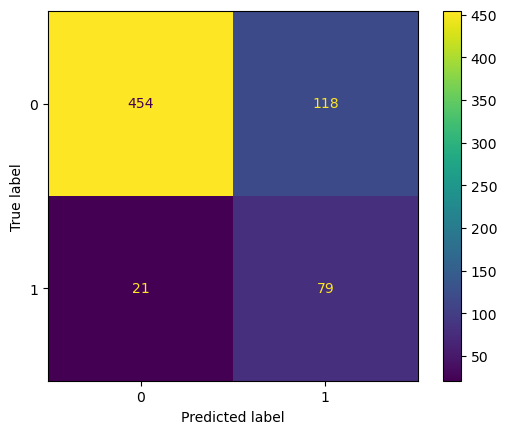

In [1070]:
cm = confusion_matrix(y_test, new_pred, labels=cat_gs.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=cat_gs.classes_)
disp.plot(values_format='');

In [1074]:
feature_importance = cat.get_feature_importance()


In [1078]:
X.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'income_grade', 'Age_grade', 'HaveChildren', 'Year'],
      dtype='object')

In [1083]:
feature_importance_df = pd.DataFrame({'Importance': feature_importance, "Features": X.columns})

feature_importance_df.sort_values(by= "Importance")

Importance             Features
16    0.000000             Complain
18    0.951957            Age_grade
17    1.804528         income_grade
0     2.452401                  Age
8     2.542243      MntFishProducts
9     2.578528     MntSweetProducts
12    2.872327      NumWebPurchases
2     2.902272       Marital_Status
6     2.961866            MntFruits
11    3.661589    NumDealsPurchases
1     3.886563            Education
13    4.438878  NumCatalogPurchases
7     4.746485      MntMeatProducts
19    4.792294         HaveChildren
14    5.653899    NumStorePurchases
3     6.395455               Income
5     6.871743             MntWines
10    8.380766         MntGoldProds
15    8.552219    NumWebVisitsMonth
20    8.858637                 Year
4    14.695351              Recency

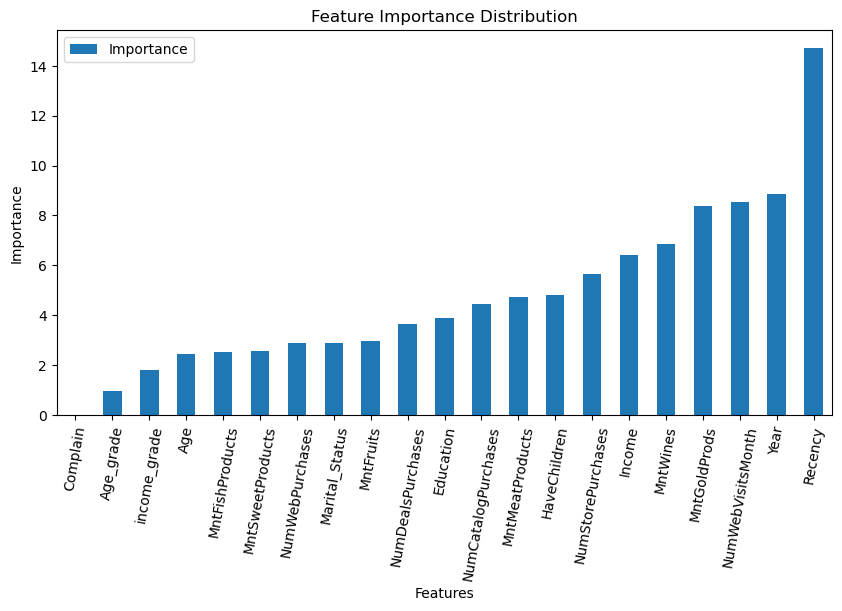

In [1098]:
feature_importance_df.sort_values(by= "Importance").plot(x= "Features", y= "Importance", 
                                                         kind='bar', 
                                                         figsize= (10, 5))
plt.title("Feature Importance Distribution")
plt.ylabel("Importance")
plt.xticks(rotation = 80);

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.



## SAVE MODEL
- The final model tunning using `predict_proba` gave us a better recall score, hence we will save the model and the prefered threshold. This threshold can be determined by the company depending on the risk level. Aside that, the catboost performed performed relatively well.

In [1071]:
import joblib

In [ ]:
# Save the model and threshold using joblib
model_filename = 'cat_model.joblib'
threshold_filename = 'threshold.joblib'

joblib.dump(cat, model_filename)
joblib.dump(threshold, threshold_filename)

In [ ]:
# Load the model and threshold
# loaded_model = joblib.load(model_filename)
# loaded_threshold = joblib.load(threshold_filename)

## 4. EXECUTION STAGE 

**GENERAL INSIGHT**

- Customers in the Adult category(30 -61 yrs) responded well to the promo campaign than other categories
- The higher the recency, the more likely for them to accept the offer. Sales agent in the store should sell the promo to customers via word of mouth before the customer checks out.
- Bulk SMS and email addresses should be sent to these customers who recently made web purchases. 
- CatBoost model at a threshold of 0.35, produced a recall score of approximatley 80% with a F1 score of 53%, at this point we choose not to sacrifice the Precision score further. consequently, we have more positive prospects in the True Positive class to engage.

**CONCERNS**
- Does registering for this promo campaign come at a cost?
- Are prices of neccessity goods high?

**RECOMMENDATION**
- The SuperStore can adopt the Catboost model, however, the threshold can be decided based on the campaign Manager's risk appettite towards customer's expected response. This will help the company manage their cost-to-benefit ratio.
-Since recency poses as a better predictor, more effort should be placed on customer who just purchased product via online and in store.
- The store should amplify online promo adverts and ensure products(especially neccessity goods) have discounted promos. The advert should be emphatic on which goods has a promo discount. So having price stickers with discounted prices will solve this problem.
- The imbalanced dataset limits the efficiency of the model, therefore more dataset should be provided with an acceptable ratio of 80/20.

